In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import BreastCancer
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import FCN
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
BreastCancer()

Path to downloaded dataset files: /kaggle/input/breast-cancer-ss
Dataset copied to: /content/datasets/breast-cancer-ss
Could not delete original download folder '/kaggle/input/breast-cancer-ss': [Errno 30] Read-only file system: 'core_A04P_A2_patch_0066.png'


'/content/datasets/breast-cancer-ss'

In [6]:
config = {"Dir of dataset": "./datasets/breast-cancer-ss", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "patches",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "FCN", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-FCN-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 8582


Organizing masks: 100%|██████████| 8582/8582 [00:00<00:00, 32178.16it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1074


Organizing masks: 100%|██████████| 1074/1074 [00:00<00:00, 82028.60it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1072


Organizing masks: 100%|██████████| 1072/1072 [00:00<00:00, 81531.40it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


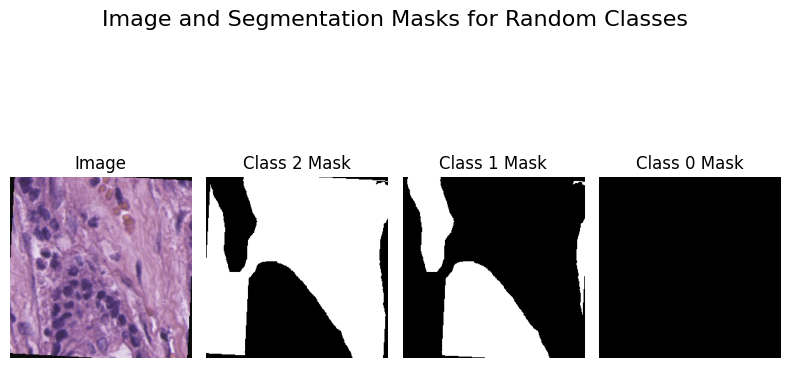

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 222MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


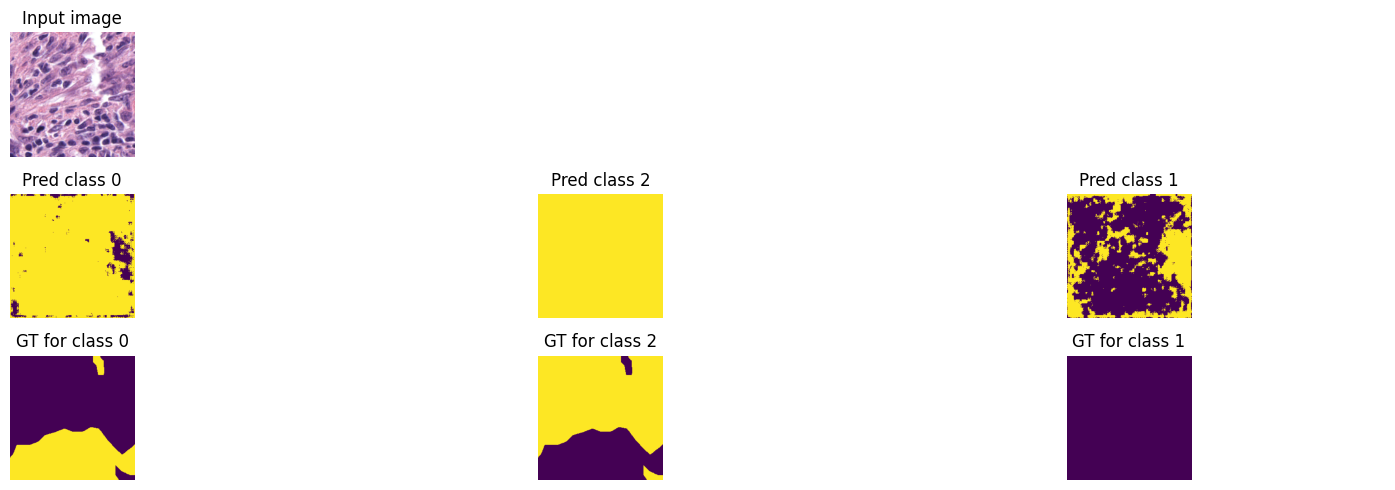

Train loss: 0.68489 | Time: 2m 44s | Val loss: 0.63694
Train_DICE_avg: 0.33776 | Train_Jaccard_avg: 0.26868 | Train_Sensitivity_avg: 0.33244 | Train_Specificity_avg: 0.80170 
Class 0 - Train_DICE: 0.21619 | Train_Jaccard: 0.15977 | Train_Sensitivity: 0.23251 | Train_Specificity: 0.78587 
Class 1 - Train_DICE: 0.38788 | Train_Jaccard: 0.31591 | Train_Sensitivity: 0.42922 | Train_Specificity: 0.67235 
Class 2 - Train_DICE: 0.40920 | Train_Jaccard: 0.33037 | Train_Sensitivity: 0.33558 | Train_Specificity: 0.94689 
Val_DICE_avg: 0.39719 | Val_Jaccard_avg: 0.33000 | Val_Sensitivity_avg: 0.35117 | Val_Specificity_avg: 0.82124 
Class 0 - Val_DICE: 0.28851 | Val_Jaccard: 0.23002 | Val_Sensitivity: 0.24957 | Val_Specificity: 0.80838 
Class 1 - Val_DICE: 0.48796 | Val_Jaccard: 0.42142 | Val_Sensitivity: 0.46538 | Val_Specificity: 0.65536 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.63065 | Time: 5m 24s | Val loss: 0.61445
Train_DICE_avg: 0.39413 | Train_Jaccard_avg: 0.32704 | Train_Sensitivity_avg: 0.33881 | Train_Specificity_avg: 0.86269 
Class 0 - Train_DICE: 0.29036 | Train_Jaccard: 0.23144 | Train_Sensitivity: 0.24547 | Train_Specificity: 0.81671 
Class 1 - Train_DICE: 0.47873 | Train_Jaccard: 0.41416 | Train_Sensitivity: 0.43543 | Train_Specificity: 0.77137 
Class 2 - Train_DICE: 0.41329 | Train_Jaccard: 0.33553 | Train_Sensitivity: 0.33553 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40394 | Val_Jaccard_avg: 0.34005 | Val_Sensitivity_avg: 0.34892 | Val_Specificity_avg: 0.83825 
Class 0 - Val_DICE: 0.29493 | Val_Jaccard: 0.23979 | Val_Sensitivity: 0.24618 | Val_Specificity: 0.82958 
Class 1 - Val_DICE: 0.50180 | Val_Jaccard: 0.44182 | Val_Sensitivity: 0.46203 | Val_Specificity: 0.68516 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.61803 | Time: 8m 6s | Val loss: 0.60726
Train_DICE_avg: 0.39600 | Train_Jaccard_avg: 0.33019 | Train_Sensitivity_avg: 0.33724 | Train_Specificity_avg: 0.88128 
Class 0 - Train_DICE: 0.29244 | Train_Jaccard: 0.23512 | Train_Sensitivity: 0.24244 | Train_Specificity: 0.84037 
Class 1 - Train_DICE: 0.48225 | Train_Jaccard: 0.41985 | Train_Sensitivity: 0.43368 | Train_Specificity: 0.80349 
Class 2 - Train_DICE: 0.41330 | Train_Jaccard: 0.33560 | Train_Sensitivity: 0.33560 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40459 | Val_Jaccard_avg: 0.34130 | Val_Sensitivity_avg: 0.34781 | Val_Specificity_avg: 0.85935 
Class 0 - Val_DICE: 0.29435 | Val_Jaccard: 0.23972 | Val_Sensitivity: 0.24364 | Val_Specificity: 0.87876 
Class 1 - Val_DICE: 0.50434 | Val_Jaccard: 0.44564 | Val_Sensitivity: 0.46123 | Val_Specificity: 0.69929 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.61255 | Time: 10m 45s | Val loss: 0.60317
Train_DICE_avg: 0.39709 | Train_Jaccard_avg: 0.33167 | Train_Sensitivity_avg: 0.33850 | Train_Specificity_avg: 0.89315 
Class 0 - Train_DICE: 0.29172 | Train_Jaccard: 0.23496 | Train_Sensitivity: 0.24064 | Train_Specificity: 0.87171 
Class 1 - Train_DICE: 0.48609 | Train_Jaccard: 0.42423 | Train_Sensitivity: 0.43905 | Train_Specificity: 0.80774 
Class 2 - Train_DICE: 0.41346 | Train_Jaccard: 0.33581 | Train_Sensitivity: 0.33581 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40587 | Val_Jaccard_avg: 0.34253 | Val_Sensitivity_avg: 0.34957 | Val_Specificity_avg: 0.87030 
Class 0 - Val_DICE: 0.29387 | Val_Jaccard: 0.23939 | Val_Sensitivity: 0.24271 | Val_Specificity: 0.90718 
Class 1 - Val_DICE: 0.50865 | Val_Jaccard: 0.44963 | Val_Sensitivity: 0.46744 | Val_Specificity: 0.70373 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.60962 | Time: 13m 25s | Val loss: 0.59965
Train_DICE_avg: 0.39807 | Train_Jaccard_avg: 0.33241 | Train_Sensitivity_avg: 0.34066 | Train_Specificity_avg: 0.89425 
Class 0 - Train_DICE: 0.29206 | Train_Jaccard: 0.23509 | Train_Sensitivity: 0.24122 | Train_Specificity: 0.87312 
Class 1 - Train_DICE: 0.48896 | Train_Jaccard: 0.42665 | Train_Sensitivity: 0.44528 | Train_Specificity: 0.80965 
Class 2 - Train_DICE: 0.41320 | Train_Jaccard: 0.33548 | Train_Sensitivity: 0.33548 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40761 | Val_Jaccard_avg: 0.34415 | Val_Sensitivity_avg: 0.35177 | Val_Specificity_avg: 0.87474 
Class 0 - Val_DICE: 0.29501 | Val_Jaccard: 0.24035 | Val_Sensitivity: 0.24396 | Val_Specificity: 0.90584 
Class 1 - Val_DICE: 0.51273 | Val_Jaccard: 0.45354 | Val_Sensitivity: 0.47279 | Val_Specificity: 0.71839 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


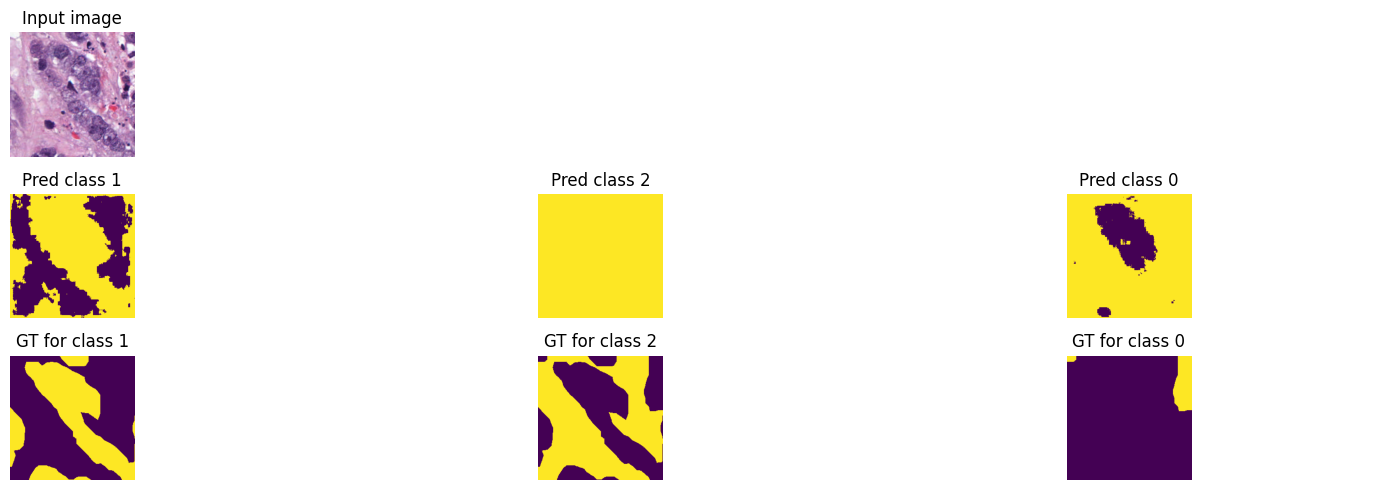

Train loss: 0.60700 | Time: 16m 6s | Val loss: 0.59705
Train_DICE_avg: 0.39954 | Train_Jaccard_avg: 0.33359 | Train_Sensitivity_avg: 0.34341 | Train_Specificity_avg: 0.89211 
Class 0 - Train_DICE: 0.29264 | Train_Jaccard: 0.23563 | Train_Sensitivity: 0.24240 | Train_Specificity: 0.87222 
Class 1 - Train_DICE: 0.49261 | Train_Jaccard: 0.42950 | Train_Sensitivity: 0.45216 | Train_Specificity: 0.80410 
Class 2 - Train_DICE: 0.41336 | Train_Jaccard: 0.33565 | Train_Sensitivity: 0.33565 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40928 | Val_Jaccard_avg: 0.34561 | Val_Sensitivity_avg: 0.35440 | Val_Specificity_avg: 0.87186 
Class 0 - Val_DICE: 0.29655 | Val_Jaccard: 0.24141 | Val_Sensitivity: 0.24632 | Val_Specificity: 0.89501 
Class 1 - Val_DICE: 0.51619 | Val_Jaccard: 0.45685 | Val_Sensitivity: 0.47833 | Val_Specificity: 0.72057 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.60514 | Time: 18m 47s | Val loss: 0.59492
Train_DICE_avg: 0.40057 | Train_Jaccard_avg: 0.33420 | Train_Sensitivity_avg: 0.34595 | Train_Specificity_avg: 0.88802 
Class 0 - Train_DICE: 0.29321 | Train_Jaccard: 0.23561 | Train_Sensitivity: 0.24381 | Train_Specificity: 0.86223 
Class 1 - Train_DICE: 0.49527 | Train_Jaccard: 0.43153 | Train_Sensitivity: 0.45859 | Train_Specificity: 0.80184 
Class 2 - Train_DICE: 0.41323 | Train_Jaccard: 0.33546 | Train_Sensitivity: 0.33546 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41043 | Val_Jaccard_avg: 0.34661 | Val_Sensitivity_avg: 0.35618 | Val_Specificity_avg: 0.87204 
Class 0 - Val_DICE: 0.29732 | Val_Jaccard: 0.24205 | Val_Sensitivity: 0.24724 | Val_Specificity: 0.89239 
Class 1 - Val_DICE: 0.51886 | Val_Jaccard: 0.45921 | Val_Sensitivity: 0.48274 | Val_Specificity: 0.72372 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60353 | Time: 21m 27s | Val loss: 0.59340
Train_DICE_avg: 0.40144 | Train_Jaccard_avg: 0.33492 | Train_Sensitivity_avg: 0.34792 | Train_Specificity_avg: 0.88433 
Class 0 - Train_DICE: 0.29419 | Train_Jaccard: 0.23632 | Train_Sensitivity: 0.24542 | Train_Specificity: 0.85631 
Class 1 - Train_DICE: 0.49681 | Train_Jaccard: 0.43288 | Train_Sensitivity: 0.46276 | Train_Specificity: 0.79667 
Class 2 - Train_DICE: 0.41332 | Train_Jaccard: 0.33557 | Train_Sensitivity: 0.33557 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41136 | Val_Jaccard_avg: 0.34743 | Val_Sensitivity_avg: 0.35749 | Val_Specificity_avg: 0.87063 
Class 0 - Val_DICE: 0.29859 | Val_Jaccard: 0.24296 | Val_Sensitivity: 0.24922 | Val_Specificity: 0.87845 
Class 1 - Val_DICE: 0.52038 | Val_Jaccard: 0.46077 | Val_Sensitivity: 0.48471 | Val_Specificity: 0.73344 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60217 | Time: 24m 8s | Val loss: 0.59169
Train_DICE_avg: 0.40223 | Train_Jaccard_avg: 0.33544 | Train_Sensitivity_avg: 0.34962 | Train_Specificity_avg: 0.88187 
Class 0 - Train_DICE: 0.29474 | Train_Jaccard: 0.23661 | Train_Sensitivity: 0.24684 | Train_Specificity: 0.85128 
Class 1 - Train_DICE: 0.49854 | Train_Jaccard: 0.43400 | Train_Sensitivity: 0.46629 | Train_Specificity: 0.79434 
Class 2 - Train_DICE: 0.41340 | Train_Jaccard: 0.33572 | Train_Sensitivity: 0.33572 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41235 | Val_Jaccard_avg: 0.34830 | Val_Sensitivity_avg: 0.35908 | Val_Specificity_avg: 0.86736 
Class 0 - Val_DICE: 0.29948 | Val_Jaccard: 0.24369 | Val_Sensitivity: 0.25056 | Val_Specificity: 0.87686 
Class 1 - Val_DICE: 0.52248 | Val_Jaccard: 0.46267 | Val_Sensitivity: 0.48813 | Val_Specificity: 0.72521 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60123 | Time: 26m 49s | Val loss: 0.59062
Train_DICE_avg: 0.40259 | Train_Jaccard_avg: 0.33575 | Train_Sensitivity_avg: 0.35088 | Train_Specificity_avg: 0.88151 
Class 0 - Train_DICE: 0.29485 | Train_Jaccard: 0.23682 | Train_Sensitivity: 0.24761 | Train_Specificity: 0.84970 
Class 1 - Train_DICE: 0.49960 | Train_Jaccard: 0.43483 | Train_Sensitivity: 0.46943 | Train_Specificity: 0.79483 
Class 2 - Train_DICE: 0.41331 | Train_Jaccard: 0.33561 | Train_Sensitivity: 0.33561 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41295 | Val_Jaccard_avg: 0.34890 | Val_Sensitivity_avg: 0.35989 | Val_Specificity_avg: 0.86499 
Class 0 - Val_DICE: 0.30013 | Val_Jaccard: 0.24408 | Val_Sensitivity: 0.25197 | Val_Specificity: 0.86763 
Class 1 - Val_DICE: 0.52364 | Val_Jaccard: 0.46407 | Val_Sensitivity: 0.48913 | Val_Specificity: 0.72735 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


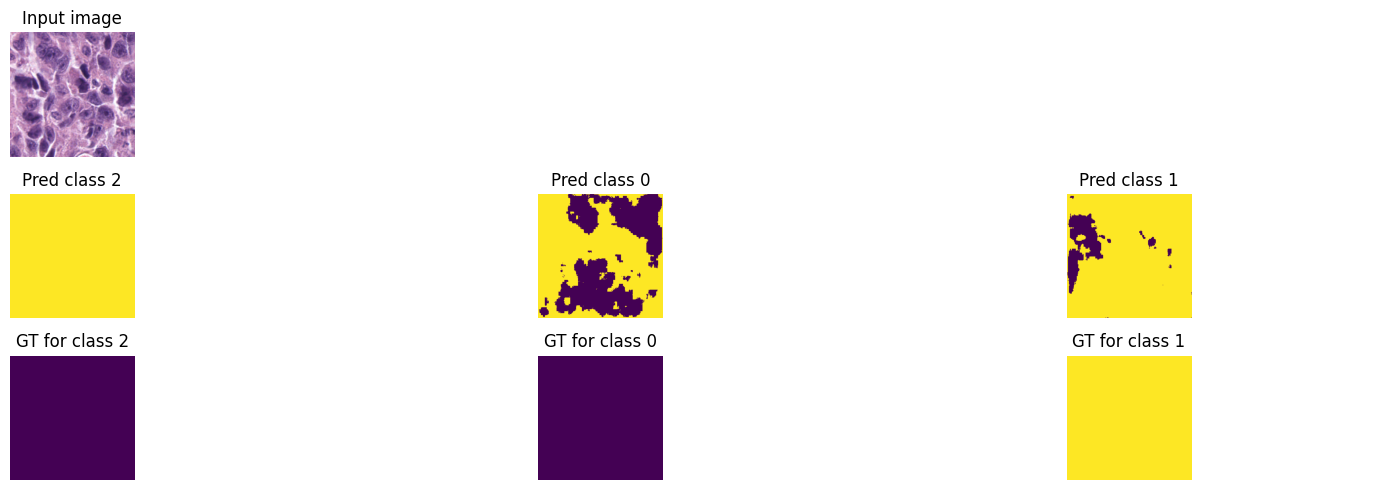

Train loss: 0.60023 | Time: 29m 34s | Val loss: 0.58914
Train_DICE_avg: 0.40300 | Train_Jaccard_avg: 0.33605 | Train_Sensitivity_avg: 0.35172 | Train_Specificity_avg: 0.87951 
Class 0 - Train_DICE: 0.29546 | Train_Jaccard: 0.23711 | Train_Sensitivity: 0.24781 | Train_Specificity: 0.84646 
Class 1 - Train_DICE: 0.50024 | Train_Jaccard: 0.43539 | Train_Sensitivity: 0.47169 | Train_Specificity: 0.79208 
Class 2 - Train_DICE: 0.41330 | Train_Jaccard: 0.33566 | Train_Sensitivity: 0.33566 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41381 | Val_Jaccard_avg: 0.34971 | Val_Sensitivity_avg: 0.36127 | Val_Specificity_avg: 0.86334 
Class 0 - Val_DICE: 0.30058 | Val_Jaccard: 0.24443 | Val_Sensitivity: 0.25252 | Val_Specificity: 0.87093 
Class 1 - Val_DICE: 0.52575 | Val_Jaccard: 0.46613 | Val_Sensitivity: 0.49274 | Val_Specificity: 0.71909 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.59918 | Time: 32m 18s | Val loss: 0.58790
Train_DICE_avg: 0.40351 | Train_Jaccard_avg: 0.33642 | Train_Sensitivity_avg: 0.35335 | Train_Specificity_avg: 0.87905 
Class 0 - Train_DICE: 0.29576 | Train_Jaccard: 0.23727 | Train_Sensitivity: 0.24893 | Train_Specificity: 0.84828 
Class 1 - Train_DICE: 0.50155 | Train_Jaccard: 0.43653 | Train_Sensitivity: 0.47563 | Train_Specificity: 0.78886 
Class 2 - Train_DICE: 0.41323 | Train_Jaccard: 0.33548 | Train_Sensitivity: 0.33548 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41460 | Val_Jaccard_avg: 0.35043 | Val_Sensitivity_avg: 0.36263 | Val_Specificity_avg: 0.86657 
Class 0 - Val_DICE: 0.30114 | Val_Jaccard: 0.24501 | Val_Sensitivity: 0.25304 | Val_Specificity: 0.87577 
Class 1 - Val_DICE: 0.52756 | Val_Jaccard: 0.46772 | Val_Sensitivity: 0.49631 | Val_Specificity: 0.72393 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.59809 | Time: 35m 2s | Val loss: 0.58700
Train_DICE_avg: 0.40424 | Train_Jaccard_avg: 0.33716 | Train_Sensitivity_avg: 0.35451 | Train_Specificity_avg: 0.87839 
Class 0 - Train_DICE: 0.29599 | Train_Jaccard: 0.23749 | Train_Sensitivity: 0.24960 | Train_Specificity: 0.84559 
Class 1 - Train_DICE: 0.50298 | Train_Jaccard: 0.43783 | Train_Sensitivity: 0.47778 | Train_Specificity: 0.78958 
Class 2 - Train_DICE: 0.41376 | Train_Jaccard: 0.33615 | Train_Sensitivity: 0.33615 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41521 | Val_Jaccard_avg: 0.35104 | Val_Sensitivity_avg: 0.36361 | Val_Specificity_avg: 0.86645 
Class 0 - Val_DICE: 0.30134 | Val_Jaccard: 0.24519 | Val_Sensitivity: 0.25333 | Val_Specificity: 0.87575 
Class 1 - Val_DICE: 0.52920 | Val_Jaccard: 0.46938 | Val_Sensitivity: 0.49894 | Val_Specificity: 0.72361 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.59733 | Time: 37m 47s | Val loss: 0.58629
Train_DICE_avg: 0.40477 | Train_Jaccard_avg: 0.33754 | Train_Sensitivity_avg: 0.35547 | Train_Specificity_avg: 0.87862 
Class 0 - Train_DICE: 0.29714 | Train_Jaccard: 0.23850 | Train_Sensitivity: 0.25063 | Train_Specificity: 0.84792 
Class 1 - Train_DICE: 0.50378 | Train_Jaccard: 0.43842 | Train_Sensitivity: 0.48009 | Train_Specificity: 0.78795 
Class 2 - Train_DICE: 0.41338 | Train_Jaccard: 0.33569 | Train_Sensitivity: 0.33569 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41565 | Val_Jaccard_avg: 0.35146 | Val_Sensitivity_avg: 0.36396 | Val_Specificity_avg: 0.86993 
Class 0 - Val_DICE: 0.30245 | Val_Jaccard: 0.24611 | Val_Sensitivity: 0.25532 | Val_Specificity: 0.87423 
Class 1 - Val_DICE: 0.52941 | Val_Jaccard: 0.46973 | Val_Sensitivity: 0.49799 | Val_Specificity: 0.73555 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


Train loss: 0.59703 | Time: 40m 32s | Val loss: 0.58574
Train_DICE_avg: 0.40485 | Train_Jaccard_avg: 0.33760 | Train_Sensitivity_avg: 0.35602 | Train_Specificity_avg: 0.87954 
Class 0 - Train_DICE: 0.29691 | Train_Jaccard: 0.23825 | Train_Sensitivity: 0.25110 | Train_Specificity: 0.84889 
Class 1 - Train_DICE: 0.50416 | Train_Jaccard: 0.43876 | Train_Sensitivity: 0.48117 | Train_Specificity: 0.78972 
Class 2 - Train_DICE: 0.41347 | Train_Jaccard: 0.33578 | Train_Sensitivity: 0.33578 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41601 | Val_Jaccard_avg: 0.35183 | Val_Sensitivity_avg: 0.36429 | Val_Specificity_avg: 0.87118 
Class 0 - Val_DICE: 0.30286 | Val_Jaccard: 0.24652 | Val_Sensitivity: 0.25573 | Val_Specificity: 0.87406 
Class 1 - Val_DICE: 0.53008 | Val_Jaccard: 0.47042 | Val_Sensitivity: 0.49857 | Val_Specificity: 0.73948 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


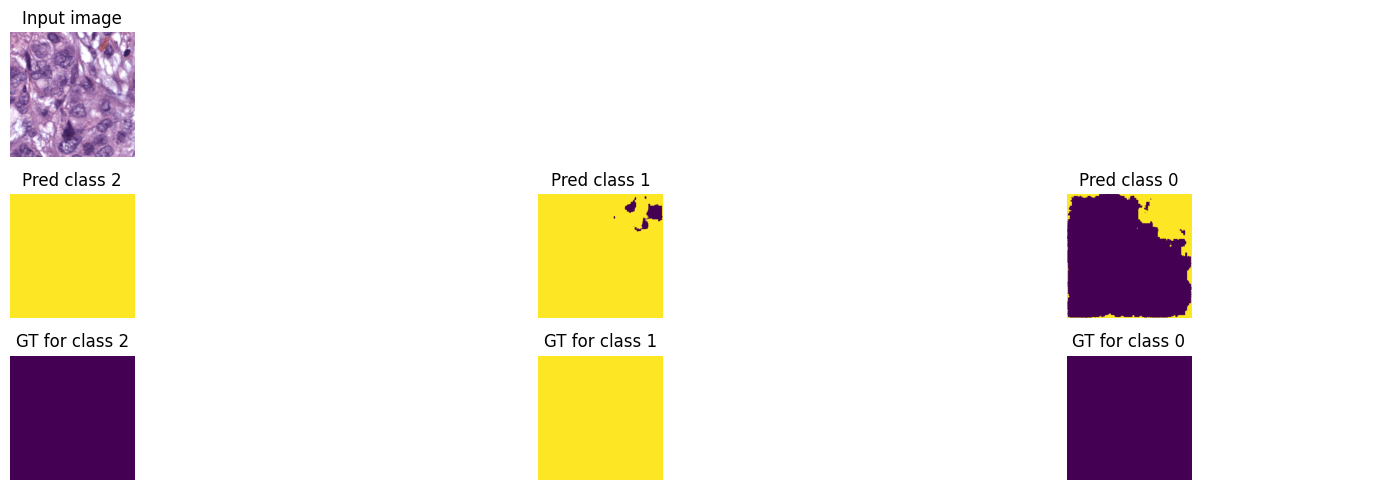

Train loss: 0.59639 | Time: 43m 17s | Val loss: 0.58519
Train_DICE_avg: 0.40532 | Train_Jaccard_avg: 0.33797 | Train_Sensitivity_avg: 0.35684 | Train_Specificity_avg: 0.87924 
Class 0 - Train_DICE: 0.29705 | Train_Jaccard: 0.23823 | Train_Sensitivity: 0.25115 | Train_Specificity: 0.84914 
Class 1 - Train_DICE: 0.50560 | Train_Jaccard: 0.44012 | Train_Sensitivity: 0.48381 | Train_Specificity: 0.78857 
Class 2 - Train_DICE: 0.41329 | Train_Jaccard: 0.33557 | Train_Sensitivity: 0.33557 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41639 | Val_Jaccard_avg: 0.35226 | Val_Sensitivity_avg: 0.36466 | Val_Specificity_avg: 0.87029 
Class 0 - Val_DICE: 0.30325 | Val_Jaccard: 0.24683 | Val_Sensitivity: 0.25673 | Val_Specificity: 0.87505 
Class 1 - Val_DICE: 0.53083 | Val_Jaccard: 0.47139 | Val_Sensitivity: 0.49868 | Val_Specificity: 0.73582 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.59596 | Time: 46m 0s | Val loss: 0.58473
Train_DICE_avg: 0.40559 | Train_Jaccard_avg: 0.33839 | Train_Sensitivity_avg: 0.35729 | Train_Specificity_avg: 0.87847 
Class 0 - Train_DICE: 0.29786 | Train_Jaccard: 0.23917 | Train_Sensitivity: 0.25231 | Train_Specificity: 0.84751 
Class 1 - Train_DICE: 0.50552 | Train_Jaccard: 0.44032 | Train_Sensitivity: 0.48390 | Train_Specificity: 0.78789 
Class 2 - Train_DICE: 0.41339 | Train_Jaccard: 0.33567 | Train_Sensitivity: 0.33567 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41671 | Val_Jaccard_avg: 0.35263 | Val_Sensitivity_avg: 0.36471 | Val_Specificity_avg: 0.87188 
Class 0 - Val_DICE: 0.30356 | Val_Jaccard: 0.24714 | Val_Sensitivity: 0.25711 | Val_Specificity: 0.87234 
Class 1 - Val_DICE: 0.53148 | Val_Jaccard: 0.47219 | Val_Sensitivity: 0.49847 | Val_Specificity: 0.74329 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59592 | Time: 48m 43s | Val loss: 0.58410
Train_DICE_avg: 0.40552 | Train_Jaccard_avg: 0.33813 | Train_Sensitivity_avg: 0.35720 | Train_Specificity_avg: 0.88088 
Class 0 - Train_DICE: 0.29744 | Train_Jaccard: 0.23866 | Train_Sensitivity: 0.25151 | Train_Specificity: 0.85036 
Class 1 - Train_DICE: 0.50587 | Train_Jaccard: 0.44015 | Train_Sensitivity: 0.48453 | Train_Specificity: 0.79229 
Class 2 - Train_DICE: 0.41324 | Train_Jaccard: 0.33556 | Train_Sensitivity: 0.33556 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41728 | Val_Jaccard_avg: 0.35319 | Val_Sensitivity_avg: 0.36579 | Val_Specificity_avg: 0.86652 
Class 0 - Val_DICE: 0.30368 | Val_Jaccard: 0.24727 | Val_Sensitivity: 0.25708 | Val_Specificity: 0.87172 
Class 1 - Val_DICE: 0.53306 | Val_Jaccard: 0.47375 | Val_Sensitivity: 0.50173 | Val_Specificity: 0.72782 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.59549 | Time: 51m 26s | Val loss: 0.58350
Train_DICE_avg: 0.40582 | Train_Jaccard_avg: 0.33863 | Train_Sensitivity_avg: 0.35776 | Train_Specificity_avg: 0.88071 
Class 0 - Train_DICE: 0.29797 | Train_Jaccard: 0.23907 | Train_Sensitivity: 0.25205 | Train_Specificity: 0.85154 
Class 1 - Train_DICE: 0.50633 | Train_Jaccard: 0.44132 | Train_Sensitivity: 0.48572 | Train_Specificity: 0.79060 
Class 2 - Train_DICE: 0.41317 | Train_Jaccard: 0.33550 | Train_Sensitivity: 0.33550 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41776 | Val_Jaccard_avg: 0.35354 | Val_Sensitivity_avg: 0.36719 | Val_Specificity_avg: 0.87114 
Class 0 - Val_DICE: 0.30382 | Val_Jaccard: 0.24755 | Val_Sensitivity: 0.25675 | Val_Specificity: 0.87552 
Class 1 - Val_DICE: 0.53438 | Val_Jaccard: 0.47451 | Val_Sensitivity: 0.50625 | Val_Specificity: 0.73789 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59501 | Time: 54m 9s | Val loss: 0.58344
Train_DICE_avg: 0.40622 | Train_Jaccard_avg: 0.33892 | Train_Sensitivity_avg: 0.35856 | Train_Specificity_avg: 0.87963 
Class 0 - Train_DICE: 0.29802 | Train_Jaccard: 0.23923 | Train_Sensitivity: 0.25269 | Train_Specificity: 0.85097 
Class 1 - Train_DICE: 0.50737 | Train_Jaccard: 0.44191 | Train_Sensitivity: 0.48735 | Train_Specificity: 0.78793 
Class 2 - Train_DICE: 0.41328 | Train_Jaccard: 0.33563 | Train_Sensitivity: 0.33563 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41774 | Val_Jaccard_avg: 0.35367 | Val_Sensitivity_avg: 0.36637 | Val_Specificity_avg: 0.87171 
Class 0 - Val_DICE: 0.30421 | Val_Jaccard: 0.24786 | Val_Sensitivity: 0.25771 | Val_Specificity: 0.87647 
Class 1 - Val_DICE: 0.53392 | Val_Jaccard: 0.47458 | Val_Sensitivity: 0.50285 | Val_Specificity: 0.73867 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


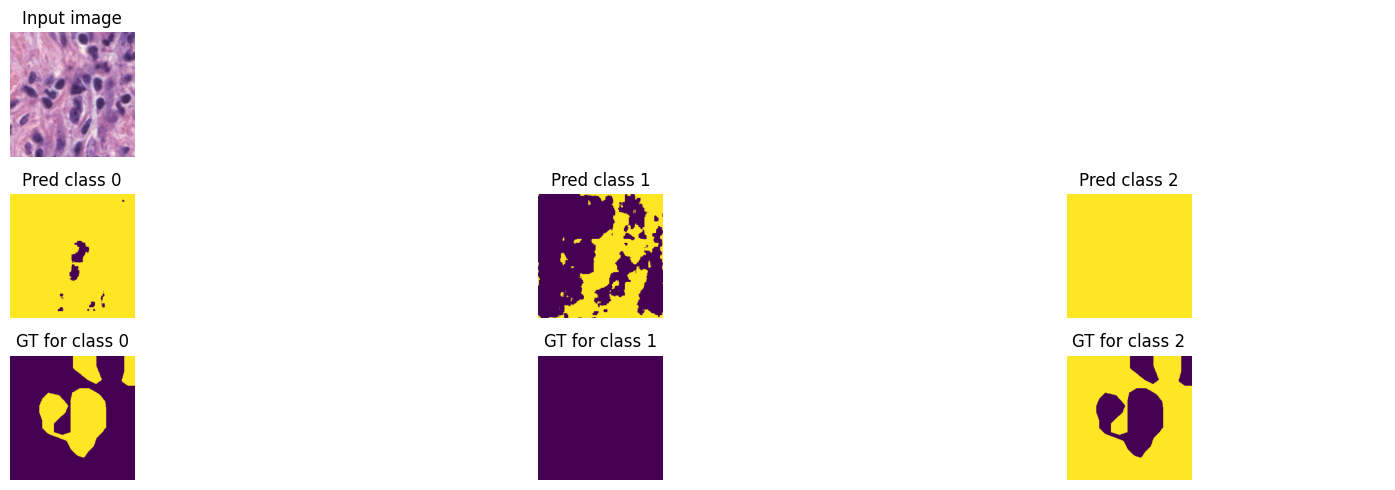

Train loss: 0.59453 | Time: 56m 53s | Val loss: 0.58201
Train_DICE_avg: 0.40667 | Train_Jaccard_avg: 0.33955 | Train_Sensitivity_avg: 0.35913 | Train_Specificity_avg: 0.88447 
Class 0 - Train_DICE: 0.29828 | Train_Jaccard: 0.23976 | Train_Sensitivity: 0.25247 | Train_Specificity: 0.85844 
Class 1 - Train_DICE: 0.50848 | Train_Jaccard: 0.44336 | Train_Sensitivity: 0.48939 | Train_Specificity: 0.79498 
Class 2 - Train_DICE: 0.41324 | Train_Jaccard: 0.33553 | Train_Sensitivity: 0.33553 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41913 | Val_Jaccard_avg: 0.35516 | Val_Sensitivity_avg: 0.36817 | Val_Specificity_avg: 0.87429 
Class 0 - Val_DICE: 0.30482 | Val_Jaccard: 0.24876 | Val_Sensitivity: 0.25670 | Val_Specificity: 0.88933 
Class 1 - Val_DICE: 0.53748 | Val_Jaccard: 0.47816 | Val_Sensitivity: 0.50926 | Val_Specificity: 0.73355 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59308 | Time: 59m 37s | Val loss: 0.58062
Train_DICE_avg: 0.40807 | Train_Jaccard_avg: 0.34110 | Train_Sensitivity_avg: 0.36097 | Train_Specificity_avg: 0.88812 
Class 0 - Train_DICE: 0.29975 | Train_Jaccard: 0.24119 | Train_Sensitivity: 0.25394 | Train_Specificity: 0.86468 
Class 1 - Train_DICE: 0.51124 | Train_Jaccard: 0.44643 | Train_Sensitivity: 0.49329 | Train_Specificity: 0.79969 
Class 2 - Train_DICE: 0.41322 | Train_Jaccard: 0.33567 | Train_Sensitivity: 0.33567 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42042 | Val_Jaccard_avg: 0.35647 | Val_Sensitivity_avg: 0.36996 | Val_Specificity_avg: 0.88311 
Class 0 - Val_DICE: 0.30624 | Val_Jaccard: 0.25005 | Val_Sensitivity: 0.25932 | Val_Specificity: 0.89708 
Class 1 - Val_DICE: 0.53991 | Val_Jaccard: 0.48081 | Val_Sensitivity: 0.51200 | Val_Specificity: 0.75226 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59195 | Time: 62m 22s | Val loss: 0.57974
Train_DICE_avg: 0.40913 | Train_Jaccard_avg: 0.34231 | Train_Sensitivity_avg: 0.36268 | Train_Specificity_avg: 0.88990 
Class 0 - Train_DICE: 0.30081 | Train_Jaccard: 0.24235 | Train_Sensitivity: 0.25561 | Train_Specificity: 0.86714 
Class 1 - Train_DICE: 0.51319 | Train_Jaccard: 0.44886 | Train_Sensitivity: 0.49670 | Train_Specificity: 0.80256 
Class 2 - Train_DICE: 0.41340 | Train_Jaccard: 0.33572 | Train_Sensitivity: 0.33572 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42125 | Val_Jaccard_avg: 0.35745 | Val_Sensitivity_avg: 0.37061 | Val_Specificity_avg: 0.88102 
Class 0 - Val_DICE: 0.30712 | Val_Jaccard: 0.25092 | Val_Sensitivity: 0.26066 | Val_Specificity: 0.89503 
Class 1 - Val_DICE: 0.54155 | Val_Jaccard: 0.48288 | Val_Sensitivity: 0.51263 | Val_Specificity: 0.74803 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59100 | Time: 65m 6s | Val loss: 0.57904
Train_DICE_avg: 0.41008 | Train_Jaccard_avg: 0.34313 | Train_Sensitivity_avg: 0.36409 | Train_Specificity_avg: 0.89190 
Class 0 - Train_DICE: 0.30239 | Train_Jaccard: 0.24372 | Train_Sensitivity: 0.25749 | Train_Specificity: 0.87182 
Class 1 - Train_DICE: 0.51435 | Train_Jaccard: 0.44987 | Train_Sensitivity: 0.49896 | Train_Specificity: 0.80387 
Class 2 - Train_DICE: 0.41350 | Train_Jaccard: 0.33581 | Train_Sensitivity: 0.33581 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42192 | Val_Jaccard_avg: 0.35815 | Val_Sensitivity_avg: 0.37141 | Val_Specificity_avg: 0.88459 
Class 0 - Val_DICE: 0.30812 | Val_Jaccard: 0.25197 | Val_Sensitivity: 0.26258 | Val_Specificity: 0.89350 
Class 1 - Val_DICE: 0.54255 | Val_Jaccard: 0.48391 | Val_Sensitivity: 0.51309 | Val_Specificity: 0.76028 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.59047 | Time: 67m 50s | Val loss: 0.57810
Train_DICE_avg: 0.41064 | Train_Jaccard_avg: 0.34374 | Train_Sensitivity_avg: 0.36492 | Train_Specificity_avg: 0.89242 
Class 0 - Train_DICE: 0.30212 | Train_Jaccard: 0.24338 | Train_Sensitivity: 0.25735 | Train_Specificity: 0.87360 
Class 1 - Train_DICE: 0.51634 | Train_Jaccard: 0.45210 | Train_Sensitivity: 0.50170 | Train_Specificity: 0.80367 
Class 2 - Train_DICE: 0.41347 | Train_Jaccard: 0.33573 | Train_Sensitivity: 0.33573 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42279 | Val_Jaccard_avg: 0.35910 | Val_Sensitivity_avg: 0.37311 | Val_Specificity_avg: 0.88141 
Class 0 - Val_DICE: 0.30879 | Val_Jaccard: 0.25249 | Val_Sensitivity: 0.26358 | Val_Specificity: 0.89230 
Class 1 - Val_DICE: 0.54448 | Val_Jaccard: 0.48626 | Val_Sensitivity: 0.51719 | Val_Specificity: 0.75192 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


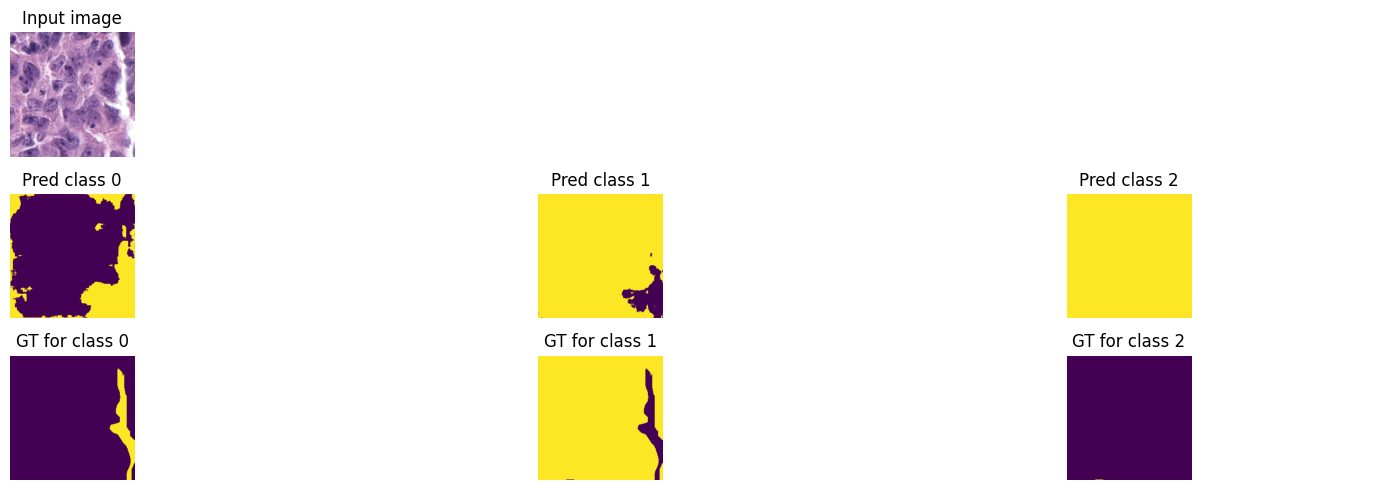

Train loss: 0.58971 | Time: 70m 35s | Val loss: 0.57787
Train_DICE_avg: 0.41137 | Train_Jaccard_avg: 0.34468 | Train_Sensitivity_avg: 0.36587 | Train_Specificity_avg: 0.89275 
Class 0 - Train_DICE: 0.30333 | Train_Jaccard: 0.24478 | Train_Sensitivity: 0.25842 | Train_Specificity: 0.87479 
Class 1 - Train_DICE: 0.51759 | Train_Jaccard: 0.45363 | Train_Sensitivity: 0.50355 | Train_Specificity: 0.80347 
Class 2 - Train_DICE: 0.41320 | Train_Jaccard: 0.33565 | Train_Sensitivity: 0.33565 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42302 | Val_Jaccard_avg: 0.35931 | Val_Sensitivity_avg: 0.37337 | Val_Specificity_avg: 0.88594 
Class 0 - Val_DICE: 0.30930 | Val_Jaccard: 0.25318 | Val_Sensitivity: 0.26348 | Val_Specificity: 0.90053 
Class 1 - Val_DICE: 0.54467 | Val_Jaccard: 0.48619 | Val_Sensitivity: 0.51808 | Val_Specificity: 0.75729 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.58881 | Time: 73m 17s | Val loss: 0.57757
Train_DICE_avg: 0.41227 | Train_Jaccard_avg: 0.34559 | Train_Sensitivity_avg: 0.36712 | Train_Specificity_avg: 0.89182 
Class 0 - Train_DICE: 0.30433 | Train_Jaccard: 0.24554 | Train_Sensitivity: 0.25914 | Train_Specificity: 0.87342 
Class 1 - Train_DICE: 0.51906 | Train_Jaccard: 0.45546 | Train_Sensitivity: 0.50646 | Train_Specificity: 0.80205 
Class 2 - Train_DICE: 0.41343 | Train_Jaccard: 0.33577 | Train_Sensitivity: 0.33577 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42330 | Val_Jaccard_avg: 0.35970 | Val_Sensitivity_avg: 0.37357 | Val_Specificity_avg: 0.88467 
Class 0 - Val_DICE: 0.30997 | Val_Jaccard: 0.25388 | Val_Sensitivity: 0.26594 | Val_Specificity: 0.88530 
Class 1 - Val_DICE: 0.54483 | Val_Jaccard: 0.48665 | Val_Sensitivity: 0.51620 | Val_Specificity: 0.76871 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.58814 | Time: 76m 0s | Val loss: 0.57668
Train_DICE_avg: 0.41290 | Train_Jaccard_avg: 0.34638 | Train_Sensitivity_avg: 0.36771 | Train_Specificity_avg: 0.89409 
Class 0 - Train_DICE: 0.30456 | Train_Jaccard: 0.24603 | Train_Sensitivity: 0.25988 | Train_Specificity: 0.87326 
Class 1 - Train_DICE: 0.52096 | Train_Jaccard: 0.45766 | Train_Sensitivity: 0.50781 | Train_Specificity: 0.80902 
Class 2 - Train_DICE: 0.41319 | Train_Jaccard: 0.33544 | Train_Sensitivity: 0.33544 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42415 | Val_Jaccard_avg: 0.36055 | Val_Sensitivity_avg: 0.37538 | Val_Specificity_avg: 0.88405 
Class 0 - Val_DICE: 0.31068 | Val_Jaccard: 0.25441 | Val_Sensitivity: 0.26673 | Val_Specificity: 0.87842 
Class 1 - Val_DICE: 0.54668 | Val_Jaccard: 0.48868 | Val_Sensitivity: 0.52086 | Val_Specificity: 0.77371 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.58717 | Time: 78m 42s | Val loss: 0.57656
Train_DICE_avg: 0.41388 | Train_Jaccard_avg: 0.34731 | Train_Sensitivity_avg: 0.36906 | Train_Specificity_avg: 0.89410 
Class 0 - Train_DICE: 0.30613 | Train_Jaccard: 0.24741 | Train_Sensitivity: 0.26193 | Train_Specificity: 0.86959 
Class 1 - Train_DICE: 0.52208 | Train_Jaccard: 0.45880 | Train_Sensitivity: 0.50953 | Train_Specificity: 0.81271 
Class 2 - Train_DICE: 0.41344 | Train_Jaccard: 0.33572 | Train_Sensitivity: 0.33572 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42422 | Val_Jaccard_avg: 0.36070 | Val_Sensitivity_avg: 0.37520 | Val_Specificity_avg: 0.88419 
Class 0 - Val_DICE: 0.31104 | Val_Jaccard: 0.25481 | Val_Sensitivity: 0.26723 | Val_Specificity: 0.88143 
Class 1 - Val_DICE: 0.54651 | Val_Jaccard: 0.48874 | Val_Sensitivity: 0.51981 | Val_Specificity: 0.77115 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.58685 | Time: 81m 25s | Val loss: 0.57648
Train_DICE_avg: 0.41424 | Train_Jaccard_avg: 0.34787 | Train_Sensitivity_avg: 0.36969 | Train_Specificity_avg: 0.89410 
Class 0 - Train_DICE: 0.30621 | Train_Jaccard: 0.24780 | Train_Sensitivity: 0.26206 | Train_Specificity: 0.87063 
Class 1 - Train_DICE: 0.52326 | Train_Jaccard: 0.46026 | Train_Sensitivity: 0.51147 | Train_Specificity: 0.81168 
Class 2 - Train_DICE: 0.41324 | Train_Jaccard: 0.33554 | Train_Sensitivity: 0.33554 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42423 | Val_Jaccard_avg: 0.36082 | Val_Sensitivity_avg: 0.37532 | Val_Specificity_avg: 0.88401 
Class 0 - Val_DICE: 0.31121 | Val_Jaccard: 0.25471 | Val_Sensitivity: 0.26897 | Val_Specificity: 0.89332 
Class 1 - Val_DICE: 0.54639 | Val_Jaccard: 0.48919 | Val_Sensitivity: 0.51845 | Val_Specificity: 0.75871 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


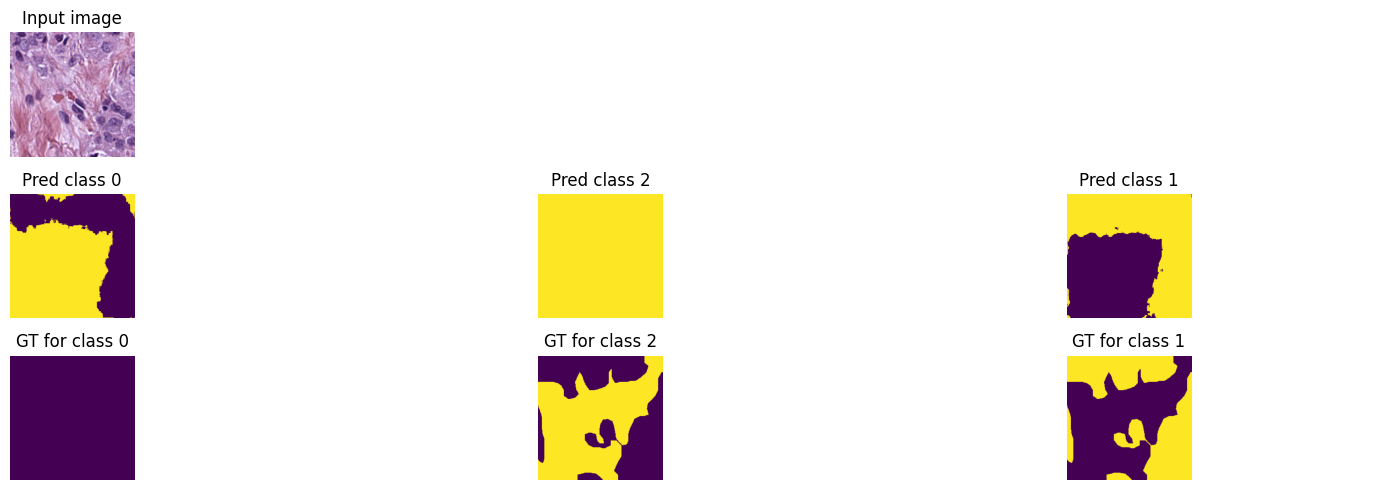

Train loss: 0.58566 | Time: 84m 8s | Val loss: 0.57514
Train_DICE_avg: 0.41596 | Train_Jaccard_avg: 0.34971 | Train_Sensitivity_avg: 0.37176 | Train_Specificity_avg: 0.89550 
Class 0 - Train_DICE: 0.30713 | Train_Jaccard: 0.24872 | Train_Sensitivity: 0.26278 | Train_Specificity: 0.87729 
Class 1 - Train_DICE: 0.52719 | Train_Jaccard: 0.46455 | Train_Sensitivity: 0.51664 | Train_Specificity: 0.80922 
Class 2 - Train_DICE: 0.41355 | Train_Jaccard: 0.33587 | Train_Sensitivity: 0.33587 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42543 | Val_Jaccard_avg: 0.36217 | Val_Sensitivity_avg: 0.37815 | Val_Specificity_avg: 0.88305 
Class 0 - Val_DICE: 0.31226 | Val_Jaccard: 0.25612 | Val_Sensitivity: 0.27029 | Val_Specificity: 0.88557 
Class 1 - Val_DICE: 0.54895 | Val_Jaccard: 0.49184 | Val_Sensitivity: 0.52561 | Val_Specificity: 0.76359 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.57998 | Time: 86m 52s | Val loss: 0.53156
Train_DICE_avg: 0.43080 | Train_Jaccard_avg: 0.36350 | Train_Sensitivity_avg: 0.40194 | Train_Specificity_avg: 0.88868 
Class 0 - Train_DICE: 0.30600 | Train_Jaccard: 0.24736 | Train_Sensitivity: 0.26293 | Train_Specificity: 0.90313 
Class 1 - Train_DICE: 0.57333 | Train_Jaccard: 0.50782 | Train_Sensitivity: 0.60758 | Train_Specificity: 0.76291 
Class 2 - Train_DICE: 0.41306 | Train_Jaccard: 0.33531 | Train_Sensitivity: 0.33531 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.47990 | Val_Jaccard_avg: 0.41602 | Val_Sensitivity_avg: 0.46956 | Val_Specificity_avg: 0.88043 
Class 0 - Val_DICE: 0.30785 | Val_Jaccard: 0.25178 | Val_Sensitivity: 0.26450 | Val_Specificity: 0.95565 
Class 1 - Val_DICE: 0.71676 | Val_Jaccard: 0.65771 | Val_Sensitivity: 0.80562 | Val_Specificity: 0.68565 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.55363 | Time: 89m 35s | Val loss: 0.52172
Train_DICE_avg: 0.45609 | Train_Jaccard_avg: 0.38919 | Train_Sensitivity_avg: 0.45548 | Train_Specificity_avg: 0.89148 
Class 0 - Train_DICE: 0.30328 | Train_Jaccard: 0.24546 | Train_Sensitivity: 0.26094 | Train_Specificity: 0.94231 
Class 1 - Train_DICE: 0.65166 | Train_Jaccard: 0.58653 | Train_Sensitivity: 0.76989 | Train_Specificity: 0.73214 
Class 2 - Train_DICE: 0.41333 | Train_Jaccard: 0.33560 | Train_Sensitivity: 0.33560 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.48330 | Val_Jaccard_avg: 0.41985 | Val_Sensitivity_avg: 0.48529 | Val_Specificity_avg: 0.88258 
Class 0 - Val_DICE: 0.30902 | Val_Jaccard: 0.25351 | Val_Sensitivity: 0.26449 | Val_Specificity: 0.96745 
Class 1 - Val_DICE: 0.72577 | Val_Jaccard: 0.66748 | Val_Sensitivity: 0.85282 | Val_Specificity: 0.68028 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.54381 | Time: 92m 19s | Val loss: 0.51590
Train_DICE_avg: 0.46173 | Train_Jaccard_avg: 0.39517 | Train_Sensitivity_avg: 0.46618 | Train_Specificity_avg: 0.89233 
Class 0 - Train_DICE: 0.30336 | Train_Jaccard: 0.24591 | Train_Sensitivity: 0.26167 | Train_Specificity: 0.94747 
Class 1 - Train_DICE: 0.66834 | Train_Jaccard: 0.60376 | Train_Sensitivity: 0.80104 | Train_Specificity: 0.72951 
Class 2 - Train_DICE: 0.41349 | Train_Jaccard: 0.33584 | Train_Sensitivity: 0.33584 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.48685 | Val_Jaccard_avg: 0.42393 | Val_Sensitivity_avg: 0.48973 | Val_Specificity_avg: 0.88417 
Class 0 - Val_DICE: 0.30940 | Val_Jaccard: 0.25413 | Val_Sensitivity: 0.26599 | Val_Specificity: 0.96778 
Class 1 - Val_DICE: 0.73607 | Val_Jaccard: 0.67909 | Val_Sensitivity: 0.86464 | Val_Specificity: 0.68472 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.53872 | Time: 95m 2s | Val loss: 0.51460
Train_DICE_avg: 0.46484 | Train_Jaccard_avg: 0.39870 | Train_Sensitivity_avg: 0.46892 | Train_Specificity_avg: 0.89502 
Class 0 - Train_DICE: 0.30411 | Train_Jaccard: 0.24697 | Train_Sensitivity: 0.26227 | Train_Specificity: 0.94955 
Class 1 - Train_DICE: 0.67709 | Train_Jaccard: 0.61360 | Train_Sensitivity: 0.80896 | Train_Specificity: 0.73552 
Class 2 - Train_DICE: 0.41330 | Train_Jaccard: 0.33554 | Train_Sensitivity: 0.33554 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.48870 | Val_Jaccard_avg: 0.42621 | Val_Sensitivity_avg: 0.48940 | Val_Specificity_avg: 0.88640 
Class 0 - Val_DICE: 0.30970 | Val_Jaccard: 0.25451 | Val_Sensitivity: 0.26775 | Val_Specificity: 0.96791 
Class 1 - Val_DICE: 0.74130 | Val_Jaccard: 0.68558 | Val_Sensitivity: 0.86189 | Val_Specificity: 0.69128 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


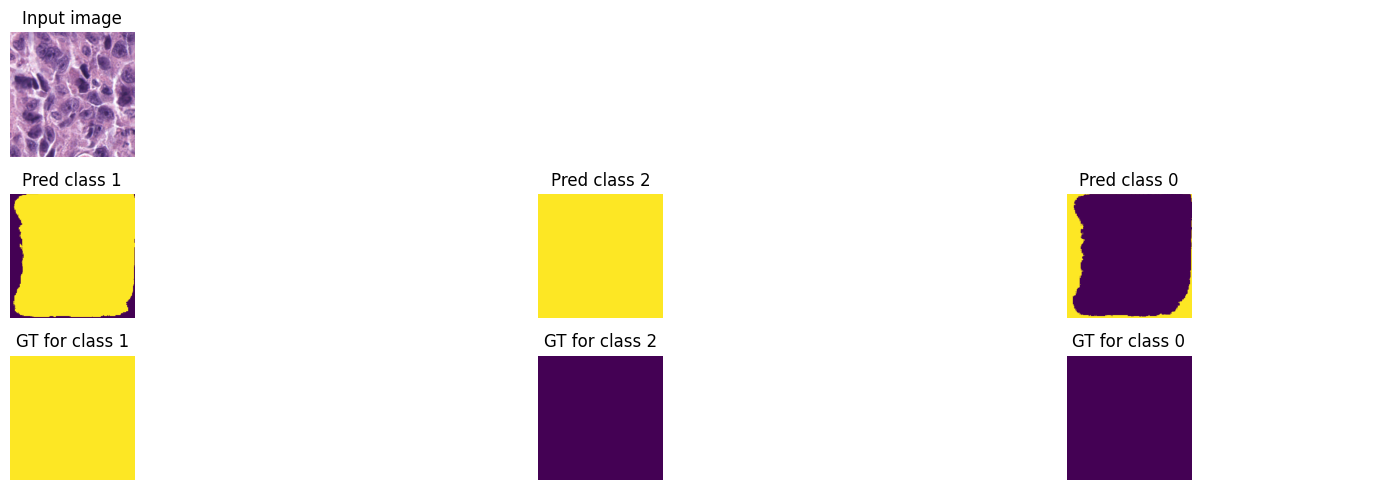

Train loss: 0.53545 | Time: 97m 46s | Val loss: 0.51265
Train_DICE_avg: 0.46859 | Train_Jaccard_avg: 0.40258 | Train_Sensitivity_avg: 0.47002 | Train_Specificity_avg: 0.89767 
Class 0 - Train_DICE: 0.30439 | Train_Jaccard: 0.24709 | Train_Sensitivity: 0.26354 | Train_Specificity: 0.94944 
Class 1 - Train_DICE: 0.68805 | Train_Jaccard: 0.62500 | Train_Sensitivity: 0.81087 | Train_Specificity: 0.74357 
Class 2 - Train_DICE: 0.41335 | Train_Jaccard: 0.33565 | Train_Sensitivity: 0.33565 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.48957 | Val_Jaccard_avg: 0.42715 | Val_Sensitivity_avg: 0.48947 | Val_Specificity_avg: 0.88790 
Class 0 - Val_DICE: 0.30966 | Val_Jaccard: 0.25440 | Val_Sensitivity: 0.26876 | Val_Specificity: 0.96859 
Class 1 - Val_DICE: 0.74396 | Val_Jaccard: 0.68848 | Val_Sensitivity: 0.86111 | Val_Specificity: 0.69510 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.53476 | Time: 100m 31s | Val loss: 0.51303
Train_DICE_avg: 0.46899 | Train_Jaccard_avg: 0.40308 | Train_Sensitivity_avg: 0.47094 | Train_Specificity_avg: 0.89801 
Class 0 - Train_DICE: 0.30629 | Train_Jaccard: 0.24890 | Train_Sensitivity: 0.26476 | Train_Specificity: 0.95035 
Class 1 - Train_DICE: 0.68734 | Train_Jaccard: 0.62469 | Train_Sensitivity: 0.81240 | Train_Specificity: 0.74369 
Class 2 - Train_DICE: 0.41336 | Train_Jaccard: 0.33566 | Train_Sensitivity: 0.33566 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.48963 | Val_Jaccard_avg: 0.42749 | Val_Sensitivity_avg: 0.49182 | Val_Specificity_avg: 0.88942 
Class 0 - Val_DICE: 0.30998 | Val_Jaccard: 0.25463 | Val_Sensitivity: 0.26942 | Val_Specificity: 0.97018 
Class 1 - Val_DICE: 0.74380 | Val_Jaccard: 0.68928 | Val_Sensitivity: 0.86748 | Val_Specificity: 0.69808 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.53016 | Time: 103m 15s | Val loss: 0.51309
Train_DICE_avg: 0.47273 | Train_Jaccard_avg: 0.40731 | Train_Sensitivity_avg: 0.47321 | Train_Specificity_avg: 0.90120 
Class 0 - Train_DICE: 0.30617 | Train_Jaccard: 0.24906 | Train_Sensitivity: 0.26519 | Train_Specificity: 0.95426 
Class 1 - Train_DICE: 0.69851 | Train_Jaccard: 0.63705 | Train_Sensitivity: 0.81863 | Train_Specificity: 0.74935 
Class 2 - Train_DICE: 0.41351 | Train_Jaccard: 0.33582 | Train_Sensitivity: 0.33582 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49075 | Val_Jaccard_avg: 0.42883 | Val_Sensitivity_avg: 0.48922 | Val_Specificity_avg: 0.89150 
Class 0 - Val_DICE: 0.31038 | Val_Jaccard: 0.25489 | Val_Sensitivity: 0.27147 | Val_Specificity: 0.96902 
Class 1 - Val_DICE: 0.74678 | Val_Jaccard: 0.69306 | Val_Sensitivity: 0.85765 | Val_Specificity: 0.70548 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


Train loss: 0.52716 | Time: 106m 0s | Val loss: 0.51039
Train_DICE_avg: 0.47562 | Train_Jaccard_avg: 0.41045 | Train_Sensitivity_avg: 0.47425 | Train_Specificity_avg: 0.90453 
Class 0 - Train_DICE: 0.30772 | Train_Jaccard: 0.25069 | Train_Sensitivity: 0.26670 | Train_Specificity: 0.95530 
Class 1 - Train_DICE: 0.70572 | Train_Jaccard: 0.64494 | Train_Sensitivity: 0.82030 | Train_Specificity: 0.75829 
Class 2 - Train_DICE: 0.41341 | Train_Jaccard: 0.33574 | Train_Sensitivity: 0.33574 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49320 | Val_Jaccard_avg: 0.43130 | Val_Sensitivity_avg: 0.48947 | Val_Specificity_avg: 0.89141 
Class 0 - Val_DICE: 0.31076 | Val_Jaccard: 0.25531 | Val_Sensitivity: 0.27287 | Val_Specificity: 0.96538 
Class 1 - Val_DICE: 0.75375 | Val_Jaccard: 0.70004 | Val_Sensitivity: 0.85699 | Val_Specificity: 0.70884 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.52666 | Time: 108m 45s | Val loss: 0.51154
Train_DICE_avg: 0.47605 | Train_Jaccard_avg: 0.41103 | Train_Sensitivity_avg: 0.47357 | Train_Specificity_avg: 0.90637 
Class 0 - Train_DICE: 0.30784 | Train_Jaccard: 0.25089 | Train_Sensitivity: 0.26670 | Train_Specificity: 0.95475 
Class 1 - Train_DICE: 0.70698 | Train_Jaccard: 0.64661 | Train_Sensitivity: 0.81844 | Train_Specificity: 0.76436 
Class 2 - Train_DICE: 0.41332 | Train_Jaccard: 0.33558 | Train_Sensitivity: 0.33558 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49228 | Val_Jaccard_avg: 0.43060 | Val_Sensitivity_avg: 0.48885 | Val_Specificity_avg: 0.89289 
Class 0 - Val_DICE: 0.31113 | Val_Jaccard: 0.25562 | Val_Sensitivity: 0.27400 | Val_Specificity: 0.96667 
Class 1 - Val_DICE: 0.75062 | Val_Jaccard: 0.69762 | Val_Sensitivity: 0.85398 | Val_Specificity: 0.71199 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


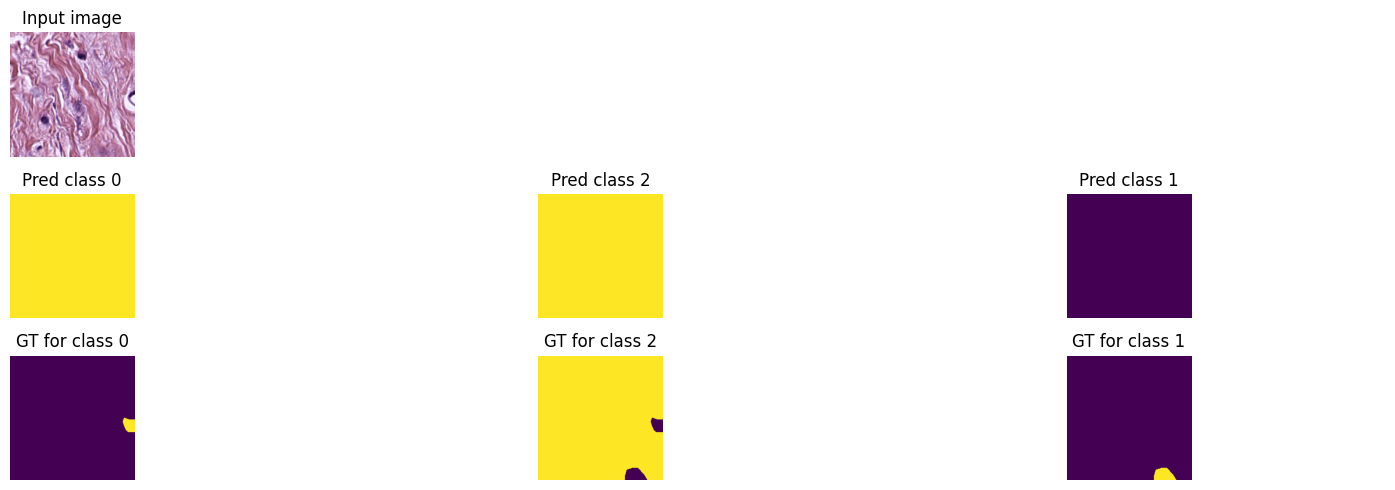

Train loss: 0.52403 | Time: 111m 29s | Val loss: 0.51218
Train_DICE_avg: 0.47834 | Train_Jaccard_avg: 0.41349 | Train_Sensitivity_avg: 0.47421 | Train_Specificity_avg: 0.90677 
Class 0 - Train_DICE: 0.30900 | Train_Jaccard: 0.25176 | Train_Sensitivity: 0.26835 | Train_Specificity: 0.95463 
Class 1 - Train_DICE: 0.71227 | Train_Jaccard: 0.65260 | Train_Sensitivity: 0.81815 | Train_Specificity: 0.76570 
Class 2 - Train_DICE: 0.41374 | Train_Jaccard: 0.33612 | Train_Sensitivity: 0.33612 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49149 | Val_Jaccard_avg: 0.42965 | Val_Sensitivity_avg: 0.48727 | Val_Specificity_avg: 0.89276 
Class 0 - Val_DICE: 0.31163 | Val_Jaccard: 0.25622 | Val_Sensitivity: 0.27375 | Val_Specificity: 0.96802 
Class 1 - Val_DICE: 0.74773 | Val_Jaccard: 0.69417 | Val_Sensitivity: 0.84949 | Val_Specificity: 0.71025 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.52237 | Time: 114m 14s | Val loss: 0.51036
Train_DICE_avg: 0.47948 | Train_Jaccard_avg: 0.41454 | Train_Sensitivity_avg: 0.47310 | Train_Specificity_avg: 0.90875 
Class 0 - Train_DICE: 0.30931 | Train_Jaccard: 0.25231 | Train_Sensitivity: 0.26923 | Train_Specificity: 0.95479 
Class 1 - Train_DICE: 0.71586 | Train_Jaccard: 0.65578 | Train_Sensitivity: 0.81452 | Train_Specificity: 0.77147 
Class 2 - Train_DICE: 0.41326 | Train_Jaccard: 0.33554 | Train_Sensitivity: 0.33554 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49278 | Val_Jaccard_avg: 0.43106 | Val_Sensitivity_avg: 0.49318 | Val_Specificity_avg: 0.89395 
Class 0 - Val_DICE: 0.31194 | Val_Jaccard: 0.25642 | Val_Sensitivity: 0.27401 | Val_Specificity: 0.96987 
Class 1 - Val_DICE: 0.75131 | Val_Jaccard: 0.69819 | Val_Sensitivity: 0.86697 | Val_Specificity: 0.71198 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.52066 | Time: 116m 59s | Val loss: 0.51254
Train_DICE_avg: 0.48085 | Train_Jaccard_avg: 0.41609 | Train_Sensitivity_avg: 0.47416 | Train_Specificity_avg: 0.90919 
Class 0 - Train_DICE: 0.31040 | Train_Jaccard: 0.25318 | Train_Sensitivity: 0.27001 | Train_Specificity: 0.95596 
Class 1 - Train_DICE: 0.71879 | Train_Jaccard: 0.65943 | Train_Sensitivity: 0.81682 | Train_Specificity: 0.77162 
Class 2 - Train_DICE: 0.41337 | Train_Jaccard: 0.33565 | Train_Sensitivity: 0.33565 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49159 | Val_Jaccard_avg: 0.42989 | Val_Sensitivity_avg: 0.48518 | Val_Specificity_avg: 0.89380 
Class 0 - Val_DICE: 0.31178 | Val_Jaccard: 0.25613 | Val_Sensitivity: 0.27595 | Val_Specificity: 0.96524 
Class 1 - Val_DICE: 0.74791 | Val_Jaccard: 0.69500 | Val_Sensitivity: 0.84102 | Val_Specificity: 0.71617 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.51894 | Time: 119m 44s | Val loss: 0.51195
Train_DICE_avg: 0.48316 | Train_Jaccard_avg: 0.41854 | Train_Sensitivity_avg: 0.47571 | Train_Specificity_avg: 0.90874 
Class 0 - Train_DICE: 0.31072 | Train_Jaccard: 0.25365 | Train_Sensitivity: 0.27002 | Train_Specificity: 0.95647 
Class 1 - Train_DICE: 0.72521 | Train_Jaccard: 0.66612 | Train_Sensitivity: 0.82126 | Train_Specificity: 0.76975 
Class 2 - Train_DICE: 0.41354 | Train_Jaccard: 0.33586 | Train_Sensitivity: 0.33586 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49167 | Val_Jaccard_avg: 0.42988 | Val_Sensitivity_avg: 0.48645 | Val_Specificity_avg: 0.89396 
Class 0 - Val_DICE: 0.31187 | Val_Jaccard: 0.25619 | Val_Sensitivity: 0.27695 | Val_Specificity: 0.96481 
Class 1 - Val_DICE: 0.74804 | Val_Jaccard: 0.69490 | Val_Sensitivity: 0.84384 | Val_Specificity: 0.71708 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.51791 | Time: 122m 30s | Val loss: 0.51120
Train_DICE_avg: 0.48371 | Train_Jaccard_avg: 0.41922 | Train_Sensitivity_avg: 0.47734 | Train_Specificity_avg: 0.91031 
Class 0 - Train_DICE: 0.31089 | Train_Jaccard: 0.25370 | Train_Sensitivity: 0.26939 | Train_Specificity: 0.95968 
Class 1 - Train_DICE: 0.72676 | Train_Jaccard: 0.66809 | Train_Sensitivity: 0.82676 | Train_Specificity: 0.77124 
Class 2 - Train_DICE: 0.41349 | Train_Jaccard: 0.33587 | Train_Sensitivity: 0.33587 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49216 | Val_Jaccard_avg: 0.43058 | Val_Sensitivity_avg: 0.48779 | Val_Specificity_avg: 0.89464 
Class 0 - Val_DICE: 0.31177 | Val_Jaccard: 0.25607 | Val_Sensitivity: 0.27691 | Val_Specificity: 0.96536 
Class 1 - Val_DICE: 0.74960 | Val_Jaccard: 0.69712 | Val_Sensitivity: 0.84789 | Val_Specificity: 0.71855 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


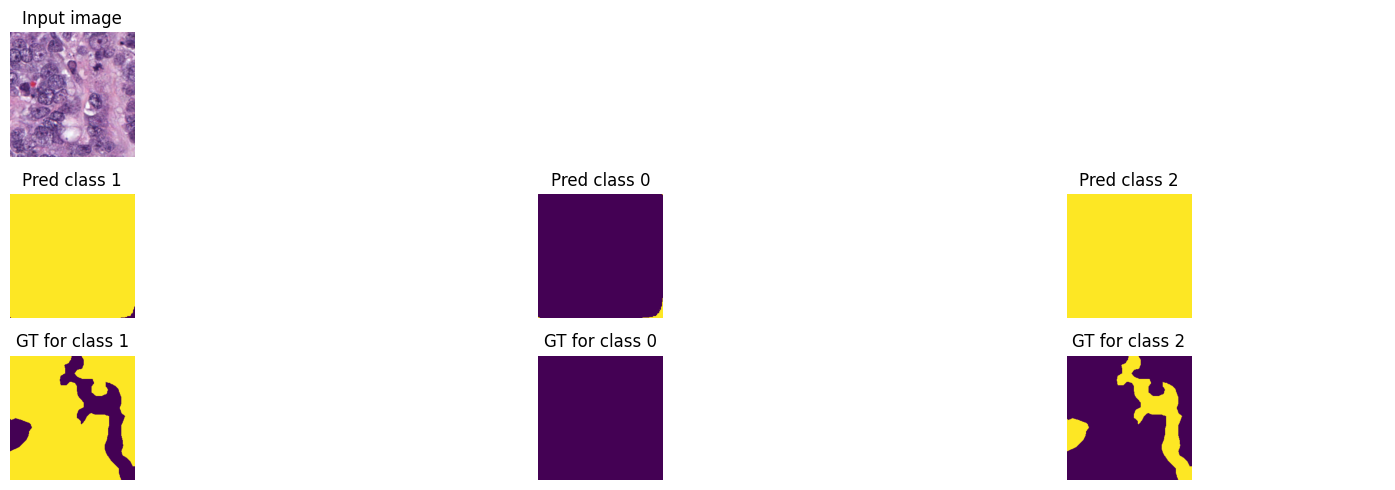

Train loss: 0.51684 | Time: 125m 16s | Val loss: 0.51229
Train_DICE_avg: 0.48517 | Train_Jaccard_avg: 0.42110 | Train_Sensitivity_avg: 0.47869 | Train_Specificity_avg: 0.91237 
Class 0 - Train_DICE: 0.31154 | Train_Jaccard: 0.25451 | Train_Sensitivity: 0.27071 | Train_Specificity: 0.96039 
Class 1 - Train_DICE: 0.73054 | Train_Jaccard: 0.67309 | Train_Sensitivity: 0.82966 | Train_Specificity: 0.77671 
Class 2 - Train_DICE: 0.41343 | Train_Jaccard: 0.33571 | Train_Sensitivity: 0.33571 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49139 | Val_Jaccard_avg: 0.42977 | Val_Sensitivity_avg: 0.48866 | Val_Specificity_avg: 0.89402 
Class 0 - Val_DICE: 0.31203 | Val_Jaccard: 0.25633 | Val_Sensitivity: 0.27638 | Val_Specificity: 0.96464 
Class 1 - Val_DICE: 0.74706 | Val_Jaccard: 0.69444 | Val_Sensitivity: 0.85105 | Val_Specificity: 0.71742 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.51611 | Time: 128m 1s | Val loss: 0.51248
Train_DICE_avg: 0.48605 | Train_Jaccard_avg: 0.42180 | Train_Sensitivity_avg: 0.47759 | Train_Specificity_avg: 0.91270 
Class 0 - Train_DICE: 0.31285 | Train_Jaccard: 0.25567 | Train_Sensitivity: 0.27215 | Train_Specificity: 0.95842 
Class 1 - Train_DICE: 0.73179 | Train_Jaccard: 0.67389 | Train_Sensitivity: 0.82476 | Train_Specificity: 0.77967 
Class 2 - Train_DICE: 0.41351 | Train_Jaccard: 0.33585 | Train_Sensitivity: 0.33585 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49089 | Val_Jaccard_avg: 0.42934 | Val_Sensitivity_avg: 0.48954 | Val_Specificity_avg: 0.89445 
Class 0 - Val_DICE: 0.31242 | Val_Jaccard: 0.25681 | Val_Sensitivity: 0.27609 | Val_Specificity: 0.96735 
Class 1 - Val_DICE: 0.74514 | Val_Jaccard: 0.69266 | Val_Sensitivity: 0.85396 | Val_Specificity: 0.71600 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.51479 | Time: 130m 46s | Val loss: 0.51176
Train_DICE_avg: 0.48697 | Train_Jaccard_avg: 0.42300 | Train_Sensitivity_avg: 0.47791 | Train_Specificity_avg: 0.91289 
Class 0 - Train_DICE: 0.31310 | Train_Jaccard: 0.25625 | Train_Sensitivity: 0.27308 | Train_Specificity: 0.96015 
Class 1 - Train_DICE: 0.73461 | Train_Jaccard: 0.67729 | Train_Sensitivity: 0.82518 | Train_Specificity: 0.77851 
Class 2 - Train_DICE: 0.41320 | Train_Jaccard: 0.33547 | Train_Sensitivity: 0.33547 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49114 | Val_Jaccard_avg: 0.42965 | Val_Sensitivity_avg: 0.48341 | Val_Specificity_avg: 0.89457 
Class 0 - Val_DICE: 0.31228 | Val_Jaccard: 0.25663 | Val_Sensitivity: 0.27828 | Val_Specificity: 0.96301 
Class 1 - Val_DICE: 0.74605 | Val_Jaccard: 0.69376 | Val_Sensitivity: 0.83340 | Val_Specificity: 0.72069 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.51516 | Time: 133m 31s | Val loss: 0.51142
Train_DICE_avg: 0.48634 | Train_Jaccard_avg: 0.42225 | Train_Sensitivity_avg: 0.47878 | Train_Specificity_avg: 0.91201 
Class 0 - Train_DICE: 0.31315 | Train_Jaccard: 0.25593 | Train_Sensitivity: 0.27221 | Train_Specificity: 0.95885 
Class 1 - Train_DICE: 0.73266 | Train_Jaccard: 0.67538 | Train_Sensitivity: 0.82869 | Train_Specificity: 0.77717 
Class 2 - Train_DICE: 0.41321 | Train_Jaccard: 0.33545 | Train_Sensitivity: 0.33545 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49156 | Val_Jaccard_avg: 0.42996 | Val_Sensitivity_avg: 0.48595 | Val_Specificity_avg: 0.89399 
Class 0 - Val_DICE: 0.31311 | Val_Jaccard: 0.25751 | Val_Sensitivity: 0.27732 | Val_Specificity: 0.96407 
Class 1 - Val_DICE: 0.74649 | Val_Jaccard: 0.69380 | Val_Sensitivity: 0.84198 | Val_Specificity: 0.71791 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.51335 | Time: 136m 16s | Val loss: 0.50951
Train_DICE_avg: 0.48833 | Train_Jaccard_avg: 0.42438 | Train_Sensitivity_avg: 0.47960 | Train_Specificity_avg: 0.91335 
Class 0 - Train_DICE: 0.31366 | Train_Jaccard: 0.25680 | Train_Sensitivity: 0.27311 | Train_Specificity: 0.96089 
Class 1 - Train_DICE: 0.73803 | Train_Jaccard: 0.68077 | Train_Sensitivity: 0.83013 | Train_Specificity: 0.77917 
Class 2 - Train_DICE: 0.41330 | Train_Jaccard: 0.33556 | Train_Sensitivity: 0.33556 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49336 | Val_Jaccard_avg: 0.43181 | Val_Sensitivity_avg: 0.49075 | Val_Specificity_avg: 0.89514 
Class 0 - Val_DICE: 0.31339 | Val_Jaccard: 0.25770 | Val_Sensitivity: 0.27784 | Val_Specificity: 0.96674 
Class 1 - Val_DICE: 0.75160 | Val_Jaccard: 0.69918 | Val_Sensitivity: 0.85586 | Val_Specificity: 0.71867 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


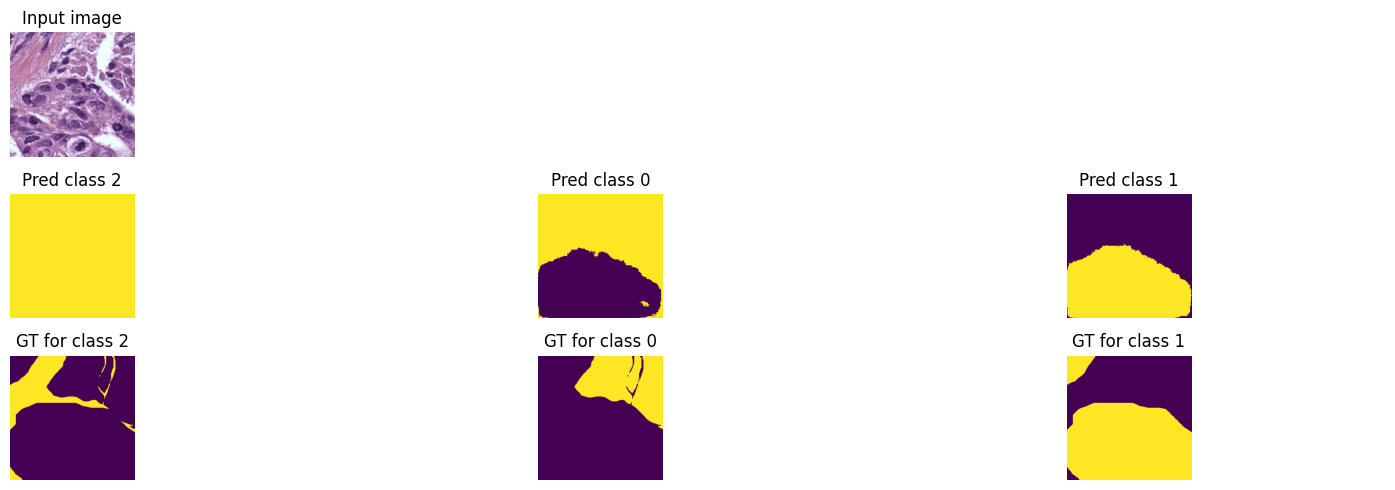

Train loss: 0.51222 | Time: 139m 2s | Val loss: 0.50933
Train_DICE_avg: 0.48920 | Train_Jaccard_avg: 0.42529 | Train_Sensitivity_avg: 0.47852 | Train_Specificity_avg: 0.91576 
Class 0 - Train_DICE: 0.31427 | Train_Jaccard: 0.25731 | Train_Sensitivity: 0.27393 | Train_Specificity: 0.95994 
Class 1 - Train_DICE: 0.74005 | Train_Jaccard: 0.68299 | Train_Sensitivity: 0.82608 | Train_Specificity: 0.78734 
Class 2 - Train_DICE: 0.41328 | Train_Jaccard: 0.33556 | Train_Sensitivity: 0.33556 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49266 | Val_Jaccard_avg: 0.43121 | Val_Sensitivity_avg: 0.48882 | Val_Specificity_avg: 0.89488 
Class 0 - Val_DICE: 0.31288 | Val_Jaccard: 0.25722 | Val_Sensitivity: 0.27843 | Val_Specificity: 0.96414 
Class 1 - Val_DICE: 0.75000 | Val_Jaccard: 0.69785 | Val_Sensitivity: 0.84947 | Val_Specificity: 0.72049 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.51244 | Time: 141m 48s | Val loss: 0.50847
Train_DICE_avg: 0.48895 | Train_Jaccard_avg: 0.42480 | Train_Sensitivity_avg: 0.47902 | Train_Specificity_avg: 0.91489 
Class 0 - Train_DICE: 0.31358 | Train_Jaccard: 0.25631 | Train_Sensitivity: 0.27286 | Train_Specificity: 0.95939 
Class 1 - Train_DICE: 0.74016 | Train_Jaccard: 0.68272 | Train_Sensitivity: 0.82885 | Train_Specificity: 0.78527 
Class 2 - Train_DICE: 0.41310 | Train_Jaccard: 0.33535 | Train_Sensitivity: 0.33535 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49336 | Val_Jaccard_avg: 0.43182 | Val_Sensitivity_avg: 0.49182 | Val_Specificity_avg: 0.89483 
Class 0 - Val_DICE: 0.31418 | Val_Jaccard: 0.25845 | Val_Sensitivity: 0.27859 | Val_Specificity: 0.96496 
Class 1 - Val_DICE: 0.75079 | Val_Jaccard: 0.69846 | Val_Sensitivity: 0.85831 | Val_Specificity: 0.71952 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.51220 | Time: 144m 33s | Val loss: 0.50727
Train_DICE_avg: 0.48928 | Train_Jaccard_avg: 0.42541 | Train_Sensitivity_avg: 0.48058 | Train_Specificity_avg: 0.91450 
Class 0 - Train_DICE: 0.31457 | Train_Jaccard: 0.25745 | Train_Sensitivity: 0.27409 | Train_Specificity: 0.96037 
Class 1 - Train_DICE: 0.73979 | Train_Jaccard: 0.68301 | Train_Sensitivity: 0.83189 | Train_Specificity: 0.78313 
Class 2 - Train_DICE: 0.41350 | Train_Jaccard: 0.33576 | Train_Sensitivity: 0.33576 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49374 | Val_Jaccard_avg: 0.43217 | Val_Sensitivity_avg: 0.49265 | Val_Specificity_avg: 0.89539 
Class 0 - Val_DICE: 0.31471 | Val_Jaccard: 0.25904 | Val_Sensitivity: 0.27983 | Val_Specificity: 0.96590 
Class 1 - Val_DICE: 0.75142 | Val_Jaccard: 0.69893 | Val_Sensitivity: 0.85956 | Val_Specificity: 0.72027 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.51175 | Time: 147m 19s | Val loss: 0.50678
Train_DICE_avg: 0.48943 | Train_Jaccard_avg: 0.42574 | Train_Sensitivity_avg: 0.48058 | Train_Specificity_avg: 0.91603 
Class 0 - Train_DICE: 0.31443 | Train_Jaccard: 0.25773 | Train_Sensitivity: 0.27399 | Train_Specificity: 0.96149 
Class 1 - Train_DICE: 0.74040 | Train_Jaccard: 0.68374 | Train_Sensitivity: 0.83201 | Train_Specificity: 0.78659 
Class 2 - Train_DICE: 0.41347 | Train_Jaccard: 0.33574 | Train_Sensitivity: 0.33574 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49393 | Val_Jaccard_avg: 0.43239 | Val_Sensitivity_avg: 0.49412 | Val_Specificity_avg: 0.89495 
Class 0 - Val_DICE: 0.31585 | Val_Jaccard: 0.26022 | Val_Sensitivity: 0.28018 | Val_Specificity: 0.96620 
Class 1 - Val_DICE: 0.75085 | Val_Jaccard: 0.69840 | Val_Sensitivity: 0.86363 | Val_Specificity: 0.71865 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.51009 | Time: 150m 4s | Val loss: 0.50542
Train_DICE_avg: 0.49091 | Train_Jaccard_avg: 0.42708 | Train_Sensitivity_avg: 0.48166 | Train_Specificity_avg: 0.91692 
Class 0 - Train_DICE: 0.31469 | Train_Jaccard: 0.25773 | Train_Sensitivity: 0.27403 | Train_Specificity: 0.96267 
Class 1 - Train_DICE: 0.74459 | Train_Jaccard: 0.68768 | Train_Sensitivity: 0.83512 | Train_Specificity: 0.78810 
Class 2 - Train_DICE: 0.41345 | Train_Jaccard: 0.33584 | Train_Sensitivity: 0.33584 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49571 | Val_Jaccard_avg: 0.43435 | Val_Sensitivity_avg: 0.49298 | Val_Specificity_avg: 0.89792 
Class 0 - Val_DICE: 0.31989 | Val_Jaccard: 0.26429 | Val_Sensitivity: 0.28567 | Val_Specificity: 0.96475 
Class 1 - Val_DICE: 0.75214 | Val_Jaccard: 0.70019 | Val_Sensitivity: 0.85470 | Val_Specificity: 0.72901 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


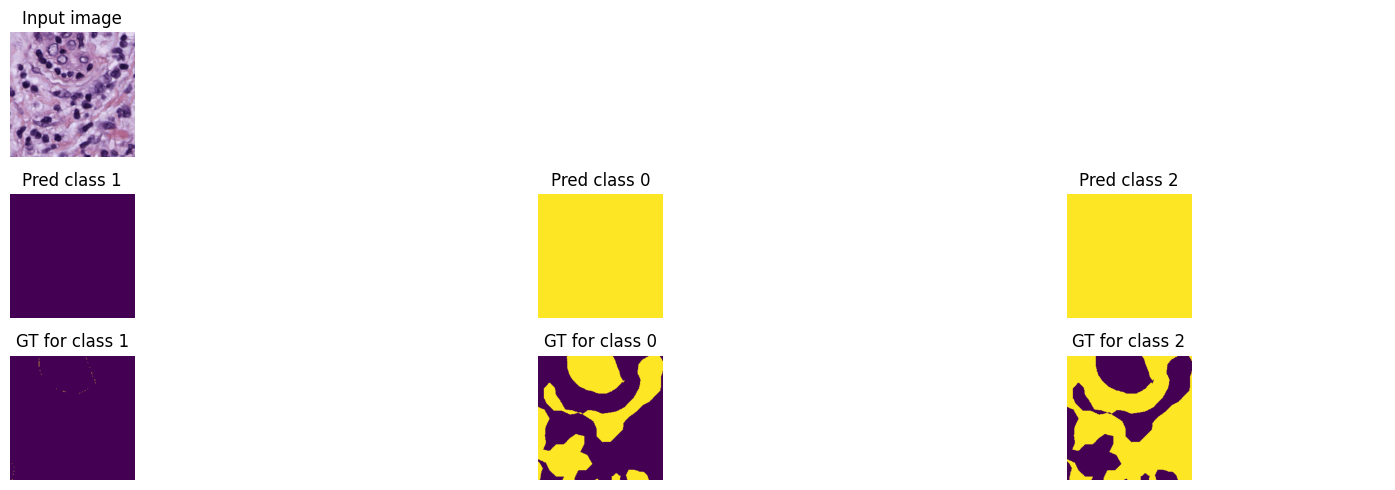

Train loss: 0.51060 | Time: 152m 50s | Val loss: 0.50220
Train_DICE_avg: 0.49082 | Train_Jaccard_avg: 0.42705 | Train_Sensitivity_avg: 0.47990 | Train_Specificity_avg: 0.91791 
Class 0 - Train_DICE: 0.31633 | Train_Jaccard: 0.25971 | Train_Sensitivity: 0.27818 | Train_Specificity: 0.95986 
Class 1 - Train_DICE: 0.74270 | Train_Jaccard: 0.68575 | Train_Sensitivity: 0.82582 | Train_Specificity: 0.79389 
Class 2 - Train_DICE: 0.41344 | Train_Jaccard: 0.33569 | Train_Sensitivity: 0.33569 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.50102 | Val_Jaccard_avg: 0.43965 | Val_Sensitivity_avg: 0.49729 | Val_Specificity_avg: 0.90330 
Class 0 - Val_DICE: 0.33563 | Val_Jaccard: 0.28017 | Val_Sensitivity: 0.30304 | Val_Specificity: 0.96438 
Class 1 - Val_DICE: 0.75231 | Val_Jaccard: 0.70023 | Val_Sensitivity: 0.85029 | Val_Specificity: 0.74553 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.50881 | Time: 155m 35s | Val loss: 0.49906
Train_DICE_avg: 0.49300 | Train_Jaccard_avg: 0.42927 | Train_Sensitivity_avg: 0.48223 | Train_Specificity_avg: 0.91763 
Class 0 - Train_DICE: 0.32018 | Train_Jaccard: 0.26343 | Train_Sensitivity: 0.28251 | Train_Specificity: 0.95927 
Class 1 - Train_DICE: 0.74554 | Train_Jaccard: 0.68881 | Train_Sensitivity: 0.82862 | Train_Specificity: 0.79361 
Class 2 - Train_DICE: 0.41327 | Train_Jaccard: 0.33556 | Train_Sensitivity: 0.33556 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.51010 | Val_Jaccard_avg: 0.44888 | Val_Sensitivity_avg: 0.50552 | Val_Specificity_avg: 0.90907 
Class 0 - Val_DICE: 0.36540 | Val_Jaccard: 0.30991 | Val_Sensitivity: 0.33439 | Val_Specificity: 0.96138 
Class 1 - Val_DICE: 0.74981 | Val_Jaccard: 0.69818 | Val_Sensitivity: 0.84361 | Val_Specificity: 0.76582 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.50789 | Time: 158m 19s | Val loss: 0.49280
Train_DICE_avg: 0.49598 | Train_Jaccard_avg: 0.43238 | Train_Sensitivity_avg: 0.48641 | Train_Specificity_avg: 0.91921 
Class 0 - Train_DICE: 0.33008 | Train_Jaccard: 0.27349 | Train_Sensitivity: 0.29301 | Train_Specificity: 0.95964 
Class 1 - Train_DICE: 0.74446 | Train_Jaccard: 0.68800 | Train_Sensitivity: 0.83057 | Train_Specificity: 0.79800 
Class 2 - Train_DICE: 0.41338 | Train_Jaccard: 0.33565 | Train_Sensitivity: 0.33565 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.51911 | Val_Jaccard_avg: 0.45813 | Val_Sensitivity_avg: 0.51507 | Val_Specificity_avg: 0.91573 
Class 0 - Val_DICE: 0.39020 | Val_Jaccard: 0.33500 | Val_Sensitivity: 0.36080 | Val_Specificity: 0.96168 
Class 1 - Val_DICE: 0.75204 | Val_Jaccard: 0.70083 | Val_Sensitivity: 0.84586 | Val_Specificity: 0.78552 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


Train loss: 0.50615 | Time: 161m 4s | Val loss: 0.48684
Train_DICE_avg: 0.49892 | Train_Jaccard_avg: 0.43552 | Train_Sensitivity_avg: 0.49036 | Train_Specificity_avg: 0.92226 
Class 0 - Train_DICE: 0.33905 | Train_Jaccard: 0.28250 | Train_Sensitivity: 0.30416 | Train_Specificity: 0.95788 
Class 1 - Train_DICE: 0.74427 | Train_Jaccard: 0.68828 | Train_Sensitivity: 0.83114 | Train_Specificity: 0.80889 
Class 2 - Train_DICE: 0.41344 | Train_Jaccard: 0.33577 | Train_Sensitivity: 0.33577 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.52469 | Val_Jaccard_avg: 0.46385 | Val_Sensitivity_avg: 0.52150 | Val_Specificity_avg: 0.92201 
Class 0 - Val_DICE: 0.40652 | Val_Jaccard: 0.35170 | Val_Sensitivity: 0.38081 | Val_Specificity: 0.95656 
Class 1 - Val_DICE: 0.75247 | Val_Jaccard: 0.70128 | Val_Sensitivity: 0.84512 | Val_Specificity: 0.80947 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.50389 | Time: 163m 49s | Val loss: 0.48168
Train_DICE_avg: 0.50149 | Train_Jaccard_avg: 0.43791 | Train_Sensitivity_avg: 0.49200 | Train_Specificity_avg: 0.92449 
Class 0 - Train_DICE: 0.34492 | Train_Jaccard: 0.28826 | Train_Sensitivity: 0.31052 | Train_Specificity: 0.95745 
Class 1 - Train_DICE: 0.74638 | Train_Jaccard: 0.68997 | Train_Sensitivity: 0.82999 | Train_Specificity: 0.81603 
Class 2 - Train_DICE: 0.41316 | Train_Jaccard: 0.33551 | Train_Sensitivity: 0.33551 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.52832 | Val_Jaccard_avg: 0.46762 | Val_Sensitivity_avg: 0.52727 | Val_Specificity_avg: 0.92599 
Class 0 - Val_DICE: 0.41496 | Val_Jaccard: 0.36024 | Val_Sensitivity: 0.38955 | Val_Specificity: 0.95693 
Class 1 - Val_DICE: 0.75490 | Val_Jaccard: 0.70406 | Val_Sensitivity: 0.85370 | Val_Specificity: 0.82104 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


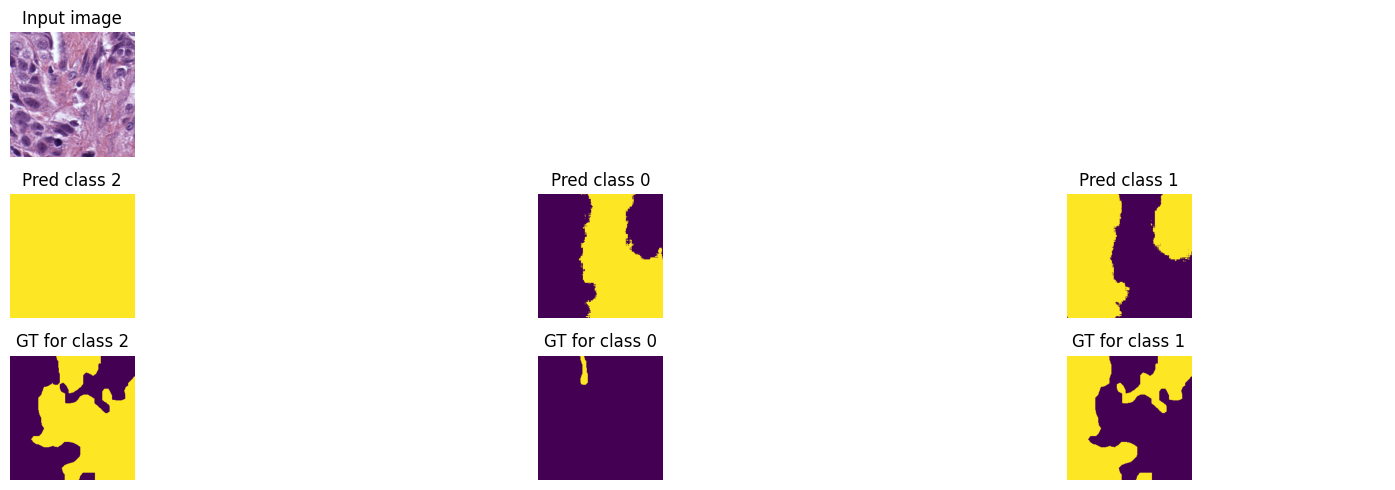

Train loss: 0.50194 | Time: 166m 34s | Val loss: 0.47857
Train_DICE_avg: 0.50364 | Train_Jaccard_avg: 0.44014 | Train_Sensitivity_avg: 0.49590 | Train_Specificity_avg: 0.92802 
Class 0 - Train_DICE: 0.35061 | Train_Jaccard: 0.29419 | Train_Sensitivity: 0.31987 | Train_Specificity: 0.95924 
Class 1 - Train_DICE: 0.74712 | Train_Jaccard: 0.69083 | Train_Sensitivity: 0.83243 | Train_Specificity: 0.82481 
Class 2 - Train_DICE: 0.41320 | Train_Jaccard: 0.33541 | Train_Sensitivity: 0.33541 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53112 | Val_Jaccard_avg: 0.47061 | Val_Sensitivity_avg: 0.52946 | Val_Specificity_avg: 0.92982 
Class 0 - Val_DICE: 0.42475 | Val_Jaccard: 0.37032 | Val_Sensitivity: 0.40252 | Val_Specificity: 0.95903 
Class 1 - Val_DICE: 0.75352 | Val_Jaccard: 0.70297 | Val_Sensitivity: 0.84731 | Val_Specificity: 0.83042 
Class 2 - Val_DICE: 0.41510 | Val_Jaccard: 0.33856 | Val_Sensitivity: 0.33856 | Val_Specificity: 1.00000 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 229MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:13<00:00,  2.16it/s]


Global Performance Metrics:
Loss mean: 0.47670, std: 0.03003
Dice Coefficient mean: 0.53584, std: 0.15642
Jaccard Index mean: 0.47565, std: 0.16250
Sensitivity mean: 0.91947, std: 0.11988
Specificity mean: 0.45251, std: 0.13354

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.44160, std: 0.41182
Jaccard mean: 0.38825, std: 0.39796
Sensitivity mean: 0.93161, std: 0.21481
Specificity mean: 0.49982, std: 0.42068

Class 1:
Dice mean: 0.75943, std: 0.34034
Jaccard mean: 0.70821, std: 0.35121
Sensitivity mean: 0.82681, std: 0.31578
Specificity mean: 0.80505, std: 0.31902

Class 2:
Dice mean: 0.40650, std: 0.36067
Jaccard mean: 0.33049, std: 0.33871
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.05268, std: 0.22264


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-FCN-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.47 GB
GPU Memory - Reserved: 4.24 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


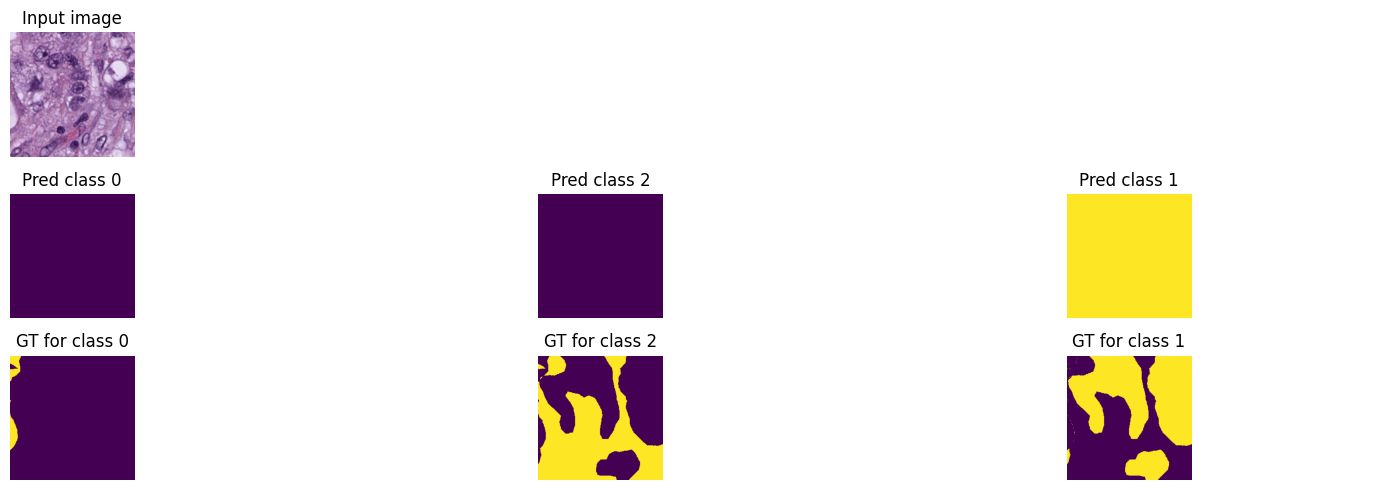

Train loss: 0.67811 | Time: 2m 40s | Val loss: 0.63747
Train_DICE_avg: 0.25229 | Train_Jaccard_avg: 0.24441 | Train_Sensitivity_avg: 0.86773 | Train_Specificity_avg: 0.67597 
Class 0 - Train_DICE: 0.40408 | Train_Jaccard: 0.40368 | Train_Sensitivity: 0.94460 | Train_Specificity: 0.76957 
Class 1 - Train_DICE: 0.16147 | Train_Jaccard: 0.13825 | Train_Sensitivity: 0.65859 | Train_Specificity: 0.59375 
Class 2 - Train_DICE: 0.19131 | Train_Jaccard: 0.19131 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.66458 
Val_DICE_avg: 0.29500 | Val_Jaccard_avg: 0.29500 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.66669 
Class 0 - Val_DICE: 0.43574 | Val_Jaccard: 0.43574 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.76814 
Class 1 - Val_DICE: 0.26333 | Val_Jaccard: 0.26333 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.66144 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.60995 | Time: 5m 21s | Val loss: 0.57558
Train_DICE_avg: 0.29593 | Train_Jaccard_avg: 0.29587 | Train_Sensitivity_avg: 0.99213 | Train_Specificity_avg: 0.67566 
Class 0 - Train_DICE: 0.42929 | Train_Jaccard: 0.42929 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.76922 
Class 1 - Train_DICE: 0.27522 | Train_Jaccard: 0.27522 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59377 
Class 2 - Train_DICE: 0.18327 | Train_Jaccard: 0.18311 | Train_Sensitivity: 0.97640 | Train_Specificity: 0.66399 
Val_DICE_avg: 0.29500 | Val_Jaccard_avg: 0.29500 | Val_Sensitivity_avg: 0.99921 | Val_Specificity_avg: 0.66669 
Class 0 - Val_DICE: 0.43574 | Val_Jaccard: 0.43574 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.76814 
Class 1 - Val_DICE: 0.26333 | Val_Jaccard: 0.26333 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.66144 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.57490 | Time: 8m 2s | Val loss: 0.55610
Train_DICE_avg: 0.27754 | Train_Jaccard_avg: 0.27276 | Train_Sensitivity_avg: 0.92870 | Train_Specificity_avg: 0.67728 
Class 0 - Train_DICE: 0.38504 | Train_Jaccard: 0.37144 | Train_Sensitivity: 0.84451 | Train_Specificity: 0.77366 
Class 1 - Train_DICE: 0.27627 | Train_Jaccard: 0.27627 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59369 
Class 2 - Train_DICE: 0.17130 | Train_Jaccard: 0.17056 | Train_Sensitivity: 0.94160 | Train_Specificity: 0.66450 
Val_DICE_avg: 0.29759 | Val_Jaccard_avg: 0.28682 | Val_Sensitivity_avg: 0.92671 | Val_Specificity_avg: 0.67005 
Class 0 - Val_DICE: 0.44352 | Val_Jaccard: 0.41122 | Val_Sensitivity: 0.78012 | Val_Specificity: 0.77820 
Class 1 - Val_DICE: 0.26333 | Val_Jaccard: 0.26333 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.66144 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.56294 | Time: 10m 44s | Val loss: 0.54205
Train_DICE_avg: 0.27693 | Train_Jaccard_avg: 0.26720 | Train_Sensitivity_avg: 0.90844 | Train_Specificity_avg: 0.67939 
Class 0 - Train_DICE: 0.36398 | Train_Jaccard: 0.33481 | Train_Sensitivity: 0.73025 | Train_Specificity: 0.77986 
Class 1 - Train_DICE: 0.27499 | Train_Jaccard: 0.27499 | Train_Sensitivity: 0.99893 | Train_Specificity: 0.59380 
Class 2 - Train_DICE: 0.19182 | Train_Jaccard: 0.19180 | Train_Sensitivity: 0.99613 | Train_Specificity: 0.66452 
Val_DICE_avg: 0.30265 | Val_Jaccard_avg: 0.29066 | Val_Sensitivity_avg: 0.92215 | Val_Specificity_avg: 0.67088 
Class 0 - Val_DICE: 0.46235 | Val_Jaccard: 0.42642 | Val_Sensitivity: 0.77854 | Val_Specificity: 0.78070 
Class 1 - Val_DICE: 0.25966 | Val_Jaccard: 0.25965 | Val_Sensitivity: 0.98789 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.66144 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.55345 | Time: 13m 25s | Val loss: 0.52841
Train_DICE_avg: 0.27081 | Train_Jaccard_avg: 0.25870 | Train_Sensitivity_avg: 0.87377 | Train_Specificity_avg: 0.68050 
Class 0 - Train_DICE: 0.37543 | Train_Jaccard: 0.34212 | Train_Sensitivity: 0.71755 | Train_Specificity: 0.78224 
Class 1 - Train_DICE: 0.24522 | Train_Jaccard: 0.24221 | Train_Sensitivity: 0.90376 | Train_Specificity: 0.59470 
Class 2 - Train_DICE: 0.19177 | Train_Jaccard: 0.19177 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.66456 
Val_DICE_avg: 0.30273 | Val_Jaccard_avg: 0.28210 | Val_Sensitivity_avg: 0.86244 | Val_Specificity_avg: 0.67243 
Class 0 - Val_DICE: 0.46959 | Val_Jaccard: 0.43005 | Val_Sensitivity: 0.76014 | Val_Specificity: 0.78260 
Class 1 - Val_DICE: 0.25268 | Val_Jaccard: 0.23032 | Val_Sensitivity: 0.82718 | Val_Specificity: 0.57324 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.66144 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


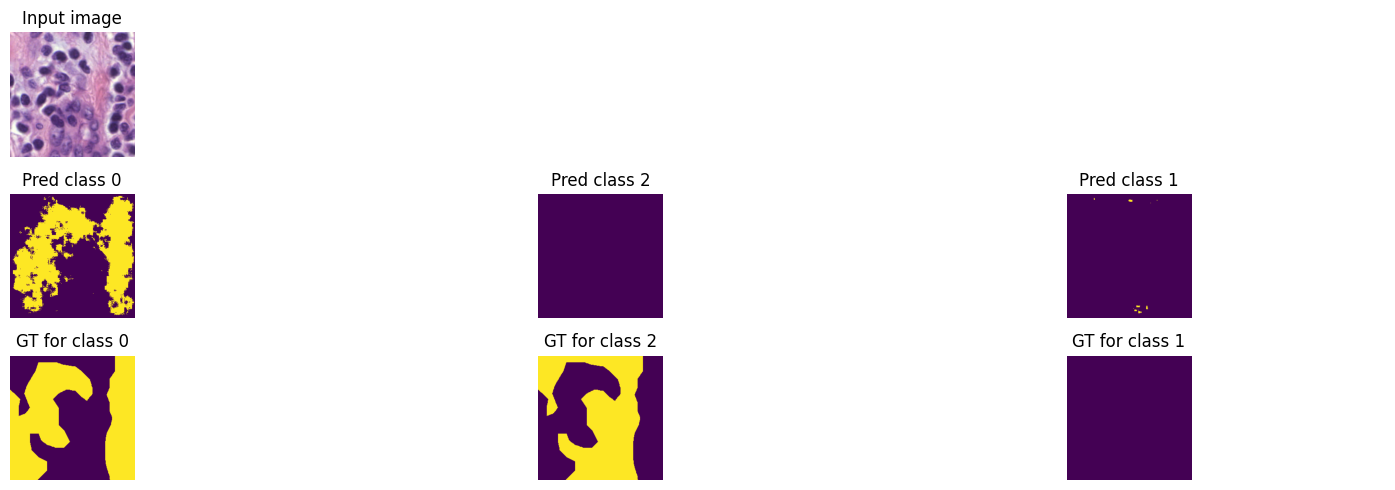

Train loss: 0.54342 | Time: 16m 7s | Val loss: 0.51130
Train_DICE_avg: 0.27863 | Train_Jaccard_avg: 0.25210 | Train_Sensitivity_avg: 0.80966 | Train_Specificity_avg: 0.68403 
Class 0 - Train_DICE: 0.38071 | Train_Jaccard: 0.34885 | Train_Sensitivity: 0.73213 | Train_Specificity: 0.78098 
Class 1 - Train_DICE: 0.26296 | Train_Jaccard: 0.21520 | Train_Sensitivity: 0.69685 | Train_Specificity: 0.60645 
Class 2 - Train_DICE: 0.19224 | Train_Jaccard: 0.19224 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.66465 
Val_DICE_avg: 0.34116 | Val_Jaccard_avg: 0.30531 | Val_Sensitivity_avg: 0.83791 | Val_Specificity_avg: 0.67695 
Class 0 - Val_DICE: 0.44684 | Val_Jaccard: 0.41102 | Val_Sensitivity: 0.76153 | Val_Specificity: 0.77844 
Class 1 - Val_DICE: 0.39072 | Val_Jaccard: 0.31898 | Val_Sensitivity: 0.75222 | Val_Specificity: 0.59096 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.66144 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.53090 | Time: 18m 49s | Val loss: 0.49465
Train_DICE_avg: 0.30351 | Train_Jaccard_avg: 0.26834 | Train_Sensitivity_avg: 0.78484 | Train_Specificity_avg: 0.69080 
Class 0 - Train_DICE: 0.36196 | Train_Jaccard: 0.33454 | Train_Sensitivity: 0.72656 | Train_Specificity: 0.77779 
Class 1 - Train_DICE: 0.35739 | Train_Jaccard: 0.27930 | Train_Sensitivity: 0.62795 | Train_Specificity: 0.63022 
Class 2 - Train_DICE: 0.19119 | Train_Jaccard: 0.19119 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.66438 
Val_DICE_avg: 0.35421 | Val_Jaccard_avg: 0.31704 | Val_Sensitivity_avg: 0.82318 | Val_Specificity_avg: 0.68164 
Class 0 - Val_DICE: 0.41990 | Val_Jaccard: 0.38918 | Val_Sensitivity: 0.75338 | Val_Specificity: 0.77545 
Class 1 - Val_DICE: 0.45682 | Val_Jaccard: 0.37601 | Val_Sensitivity: 0.71617 | Val_Specificity: 0.60804 
Class 2 - Val_DICE: 0.18593 | Val_Jaccard: 0.18593 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.66144 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.51820 | Time: 21m 31s | Val loss: 0.47612
Train_DICE_avg: 0.30650 | Train_Jaccard_avg: 0.27116 | Train_Sensitivity_avg: 0.75836 | Train_Specificity_avg: 0.69590 
Class 0 - Train_DICE: 0.33888 | Train_Jaccard: 0.31571 | Train_Sensitivity: 0.70924 | Train_Specificity: 0.77543 
Class 1 - Train_DICE: 0.39707 | Train_Jaccard: 0.31430 | Train_Sensitivity: 0.60625 | Train_Specificity: 0.64765 
Class 2 - Train_DICE: 0.18356 | Train_Jaccard: 0.18348 | Train_Sensitivity: 0.95959 | Train_Specificity: 0.66461 
Val_DICE_avg: 0.35591 | Val_Jaccard_avg: 0.31866 | Val_Sensitivity_avg: 0.79160 | Val_Specificity_avg: 0.68629 
Class 0 - Val_DICE: 0.39656 | Val_Jaccard: 0.36629 | Val_Sensitivity: 0.71485 | Val_Specificity: 0.77530 
Class 1 - Val_DICE: 0.49540 | Val_Jaccard: 0.41394 | Val_Sensitivity: 0.69706 | Val_Specificity: 0.62213 
Class 2 - Val_DICE: 0.17577 | Val_Jaccard: 0.17575 | Val_Sensitivity: 0.96289 | Val_Specificity: 0.66144 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.50553 | Time: 24m 12s | Val loss: 0.46018
Train_DICE_avg: 0.28317 | Train_Jaccard_avg: 0.24497 | Train_Sensitivity_avg: 0.66302 | Train_Specificity_avg: 0.69972 
Class 0 - Train_DICE: 0.31006 | Train_Jaccard: 0.28755 | Train_Sensitivity: 0.67146 | Train_Specificity: 0.77533 
Class 1 - Train_DICE: 0.41737 | Train_Jaccard: 0.33413 | Train_Sensitivity: 0.59915 | Train_Specificity: 0.65819 
Class 2 - Train_DICE: 0.12208 | Train_Jaccard: 0.11323 | Train_Sensitivity: 0.71845 | Train_Specificity: 0.66563 
Val_DICE_avg: 0.34449 | Val_Jaccard_avg: 0.30401 | Val_Sensitivity_avg: 0.70722 | Val_Specificity_avg: 0.68956 
Class 0 - Val_DICE: 0.37392 | Val_Jaccard: 0.34368 | Val_Sensitivity: 0.68776 | Val_Specificity: 0.77563 
Class 1 - Val_DICE: 0.50786 | Val_Jaccard: 0.42760 | Val_Sensitivity: 0.69025 | Val_Specificity: 0.62995 
Class 2 - Val_DICE: 0.15171 | Val_Jaccard: 0.14074 | Val_Sensitivity: 0.74365 | Val_Specificity: 0.66309 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.49304 | Time: 26m 53s | Val loss: 0.44122
Train_DICE_avg: 0.28877 | Train_Jaccard_avg: 0.23957 | Train_Sensitivity_avg: 0.60905 | Train_Specificity_avg: 0.70457 
Class 0 - Train_DICE: 0.29193 | Train_Jaccard: 0.26457 | Train_Sensitivity: 0.62193 | Train_Specificity: 0.77654 
Class 1 - Train_DICE: 0.42682 | Train_Jaccard: 0.34363 | Train_Sensitivity: 0.59531 | Train_Specificity: 0.66427 
Class 2 - Train_DICE: 0.14755 | Train_Jaccard: 0.11051 | Train_Sensitivity: 0.60991 | Train_Specificity: 0.67289 
Val_DICE_avg: 0.36373 | Val_Jaccard_avg: 0.31025 | Val_Sensitivity_avg: 0.66890 | Val_Specificity_avg: 0.69614 
Class 0 - Val_DICE: 0.36107 | Val_Jaccard: 0.32082 | Val_Sensitivity: 0.62506 | Val_Specificity: 0.78127 
Class 1 - Val_DICE: 0.52008 | Val_Jaccard: 0.44060 | Val_Sensitivity: 0.68259 | Val_Specificity: 0.63592 
Class 2 - Val_DICE: 0.21005 | Val_Jaccard: 0.16933 | Val_Sensitivity: 0.69904 | Val_Specificity: 0.67122 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


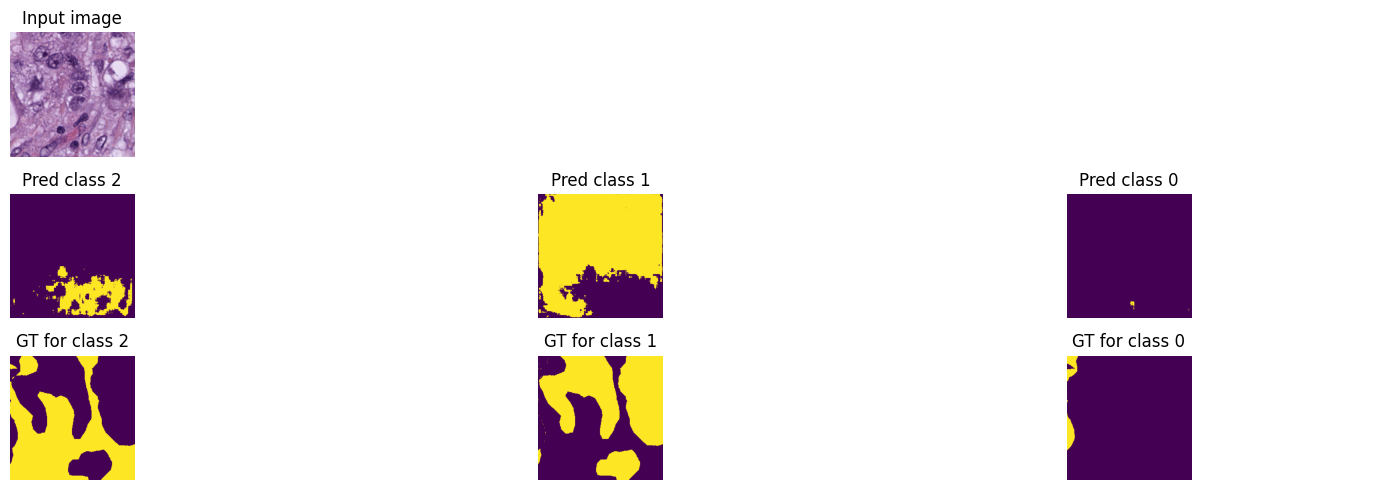

Train loss: 0.47928 | Time: 29m 38s | Val loss: 0.42313
Train_DICE_avg: 0.31204 | Train_Jaccard_avg: 0.25303 | Train_Sensitivity_avg: 0.59513 | Train_Specificity_avg: 0.71042 
Class 0 - Train_DICE: 0.29122 | Train_Jaccard: 0.25541 | Train_Sensitivity: 0.59166 | Train_Specificity: 0.78006 
Class 1 - Train_DICE: 0.43523 | Train_Jaccard: 0.35219 | Train_Sensitivity: 0.60193 | Train_Specificity: 0.66804 
Class 2 - Train_DICE: 0.20966 | Train_Jaccard: 0.15150 | Train_Sensitivity: 0.59181 | Train_Specificity: 0.68317 
Val_DICE_avg: 0.39339 | Val_Jaccard_avg: 0.33351 | Val_Sensitivity_avg: 0.66980 | Val_Specificity_avg: 0.70112 
Class 0 - Val_DICE: 0.38305 | Val_Jaccard: 0.33801 | Val_Sensitivity: 0.62070 | Val_Specificity: 0.78554 
Class 1 - Val_DICE: 0.53236 | Val_Jaccard: 0.45377 | Val_Sensitivity: 0.69805 | Val_Specificity: 0.63761 
Class 2 - Val_DICE: 0.26474 | Val_Jaccard: 0.20875 | Val_Sensitivity: 0.69066 | Val_Specificity: 0.68021 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.46645 | Time: 32m 23s | Val loss: 0.40799
Train_DICE_avg: 0.33519 | Train_Jaccard_avg: 0.27162 | Train_Sensitivity_avg: 0.59568 | Train_Specificity_avg: 0.71556 
Class 0 - Train_DICE: 0.30426 | Train_Jaccard: 0.26299 | Train_Sensitivity: 0.58757 | Train_Specificity: 0.78397 
Class 1 - Train_DICE: 0.44492 | Train_Jaccard: 0.36246 | Train_Sensitivity: 0.60785 | Train_Specificity: 0.67028 
Class 2 - Train_DICE: 0.25639 | Train_Jaccard: 0.18941 | Train_Sensitivity: 0.59163 | Train_Specificity: 0.69245 
Val_DICE_avg: 0.41918 | Val_Jaccard_avg: 0.35738 | Val_Sensitivity_avg: 0.68511 | Val_Specificity_avg: 0.70569 
Class 0 - Val_DICE: 0.41237 | Val_Jaccard: 0.36429 | Val_Sensitivity: 0.63605 | Val_Specificity: 0.79011 
Class 1 - Val_DICE: 0.54224 | Val_Jaccard: 0.46489 | Val_Sensitivity: 0.70859 | Val_Specificity: 0.64052 
Class 2 - Val_DICE: 0.30292 | Val_Jaccard: 0.24295 | Val_Sensitivity: 0.71069 | Val_Specificity: 0.68644 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.45702 | Time: 35m 7s | Val loss: 0.39826
Train_DICE_avg: 0.35894 | Train_Jaccard_avg: 0.29400 | Train_Sensitivity_avg: 0.61071 | Train_Specificity_avg: 0.72014 
Class 0 - Train_DICE: 0.33171 | Train_Jaccard: 0.28686 | Train_Sensitivity: 0.60337 | Train_Specificity: 0.78737 
Class 1 - Train_DICE: 0.45410 | Train_Jaccard: 0.37283 | Train_Sensitivity: 0.62066 | Train_Specificity: 0.67369 
Class 2 - Train_DICE: 0.29102 | Train_Jaccard: 0.22232 | Train_Sensitivity: 0.60810 | Train_Specificity: 0.69937 
Val_DICE_avg: 0.43961 | Val_Jaccard_avg: 0.37718 | Val_Sensitivity_avg: 0.70132 | Val_Specificity_avg: 0.70810 
Class 0 - Val_DICE: 0.43294 | Val_Jaccard: 0.38382 | Val_Sensitivity: 0.64081 | Val_Specificity: 0.79354 
Class 1 - Val_DICE: 0.55654 | Val_Jaccard: 0.47939 | Val_Sensitivity: 0.73086 | Val_Specificity: 0.64038 
Class 2 - Val_DICE: 0.32935 | Val_Jaccard: 0.26834 | Val_Sensitivity: 0.73230 | Val_Specificity: 0.69038 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.45120 | Time: 37m 52s | Val loss: 0.39136
Train_DICE_avg: 0.36895 | Train_Jaccard_avg: 0.30354 | Train_Sensitivity_avg: 0.61519 | Train_Specificity_avg: 0.72237 
Class 0 - Train_DICE: 0.34129 | Train_Jaccard: 0.29592 | Train_Sensitivity: 0.60858 | Train_Specificity: 0.78928 
Class 1 - Train_DICE: 0.45937 | Train_Jaccard: 0.37808 | Train_Sensitivity: 0.62243 | Train_Specificity: 0.67468 
Class 2 - Train_DICE: 0.30619 | Train_Jaccard: 0.23662 | Train_Sensitivity: 0.61457 | Train_Specificity: 0.70315 
Val_DICE_avg: 0.45162 | Val_Jaccard_avg: 0.38944 | Val_Sensitivity_avg: 0.71937 | Val_Specificity_avg: 0.70957 
Class 0 - Val_DICE: 0.44460 | Val_Jaccard: 0.39526 | Val_Sensitivity: 0.65311 | Val_Specificity: 0.79529 
Class 1 - Val_DICE: 0.56736 | Val_Jaccard: 0.49064 | Val_Sensitivity: 0.74311 | Val_Specificity: 0.64154 
Class 2 - Val_DICE: 0.34291 | Val_Jaccard: 0.28240 | Val_Sensitivity: 0.76189 | Val_Specificity: 0.69189 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.44604 | Time: 40m 37s | Val loss: 0.38485
Train_DICE_avg: 0.37733 | Train_Jaccard_avg: 0.31185 | Train_Sensitivity_avg: 0.62216 | Train_Specificity_avg: 0.72409 
Class 0 - Train_DICE: 0.35027 | Train_Jaccard: 0.30391 | Train_Sensitivity: 0.61451 | Train_Specificity: 0.79058 
Class 1 - Train_DICE: 0.46851 | Train_Jaccard: 0.38760 | Train_Sensitivity: 0.63173 | Train_Specificity: 0.67622 
Class 2 - Train_DICE: 0.31321 | Train_Jaccard: 0.24404 | Train_Sensitivity: 0.62025 | Train_Specificity: 0.70546 
Val_DICE_avg: 0.46273 | Val_Jaccard_avg: 0.40108 | Val_Sensitivity_avg: 0.72812 | Val_Specificity_avg: 0.71211 
Class 0 - Val_DICE: 0.45826 | Val_Jaccard: 0.40875 | Val_Sensitivity: 0.65978 | Val_Specificity: 0.79716 
Class 1 - Val_DICE: 0.57707 | Val_Jaccard: 0.50198 | Val_Sensitivity: 0.73996 | Val_Specificity: 0.64586 
Class 2 - Val_DICE: 0.35285 | Val_Jaccard: 0.29250 | Val_Sensitivity: 0.78462 | Val_Specificity: 0.69331 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


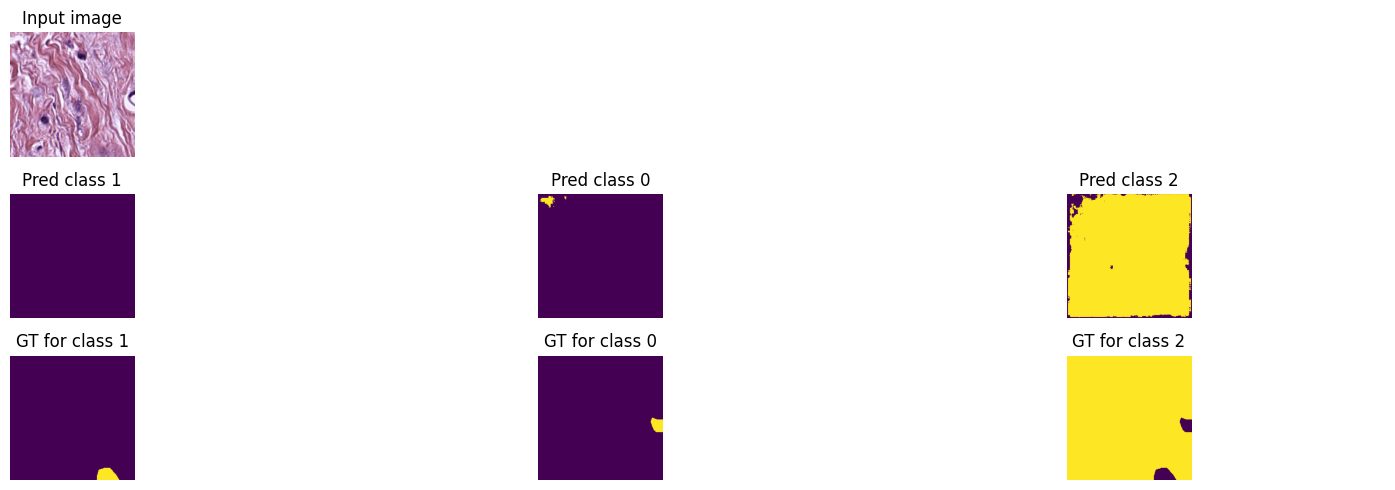

Train loss: 0.44060 | Time: 43m 22s | Val loss: 0.38143
Train_DICE_avg: 0.39085 | Train_Jaccard_avg: 0.32532 | Train_Sensitivity_avg: 0.63283 | Train_Specificity_avg: 0.72665 
Class 0 - Train_DICE: 0.36974 | Train_Jaccard: 0.32272 | Train_Sensitivity: 0.63075 | Train_Specificity: 0.79258 
Class 1 - Train_DICE: 0.47591 | Train_Jaccard: 0.39623 | Train_Sensitivity: 0.63814 | Train_Specificity: 0.67937 
Class 2 - Train_DICE: 0.32691 | Train_Jaccard: 0.25701 | Train_Sensitivity: 0.62960 | Train_Specificity: 0.70802 
Val_DICE_avg: 0.46518 | Val_Jaccard_avg: 0.40327 | Val_Sensitivity_avg: 0.72866 | Val_Specificity_avg: 0.71288 
Class 0 - Val_DICE: 0.45759 | Val_Jaccard: 0.40826 | Val_Sensitivity: 0.65600 | Val_Specificity: 0.79804 
Class 1 - Val_DICE: 0.57579 | Val_Jaccard: 0.50053 | Val_Sensitivity: 0.74383 | Val_Specificity: 0.64557 
Class 2 - Val_DICE: 0.36214 | Val_Jaccard: 0.30100 | Val_Sensitivity: 0.78616 | Val_Specificity: 0.69502 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.43840 | Time: 46m 7s | Val loss: 0.37600
Train_DICE_avg: 0.39922 | Train_Jaccard_avg: 0.33346 | Train_Sensitivity_avg: 0.63990 | Train_Specificity_avg: 0.72789 
Class 0 - Train_DICE: 0.37965 | Train_Jaccard: 0.33244 | Train_Sensitivity: 0.64125 | Train_Specificity: 0.79310 
Class 1 - Train_DICE: 0.48227 | Train_Jaccard: 0.40295 | Train_Sensitivity: 0.64360 | Train_Specificity: 0.68007 
Class 2 - Train_DICE: 0.33574 | Train_Jaccard: 0.26498 | Train_Sensitivity: 0.63486 | Train_Specificity: 0.71050 
Val_DICE_avg: 0.47582 | Val_Jaccard_avg: 0.41364 | Val_Sensitivity_avg: 0.73581 | Val_Specificity_avg: 0.71476 
Class 0 - Val_DICE: 0.46479 | Val_Jaccard: 0.41560 | Val_Sensitivity: 0.66215 | Val_Specificity: 0.79922 
Class 1 - Val_DICE: 0.58726 | Val_Jaccard: 0.51246 | Val_Sensitivity: 0.75733 | Val_Specificity: 0.64634 
Class 2 - Val_DICE: 0.37540 | Val_Jaccard: 0.31288 | Val_Sensitivity: 0.78794 | Val_Specificity: 0.69871 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.43553 | Time: 48m 51s | Val loss: 0.37504
Train_DICE_avg: 0.40147 | Train_Jaccard_avg: 0.33577 | Train_Sensitivity_avg: 0.64232 | Train_Specificity_avg: 0.72883 
Class 0 - Train_DICE: 0.38111 | Train_Jaccard: 0.33359 | Train_Sensitivity: 0.64036 | Train_Specificity: 0.79370 
Class 1 - Train_DICE: 0.48602 | Train_Jaccard: 0.40639 | Train_Sensitivity: 0.64842 | Train_Specificity: 0.68178 
Class 2 - Train_DICE: 0.33727 | Train_Jaccard: 0.26732 | Train_Sensitivity: 0.63819 | Train_Specificity: 0.71100 
Val_DICE_avg: 0.47845 | Val_Jaccard_avg: 0.41672 | Val_Sensitivity_avg: 0.74551 | Val_Specificity_avg: 0.71464 
Class 0 - Val_DICE: 0.47034 | Val_Jaccard: 0.42075 | Val_Sensitivity: 0.66134 | Val_Specificity: 0.80100 
Class 1 - Val_DICE: 0.59095 | Val_Jaccard: 0.51633 | Val_Sensitivity: 0.76499 | Val_Specificity: 0.64643 
Class 2 - Val_DICE: 0.37406 | Val_Jaccard: 0.31308 | Val_Sensitivity: 0.81021 | Val_Specificity: 0.69649 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.43251 | Time: 51m 36s | Val loss: 0.37163
Train_DICE_avg: 0.40703 | Train_Jaccard_avg: 0.34117 | Train_Sensitivity_avg: 0.64588 | Train_Specificity_avg: 0.72989 
Class 0 - Train_DICE: 0.39079 | Train_Jaccard: 0.34273 | Train_Sensitivity: 0.64692 | Train_Specificity: 0.79476 
Class 1 - Train_DICE: 0.48716 | Train_Jaccard: 0.40807 | Train_Sensitivity: 0.64771 | Train_Specificity: 0.68236 
Class 2 - Train_DICE: 0.34315 | Train_Jaccard: 0.27270 | Train_Sensitivity: 0.64300 | Train_Specificity: 0.71256 
Val_DICE_avg: 0.48157 | Val_Jaccard_avg: 0.41983 | Val_Sensitivity_avg: 0.74552 | Val_Specificity_avg: 0.71594 
Class 0 - Val_DICE: 0.47128 | Val_Jaccard: 0.42159 | Val_Sensitivity: 0.65174 | Val_Specificity: 0.80246 
Class 1 - Val_DICE: 0.59639 | Val_Jaccard: 0.52192 | Val_Sensitivity: 0.76945 | Val_Specificity: 0.64798 
Class 2 - Val_DICE: 0.37704 | Val_Jaccard: 0.31597 | Val_Sensitivity: 0.81537 | Val_Specificity: 0.69739 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.42978 | Time: 54m 21s | Val loss: 0.36828
Train_DICE_avg: 0.41340 | Train_Jaccard_avg: 0.34784 | Train_Sensitivity_avg: 0.65068 | Train_Specificity_avg: 0.73135 
Class 0 - Train_DICE: 0.39749 | Train_Jaccard: 0.34990 | Train_Sensitivity: 0.65341 | Train_Specificity: 0.79524 
Class 1 - Train_DICE: 0.49578 | Train_Jaccard: 0.41692 | Train_Sensitivity: 0.65551 | Train_Specificity: 0.68506 
Class 2 - Train_DICE: 0.34693 | Train_Jaccard: 0.27670 | Train_Sensitivity: 0.64312 | Train_Specificity: 0.71374 
Val_DICE_avg: 0.48755 | Val_Jaccard_avg: 0.42593 | Val_Sensitivity_avg: 0.75006 | Val_Specificity_avg: 0.71709 
Class 0 - Val_DICE: 0.47863 | Val_Jaccard: 0.42948 | Val_Sensitivity: 0.66662 | Val_Specificity: 0.80239 
Class 1 - Val_DICE: 0.60019 | Val_Jaccard: 0.52644 | Val_Sensitivity: 0.76996 | Val_Specificity: 0.64946 
Class 2 - Val_DICE: 0.38382 | Val_Jaccard: 0.32187 | Val_Sensitivity: 0.81358 | Val_Specificity: 0.69942 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


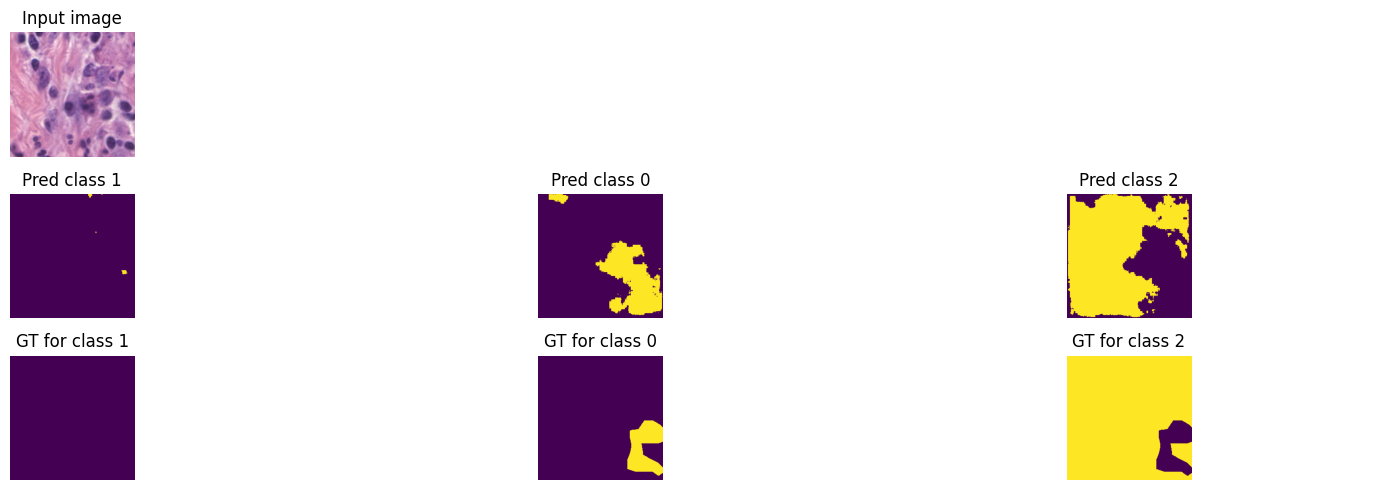

Train loss: 0.42456 | Time: 57m 7s | Val loss: 0.35710
Train_DICE_avg: 0.42793 | Train_Jaccard_avg: 0.36376 | Train_Sensitivity_avg: 0.67444 | Train_Specificity_avg: 0.73304 
Class 0 - Train_DICE: 0.41401 | Train_Jaccard: 0.36732 | Train_Sensitivity: 0.67662 | Train_Specificity: 0.79735 
Class 1 - Train_DICE: 0.51202 | Train_Jaccard: 0.43534 | Train_Sensitivity: 0.68160 | Train_Specificity: 0.68609 
Class 2 - Train_DICE: 0.35777 | Train_Jaccard: 0.28861 | Train_Sensitivity: 0.66509 | Train_Specificity: 0.71568 
Val_DICE_avg: 0.50575 | Val_Jaccard_avg: 0.44683 | Val_Sensitivity_avg: 0.78223 | Val_Specificity_avg: 0.71913 
Class 0 - Val_DICE: 0.50263 | Val_Jaccard: 0.45543 | Val_Sensitivity: 0.69561 | Val_Specificity: 0.80570 
Class 1 - Val_DICE: 0.62001 | Val_Jaccard: 0.54940 | Val_Sensitivity: 0.80491 | Val_Specificity: 0.65153 
Class 2 - Val_DICE: 0.39463 | Val_Jaccard: 0.33567 | Val_Sensitivity: 0.84618 | Val_Specificity: 0.70014 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.41418 | Time: 59m 52s | Val loss: 0.34693
Train_DICE_avg: 0.44760 | Train_Jaccard_avg: 0.38470 | Train_Sensitivity_avg: 0.69636 | Train_Specificity_avg: 0.73763 
Class 0 - Train_DICE: 0.43992 | Train_Jaccard: 0.39393 | Train_Sensitivity: 0.70483 | Train_Specificity: 0.79937 
Class 1 - Train_DICE: 0.53164 | Train_Jaccard: 0.45693 | Train_Sensitivity: 0.70119 | Train_Specificity: 0.69364 
Class 2 - Train_DICE: 0.37124 | Train_Jaccard: 0.30325 | Train_Sensitivity: 0.68307 | Train_Specificity: 0.71989 
Val_DICE_avg: 0.52738 | Val_Jaccard_avg: 0.46973 | Val_Sensitivity_avg: 0.80525 | Val_Specificity_avg: 0.72235 
Class 0 - Val_DICE: 0.53988 | Val_Jaccard: 0.49379 | Val_Sensitivity: 0.73993 | Val_Specificity: 0.80783 
Class 1 - Val_DICE: 0.64089 | Val_Jaccard: 0.57248 | Val_Sensitivity: 0.81933 | Val_Specificity: 0.65629 
Class 2 - Val_DICE: 0.40138 | Val_Jaccard: 0.34291 | Val_Sensitivity: 0.85647 | Val_Specificity: 0.70292 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.40697 | Time: 62m 37s | Val loss: 0.34244
Train_DICE_avg: 0.46131 | Train_Jaccard_avg: 0.39939 | Train_Sensitivity_avg: 0.71088 | Train_Specificity_avg: 0.73998 
Class 0 - Train_DICE: 0.45239 | Train_Jaccard: 0.40685 | Train_Sensitivity: 0.72095 | Train_Specificity: 0.80149 
Class 1 - Train_DICE: 0.54891 | Train_Jaccard: 0.47590 | Train_Sensitivity: 0.71726 | Train_Specificity: 0.69663 
Class 2 - Train_DICE: 0.38264 | Train_Jaccard: 0.31542 | Train_Sensitivity: 0.69444 | Train_Specificity: 0.72181 
Val_DICE_avg: 0.53567 | Val_Jaccard_avg: 0.47862 | Val_Sensitivity_avg: 0.81672 | Val_Specificity_avg: 0.72355 
Class 0 - Val_DICE: 0.55092 | Val_Jaccard: 0.50500 | Val_Sensitivity: 0.74790 | Val_Specificity: 0.80960 
Class 1 - Val_DICE: 0.65188 | Val_Jaccard: 0.58482 | Val_Sensitivity: 0.83186 | Val_Specificity: 0.65825 
Class 2 - Val_DICE: 0.40420 | Val_Jaccard: 0.34602 | Val_Sensitivity: 0.87040 | Val_Specificity: 0.70280 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.40187 | Time: 65m 22s | Val loss: 0.33802
Train_DICE_avg: 0.46949 | Train_Jaccard_avg: 0.40807 | Train_Sensitivity_avg: 0.71879 | Train_Specificity_avg: 0.74162 
Class 0 - Train_DICE: 0.46526 | Train_Jaccard: 0.42027 | Train_Sensitivity: 0.73047 | Train_Specificity: 0.80299 
Class 1 - Train_DICE: 0.55598 | Train_Jaccard: 0.48404 | Train_Sensitivity: 0.72781 | Train_Specificity: 0.69707 
Class 2 - Train_DICE: 0.38724 | Train_Jaccard: 0.31991 | Train_Sensitivity: 0.69808 | Train_Specificity: 0.72480 
Val_DICE_avg: 0.54369 | Val_Jaccard_avg: 0.48737 | Val_Sensitivity_avg: 0.82288 | Val_Specificity_avg: 0.72553 
Class 0 - Val_DICE: 0.55711 | Val_Jaccard: 0.51192 | Val_Sensitivity: 0.75621 | Val_Specificity: 0.81039 
Class 1 - Val_DICE: 0.65962 | Val_Jaccard: 0.59350 | Val_Sensitivity: 0.83319 | Val_Specificity: 0.66102 
Class 2 - Val_DICE: 0.41435 | Val_Jaccard: 0.35669 | Val_Sensitivity: 0.87924 | Val_Specificity: 0.70519 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.39789 | Time: 68m 7s | Val loss: 0.33405
Train_DICE_avg: 0.47799 | Train_Jaccard_avg: 0.41699 | Train_Sensitivity_avg: 0.72947 | Train_Specificity_avg: 0.74365 
Class 0 - Train_DICE: 0.47422 | Train_Jaccard: 0.42979 | Train_Sensitivity: 0.74363 | Train_Specificity: 0.80435 
Class 1 - Train_DICE: 0.56621 | Train_Jaccard: 0.49470 | Train_Sensitivity: 0.73900 | Train_Specificity: 0.69963 
Class 2 - Train_DICE: 0.39354 | Train_Jaccard: 0.32647 | Train_Sensitivity: 0.70578 | Train_Specificity: 0.72698 
Val_DICE_avg: 0.55122 | Val_Jaccard_avg: 0.49507 | Val_Sensitivity_avg: 0.82780 | Val_Specificity_avg: 0.72701 
Class 0 - Val_DICE: 0.56596 | Val_Jaccard: 0.52070 | Val_Sensitivity: 0.76353 | Val_Specificity: 0.81131 
Class 1 - Val_DICE: 0.66656 | Val_Jaccard: 0.60153 | Val_Sensitivity: 0.84039 | Val_Specificity: 0.66228 
Class 2 - Val_DICE: 0.42114 | Val_Jaccard: 0.36297 | Val_Sensitivity: 0.87949 | Val_Specificity: 0.70744 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


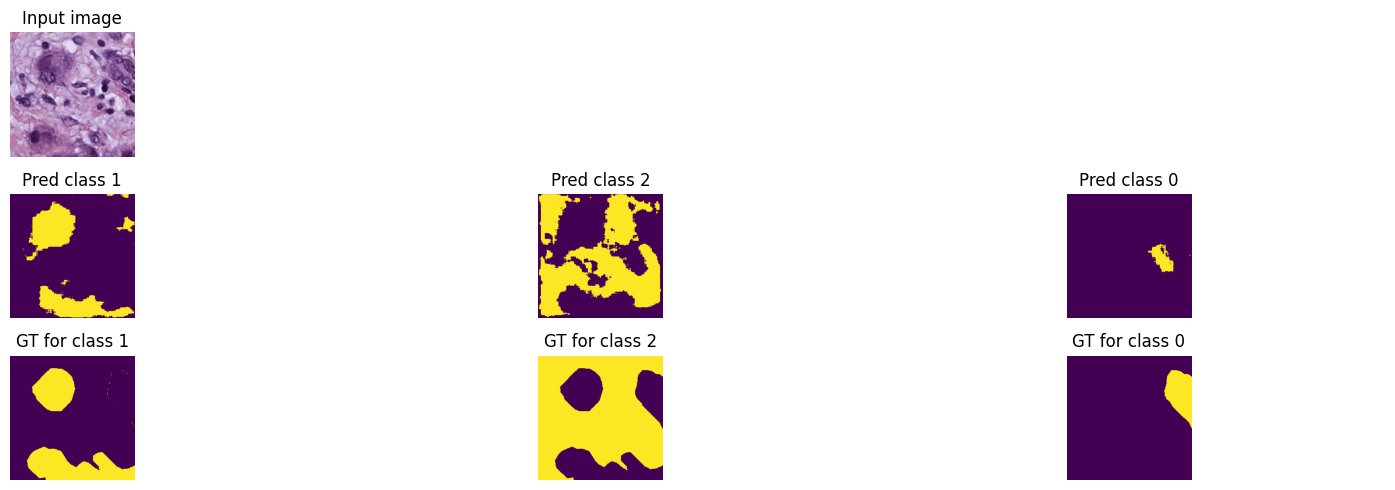

Train loss: 0.39484 | Time: 70m 53s | Val loss: 0.33191
Train_DICE_avg: 0.48419 | Train_Jaccard_avg: 0.42353 | Train_Sensitivity_avg: 0.73510 | Train_Specificity_avg: 0.74482 
Class 0 - Train_DICE: 0.47958 | Train_Jaccard: 0.43515 | Train_Sensitivity: 0.74591 | Train_Specificity: 0.80568 
Class 1 - Train_DICE: 0.57487 | Train_Jaccard: 0.50426 | Train_Sensitivity: 0.74604 | Train_Specificity: 0.70265 
Class 2 - Train_DICE: 0.39814 | Train_Jaccard: 0.33120 | Train_Sensitivity: 0.71335 | Train_Specificity: 0.72613 
Val_DICE_avg: 0.55302 | Val_Jaccard_avg: 0.49689 | Val_Sensitivity_avg: 0.82840 | Val_Specificity_avg: 0.72778 
Class 0 - Val_DICE: 0.56510 | Val_Jaccard: 0.52007 | Val_Sensitivity: 0.76388 | Val_Specificity: 0.81176 
Class 1 - Val_DICE: 0.66506 | Val_Jaccard: 0.60023 | Val_Sensitivity: 0.84363 | Val_Specificity: 0.66221 
Class 2 - Val_DICE: 0.42891 | Val_Jaccard: 0.37036 | Val_Sensitivity: 0.87768 | Val_Specificity: 0.70936 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.39094 | Time: 73m 38s | Val loss: 0.33057
Train_DICE_avg: 0.49012 | Train_Jaccard_avg: 0.42952 | Train_Sensitivity_avg: 0.73924 | Train_Specificity_avg: 0.74617 
Class 0 - Train_DICE: 0.48862 | Train_Jaccard: 0.44409 | Train_Sensitivity: 0.75254 | Train_Specificity: 0.80587 
Class 1 - Train_DICE: 0.58043 | Train_Jaccard: 0.51041 | Train_Sensitivity: 0.75185 | Train_Specificity: 0.70390 
Class 2 - Train_DICE: 0.40131 | Train_Jaccard: 0.33406 | Train_Sensitivity: 0.71333 | Train_Specificity: 0.72875 
Val_DICE_avg: 0.55633 | Val_Jaccard_avg: 0.50070 | Val_Sensitivity_avg: 0.82827 | Val_Specificity_avg: 0.72951 
Class 0 - Val_DICE: 0.57019 | Val_Jaccard: 0.52483 | Val_Sensitivity: 0.75960 | Val_Specificity: 0.81389 
Class 1 - Val_DICE: 0.67223 | Val_Jaccard: 0.60817 | Val_Sensitivity: 0.84136 | Val_Specificity: 0.66553 
Class 2 - Val_DICE: 0.42657 | Val_Jaccard: 0.36910 | Val_Sensitivity: 0.88386 | Val_Specificity: 0.70911 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.38738 | Time: 76m 23s | Val loss: 0.32756
Train_DICE_avg: 0.49483 | Train_Jaccard_avg: 0.43499 | Train_Sensitivity_avg: 0.74660 | Train_Specificity_avg: 0.74784 
Class 0 - Train_DICE: 0.49213 | Train_Jaccard: 0.44809 | Train_Sensitivity: 0.76072 | Train_Specificity: 0.80720 
Class 1 - Train_DICE: 0.58348 | Train_Jaccard: 0.51446 | Train_Sensitivity: 0.75350 | Train_Specificity: 0.70733 
Class 2 - Train_DICE: 0.40887 | Train_Jaccard: 0.34244 | Train_Sensitivity: 0.72559 | Train_Specificity: 0.72899 
Val_DICE_avg: 0.55900 | Val_Jaccard_avg: 0.50424 | Val_Sensitivity_avg: 0.83337 | Val_Specificity_avg: 0.73059 
Class 0 - Val_DICE: 0.57283 | Val_Jaccard: 0.52805 | Val_Sensitivity: 0.77372 | Val_Specificity: 0.81354 
Class 1 - Val_DICE: 0.67721 | Val_Jaccard: 0.61452 | Val_Sensitivity: 0.84048 | Val_Specificity: 0.66864 
Class 2 - Val_DICE: 0.42696 | Val_Jaccard: 0.37014 | Val_Sensitivity: 0.88590 | Val_Specificity: 0.70959 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.38482 | Time: 79m 8s | Val loss: 0.32534
Train_DICE_avg: 0.50042 | Train_Jaccard_avg: 0.44036 | Train_Sensitivity_avg: 0.75070 | Train_Specificity_avg: 0.74841 
Class 0 - Train_DICE: 0.49580 | Train_Jaccard: 0.45179 | Train_Sensitivity: 0.76245 | Train_Specificity: 0.80744 
Class 1 - Train_DICE: 0.59273 | Train_Jaccard: 0.52322 | Train_Sensitivity: 0.76517 | Train_Specificity: 0.70621 
Class 2 - Train_DICE: 0.41274 | Train_Jaccard: 0.34608 | Train_Sensitivity: 0.72447 | Train_Specificity: 0.73158 
Val_DICE_avg: 0.56399 | Val_Jaccard_avg: 0.50905 | Val_Sensitivity_avg: 0.83409 | Val_Specificity_avg: 0.73162 
Class 0 - Val_DICE: 0.57754 | Val_Jaccard: 0.53286 | Val_Sensitivity: 0.77490 | Val_Specificity: 0.81454 
Class 1 - Val_DICE: 0.68019 | Val_Jaccard: 0.61761 | Val_Sensitivity: 0.84598 | Val_Specificity: 0.66865 
Class 2 - Val_DICE: 0.43422 | Val_Jaccard: 0.37667 | Val_Sensitivity: 0.88139 | Val_Specificity: 0.71166 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.38233 | Time: 81m 53s | Val loss: 0.32346
Train_DICE_avg: 0.50428 | Train_Jaccard_avg: 0.44465 | Train_Sensitivity_avg: 0.75374 | Train_Specificity_avg: 0.74926 
Class 0 - Train_DICE: 0.50323 | Train_Jaccard: 0.45960 | Train_Sensitivity: 0.76808 | Train_Specificity: 0.80815 
Class 1 - Train_DICE: 0.59821 | Train_Jaccard: 0.52952 | Train_Sensitivity: 0.76750 | Train_Specificity: 0.70823 
Class 2 - Train_DICE: 0.41141 | Train_Jaccard: 0.34482 | Train_Sensitivity: 0.72563 | Train_Specificity: 0.73139 
Val_DICE_avg: 0.56533 | Val_Jaccard_avg: 0.51059 | Val_Sensitivity_avg: 0.83293 | Val_Specificity_avg: 0.73278 
Class 0 - Val_DICE: 0.57796 | Val_Jaccard: 0.53307 | Val_Sensitivity: 0.77535 | Val_Specificity: 0.81487 
Class 1 - Val_DICE: 0.68112 | Val_Jaccard: 0.61944 | Val_Sensitivity: 0.84090 | Val_Specificity: 0.67083 
Class 2 - Val_DICE: 0.43690 | Val_Jaccard: 0.37927 | Val_Sensitivity: 0.88254 | Val_Specificity: 0.71263 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


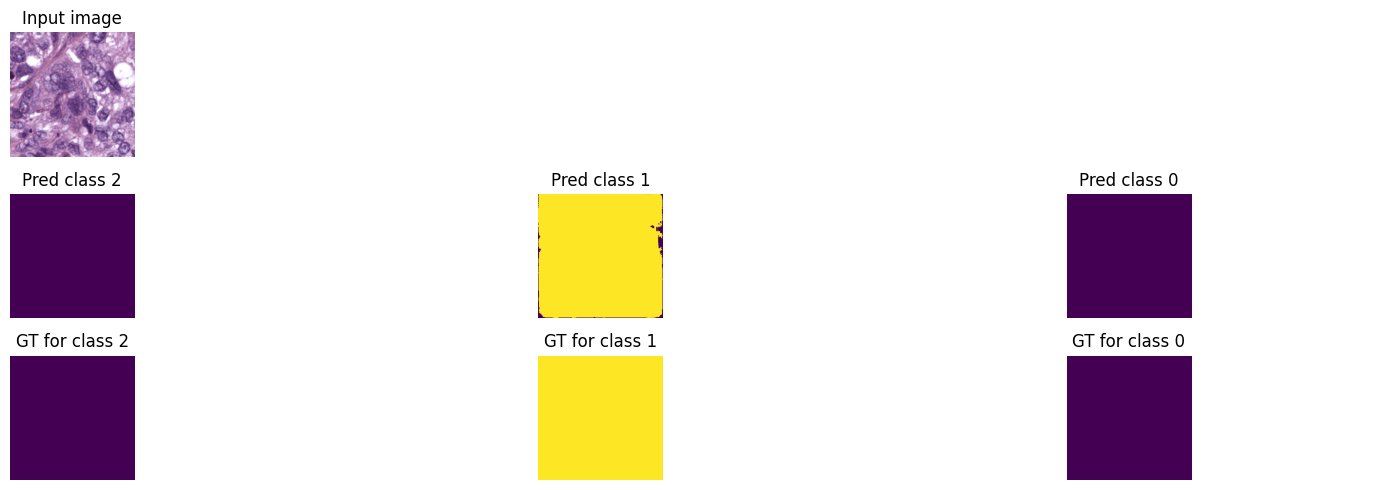

Train loss: 0.37767 | Time: 84m 40s | Val loss: 0.32457
Train_DICE_avg: 0.51133 | Train_Jaccard_avg: 0.45173 | Train_Sensitivity_avg: 0.76122 | Train_Specificity_avg: 0.75187 
Class 0 - Train_DICE: 0.50958 | Train_Jaccard: 0.46565 | Train_Sensitivity: 0.77155 | Train_Specificity: 0.81103 
Class 1 - Train_DICE: 0.60681 | Train_Jaccard: 0.53849 | Train_Sensitivity: 0.77986 | Train_Specificity: 0.71071 
Class 2 - Train_DICE: 0.41761 | Train_Jaccard: 0.35105 | Train_Sensitivity: 0.73226 | Train_Specificity: 0.73388 
Val_DICE_avg: 0.56677 | Val_Jaccard_avg: 0.51256 | Val_Sensitivity_avg: 0.83247 | Val_Specificity_avg: 0.73390 
Class 0 - Val_DICE: 0.58322 | Val_Jaccard: 0.53767 | Val_Sensitivity: 0.76369 | Val_Specificity: 0.81725 
Class 1 - Val_DICE: 0.69052 | Val_Jaccard: 0.62995 | Val_Sensitivity: 0.84440 | Val_Specificity: 0.67442 
Class 2 - Val_DICE: 0.42659 | Val_Jaccard: 0.37004 | Val_Sensitivity: 0.88931 | Val_Specificity: 0.71002 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.37178 | Time: 87m 25s | Val loss: 0.31864
Train_DICE_avg: 0.51730 | Train_Jaccard_avg: 0.45772 | Train_Sensitivity_avg: 0.76431 | Train_Specificity_avg: 0.75409 
Class 0 - Train_DICE: 0.51426 | Train_Jaccard: 0.46978 | Train_Sensitivity: 0.77583 | Train_Specificity: 0.81211 
Class 1 - Train_DICE: 0.61488 | Train_Jaccard: 0.54713 | Train_Sensitivity: 0.78242 | Train_Specificity: 0.71487 
Class 2 - Train_DICE: 0.42276 | Train_Jaccard: 0.35625 | Train_Sensitivity: 0.73468 | Train_Specificity: 0.73529 
Val_DICE_avg: 0.57093 | Val_Jaccard_avg: 0.51660 | Val_Sensitivity_avg: 0.83157 | Val_Specificity_avg: 0.73596 
Class 0 - Val_DICE: 0.57974 | Val_Jaccard: 0.53522 | Val_Sensitivity: 0.76708 | Val_Specificity: 0.81787 
Class 1 - Val_DICE: 0.69105 | Val_Jaccard: 0.63042 | Val_Sensitivity: 0.84650 | Val_Specificity: 0.67446 
Class 2 - Val_DICE: 0.44199 | Val_Jaccard: 0.38416 | Val_Sensitivity: 0.88113 | Val_Specificity: 0.71554 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.36628 | Time: 90m 11s | Val loss: 0.31522
Train_DICE_avg: 0.52512 | Train_Jaccard_avg: 0.46570 | Train_Sensitivity_avg: 0.76994 | Train_Specificity_avg: 0.75674 
Class 0 - Train_DICE: 0.52454 | Train_Jaccard: 0.48021 | Train_Sensitivity: 0.78397 | Train_Specificity: 0.81362 
Class 1 - Train_DICE: 0.62059 | Train_Jaccard: 0.55359 | Train_Sensitivity: 0.78788 | Train_Specificity: 0.71832 
Class 2 - Train_DICE: 0.43023 | Train_Jaccard: 0.36331 | Train_Sensitivity: 0.73798 | Train_Specificity: 0.73827 
Val_DICE_avg: 0.57639 | Val_Jaccard_avg: 0.52227 | Val_Sensitivity_avg: 0.83600 | Val_Specificity_avg: 0.73695 
Class 0 - Val_DICE: 0.58335 | Val_Jaccard: 0.53919 | Val_Sensitivity: 0.77879 | Val_Specificity: 0.81683 
Class 1 - Val_DICE: 0.69853 | Val_Jaccard: 0.63854 | Val_Sensitivity: 0.84899 | Val_Specificity: 0.67712 
Class 2 - Val_DICE: 0.44730 | Val_Jaccard: 0.38910 | Val_Sensitivity: 0.88021 | Val_Specificity: 0.71691 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.36055 | Time: 92m 56s | Val loss: 0.31584
Train_DICE_avg: 0.53061 | Train_Jaccard_avg: 0.47141 | Train_Sensitivity_avg: 0.76948 | Train_Specificity_avg: 0.75887 
Class 0 - Train_DICE: 0.52422 | Train_Jaccard: 0.47970 | Train_Sensitivity: 0.77724 | Train_Specificity: 0.81508 
Class 1 - Train_DICE: 0.63134 | Train_Jaccard: 0.56501 | Train_Sensitivity: 0.79410 | Train_Specificity: 0.72094 
Class 2 - Train_DICE: 0.43626 | Train_Jaccard: 0.36953 | Train_Sensitivity: 0.73709 | Train_Specificity: 0.74059 
Val_DICE_avg: 0.57628 | Val_Jaccard_avg: 0.52191 | Val_Sensitivity_avg: 0.82839 | Val_Specificity_avg: 0.73821 
Class 0 - Val_DICE: 0.58237 | Val_Jaccard: 0.53759 | Val_Sensitivity: 0.76035 | Val_Specificity: 0.81970 
Class 1 - Val_DICE: 0.70144 | Val_Jaccard: 0.64131 | Val_Sensitivity: 0.85164 | Val_Specificity: 0.67731 
Class 2 - Val_DICE: 0.44502 | Val_Jaccard: 0.38684 | Val_Sensitivity: 0.87319 | Val_Specificity: 0.71761 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.35626 | Time: 95m 42s | Val loss: 0.31493
Train_DICE_avg: 0.53917 | Train_Jaccard_avg: 0.47973 | Train_Sensitivity_avg: 0.77740 | Train_Specificity_avg: 0.75976 
Class 0 - Train_DICE: 0.53731 | Train_Jaccard: 0.49246 | Train_Sensitivity: 0.78694 | Train_Specificity: 0.81497 
Class 1 - Train_DICE: 0.63814 | Train_Jaccard: 0.57191 | Train_Sensitivity: 0.80084 | Train_Specificity: 0.72201 
Class 2 - Train_DICE: 0.44207 | Train_Jaccard: 0.37482 | Train_Sensitivity: 0.74441 | Train_Specificity: 0.74231 
Val_DICE_avg: 0.58211 | Val_Jaccard_avg: 0.52831 | Val_Sensitivity_avg: 0.83161 | Val_Specificity_avg: 0.73964 
Class 0 - Val_DICE: 0.58597 | Val_Jaccard: 0.54150 | Val_Sensitivity: 0.76955 | Val_Specificity: 0.81885 
Class 1 - Val_DICE: 0.71041 | Val_Jaccard: 0.65185 | Val_Sensitivity: 0.85137 | Val_Specificity: 0.68156 
Class 2 - Val_DICE: 0.44996 | Val_Jaccard: 0.39157 | Val_Sensitivity: 0.87392 | Val_Specificity: 0.71851 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


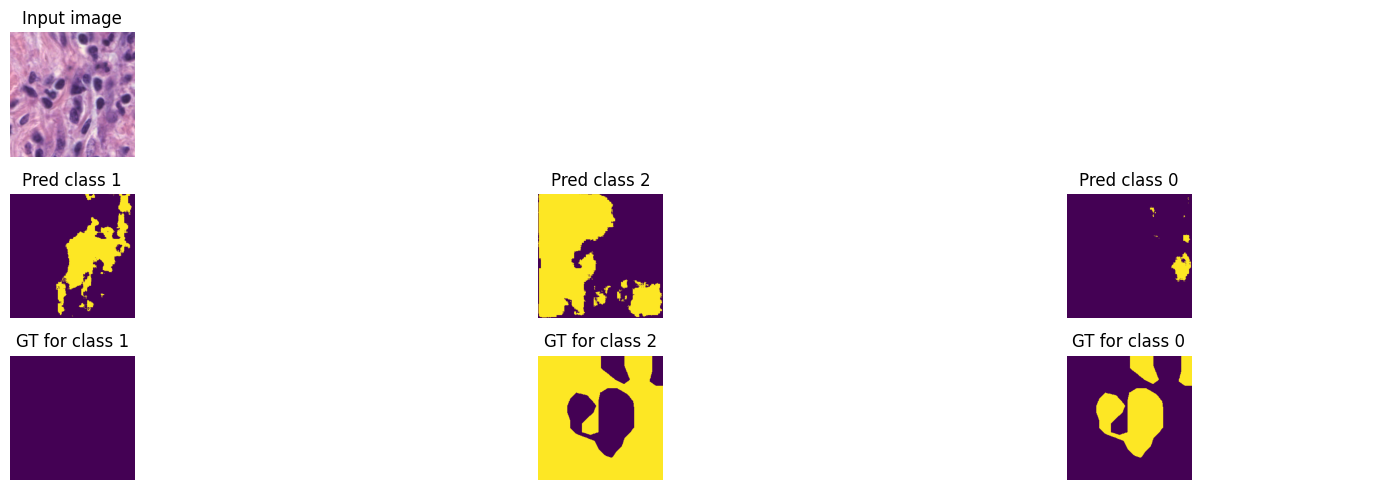

Train loss: 0.35069 | Time: 98m 27s | Val loss: 0.31147
Train_DICE_avg: 0.54231 | Train_Jaccard_avg: 0.48307 | Train_Sensitivity_avg: 0.77797 | Train_Specificity_avg: 0.76136 
Class 0 - Train_DICE: 0.53573 | Train_Jaccard: 0.49104 | Train_Sensitivity: 0.78769 | Train_Specificity: 0.81746 
Class 1 - Train_DICE: 0.64621 | Train_Jaccard: 0.58063 | Train_Sensitivity: 0.80238 | Train_Specificity: 0.72429 
Class 2 - Train_DICE: 0.44498 | Train_Jaccard: 0.37756 | Train_Sensitivity: 0.74383 | Train_Specificity: 0.74234 
Val_DICE_avg: 0.58211 | Val_Jaccard_avg: 0.52811 | Val_Sensitivity_avg: 0.82797 | Val_Specificity_avg: 0.74095 
Class 0 - Val_DICE: 0.58376 | Val_Jaccard: 0.53932 | Val_Sensitivity: 0.77031 | Val_Specificity: 0.81914 
Class 1 - Val_DICE: 0.70734 | Val_Jaccard: 0.64892 | Val_Sensitivity: 0.84843 | Val_Specificity: 0.68297 
Class 2 - Val_DICE: 0.45523 | Val_Jaccard: 0.39610 | Val_Sensitivity: 0.86517 | Val_Specificity: 0.72076 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.34592 | Time: 101m 13s | Val loss: 0.31079
Train_DICE_avg: 0.54746 | Train_Jaccard_avg: 0.48839 | Train_Sensitivity_avg: 0.78063 | Train_Specificity_avg: 0.76327 
Class 0 - Train_DICE: 0.54283 | Train_Jaccard: 0.49767 | Train_Sensitivity: 0.78981 | Train_Specificity: 0.81778 
Class 1 - Train_DICE: 0.65025 | Train_Jaccard: 0.58600 | Train_Sensitivity: 0.80832 | Train_Specificity: 0.72708 
Class 2 - Train_DICE: 0.44929 | Train_Jaccard: 0.38151 | Train_Sensitivity: 0.74376 | Train_Specificity: 0.74495 
Val_DICE_avg: 0.58414 | Val_Jaccard_avg: 0.52975 | Val_Sensitivity_avg: 0.82433 | Val_Specificity_avg: 0.74191 
Class 0 - Val_DICE: 0.57866 | Val_Jaccard: 0.53394 | Val_Sensitivity: 0.75886 | Val_Specificity: 0.81956 
Class 1 - Val_DICE: 0.71088 | Val_Jaccard: 0.65228 | Val_Sensitivity: 0.85212 | Val_Specificity: 0.68280 
Class 2 - Val_DICE: 0.46286 | Val_Jaccard: 0.40303 | Val_Sensitivity: 0.86200 | Val_Specificity: 0.72336 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.34198 | Time: 103m 59s | Val loss: 0.31160
Train_DICE_avg: 0.55359 | Train_Jaccard_avg: 0.49429 | Train_Sensitivity_avg: 0.78436 | Train_Specificity_avg: 0.76457 
Class 0 - Train_DICE: 0.54688 | Train_Jaccard: 0.50132 | Train_Sensitivity: 0.78885 | Train_Specificity: 0.81923 
Class 1 - Train_DICE: 0.65729 | Train_Jaccard: 0.59290 | Train_Sensitivity: 0.81413 | Train_Specificity: 0.72770 
Class 2 - Train_DICE: 0.45659 | Train_Jaccard: 0.38865 | Train_Sensitivity: 0.75008 | Train_Specificity: 0.74677 
Val_DICE_avg: 0.58237 | Val_Jaccard_avg: 0.52828 | Val_Sensitivity_avg: 0.82361 | Val_Specificity_avg: 0.74235 
Class 0 - Val_DICE: 0.57907 | Val_Jaccard: 0.53401 | Val_Sensitivity: 0.75443 | Val_Specificity: 0.82089 
Class 1 - Val_DICE: 0.71327 | Val_Jaccard: 0.65522 | Val_Sensitivity: 0.85021 | Val_Specificity: 0.68454 
Class 2 - Val_DICE: 0.45478 | Val_Jaccard: 0.39560 | Val_Sensitivity: 0.86620 | Val_Specificity: 0.72162 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.33933 | Time: 106m 44s | Val loss: 0.31086
Train_DICE_avg: 0.55550 | Train_Jaccard_avg: 0.49639 | Train_Sensitivity_avg: 0.78458 | Train_Specificity_avg: 0.76504 
Class 0 - Train_DICE: 0.54576 | Train_Jaccard: 0.50056 | Train_Sensitivity: 0.78803 | Train_Specificity: 0.81992 
Class 1 - Train_DICE: 0.66168 | Train_Jaccard: 0.59730 | Train_Sensitivity: 0.81681 | Train_Specificity: 0.72716 
Class 2 - Train_DICE: 0.45904 | Train_Jaccard: 0.39130 | Train_Sensitivity: 0.74889 | Train_Specificity: 0.74804 
Val_DICE_avg: 0.58518 | Val_Jaccard_avg: 0.53106 | Val_Sensitivity_avg: 0.82276 | Val_Specificity_avg: 0.74330 
Class 0 - Val_DICE: 0.58073 | Val_Jaccard: 0.53595 | Val_Sensitivity: 0.75741 | Val_Specificity: 0.82099 
Class 1 - Val_DICE: 0.71480 | Val_Jaccard: 0.65664 | Val_Sensitivity: 0.84586 | Val_Specificity: 0.68622 
Class 2 - Val_DICE: 0.46002 | Val_Jaccard: 0.40059 | Val_Sensitivity: 0.86502 | Val_Specificity: 0.72268 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.33555 | Time: 109m 30s | Val loss: 0.31106
Train_DICE_avg: 0.55927 | Train_Jaccard_avg: 0.50025 | Train_Sensitivity_avg: 0.78652 | Train_Specificity_avg: 0.76679 
Class 0 - Train_DICE: 0.54971 | Train_Jaccard: 0.50389 | Train_Sensitivity: 0.78937 | Train_Specificity: 0.82119 
Class 1 - Train_DICE: 0.66550 | Train_Jaccard: 0.60195 | Train_Sensitivity: 0.81763 | Train_Specificity: 0.73111 
Class 2 - Train_DICE: 0.46260 | Train_Jaccard: 0.39491 | Train_Sensitivity: 0.75255 | Train_Specificity: 0.74807 
Val_DICE_avg: 0.58487 | Val_Jaccard_avg: 0.53043 | Val_Sensitivity_avg: 0.82066 | Val_Specificity_avg: 0.74336 
Class 0 - Val_DICE: 0.57828 | Val_Jaccard: 0.53276 | Val_Sensitivity: 0.74448 | Val_Specificity: 0.82238 
Class 1 - Val_DICE: 0.71662 | Val_Jaccard: 0.65854 | Val_Sensitivity: 0.84941 | Val_Specificity: 0.68529 
Class 2 - Val_DICE: 0.45972 | Val_Jaccard: 0.40000 | Val_Sensitivity: 0.86811 | Val_Specificity: 0.72240 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


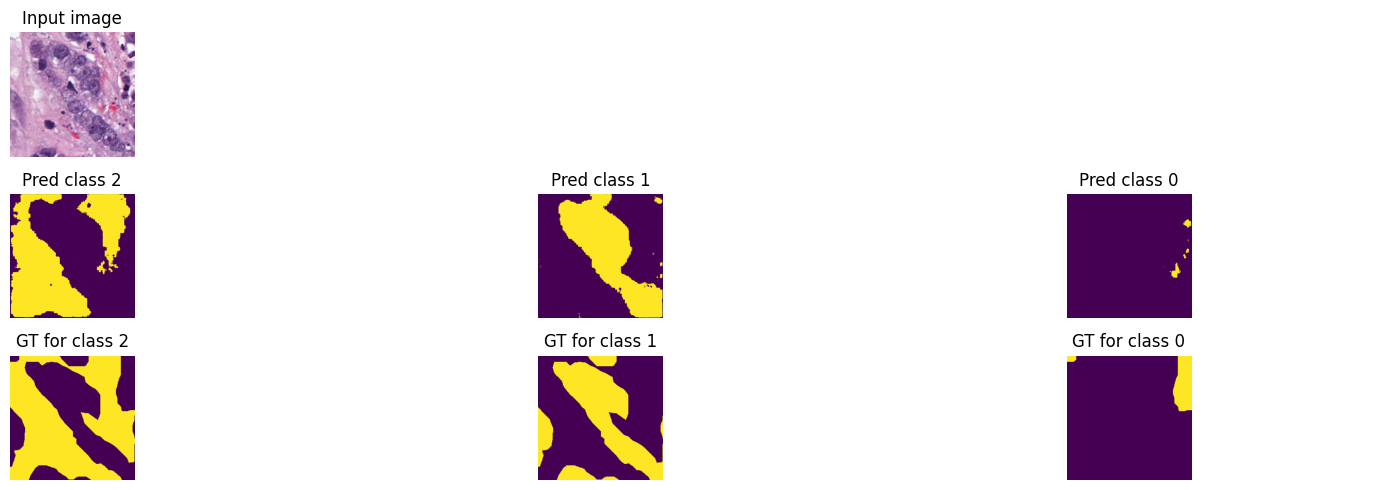

Train loss: 0.32985 | Time: 112m 16s | Val loss: 0.31418
Train_DICE_avg: 0.56324 | Train_Jaccard_avg: 0.50429 | Train_Sensitivity_avg: 0.78721 | Train_Specificity_avg: 0.76793 
Class 0 - Train_DICE: 0.55405 | Train_Jaccard: 0.50829 | Train_Sensitivity: 0.79158 | Train_Specificity: 0.82240 
Class 1 - Train_DICE: 0.66782 | Train_Jaccard: 0.60484 | Train_Sensitivity: 0.81846 | Train_Specificity: 0.73097 
Class 2 - Train_DICE: 0.46784 | Train_Jaccard: 0.39974 | Train_Sensitivity: 0.75159 | Train_Specificity: 0.75041 
Val_DICE_avg: 0.57944 | Val_Jaccard_avg: 0.52501 | Val_Sensitivity_avg: 0.81187 | Val_Specificity_avg: 0.74414 
Class 0 - Val_DICE: 0.57525 | Val_Jaccard: 0.52965 | Val_Sensitivity: 0.73790 | Val_Specificity: 0.82333 
Class 1 - Val_DICE: 0.71132 | Val_Jaccard: 0.65296 | Val_Sensitivity: 0.83296 | Val_Specificity: 0.68847 
Class 2 - Val_DICE: 0.45174 | Val_Jaccard: 0.39242 | Val_Sensitivity: 0.86475 | Val_Specificity: 0.72064 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.32639 | Time: 115m 2s | Val loss: 0.31079
Train_DICE_avg: 0.56902 | Train_Jaccard_avg: 0.50994 | Train_Sensitivity_avg: 0.79106 | Train_Specificity_avg: 0.76979 
Class 0 - Train_DICE: 0.55958 | Train_Jaccard: 0.51322 | Train_Sensitivity: 0.79386 | Train_Specificity: 0.82326 
Class 1 - Train_DICE: 0.67533 | Train_Jaccard: 0.61273 | Train_Sensitivity: 0.82451 | Train_Specificity: 0.73524 
Class 2 - Train_DICE: 0.47215 | Train_Jaccard: 0.40386 | Train_Sensitivity: 0.75482 | Train_Specificity: 0.75088 
Val_DICE_avg: 0.58864 | Val_Jaccard_avg: 0.53439 | Val_Sensitivity_avg: 0.81506 | Val_Specificity_avg: 0.74574 
Class 0 - Val_DICE: 0.58161 | Val_Jaccard: 0.53674 | Val_Sensitivity: 0.74800 | Val_Specificity: 0.82208 
Class 1 - Val_DICE: 0.71703 | Val_Jaccard: 0.65975 | Val_Sensitivity: 0.84100 | Val_Specificity: 0.68859 
Class 2 - Val_DICE: 0.46728 | Val_Jaccard: 0.40669 | Val_Sensitivity: 0.85619 | Val_Specificity: 0.72654 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.32220 | Time: 117m 48s | Val loss: 0.31395
Train_DICE_avg: 0.57311 | Train_Jaccard_avg: 0.51406 | Train_Sensitivity_avg: 0.78852 | Train_Specificity_avg: 0.77127 
Class 0 - Train_DICE: 0.56281 | Train_Jaccard: 0.51629 | Train_Sensitivity: 0.78760 | Train_Specificity: 0.82433 
Class 1 - Train_DICE: 0.67733 | Train_Jaccard: 0.61540 | Train_Sensitivity: 0.82273 | Train_Specificity: 0.73539 
Class 2 - Train_DICE: 0.47917 | Train_Jaccard: 0.41048 | Train_Sensitivity: 0.75522 | Train_Specificity: 0.75409 
Val_DICE_avg: 0.58532 | Val_Jaccard_avg: 0.53035 | Val_Sensitivity_avg: 0.81094 | Val_Specificity_avg: 0.74521 
Class 0 - Val_DICE: 0.57429 | Val_Jaccard: 0.52827 | Val_Sensitivity: 0.72508 | Val_Specificity: 0.82485 
Class 1 - Val_DICE: 0.72043 | Val_Jaccard: 0.66256 | Val_Sensitivity: 0.85048 | Val_Specificity: 0.68629 
Class 2 - Val_DICE: 0.46124 | Val_Jaccard: 0.40023 | Val_Sensitivity: 0.85726 | Val_Specificity: 0.72449 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.31989 | Time: 120m 33s | Val loss: 0.31489
Train_DICE_avg: 0.57492 | Train_Jaccard_avg: 0.51612 | Train_Sensitivity_avg: 0.79479 | Train_Specificity_avg: 0.77250 
Class 0 - Train_DICE: 0.56442 | Train_Jaccard: 0.51803 | Train_Sensitivity: 0.79318 | Train_Specificity: 0.82613 
Class 1 - Train_DICE: 0.67942 | Train_Jaccard: 0.61788 | Train_Sensitivity: 0.82907 | Train_Specificity: 0.73631 
Class 2 - Train_DICE: 0.48091 | Train_Jaccard: 0.41244 | Train_Sensitivity: 0.76211 | Train_Specificity: 0.75507 
Val_DICE_avg: 0.58405 | Val_Jaccard_avg: 0.52919 | Val_Sensitivity_avg: 0.81126 | Val_Specificity_avg: 0.74543 
Class 0 - Val_DICE: 0.57824 | Val_Jaccard: 0.53215 | Val_Sensitivity: 0.72944 | Val_Specificity: 0.82572 
Class 1 - Val_DICE: 0.71790 | Val_Jaccard: 0.66003 | Val_Sensitivity: 0.84888 | Val_Specificity: 0.68670 
Class 2 - Val_DICE: 0.45600 | Val_Jaccard: 0.39540 | Val_Sensitivity: 0.85546 | Val_Specificity: 0.72388 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.31731 | Time: 123m 19s | Val loss: 0.31408
Train_DICE_avg: 0.57958 | Train_Jaccard_avg: 0.52048 | Train_Sensitivity_avg: 0.79443 | Train_Specificity_avg: 0.77264 
Class 0 - Train_DICE: 0.56691 | Train_Jaccard: 0.52027 | Train_Sensitivity: 0.79300 | Train_Specificity: 0.82589 
Class 1 - Train_DICE: 0.68497 | Train_Jaccard: 0.62321 | Train_Sensitivity: 0.83034 | Train_Specificity: 0.73774 
Class 2 - Train_DICE: 0.48686 | Train_Jaccard: 0.41795 | Train_Sensitivity: 0.75997 | Train_Specificity: 0.75429 
Val_DICE_avg: 0.58911 | Val_Jaccard_avg: 0.53395 | Val_Sensitivity_avg: 0.81464 | Val_Specificity_avg: 0.74616 
Class 0 - Val_DICE: 0.57993 | Val_Jaccard: 0.53332 | Val_Sensitivity: 0.73080 | Val_Specificity: 0.82628 
Class 1 - Val_DICE: 0.72471 | Val_Jaccard: 0.66706 | Val_Sensitivity: 0.85581 | Val_Specificity: 0.68710 
Class 2 - Val_DICE: 0.46270 | Val_Jaccard: 0.40148 | Val_Sensitivity: 0.85731 | Val_Specificity: 0.72511 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


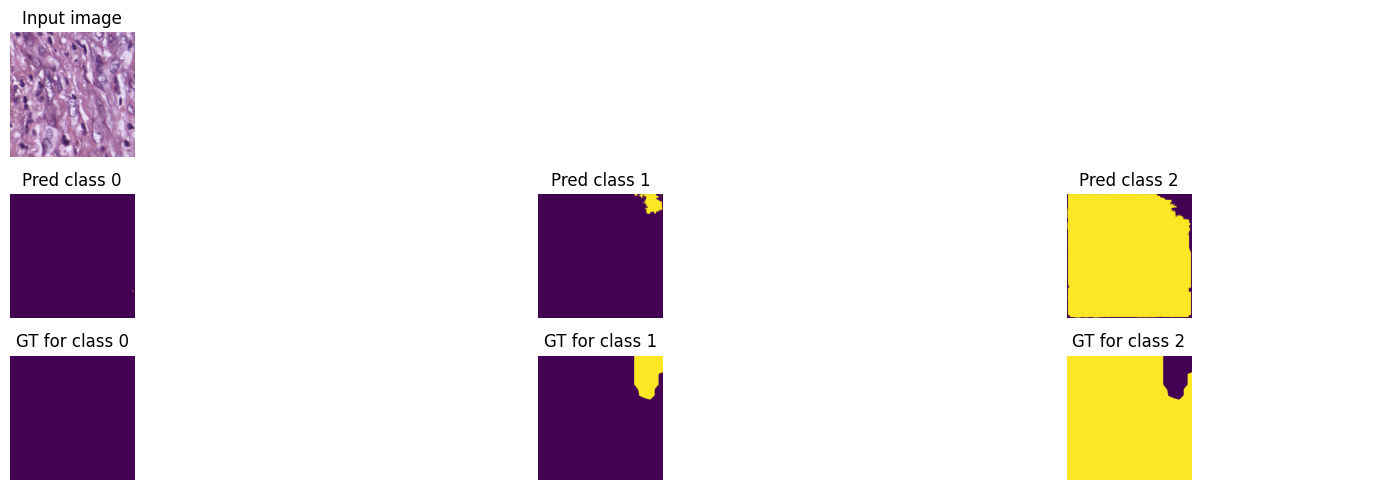

Train loss: 0.31364 | Time: 126m 5s | Val loss: 0.31258
Train_DICE_avg: 0.58255 | Train_Jaccard_avg: 0.52373 | Train_Sensitivity_avg: 0.79435 | Train_Specificity_avg: 0.77418 
Class 0 - Train_DICE: 0.57418 | Train_Jaccard: 0.52741 | Train_Sensitivity: 0.79643 | Train_Specificity: 0.82669 
Class 1 - Train_DICE: 0.68656 | Train_Jaccard: 0.62545 | Train_Sensitivity: 0.82946 | Train_Specificity: 0.73856 
Class 2 - Train_DICE: 0.48691 | Train_Jaccard: 0.41833 | Train_Sensitivity: 0.75715 | Train_Specificity: 0.75729 
Val_DICE_avg: 0.59060 | Val_Jaccard_avg: 0.53549 | Val_Sensitivity_avg: 0.80957 | Val_Specificity_avg: 0.74730 
Class 0 - Val_DICE: 0.57698 | Val_Jaccard: 0.53072 | Val_Sensitivity: 0.72487 | Val_Specificity: 0.82639 
Class 1 - Val_DICE: 0.72266 | Val_Jaccard: 0.66543 | Val_Sensitivity: 0.85096 | Val_Specificity: 0.68736 
Class 2 - Val_DICE: 0.47215 | Val_Jaccard: 0.41033 | Val_Sensitivity: 0.85290 | Val_Specificity: 0.72815 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.31024 | Time: 128m 51s | Val loss: 0.31173
Train_DICE_avg: 0.58650 | Train_Jaccard_avg: 0.52782 | Train_Sensitivity_avg: 0.79665 | Train_Specificity_avg: 0.77569 
Class 0 - Train_DICE: 0.57622 | Train_Jaccard: 0.52947 | Train_Sensitivity: 0.79613 | Train_Specificity: 0.82779 
Class 1 - Train_DICE: 0.68929 | Train_Jaccard: 0.62857 | Train_Sensitivity: 0.83370 | Train_Specificity: 0.74047 
Class 2 - Train_DICE: 0.49401 | Train_Jaccard: 0.42542 | Train_Sensitivity: 0.76012 | Train_Specificity: 0.75882 
Val_DICE_avg: 0.59301 | Val_Jaccard_avg: 0.53804 | Val_Sensitivity_avg: 0.81203 | Val_Specificity_avg: 0.74763 
Class 0 - Val_DICE: 0.57828 | Val_Jaccard: 0.53260 | Val_Sensitivity: 0.73497 | Val_Specificity: 0.82567 
Class 1 - Val_DICE: 0.72716 | Val_Jaccard: 0.67004 | Val_Sensitivity: 0.85186 | Val_Specificity: 0.68826 
Class 2 - Val_DICE: 0.47358 | Val_Jaccard: 0.41147 | Val_Sensitivity: 0.84926 | Val_Specificity: 0.72896 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.30802 | Time: 131m 37s | Val loss: 0.31418
Train_DICE_avg: 0.58772 | Train_Jaccard_avg: 0.52886 | Train_Sensitivity_avg: 0.79528 | Train_Specificity_avg: 0.77655 
Class 0 - Train_DICE: 0.57512 | Train_Jaccard: 0.52791 | Train_Sensitivity: 0.79411 | Train_Specificity: 0.82844 
Class 1 - Train_DICE: 0.69143 | Train_Jaccard: 0.63109 | Train_Sensitivity: 0.83160 | Train_Specificity: 0.74123 
Class 2 - Train_DICE: 0.49662 | Train_Jaccard: 0.42758 | Train_Sensitivity: 0.76013 | Train_Specificity: 0.75999 
Val_DICE_avg: 0.58794 | Val_Jaccard_avg: 0.53286 | Val_Sensitivity_avg: 0.80652 | Val_Specificity_avg: 0.74756 
Class 0 - Val_DICE: 0.57155 | Val_Jaccard: 0.52530 | Val_Sensitivity: 0.71947 | Val_Specificity: 0.82710 
Class 1 - Val_DICE: 0.72153 | Val_Jaccard: 0.66438 | Val_Sensitivity: 0.84792 | Val_Specificity: 0.68813 
Class 2 - Val_DICE: 0.47074 | Val_Jaccard: 0.40891 | Val_Sensitivity: 0.85216 | Val_Specificity: 0.72746 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.30603 | Time: 134m 23s | Val loss: 0.31496
Train_DICE_avg: 0.58890 | Train_Jaccard_avg: 0.53042 | Train_Sensitivity_avg: 0.79696 | Train_Specificity_avg: 0.77728 
Class 0 - Train_DICE: 0.57797 | Train_Jaccard: 0.53092 | Train_Sensitivity: 0.79534 | Train_Specificity: 0.83043 
Class 1 - Train_DICE: 0.69292 | Train_Jaccard: 0.63275 | Train_Sensitivity: 0.83286 | Train_Specificity: 0.74227 
Class 2 - Train_DICE: 0.49582 | Train_Jaccard: 0.42758 | Train_Sensitivity: 0.76269 | Train_Specificity: 0.75912 
Val_DICE_avg: 0.58829 | Val_Jaccard_avg: 0.53304 | Val_Sensitivity_avg: 0.80627 | Val_Specificity_avg: 0.74734 
Class 0 - Val_DICE: 0.57231 | Val_Jaccard: 0.52615 | Val_Sensitivity: 0.72250 | Val_Specificity: 0.82617 
Class 1 - Val_DICE: 0.72283 | Val_Jaccard: 0.66561 | Val_Sensitivity: 0.84848 | Val_Specificity: 0.68795 
Class 2 - Val_DICE: 0.46974 | Val_Jaccard: 0.40735 | Val_Sensitivity: 0.84783 | Val_Specificity: 0.72791 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.30243 | Time: 137m 9s | Val loss: 0.31410
Train_DICE_avg: 0.59391 | Train_Jaccard_avg: 0.53548 | Train_Sensitivity_avg: 0.79873 | Train_Specificity_avg: 0.77813 
Class 0 - Train_DICE: 0.58162 | Train_Jaccard: 0.53431 | Train_Sensitivity: 0.79594 | Train_Specificity: 0.82915 
Class 1 - Train_DICE: 0.69595 | Train_Jaccard: 0.63668 | Train_Sensitivity: 0.83607 | Train_Specificity: 0.74352 
Class 2 - Train_DICE: 0.50415 | Train_Jaccard: 0.43545 | Train_Sensitivity: 0.76418 | Train_Specificity: 0.76172 
Val_DICE_avg: 0.59094 | Val_Jaccard_avg: 0.53526 | Val_Sensitivity_avg: 0.80472 | Val_Specificity_avg: 0.74803 
Class 0 - Val_DICE: 0.57602 | Val_Jaccard: 0.52947 | Val_Sensitivity: 0.71800 | Val_Specificity: 0.82759 
Class 1 - Val_DICE: 0.72257 | Val_Jaccard: 0.66503 | Val_Sensitivity: 0.85198 | Val_Specificity: 0.68677 
Class 2 - Val_DICE: 0.47423 | Val_Jaccard: 0.41128 | Val_Sensitivity: 0.84418 | Val_Specificity: 0.72973 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


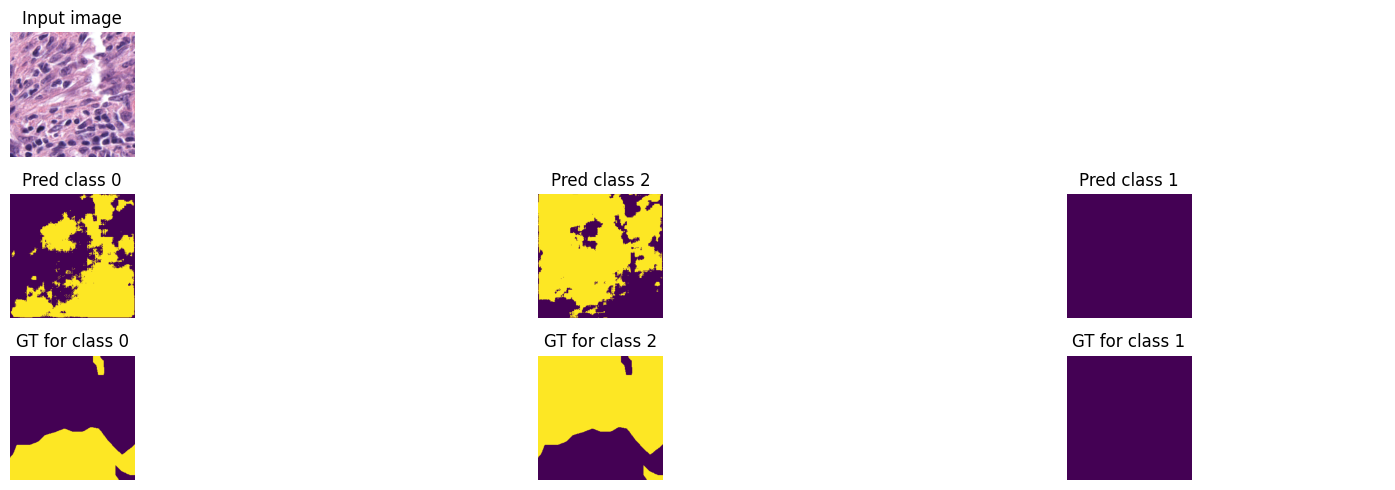

Train loss: 0.30066 | Time: 139m 55s | Val loss: 0.31523
Train_DICE_avg: 0.59703 | Train_Jaccard_avg: 0.53836 | Train_Sensitivity_avg: 0.80053 | Train_Specificity_avg: 0.77932 
Class 0 - Train_DICE: 0.58595 | Train_Jaccard: 0.53896 | Train_Sensitivity: 0.79883 | Train_Specificity: 0.83023 
Class 1 - Train_DICE: 0.70147 | Train_Jaccard: 0.64142 | Train_Sensitivity: 0.83757 | Train_Specificity: 0.74452 
Class 2 - Train_DICE: 0.50366 | Train_Jaccard: 0.43470 | Train_Sensitivity: 0.76519 | Train_Specificity: 0.76322 
Val_DICE_avg: 0.58804 | Val_Jaccard_avg: 0.53242 | Val_Sensitivity_avg: 0.80040 | Val_Specificity_avg: 0.74782 
Class 0 - Val_DICE: 0.56959 | Val_Jaccard: 0.52309 | Val_Sensitivity: 0.71035 | Val_Specificity: 0.82739 
Class 1 - Val_DICE: 0.72244 | Val_Jaccard: 0.66494 | Val_Sensitivity: 0.84887 | Val_Specificity: 0.68720 
Class 2 - Val_DICE: 0.47208 | Val_Jaccard: 0.40923 | Val_Sensitivity: 0.84198 | Val_Specificity: 0.72886 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.29908 | Time: 142m 42s | Val loss: 0.31136
Train_DICE_avg: 0.59621 | Train_Jaccard_avg: 0.53794 | Train_Sensitivity_avg: 0.80046 | Train_Specificity_avg: 0.77983 
Class 0 - Train_DICE: 0.58211 | Train_Jaccard: 0.53498 | Train_Sensitivity: 0.79467 | Train_Specificity: 0.83191 
Class 1 - Train_DICE: 0.70011 | Train_Jaccard: 0.64095 | Train_Sensitivity: 0.83869 | Train_Specificity: 0.74522 
Class 2 - Train_DICE: 0.50639 | Train_Jaccard: 0.43788 | Train_Sensitivity: 0.76801 | Train_Specificity: 0.76234 
Val_DICE_avg: 0.59388 | Val_Jaccard_avg: 0.53827 | Val_Sensitivity_avg: 0.80567 | Val_Specificity_avg: 0.74872 
Class 0 - Val_DICE: 0.57569 | Val_Jaccard: 0.52984 | Val_Sensitivity: 0.72655 | Val_Specificity: 0.82681 
Class 1 - Val_DICE: 0.72495 | Val_Jaccard: 0.66771 | Val_Sensitivity: 0.85508 | Val_Specificity: 0.68729 
Class 2 - Val_DICE: 0.48101 | Val_Jaccard: 0.41727 | Val_Sensitivity: 0.83537 | Val_Specificity: 0.73205 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.29804 | Time: 145m 27s | Val loss: 0.31194
Train_DICE_avg: 0.59745 | Train_Jaccard_avg: 0.53921 | Train_Sensitivity_avg: 0.80086 | Train_Specificity_avg: 0.77965 
Class 0 - Train_DICE: 0.58260 | Train_Jaccard: 0.53554 | Train_Sensitivity: 0.79518 | Train_Specificity: 0.82915 
Class 1 - Train_DICE: 0.70119 | Train_Jaccard: 0.64216 | Train_Sensitivity: 0.83912 | Train_Specificity: 0.74603 
Class 2 - Train_DICE: 0.50855 | Train_Jaccard: 0.43994 | Train_Sensitivity: 0.76827 | Train_Specificity: 0.76377 
Val_DICE_avg: 0.58990 | Val_Jaccard_avg: 0.53392 | Val_Sensitivity_avg: 0.80189 | Val_Specificity_avg: 0.74828 
Class 0 - Val_DICE: 0.57091 | Val_Jaccard: 0.52471 | Val_Sensitivity: 0.72027 | Val_Specificity: 0.82637 
Class 1 - Val_DICE: 0.72225 | Val_Jaccard: 0.66471 | Val_Sensitivity: 0.85174 | Val_Specificity: 0.68719 
Class 2 - Val_DICE: 0.47655 | Val_Jaccard: 0.41235 | Val_Sensitivity: 0.83367 | Val_Specificity: 0.73128 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.29502 | Time: 148m 13s | Val loss: 0.31390
Train_DICE_avg: 0.60016 | Train_Jaccard_avg: 0.54160 | Train_Sensitivity_avg: 0.79813 | Train_Specificity_avg: 0.77989 
Class 0 - Train_DICE: 0.58734 | Train_Jaccard: 0.53962 | Train_Sensitivity: 0.79419 | Train_Specificity: 0.83056 
Class 1 - Train_DICE: 0.70256 | Train_Jaccard: 0.64301 | Train_Sensitivity: 0.83540 | Train_Specificity: 0.74531 
Class 2 - Train_DICE: 0.51058 | Train_Jaccard: 0.44218 | Train_Sensitivity: 0.76481 | Train_Specificity: 0.76380 
Val_DICE_avg: 0.59172 | Val_Jaccard_avg: 0.53608 | Val_Sensitivity_avg: 0.80101 | Val_Specificity_avg: 0.74935 
Class 0 - Val_DICE: 0.57447 | Val_Jaccard: 0.52862 | Val_Sensitivity: 0.72443 | Val_Specificity: 0.82680 
Class 1 - Val_DICE: 0.72510 | Val_Jaccard: 0.66803 | Val_Sensitivity: 0.84796 | Val_Specificity: 0.68977 
Class 2 - Val_DICE: 0.47559 | Val_Jaccard: 0.41160 | Val_Sensitivity: 0.83063 | Val_Specificity: 0.73150 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.29391 | Time: 150m 59s | Val loss: 0.31641
Train_DICE_avg: 0.60327 | Train_Jaccard_avg: 0.54478 | Train_Sensitivity_avg: 0.80242 | Train_Specificity_avg: 0.78276 
Class 0 - Train_DICE: 0.59146 | Train_Jaccard: 0.54356 | Train_Sensitivity: 0.79817 | Train_Specificity: 0.83313 
Class 1 - Train_DICE: 0.70516 | Train_Jaccard: 0.64673 | Train_Sensitivity: 0.84245 | Train_Specificity: 0.74826 
Class 2 - Train_DICE: 0.51320 | Train_Jaccard: 0.44406 | Train_Sensitivity: 0.76663 | Train_Specificity: 0.76691 
Val_DICE_avg: 0.58992 | Val_Jaccard_avg: 0.53397 | Val_Sensitivity_avg: 0.80083 | Val_Specificity_avg: 0.74891 
Class 0 - Val_DICE: 0.56749 | Val_Jaccard: 0.52100 | Val_Sensitivity: 0.70791 | Val_Specificity: 0.82830 
Class 1 - Val_DICE: 0.72739 | Val_Jaccard: 0.66988 | Val_Sensitivity: 0.85346 | Val_Specificity: 0.68818 
Class 2 - Val_DICE: 0.47487 | Val_Jaccard: 0.41104 | Val_Sensitivity: 0.84111 | Val_Specificity: 0.73024 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


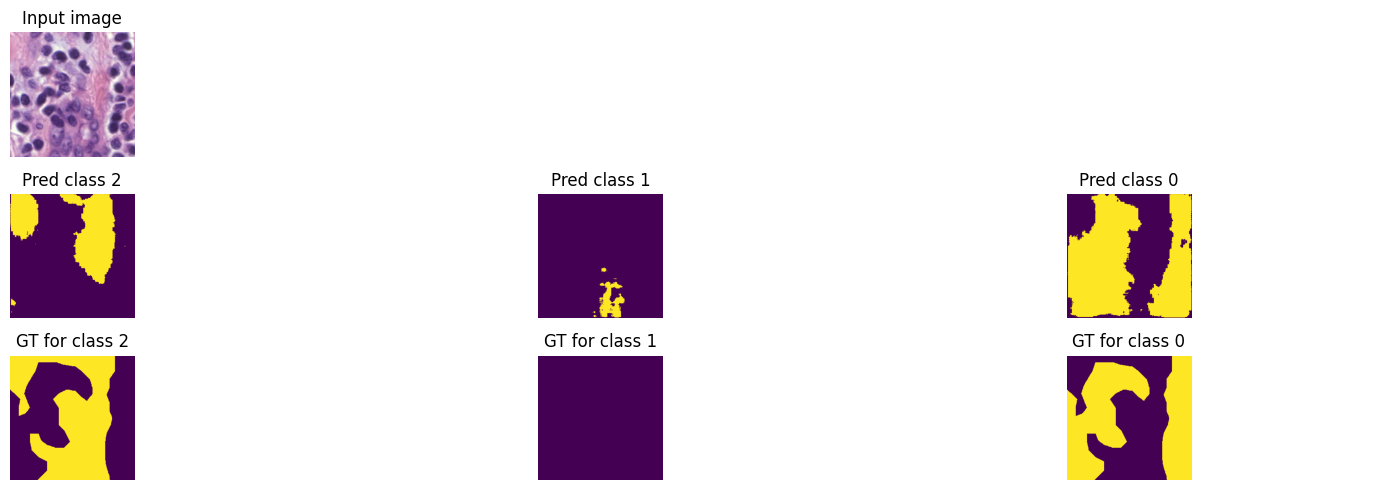

Train loss: 0.29241 | Time: 153m 45s | Val loss: 0.31315
Train_DICE_avg: 0.60252 | Train_Jaccard_avg: 0.54427 | Train_Sensitivity_avg: 0.80279 | Train_Specificity_avg: 0.78126 
Class 0 - Train_DICE: 0.59042 | Train_Jaccard: 0.54263 | Train_Sensitivity: 0.79892 | Train_Specificity: 0.83102 
Class 1 - Train_DICE: 0.70366 | Train_Jaccard: 0.64529 | Train_Sensitivity: 0.84079 | Train_Specificity: 0.74690 
Class 2 - Train_DICE: 0.51349 | Train_Jaccard: 0.44490 | Train_Sensitivity: 0.76867 | Train_Specificity: 0.76587 
Val_DICE_avg: 0.59066 | Val_Jaccard_avg: 0.53460 | Val_Sensitivity_avg: 0.80156 | Val_Specificity_avg: 0.74862 
Class 0 - Val_DICE: 0.56963 | Val_Jaccard: 0.52323 | Val_Sensitivity: 0.71283 | Val_Specificity: 0.82786 
Class 1 - Val_DICE: 0.72567 | Val_Jaccard: 0.66791 | Val_Sensitivity: 0.85585 | Val_Specificity: 0.68673 
Class 2 - Val_DICE: 0.47670 | Val_Jaccard: 0.41267 | Val_Sensitivity: 0.83598 | Val_Specificity: 0.73128 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.29069 | Time: 156m 31s | Val loss: 0.31338
Train_DICE_avg: 0.60340 | Train_Jaccard_avg: 0.54516 | Train_Sensitivity_avg: 0.80339 | Train_Specificity_avg: 0.78215 
Class 0 - Train_DICE: 0.59153 | Train_Jaccard: 0.54384 | Train_Sensitivity: 0.79880 | Train_Specificity: 0.83316 
Class 1 - Train_DICE: 0.70393 | Train_Jaccard: 0.64531 | Train_Sensitivity: 0.84012 | Train_Specificity: 0.74672 
Class 2 - Train_DICE: 0.51472 | Train_Jaccard: 0.44635 | Train_Sensitivity: 0.77127 | Train_Specificity: 0.76657 
Val_DICE_avg: 0.59202 | Val_Jaccard_avg: 0.53569 | Val_Sensitivity_avg: 0.79927 | Val_Specificity_avg: 0.74980 
Class 0 - Val_DICE: 0.56851 | Val_Jaccard: 0.52187 | Val_Sensitivity: 0.71157 | Val_Specificity: 0.82794 
Class 1 - Val_DICE: 0.72588 | Val_Jaccard: 0.66836 | Val_Sensitivity: 0.86012 | Val_Specificity: 0.68701 
Class 2 - Val_DICE: 0.48167 | Val_Jaccard: 0.41684 | Val_Sensitivity: 0.82612 | Val_Specificity: 0.73446 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.28953 | Time: 159m 16s | Val loss: 0.31585
Train_DICE_avg: 0.60518 | Train_Jaccard_avg: 0.54702 | Train_Sensitivity_avg: 0.80277 | Train_Specificity_avg: 0.78360 
Class 0 - Train_DICE: 0.59289 | Train_Jaccard: 0.54513 | Train_Sensitivity: 0.79808 | Train_Specificity: 0.83403 
Class 1 - Train_DICE: 0.70522 | Train_Jaccard: 0.64697 | Train_Sensitivity: 0.84170 | Train_Specificity: 0.74920 
Class 2 - Train_DICE: 0.51742 | Train_Jaccard: 0.44897 | Train_Sensitivity: 0.76854 | Train_Specificity: 0.76757 
Val_DICE_avg: 0.59048 | Val_Jaccard_avg: 0.53445 | Val_Sensitivity_avg: 0.79982 | Val_Specificity_avg: 0.74937 
Class 0 - Val_DICE: 0.56955 | Val_Jaccard: 0.52307 | Val_Sensitivity: 0.71156 | Val_Specificity: 0.82812 
Class 1 - Val_DICE: 0.72493 | Val_Jaccard: 0.66758 | Val_Sensitivity: 0.85427 | Val_Specificity: 0.68779 
Class 2 - Val_DICE: 0.47695 | Val_Jaccard: 0.41269 | Val_Sensitivity: 0.83364 | Val_Specificity: 0.73220 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.28899 | Time: 162m 2s | Val loss: 0.31398
Train_DICE_avg: 0.60487 | Train_Jaccard_avg: 0.54704 | Train_Sensitivity_avg: 0.80374 | Train_Specificity_avg: 0.78328 
Class 0 - Train_DICE: 0.59148 | Train_Jaccard: 0.54426 | Train_Sensitivity: 0.79818 | Train_Specificity: 0.83364 
Class 1 - Train_DICE: 0.70645 | Train_Jaccard: 0.64830 | Train_Sensitivity: 0.84131 | Train_Specificity: 0.74879 
Class 2 - Train_DICE: 0.51669 | Train_Jaccard: 0.44858 | Train_Sensitivity: 0.77172 | Train_Specificity: 0.76741 
Val_DICE_avg: 0.59154 | Val_Jaccard_avg: 0.53537 | Val_Sensitivity_avg: 0.79871 | Val_Specificity_avg: 0.74930 
Class 0 - Val_DICE: 0.57079 | Val_Jaccard: 0.52447 | Val_Sensitivity: 0.71472 | Val_Specificity: 0.82758 
Class 1 - Val_DICE: 0.72505 | Val_Jaccard: 0.66742 | Val_Sensitivity: 0.85451 | Val_Specificity: 0.68709 
Class 2 - Val_DICE: 0.47878 | Val_Jaccard: 0.41424 | Val_Sensitivity: 0.82691 | Val_Specificity: 0.73324 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.28573 | Time: 164m 48s | Val loss: 0.31794
Train_DICE_avg: 0.60927 | Train_Jaccard_avg: 0.55133 | Train_Sensitivity_avg: 0.80615 | Train_Specificity_avg: 0.78452 
Class 0 - Train_DICE: 0.59521 | Train_Jaccard: 0.54768 | Train_Sensitivity: 0.80051 | Train_Specificity: 0.83454 
Class 1 - Train_DICE: 0.71229 | Train_Jaccard: 0.65437 | Train_Sensitivity: 0.84286 | Train_Specificity: 0.75013 
Class 2 - Train_DICE: 0.52031 | Train_Jaccard: 0.45193 | Train_Sensitivity: 0.77508 | Train_Specificity: 0.76889 
Val_DICE_avg: 0.59096 | Val_Jaccard_avg: 0.53494 | Val_Sensitivity_avg: 0.79667 | Val_Specificity_avg: 0.75017 
Class 0 - Val_DICE: 0.56796 | Val_Jaccard: 0.52160 | Val_Sensitivity: 0.70946 | Val_Specificity: 0.82816 
Class 1 - Val_DICE: 0.72541 | Val_Jaccard: 0.66808 | Val_Sensitivity: 0.85086 | Val_Specificity: 0.68900 
Class 2 - Val_DICE: 0.47950 | Val_Jaccard: 0.41513 | Val_Sensitivity: 0.82971 | Val_Specificity: 0.73337 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


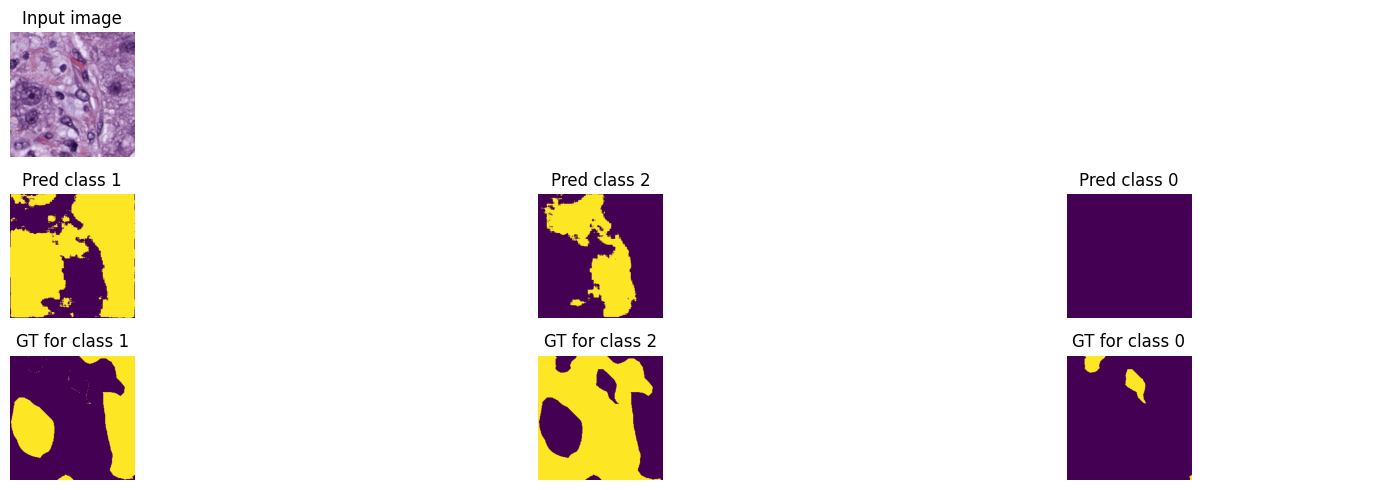

Train loss: 0.28540 | Time: 167m 34s | Val loss: 0.31539
Train_DICE_avg: 0.60972 | Train_Jaccard_avg: 0.55177 | Train_Sensitivity_avg: 0.80587 | Train_Specificity_avg: 0.78388 
Class 0 - Train_DICE: 0.59493 | Train_Jaccard: 0.54690 | Train_Sensitivity: 0.80024 | Train_Specificity: 0.83340 
Class 1 - Train_DICE: 0.71184 | Train_Jaccard: 0.65397 | Train_Sensitivity: 0.84495 | Train_Specificity: 0.74947 
Class 2 - Train_DICE: 0.52238 | Train_Jaccard: 0.45446 | Train_Sensitivity: 0.77242 | Train_Specificity: 0.76877 
Val_DICE_avg: 0.58972 | Val_Jaccard_avg: 0.53321 | Val_Sensitivity_avg: 0.79458 | Val_Specificity_avg: 0.74939 
Class 0 - Val_DICE: 0.56401 | Val_Jaccard: 0.51722 | Val_Sensitivity: 0.70091 | Val_Specificity: 0.82830 
Class 1 - Val_DICE: 0.72431 | Val_Jaccard: 0.66645 | Val_Sensitivity: 0.85978 | Val_Specificity: 0.68544 
Class 2 - Val_DICE: 0.48085 | Val_Jaccard: 0.41596 | Val_Sensitivity: 0.82304 | Val_Specificity: 0.73444 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Global Performance Metrics:
Loss mean: 0.31960, std: 0.06406
Dice Coefficient mean: 0.58822, std: 0.22634
Jaccard Index mean: 0.53079, std: 0.24011
Sensitivity mean: 0.70798, std: 0.21180
Specificity mean: 0.85820, std: 0.10850

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.55356, std: 0.41598
Jaccard mean: 0.50236, std: 0.41139
Sensitivity mean: 0.74989, std: 0.35793
Specificity mean: 0.85872, std: 0.24390

Class 1:
Dice mean: 0.69966, std: 0.36886
Jaccard mean: 0.64534, std: 0.37051
Sensitivity mean: 0.81497, std: 0.30138
Specificity mean: 0.83104, std: 0.28240

Class 2:
Dice mean: 0.51143, std: 0.39304
Jaccard mean: 0.44467, std: 0.38209
Sensitivity mean: 0.55908, std: 0.39930
Specificity mean: 0.88484, std: 0.20827


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-FCN-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 4.25 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


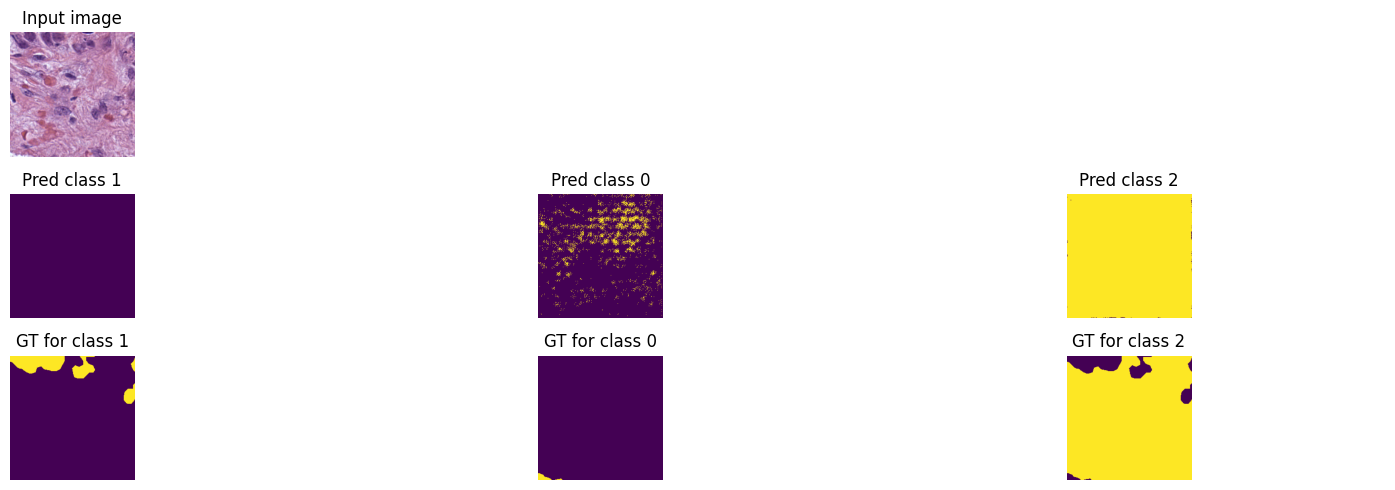

Train loss: 0.07758 | Time: 2m 41s | Val loss: 0.07553
Train_DICE_avg: 0.29432 | Train_Jaccard_avg: 0.29429 | Train_Sensitivity_avg: 0.98069 | Train_Specificity_avg: 0.67589 
Class 0 - Train_DICE: 0.42487 | Train_Jaccard: 0.42487 | Train_Sensitivity: 0.99114 | Train_Specificity: 0.76940 
Class 1 - Train_DICE: 0.27580 | Train_Jaccard: 0.27580 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59394 
Class 2 - Train_DICE: 0.18228 | Train_Jaccard: 0.18220 | Train_Sensitivity: 0.95094 | Train_Specificity: 0.66432 
Val_DICE_avg: 0.28243 | Val_Jaccard_avg: 0.28175 | Val_Sensitivity_avg: 0.92239 | Val_Specificity_avg: 0.66676 
Class 0 - Val_DICE: 0.43574 | Val_Jaccard: 0.43574 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.76814 
Class 1 - Val_DICE: 0.26333 | Val_Jaccard: 0.26333 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.14820 | Val_Jaccard: 0.14619 | Val_Sensitivity: 0.76717 | Val_Specificity: 0.66164 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.07215 | Time: 5m 23s | Val loss: 0.06936
Train_DICE_avg: 0.27527 | Train_Jaccard_avg: 0.26750 | Train_Sensitivity_avg: 0.86873 | Train_Specificity_avg: 0.67751 
Class 0 - Train_DICE: 0.42953 | Train_Jaccard: 0.42952 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.76952 
Class 1 - Train_DICE: 0.27603 | Train_Jaccard: 0.27603 | Train_Sensitivity: 0.99988 | Train_Specificity: 0.59358 
Class 2 - Train_DICE: 0.12024 | Train_Jaccard: 0.09695 | Train_Sensitivity: 0.60940 | Train_Specificity: 0.66943 
Val_DICE_avg: 0.26238 | Val_Jaccard_avg: 0.24760 | Val_Sensitivity_avg: 0.81841 | Val_Specificity_avg: 0.67067 
Class 0 - Val_DICE: 0.36154 | Val_Jaccard: 0.36106 | Val_Sensitivity: 0.86812 | Val_Specificity: 0.76818 
Class 1 - Val_DICE: 0.26241 | Val_Jaccard: 0.26241 | Val_Sensitivity: 0.99722 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.16319 | Val_Jaccard: 0.11933 | Val_Sensitivity: 0.58988 | Val_Specificity: 0.67333 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.06610 | Time: 8m 5s | Val loss: 0.06370
Train_DICE_avg: 0.23697 | Train_Jaccard_avg: 0.21156 | Train_Sensitivity_avg: 0.70553 | Train_Specificity_avg: 0.68520 
Class 0 - Train_DICE: 0.23480 | Train_Jaccard: 0.21610 | Train_Sensitivity: 0.59409 | Train_Specificity: 0.77427 
Class 1 - Train_DICE: 0.26188 | Train_Jaccard: 0.26187 | Train_Sensitivity: 0.97078 | Train_Specificity: 0.59440 
Class 2 - Train_DICE: 0.21424 | Train_Jaccard: 0.15672 | Train_Sensitivity: 0.55172 | Train_Specificity: 0.68691 
Val_DICE_avg: 0.24788 | Val_Jaccard_avg: 0.22394 | Val_Sensitivity_avg: 0.74931 | Val_Specificity_avg: 0.67359 
Class 0 - Val_DICE: 0.32127 | Val_Jaccard: 0.28664 | Val_Sensitivity: 0.61951 | Val_Specificity: 0.77894 
Class 1 - Val_DICE: 0.23172 | Val_Jaccard: 0.23169 | Val_Sensitivity: 0.92916 | Val_Specificity: 0.57049 
Class 2 - Val_DICE: 0.19066 | Val_Jaccard: 0.15350 | Val_Sensitivity: 0.69925 | Val_Specificity: 0.67133 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.06394 | Time: 10m 47s | Val loss: 0.06250
Train_DICE_avg: 0.23301 | Train_Jaccard_avg: 0.20681 | Train_Sensitivity_avg: 0.69356 | Train_Specificity_avg: 0.68501 
Class 0 - Train_DICE: 0.27742 | Train_Jaccard: 0.24935 | Train_Sensitivity: 0.61769 | Train_Specificity: 0.77881 
Class 1 - Train_DICE: 0.21136 | Train_Jaccard: 0.21122 | Train_Sensitivity: 0.84790 | Train_Specificity: 0.59380 
Class 2 - Train_DICE: 0.21026 | Train_Jaccard: 0.15985 | Train_Sensitivity: 0.61509 | Train_Specificity: 0.68241 
Val_DICE_avg: 0.22331 | Val_Jaccard_avg: 0.19980 | Val_Sensitivity_avg: 0.67616 | Val_Specificity_avg: 0.67374 
Class 0 - Val_DICE: 0.36121 | Val_Jaccard: 0.32475 | Val_Sensitivity: 0.66282 | Val_Specificity: 0.78093 
Class 1 - Val_DICE: 0.11986 | Val_Jaccard: 0.11929 | Val_Sensitivity: 0.63230 | Val_Specificity: 0.57036 
Class 2 - Val_DICE: 0.18888 | Val_Jaccard: 0.15535 | Val_Sensitivity: 0.73336 | Val_Specificity: 0.66993 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.06335 | Time: 13m 29s | Val loss: 0.06191
Train_DICE_avg: 0.21240 | Train_Jaccard_avg: 0.18578 | Train_Sensitivity_avg: 0.64107 | Train_Specificity_avg: 0.68494 
Class 0 - Train_DICE: 0.29766 | Train_Jaccard: 0.26641 | Train_Sensitivity: 0.62278 | Train_Specificity: 0.78096 
Class 1 - Train_DICE: 0.12570 | Train_Jaccard: 0.12527 | Train_Sensitivity: 0.65488 | Train_Specificity: 0.59349 
Class 2 - Train_DICE: 0.21384 | Train_Jaccard: 0.16565 | Train_Sensitivity: 0.64554 | Train_Specificity: 0.68036 
Val_DICE_avg: 0.21181 | Val_Jaccard_avg: 0.18721 | Val_Sensitivity_avg: 0.64420 | Val_Specificity_avg: 0.67444 
Class 0 - Val_DICE: 0.37087 | Val_Jaccard: 0.33216 | Val_Sensitivity: 0.66232 | Val_Specificity: 0.78293 
Class 1 - Val_DICE: 0.07234 | Val_Jaccard: 0.07083 | Val_Sensitivity: 0.52502 | Val_Specificity: 0.57032 
Class 2 - Val_DICE: 0.19221 | Val_Jaccard: 0.15863 | Val_Sensitivity: 0.74525 | Val_Specificity: 0.67009 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


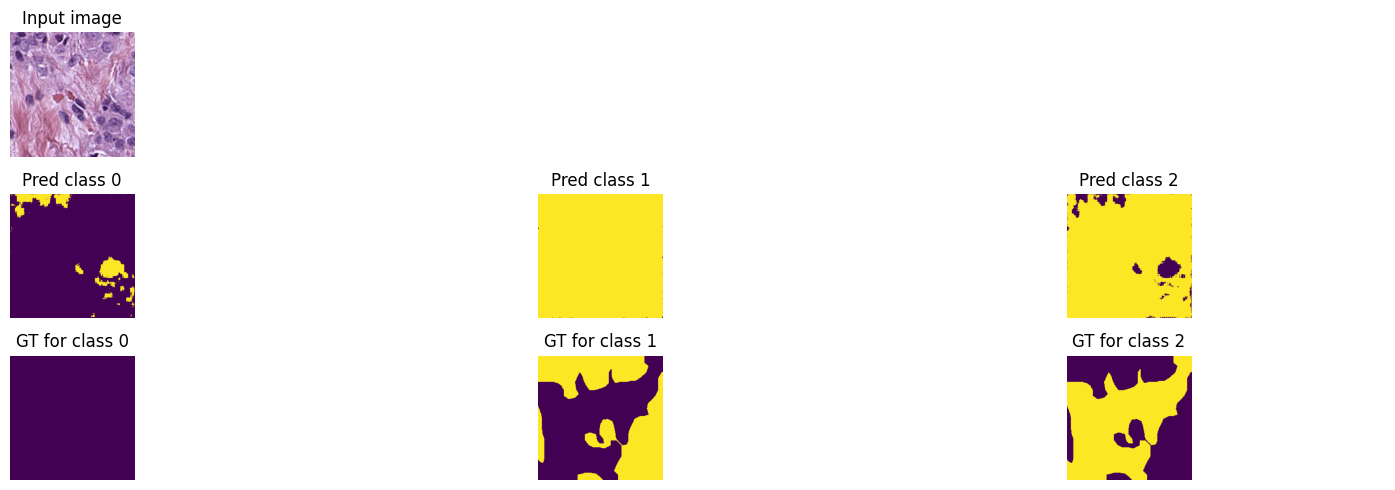

Train loss: 0.06304 | Time: 16m 12s | Val loss: 0.06147
Train_DICE_avg: 0.20204 | Train_Jaccard_avg: 0.17476 | Train_Sensitivity_avg: 0.61921 | Train_Specificity_avg: 0.68545 
Class 0 - Train_DICE: 0.30229 | Train_Jaccard: 0.26901 | Train_Sensitivity: 0.62360 | Train_Specificity: 0.78207 
Class 1 - Train_DICE: 0.08960 | Train_Jaccard: 0.08875 | Train_Sensitivity: 0.58274 | Train_Specificity: 0.59363 
Class 2 - Train_DICE: 0.21424 | Train_Jaccard: 0.16653 | Train_Sensitivity: 0.65129 | Train_Specificity: 0.68064 
Val_DICE_avg: 0.20622 | Val_Jaccard_avg: 0.18030 | Val_Sensitivity_avg: 0.63005 | Val_Specificity_avg: 0.67554 
Class 0 - Val_DICE: 0.37075 | Val_Jaccard: 0.32961 | Val_Sensitivity: 0.64342 | Val_Specificity: 0.78569 
Class 1 - Val_DICE: 0.05387 | Val_Jaccard: 0.05169 | Val_Sensitivity: 0.50061 | Val_Specificity: 0.57039 
Class 2 - Val_DICE: 0.19403 | Val_Jaccard: 0.15961 | Val_Sensitivity: 0.74613 | Val_Specificity: 0.67054 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.06277 | Time: 18m 53s | Val loss: 0.06112
Train_DICE_avg: 0.19154 | Train_Jaccard_avg: 0.16328 | Train_Sensitivity_avg: 0.60163 | Train_Specificity_avg: 0.68589 
Class 0 - Train_DICE: 0.29728 | Train_Jaccard: 0.26197 | Train_Sensitivity: 0.61233 | Train_Specificity: 0.78336 
Class 1 - Train_DICE: 0.06439 | Train_Jaccard: 0.06291 | Train_Sensitivity: 0.54838 | Train_Specificity: 0.59363 
Class 2 - Train_DICE: 0.21295 | Train_Jaccard: 0.16495 | Train_Sensitivity: 0.64418 | Train_Specificity: 0.68068 
Val_DICE_avg: 0.20195 | Val_Jaccard_avg: 0.17500 | Val_Sensitivity_avg: 0.62467 | Val_Specificity_avg: 0.67627 
Class 0 - Val_DICE: 0.36508 | Val_Jaccard: 0.32201 | Val_Sensitivity: 0.62235 | Val_Specificity: 0.78772 
Class 1 - Val_DICE: 0.04932 | Val_Jaccard: 0.04619 | Val_Sensitivity: 0.50289 | Val_Specificity: 0.57050 
Class 2 - Val_DICE: 0.19144 | Val_Jaccard: 0.15680 | Val_Sensitivity: 0.74876 | Val_Specificity: 0.67061 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.06251 | Time: 21m 36s | Val loss: 0.06074
Train_DICE_avg: 0.18902 | Train_Jaccard_avg: 0.15961 | Train_Sensitivity_avg: 0.59514 | Train_Specificity_avg: 0.68682 
Class 0 - Train_DICE: 0.30081 | Train_Jaccard: 0.26394 | Train_Sensitivity: 0.60723 | Train_Specificity: 0.78468 
Class 1 - Train_DICE: 0.04830 | Train_Jaccard: 0.04594 | Train_Sensitivity: 0.52976 | Train_Specificity: 0.59416 
Class 2 - Train_DICE: 0.21796 | Train_Jaccard: 0.16894 | Train_Sensitivity: 0.64844 | Train_Specificity: 0.68161 
Val_DICE_avg: 0.20501 | Val_Jaccard_avg: 0.17664 | Val_Sensitivity_avg: 0.62492 | Val_Specificity_avg: 0.67676 
Class 0 - Val_DICE: 0.37423 | Val_Jaccard: 0.33073 | Val_Sensitivity: 0.63110 | Val_Specificity: 0.78860 
Class 1 - Val_DICE: 0.04532 | Val_Jaccard: 0.03945 | Val_Sensitivity: 0.50126 | Val_Specificity: 0.57069 
Class 2 - Val_DICE: 0.19549 | Val_Jaccard: 0.15975 | Val_Sensitivity: 0.74240 | Val_Specificity: 0.67098 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.06235 | Time: 24m 18s | Val loss: 0.06044
Train_DICE_avg: 0.18697 | Train_Jaccard_avg: 0.15674 | Train_Sensitivity_avg: 0.59233 | Train_Specificity_avg: 0.68695 
Class 0 - Train_DICE: 0.30538 | Train_Jaccard: 0.26759 | Train_Sensitivity: 0.61003 | Train_Specificity: 0.78526 
Class 1 - Train_DICE: 0.04160 | Train_Jaccard: 0.03733 | Train_Sensitivity: 0.51848 | Train_Specificity: 0.59413 
Class 2 - Train_DICE: 0.21394 | Train_Jaccard: 0.16532 | Train_Sensitivity: 0.64847 | Train_Specificity: 0.68146 
Val_DICE_avg: 0.20384 | Val_Jaccard_avg: 0.17296 | Val_Sensitivity_avg: 0.61804 | Val_Specificity_avg: 0.67784 
Class 0 - Val_DICE: 0.36592 | Val_Jaccard: 0.32009 | Val_Sensitivity: 0.60402 | Val_Specificity: 0.79115 
Class 1 - Val_DICE: 0.04643 | Val_Jaccard: 0.03606 | Val_Sensitivity: 0.51013 | Val_Specificity: 0.57106 
Class 2 - Val_DICE: 0.19917 | Val_Jaccard: 0.16272 | Val_Sensitivity: 0.73997 | Val_Specificity: 0.67130 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


Train loss: 0.06211 | Time: 27m 0s | Val loss: 0.06002
Train_DICE_avg: 0.18734 | Train_Jaccard_avg: 0.15534 | Train_Sensitivity_avg: 0.58572 | Train_Specificity_avg: 0.68741 
Class 0 - Train_DICE: 0.30487 | Train_Jaccard: 0.26612 | Train_Sensitivity: 0.60235 | Train_Specificity: 0.78530 
Class 1 - Train_DICE: 0.03752 | Train_Jaccard: 0.03025 | Train_Sensitivity: 0.51372 | Train_Specificity: 0.59449 
Class 2 - Train_DICE: 0.21964 | Train_Jaccard: 0.16966 | Train_Sensitivity: 0.64108 | Train_Specificity: 0.68243 
Val_DICE_avg: 0.20928 | Val_Jaccard_avg: 0.17560 | Val_Sensitivity_avg: 0.62623 | Val_Specificity_avg: 0.67841 
Class 0 - Val_DICE: 0.36937 | Val_Jaccard: 0.32334 | Val_Sensitivity: 0.61173 | Val_Specificity: 0.79120 
Class 1 - Val_DICE: 0.05709 | Val_Jaccard: 0.04049 | Val_Sensitivity: 0.52247 | Val_Specificity: 0.57170 
Class 2 - Val_DICE: 0.20137 | Val_Jaccard: 0.16296 | Val_Sensitivity: 0.74448 | Val_Specificity: 0.67231 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


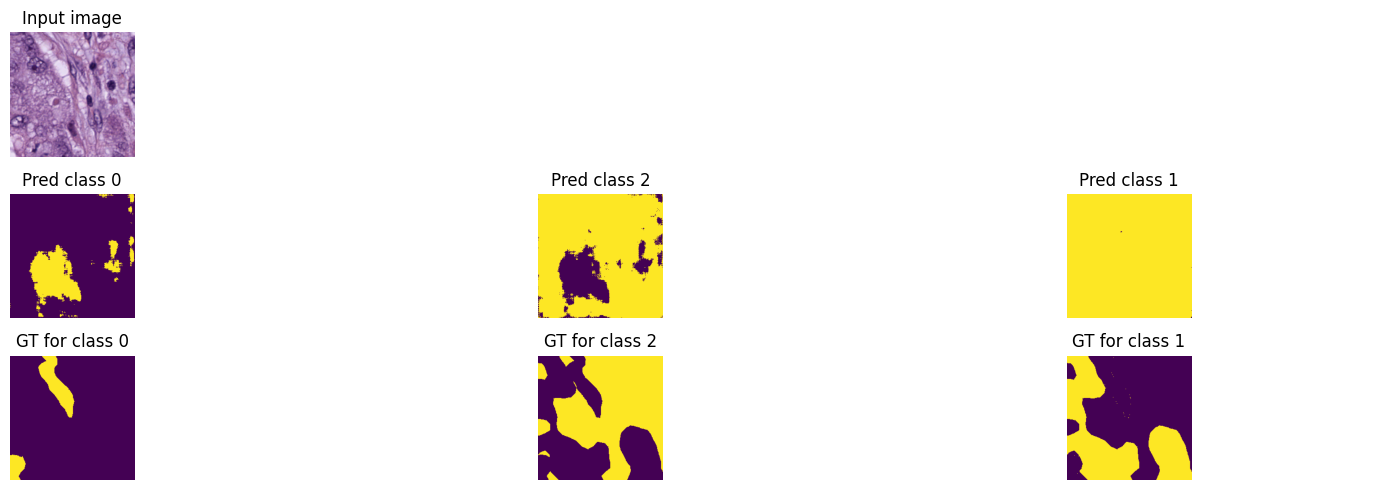

Train loss: 0.06194 | Time: 29m 46s | Val loss: 0.05973
Train_DICE_avg: 0.18834 | Train_Jaccard_avg: 0.15441 | Train_Sensitivity_avg: 0.58491 | Train_Specificity_avg: 0.68799 
Class 0 - Train_DICE: 0.30511 | Train_Jaccard: 0.26580 | Train_Sensitivity: 0.60124 | Train_Specificity: 0.78632 
Class 1 - Train_DICE: 0.03763 | Train_Jaccard: 0.02610 | Train_Sensitivity: 0.51361 | Train_Specificity: 0.59469 
Class 2 - Train_DICE: 0.22228 | Train_Jaccard: 0.17133 | Train_Sensitivity: 0.63988 | Train_Specificity: 0.68297 
Val_DICE_avg: 0.21838 | Val_Jaccard_avg: 0.18173 | Val_Sensitivity_avg: 0.63506 | Val_Specificity_avg: 0.67886 
Class 0 - Val_DICE: 0.37933 | Val_Jaccard: 0.33333 | Val_Sensitivity: 0.62459 | Val_Specificity: 0.79147 
Class 1 - Val_DICE: 0.07328 | Val_Jaccard: 0.04745 | Val_Sensitivity: 0.53013 | Val_Specificity: 0.57279 
Class 2 - Val_DICE: 0.20253 | Val_Jaccard: 0.16441 | Val_Sensitivity: 0.75046 | Val_Specificity: 0.67233 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.06165 | Time: 32m 31s | Val loss: 0.05914
Train_DICE_avg: 0.19360 | Train_Jaccard_avg: 0.15590 | Train_Sensitivity_avg: 0.58339 | Train_Specificity_avg: 0.68896 
Class 0 - Train_DICE: 0.30110 | Train_Jaccard: 0.26148 | Train_Sensitivity: 0.59701 | Train_Specificity: 0.78630 
Class 1 - Train_DICE: 0.05395 | Train_Jaccard: 0.03273 | Train_Sensitivity: 0.51412 | Train_Specificity: 0.59639 
Class 2 - Train_DICE: 0.22575 | Train_Jaccard: 0.17350 | Train_Sensitivity: 0.63903 | Train_Specificity: 0.68419 
Val_DICE_avg: 0.23053 | Val_Jaccard_avg: 0.18777 | Val_Sensitivity_avg: 0.62450 | Val_Specificity_avg: 0.68084 
Class 0 - Val_DICE: 0.37739 | Val_Jaccard: 0.33048 | Val_Sensitivity: 0.60558 | Val_Specificity: 0.79315 
Class 1 - Val_DICE: 0.10248 | Val_Jaccard: 0.06311 | Val_Sensitivity: 0.53499 | Val_Specificity: 0.57475 
Class 2 - Val_DICE: 0.21172 | Val_Jaccard: 0.16970 | Val_Sensitivity: 0.73294 | Val_Specificity: 0.67462 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.06130 | Time: 35m 15s | Val loss: 0.05865
Train_DICE_avg: 0.20741 | Train_Jaccard_avg: 0.16488 | Train_Sensitivity_avg: 0.58494 | Train_Specificity_avg: 0.69031 
Class 0 - Train_DICE: 0.30650 | Train_Jaccard: 0.26638 | Train_Sensitivity: 0.60359 | Train_Specificity: 0.78664 
Class 1 - Train_DICE: 0.08026 | Train_Jaccard: 0.04662 | Train_Sensitivity: 0.51589 | Train_Specificity: 0.59852 
Class 2 - Train_DICE: 0.23547 | Train_Jaccard: 0.18163 | Train_Sensitivity: 0.63535 | Train_Specificity: 0.68576 
Val_DICE_avg: 0.24851 | Val_Jaccard_avg: 0.19979 | Val_Sensitivity_avg: 0.63036 | Val_Specificity_avg: 0.68232 
Class 0 - Val_DICE: 0.37860 | Val_Jaccard: 0.33214 | Val_Sensitivity: 0.61132 | Val_Specificity: 0.79292 
Class 1 - Val_DICE: 0.14228 | Val_Jaccard: 0.08708 | Val_Sensitivity: 0.53691 | Val_Specificity: 0.57778 
Class 2 - Val_DICE: 0.22463 | Val_Jaccard: 0.18014 | Val_Sensitivity: 0.74286 | Val_Specificity: 0.67626 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.06094 | Time: 38m 1s | Val loss: 0.05796
Train_DICE_avg: 0.22239 | Train_Jaccard_avg: 0.17409 | Train_Sensitivity_avg: 0.58107 | Train_Specificity_avg: 0.69248 
Class 0 - Train_DICE: 0.30899 | Train_Jaccard: 0.26916 | Train_Sensitivity: 0.60330 | Train_Specificity: 0.78679 
Class 1 - Train_DICE: 0.12045 | Train_Jaccard: 0.07089 | Train_Sensitivity: 0.51812 | Train_Specificity: 0.60231 
Class 2 - Train_DICE: 0.23773 | Train_Jaccard: 0.18221 | Train_Sensitivity: 0.62181 | Train_Specificity: 0.68835 
Val_DICE_avg: 0.27038 | Val_Jaccard_avg: 0.21525 | Val_Sensitivity_avg: 0.63042 | Val_Specificity_avg: 0.68502 
Class 0 - Val_DICE: 0.37952 | Val_Jaccard: 0.33262 | Val_Sensitivity: 0.60590 | Val_Specificity: 0.79445 
Class 1 - Val_DICE: 0.19499 | Val_Jaccard: 0.12338 | Val_Sensitivity: 0.54118 | Val_Specificity: 0.58250 
Class 2 - Val_DICE: 0.23664 | Val_Jaccard: 0.18976 | Val_Sensitivity: 0.74418 | Val_Specificity: 0.67812 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.06044 | Time: 40m 46s | Val loss: 0.05719
Train_DICE_avg: 0.24250 | Train_Jaccard_avg: 0.18729 | Train_Sensitivity_avg: 0.58013 | Train_Specificity_avg: 0.69531 
Class 0 - Train_DICE: 0.31075 | Train_Jaccard: 0.27049 | Train_Sensitivity: 0.60735 | Train_Specificity: 0.78720 
Class 1 - Train_DICE: 0.17524 | Train_Jaccard: 0.10721 | Train_Sensitivity: 0.51812 | Train_Specificity: 0.60832 
Class 2 - Train_DICE: 0.24150 | Train_Jaccard: 0.18416 | Train_Sensitivity: 0.61491 | Train_Specificity: 0.69040 
Val_DICE_avg: 0.28674 | Val_Jaccard_avg: 0.22740 | Val_Sensitivity_avg: 0.62760 | Val_Specificity_avg: 0.68737 
Class 0 - Val_DICE: 0.37096 | Val_Jaccard: 0.32372 | Val_Sensitivity: 0.59452 | Val_Specificity: 0.79505 
Class 1 - Val_DICE: 0.25140 | Val_Jaccard: 0.16793 | Val_Sensitivity: 0.54592 | Val_Specificity: 0.58830 
Class 2 - Val_DICE: 0.23787 | Val_Jaccard: 0.19056 | Val_Sensitivity: 0.74237 | Val_Specificity: 0.67875 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


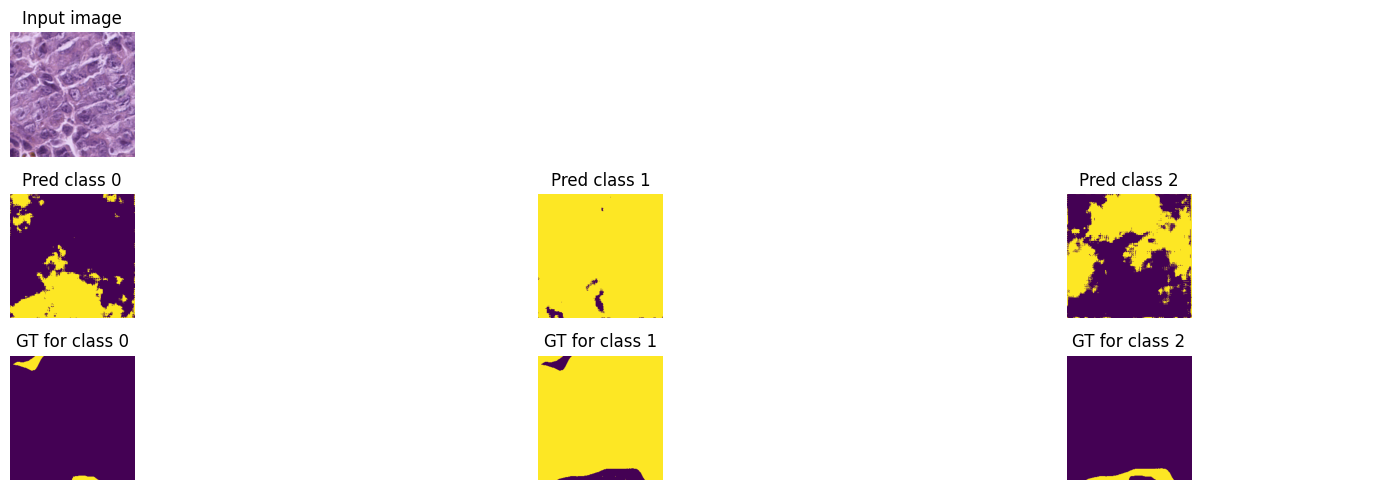

Train loss: 0.05967 | Time: 43m 31s | Val loss: 0.05590
Train_DICE_avg: 0.26359 | Train_Jaccard_avg: 0.20087 | Train_Sensitivity_avg: 0.56165 | Train_Specificity_avg: 0.69927 
Class 0 - Train_DICE: 0.30895 | Train_Jaccard: 0.26652 | Train_Sensitivity: 0.59405 | Train_Specificity: 0.78853 
Class 1 - Train_DICE: 0.24379 | Train_Jaccard: 0.15777 | Train_Sensitivity: 0.51787 | Train_Specificity: 0.61643 
Class 2 - Train_DICE: 0.23802 | Train_Jaccard: 0.17832 | Train_Sensitivity: 0.57303 | Train_Specificity: 0.69287 
Val_DICE_avg: 0.30631 | Val_Jaccard_avg: 0.24297 | Val_Sensitivity_avg: 0.61144 | Val_Specificity_avg: 0.69137 
Class 0 - Val_DICE: 0.37571 | Val_Jaccard: 0.32738 | Val_Sensitivity: 0.58651 | Val_Specificity: 0.79681 
Class 1 - Val_DICE: 0.30899 | Val_Jaccard: 0.21732 | Val_Sensitivity: 0.54947 | Val_Specificity: 0.59680 
Class 2 - Val_DICE: 0.23422 | Val_Jaccard: 0.18421 | Val_Sensitivity: 0.69835 | Val_Specificity: 0.68050 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.05846 | Time: 46m 16s | Val loss: 0.05367
Train_DICE_avg: 0.28307 | Train_Jaccard_avg: 0.21452 | Train_Sensitivity_avg: 0.54240 | Train_Specificity_avg: 0.70492 
Class 0 - Train_DICE: 0.29947 | Train_Jaccard: 0.25485 | Train_Sensitivity: 0.56986 | Train_Specificity: 0.78981 
Class 1 - Train_DICE: 0.30729 | Train_Jaccard: 0.21149 | Train_Sensitivity: 0.51947 | Train_Specificity: 0.62861 
Class 2 - Train_DICE: 0.24245 | Train_Jaccard: 0.17723 | Train_Sensitivity: 0.53788 | Train_Specificity: 0.69635 
Val_DICE_avg: 0.32048 | Val_Jaccard_avg: 0.25273 | Val_Sensitivity_avg: 0.58019 | Val_Specificity_avg: 0.69771 
Class 0 - Val_DICE: 0.35970 | Val_Jaccard: 0.30909 | Val_Sensitivity: 0.53769 | Val_Specificity: 0.80060 
Class 1 - Val_DICE: 0.35458 | Val_Jaccard: 0.26012 | Val_Sensitivity: 0.55523 | Val_Specificity: 0.60648 
Class 2 - Val_DICE: 0.24718 | Val_Jaccard: 0.18896 | Val_Sensitivity: 0.64764 | Val_Specificity: 0.68607 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.05662 | Time: 49m 2s | Val loss: 0.05078
Train_DICE_avg: 0.30494 | Train_Jaccard_avg: 0.23315 | Train_Sensitivity_avg: 0.53237 | Train_Specificity_avg: 0.71258 
Class 0 - Train_DICE: 0.29680 | Train_Jaccard: 0.24965 | Train_Sensitivity: 0.54466 | Train_Specificity: 0.79303 
Class 1 - Train_DICE: 0.35759 | Train_Jaccard: 0.25990 | Train_Sensitivity: 0.52542 | Train_Specificity: 0.64260 
Class 2 - Train_DICE: 0.26044 | Train_Jaccard: 0.18989 | Train_Sensitivity: 0.52703 | Train_Specificity: 0.70212 
Val_DICE_avg: 0.34282 | Val_Jaccard_avg: 0.27226 | Val_Sensitivity_avg: 0.56259 | Val_Specificity_avg: 0.70581 
Class 0 - Val_DICE: 0.36142 | Val_Jaccard: 0.30838 | Val_Sensitivity: 0.50940 | Val_Specificity: 0.80575 
Class 1 - Val_DICE: 0.38821 | Val_Jaccard: 0.29616 | Val_Sensitivity: 0.57344 | Val_Specificity: 0.61557 
Class 2 - Val_DICE: 0.27884 | Val_Jaccard: 0.21225 | Val_Sensitivity: 0.60493 | Val_Specificity: 0.69610 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:12<00:00,  2.35it/s]


Train loss: 0.05420 | Time: 51m 47s | Val loss: 0.04697
Train_DICE_avg: 0.33445 | Train_Jaccard_avg: 0.26312 | Train_Sensitivity_avg: 0.54602 | Train_Specificity_avg: 0.72098 
Class 0 - Train_DICE: 0.31405 | Train_Jaccard: 0.26539 | Train_Sensitivity: 0.55601 | Train_Specificity: 0.79476 
Class 1 - Train_DICE: 0.39935 | Train_Jaccard: 0.30767 | Train_Sensitivity: 0.53914 | Train_Specificity: 0.65999 
Class 2 - Train_DICE: 0.28996 | Train_Jaccard: 0.21630 | Train_Sensitivity: 0.54290 | Train_Specificity: 0.70818 
Val_DICE_avg: 0.40073 | Val_Jaccard_avg: 0.33207 | Val_Sensitivity_avg: 0.60090 | Val_Specificity_avg: 0.71502 
Class 0 - Val_DICE: 0.41453 | Val_Jaccard: 0.36268 | Val_Sensitivity: 0.57519 | Val_Specificity: 0.80566 
Class 1 - Val_DICE: 0.45242 | Val_Jaccard: 0.36868 | Val_Sensitivity: 0.61352 | Val_Specificity: 0.63073 
Class 2 - Val_DICE: 0.33523 | Val_Jaccard: 0.26486 | Val_Sensitivity: 0.61400 | Val_Specificity: 0.70868 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.05243 | Time: 54m 33s | Val loss: 0.04550
Train_DICE_avg: 0.36283 | Train_Jaccard_avg: 0.29400 | Train_Sensitivity_avg: 0.57112 | Train_Specificity_avg: 0.72773 
Class 0 - Train_DICE: 0.34864 | Train_Jaccard: 0.29988 | Train_Sensitivity: 0.58902 | Train_Specificity: 0.79637 
Class 1 - Train_DICE: 0.42470 | Train_Jaccard: 0.33964 | Train_Sensitivity: 0.55410 | Train_Specificity: 0.67337 
Class 2 - Train_DICE: 0.31516 | Train_Jaccard: 0.24246 | Train_Sensitivity: 0.57025 | Train_Specificity: 0.71346 
Val_DICE_avg: 0.43001 | Val_Jaccard_avg: 0.36340 | Val_Sensitivity_avg: 0.63364 | Val_Specificity_avg: 0.71850 
Class 0 - Val_DICE: 0.43360 | Val_Jaccard: 0.38221 | Val_Sensitivity: 0.59466 | Val_Specificity: 0.80721 
Class 1 - Val_DICE: 0.49174 | Val_Jaccard: 0.41190 | Val_Sensitivity: 0.64059 | Val_Specificity: 0.63835 
Class 2 - Val_DICE: 0.36470 | Val_Jaccard: 0.29610 | Val_Sensitivity: 0.66569 | Val_Specificity: 0.70994 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


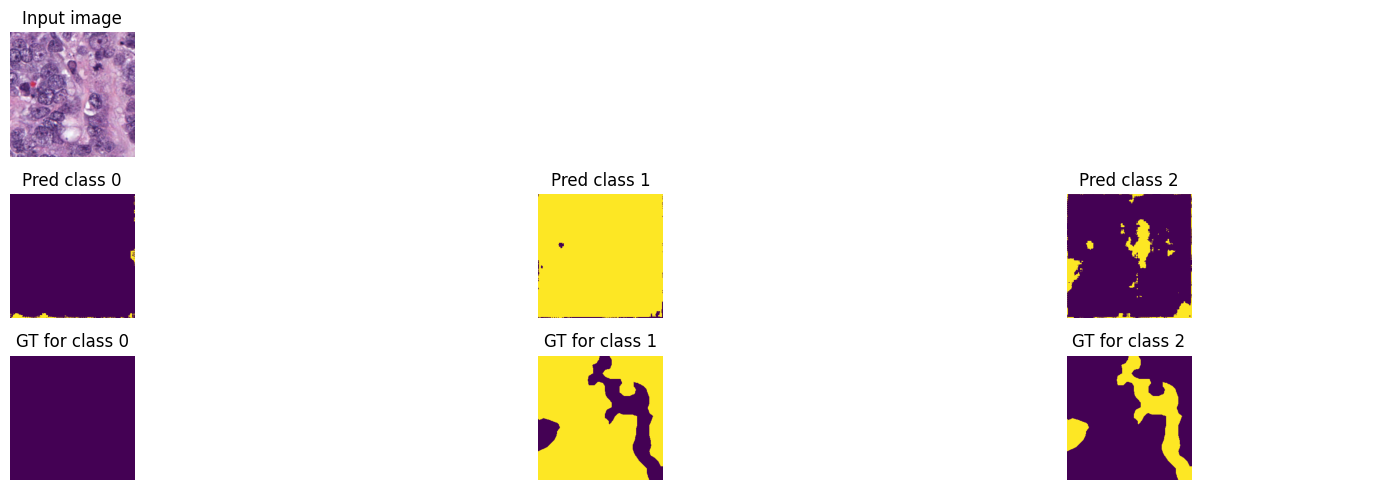

Train loss: 0.05062 | Time: 57m 19s | Val loss: 0.04269
Train_DICE_avg: 0.39286 | Train_Jaccard_avg: 0.32648 | Train_Sensitivity_avg: 0.60939 | Train_Specificity_avg: 0.73289 
Class 0 - Train_DICE: 0.38679 | Train_Jaccard: 0.33873 | Train_Sensitivity: 0.63192 | Train_Specificity: 0.79831 
Class 1 - Train_DICE: 0.45179 | Train_Jaccard: 0.37224 | Train_Sensitivity: 0.59074 | Train_Specificity: 0.68254 
Class 2 - Train_DICE: 0.34000 | Train_Jaccard: 0.26848 | Train_Sensitivity: 0.60552 | Train_Specificity: 0.71782 
Val_DICE_avg: 0.47627 | Val_Jaccard_avg: 0.41332 | Val_Sensitivity_avg: 0.69150 | Val_Specificity_avg: 0.72366 
Class 0 - Val_DICE: 0.48529 | Val_Jaccard: 0.43572 | Val_Sensitivity: 0.64525 | Val_Specificity: 0.81109 
Class 1 - Val_DICE: 0.54983 | Val_Jaccard: 0.47686 | Val_Sensitivity: 0.70632 | Val_Specificity: 0.64789 
Class 2 - Val_DICE: 0.39368 | Val_Jaccard: 0.32739 | Val_Sensitivity: 0.72292 | Val_Specificity: 0.71201 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.04904 | Time: 60m 4s | Val loss: 0.04096
Train_DICE_avg: 0.42363 | Train_Jaccard_avg: 0.35910 | Train_Sensitivity_avg: 0.64556 | Train_Specificity_avg: 0.73967 
Class 0 - Train_DICE: 0.42424 | Train_Jaccard: 0.37749 | Train_Sensitivity: 0.67838 | Train_Specificity: 0.80238 
Class 1 - Train_DICE: 0.48451 | Train_Jaccard: 0.40916 | Train_Sensitivity: 0.62650 | Train_Specificity: 0.69308 
Class 2 - Train_DICE: 0.36216 | Train_Jaccard: 0.29066 | Train_Sensitivity: 0.63181 | Train_Specificity: 0.72354 
Val_DICE_avg: 0.50381 | Val_Jaccard_avg: 0.44315 | Val_Sensitivity_avg: 0.71803 | Val_Specificity_avg: 0.72839 
Class 0 - Val_DICE: 0.52505 | Val_Jaccard: 0.47696 | Val_Sensitivity: 0.69365 | Val_Specificity: 0.81186 
Class 1 - Val_DICE: 0.57334 | Val_Jaccard: 0.50468 | Val_Sensitivity: 0.71044 | Val_Specificity: 0.65754 
Class 2 - Val_DICE: 0.41304 | Val_Jaccard: 0.34780 | Val_Sensitivity: 0.75000 | Val_Specificity: 0.71577 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.04810 | Time: 62m 49s | Val loss: 0.04038
Train_DICE_avg: 0.43836 | Train_Jaccard_avg: 0.37516 | Train_Sensitivity_avg: 0.66077 | Train_Specificity_avg: 0.74361 
Class 0 - Train_DICE: 0.43544 | Train_Jaccard: 0.38895 | Train_Sensitivity: 0.69162 | Train_Specificity: 0.80378 
Class 1 - Train_DICE: 0.50826 | Train_Jaccard: 0.43532 | Train_Sensitivity: 0.64921 | Train_Specificity: 0.70056 
Class 2 - Train_DICE: 0.37140 | Train_Jaccard: 0.30121 | Train_Sensitivity: 0.64148 | Train_Specificity: 0.72648 
Val_DICE_avg: 0.51262 | Val_Jaccard_avg: 0.45337 | Val_Sensitivity_avg: 0.73244 | Val_Specificity_avg: 0.73015 
Class 0 - Val_DICE: 0.53352 | Val_Jaccard: 0.48555 | Val_Sensitivity: 0.69563 | Val_Specificity: 0.81460 
Class 1 - Val_DICE: 0.58867 | Val_Jaccard: 0.52260 | Val_Sensitivity: 0.72668 | Val_Specificity: 0.66058 
Class 2 - Val_DICE: 0.41567 | Val_Jaccard: 0.35196 | Val_Sensitivity: 0.77502 | Val_Specificity: 0.71526 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:12<00:00,  2.35it/s]


Train loss: 0.04737 | Time: 65m 35s | Val loss: 0.03978
Train_DICE_avg: 0.45236 | Train_Jaccard_avg: 0.38985 | Train_Sensitivity_avg: 0.67412 | Train_Specificity_avg: 0.74648 
Class 0 - Train_DICE: 0.45601 | Train_Jaccard: 0.41037 | Train_Sensitivity: 0.71080 | Train_Specificity: 0.80549 
Class 1 - Train_DICE: 0.52086 | Train_Jaccard: 0.44916 | Train_Sensitivity: 0.66322 | Train_Specificity: 0.70426 
Class 2 - Train_DICE: 0.38021 | Train_Jaccard: 0.31001 | Train_Sensitivity: 0.64835 | Train_Specificity: 0.72968 
Val_DICE_avg: 0.52085 | Val_Jaccard_avg: 0.46257 | Val_Sensitivity_avg: 0.74253 | Val_Specificity_avg: 0.73238 
Class 0 - Val_DICE: 0.54778 | Val_Jaccard: 0.50011 | Val_Sensitivity: 0.71346 | Val_Specificity: 0.81521 
Class 1 - Val_DICE: 0.59579 | Val_Jaccard: 0.53119 | Val_Sensitivity: 0.72398 | Val_Specificity: 0.66621 
Class 2 - Val_DICE: 0.41897 | Val_Jaccard: 0.35641 | Val_Sensitivity: 0.79016 | Val_Specificity: 0.71572 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:12<00:00,  2.35it/s]


Train loss: 0.04676 | Time: 68m 20s | Val loss: 0.03925
Train_DICE_avg: 0.46007 | Train_Jaccard_avg: 0.39795 | Train_Sensitivity_avg: 0.68156 | Train_Specificity_avg: 0.74878 
Class 0 - Train_DICE: 0.46176 | Train_Jaccard: 0.41614 | Train_Sensitivity: 0.71826 | Train_Specificity: 0.80676 
Class 1 - Train_DICE: 0.53265 | Train_Jaccard: 0.46176 | Train_Sensitivity: 0.67240 | Train_Specificity: 0.70806 
Class 2 - Train_DICE: 0.38581 | Train_Jaccard: 0.31595 | Train_Sensitivity: 0.65403 | Train_Specificity: 0.73151 
Val_DICE_avg: 0.53203 | Val_Jaccard_avg: 0.47439 | Val_Sensitivity_avg: 0.75270 | Val_Specificity_avg: 0.73399 
Class 0 - Val_DICE: 0.55443 | Val_Jaccard: 0.50727 | Val_Sensitivity: 0.72118 | Val_Specificity: 0.81597 
Class 1 - Val_DICE: 0.61205 | Val_Jaccard: 0.54857 | Val_Sensitivity: 0.73818 | Val_Specificity: 0.66813 
Class 2 - Val_DICE: 0.42963 | Val_Jaccard: 0.36732 | Val_Sensitivity: 0.79875 | Val_Specificity: 0.71786 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:12<00:00,  2.35it/s]


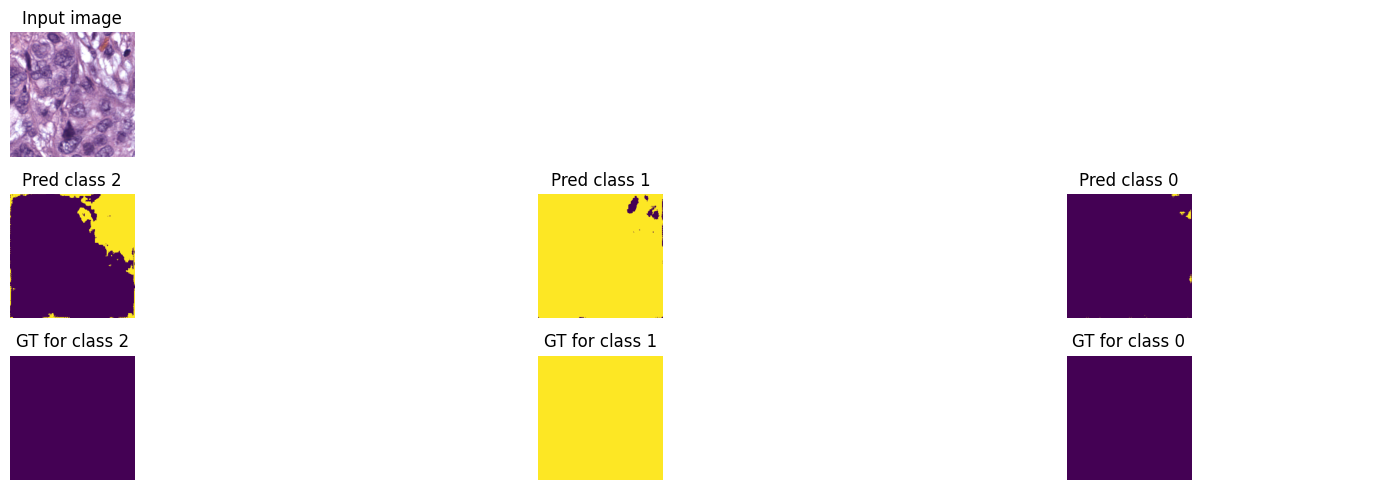

Train loss: 0.04642 | Time: 71m 7s | Val loss: 0.03893
Train_DICE_avg: 0.46259 | Train_Jaccard_avg: 0.40122 | Train_Sensitivity_avg: 0.68206 | Train_Specificity_avg: 0.75174 
Class 0 - Train_DICE: 0.46183 | Train_Jaccard: 0.41685 | Train_Sensitivity: 0.71345 | Train_Specificity: 0.80868 
Class 1 - Train_DICE: 0.53492 | Train_Jaccard: 0.46546 | Train_Sensitivity: 0.67409 | Train_Specificity: 0.71247 
Class 2 - Train_DICE: 0.39102 | Train_Jaccard: 0.32136 | Train_Sensitivity: 0.65865 | Train_Specificity: 0.73406 
Val_DICE_avg: 0.53580 | Val_Jaccard_avg: 0.47821 | Val_Sensitivity_avg: 0.75627 | Val_Specificity_avg: 0.73443 
Class 0 - Val_DICE: 0.55942 | Val_Jaccard: 0.51205 | Val_Sensitivity: 0.72094 | Val_Specificity: 0.81736 
Class 1 - Val_DICE: 0.61796 | Val_Jaccard: 0.55480 | Val_Sensitivity: 0.75004 | Val_Specificity: 0.66782 
Class 2 - Val_DICE: 0.43002 | Val_Jaccard: 0.36778 | Val_Sensitivity: 0.79782 | Val_Specificity: 0.71812 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.04604 | Time: 73m 51s | Val loss: 0.03859
Train_DICE_avg: 0.46970 | Train_Jaccard_avg: 0.40853 | Train_Sensitivity_avg: 0.68941 | Train_Specificity_avg: 0.75155 
Class 0 - Train_DICE: 0.47251 | Train_Jaccard: 0.42725 | Train_Sensitivity: 0.72568 | Train_Specificity: 0.80866 
Class 1 - Train_DICE: 0.54454 | Train_Jaccard: 0.47548 | Train_Sensitivity: 0.68149 | Train_Specificity: 0.71094 
Class 2 - Train_DICE: 0.39204 | Train_Jaccard: 0.32285 | Train_Sensitivity: 0.66106 | Train_Specificity: 0.73506 
Val_DICE_avg: 0.53846 | Val_Jaccard_avg: 0.48168 | Val_Sensitivity_avg: 0.76063 | Val_Specificity_avg: 0.73622 
Class 0 - Val_DICE: 0.56526 | Val_Jaccard: 0.51832 | Val_Sensitivity: 0.73254 | Val_Specificity: 0.81789 
Class 1 - Val_DICE: 0.61612 | Val_Jaccard: 0.55401 | Val_Sensitivity: 0.73819 | Val_Specificity: 0.67160 
Class 2 - Val_DICE: 0.43399 | Val_Jaccard: 0.37273 | Val_Sensitivity: 0.81114 | Val_Specificity: 0.71918 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.04567 | Time: 76m 34s | Val loss: 0.03815
Train_DICE_avg: 0.47212 | Train_Jaccard_avg: 0.41113 | Train_Sensitivity_avg: 0.69064 | Train_Specificity_avg: 0.75353 
Class 0 - Train_DICE: 0.47528 | Train_Jaccard: 0.43033 | Train_Sensitivity: 0.72552 | Train_Specificity: 0.80895 
Class 1 - Train_DICE: 0.54629 | Train_Jaccard: 0.47739 | Train_Sensitivity: 0.68171 | Train_Specificity: 0.71586 
Class 2 - Train_DICE: 0.39480 | Train_Jaccard: 0.32566 | Train_Sensitivity: 0.66471 | Train_Specificity: 0.73579 
Val_DICE_avg: 0.54184 | Val_Jaccard_avg: 0.48544 | Val_Sensitivity_avg: 0.76032 | Val_Specificity_avg: 0.73758 
Class 0 - Val_DICE: 0.56169 | Val_Jaccard: 0.51542 | Val_Sensitivity: 0.73362 | Val_Specificity: 0.81730 
Class 1 - Val_DICE: 0.62325 | Val_Jaccard: 0.56196 | Val_Sensitivity: 0.74100 | Val_Specificity: 0.67381 
Class 2 - Val_DICE: 0.44058 | Val_Jaccard: 0.37895 | Val_Sensitivity: 0.80635 | Val_Specificity: 0.72163 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.04538 | Time: 79m 18s | Val loss: 0.03804
Train_DICE_avg: 0.47657 | Train_Jaccard_avg: 0.41586 | Train_Sensitivity_avg: 0.69570 | Train_Specificity_avg: 0.75496 
Class 0 - Train_DICE: 0.47658 | Train_Jaccard: 0.43191 | Train_Sensitivity: 0.73032 | Train_Specificity: 0.80957 
Class 1 - Train_DICE: 0.55489 | Train_Jaccard: 0.48659 | Train_Sensitivity: 0.69314 | Train_Specificity: 0.71765 
Class 2 - Train_DICE: 0.39825 | Train_Jaccard: 0.32908 | Train_Sensitivity: 0.66363 | Train_Specificity: 0.73766 
Val_DICE_avg: 0.54468 | Val_Jaccard_avg: 0.48838 | Val_Sensitivity_avg: 0.76082 | Val_Specificity_avg: 0.73810 
Class 0 - Val_DICE: 0.56520 | Val_Jaccard: 0.51858 | Val_Sensitivity: 0.72927 | Val_Specificity: 0.81951 
Class 1 - Val_DICE: 0.62562 | Val_Jaccard: 0.56449 | Val_Sensitivity: 0.74535 | Val_Specificity: 0.67321 
Class 2 - Val_DICE: 0.44322 | Val_Jaccard: 0.38206 | Val_Sensitivity: 0.80784 | Val_Specificity: 0.72158 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:12<00:00,  2.36it/s]


Train loss: 0.04488 | Time: 82m 3s | Val loss: 0.03819
Train_DICE_avg: 0.48227 | Train_Jaccard_avg: 0.42159 | Train_Sensitivity_avg: 0.69890 | Train_Specificity_avg: 0.75731 
Class 0 - Train_DICE: 0.48252 | Train_Jaccard: 0.43784 | Train_Sensitivity: 0.73419 | Train_Specificity: 0.81197 
Class 1 - Train_DICE: 0.56251 | Train_Jaccard: 0.49457 | Train_Sensitivity: 0.69561 | Train_Specificity: 0.72131 
Class 2 - Train_DICE: 0.40178 | Train_Jaccard: 0.33235 | Train_Sensitivity: 0.66690 | Train_Specificity: 0.73865 
Val_DICE_avg: 0.54275 | Val_Jaccard_avg: 0.48637 | Val_Sensitivity_avg: 0.75920 | Val_Specificity_avg: 0.73817 
Class 0 - Val_DICE: 0.56180 | Val_Jaccard: 0.51438 | Val_Sensitivity: 0.71516 | Val_Specificity: 0.82104 
Class 1 - Val_DICE: 0.62455 | Val_Jaccard: 0.56361 | Val_Sensitivity: 0.74891 | Val_Specificity: 0.67255 
Class 2 - Val_DICE: 0.44190 | Val_Jaccard: 0.38111 | Val_Sensitivity: 0.81353 | Val_Specificity: 0.72091 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:12<00:00,  2.35it/s]


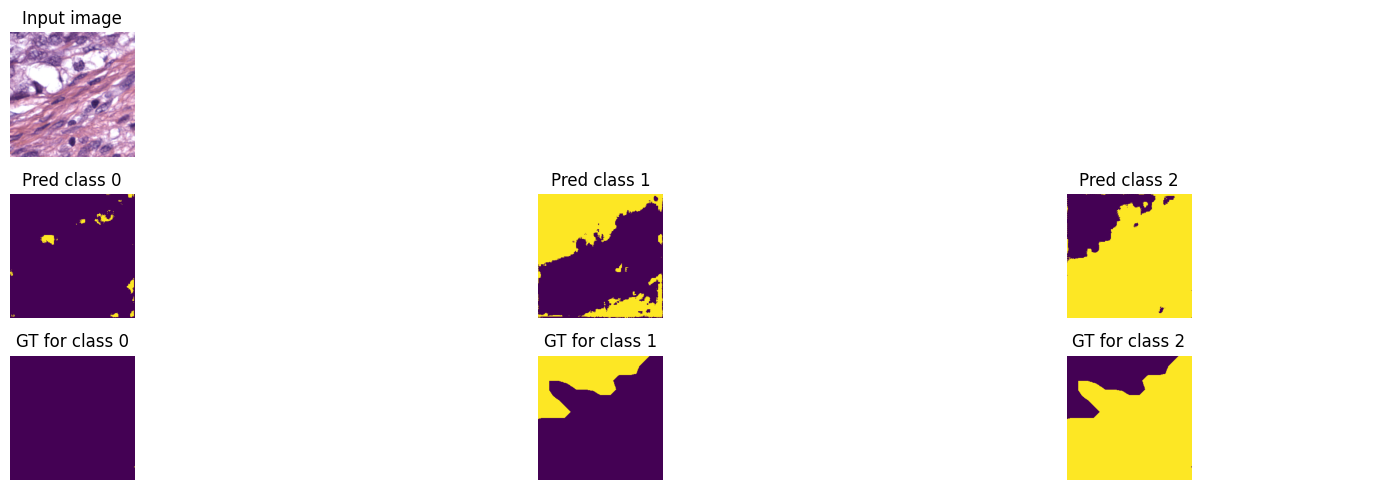

Train loss: 0.04467 | Time: 84m 49s | Val loss: 0.03774
Train_DICE_avg: 0.48885 | Train_Jaccard_avg: 0.42865 | Train_Sensitivity_avg: 0.70670 | Train_Specificity_avg: 0.75845 
Class 0 - Train_DICE: 0.49175 | Train_Jaccard: 0.44702 | Train_Sensitivity: 0.74325 | Train_Specificity: 0.81189 
Class 1 - Train_DICE: 0.56725 | Train_Jaccard: 0.50019 | Train_Sensitivity: 0.70698 | Train_Specificity: 0.72167 
Class 2 - Train_DICE: 0.40754 | Train_Jaccard: 0.33873 | Train_Sensitivity: 0.66988 | Train_Specificity: 0.74181 
Val_DICE_avg: 0.55151 | Val_Jaccard_avg: 0.49483 | Val_Sensitivity_avg: 0.76432 | Val_Specificity_avg: 0.73982 
Class 0 - Val_DICE: 0.56136 | Val_Jaccard: 0.51374 | Val_Sensitivity: 0.70654 | Val_Specificity: 0.82291 
Class 1 - Val_DICE: 0.64006 | Val_Jaccard: 0.57868 | Val_Sensitivity: 0.76965 | Val_Specificity: 0.67187 
Class 2 - Val_DICE: 0.45312 | Val_Jaccard: 0.39206 | Val_Sensitivity: 0.81678 | Val_Specificity: 0.72470 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


Train loss: 0.04412 | Time: 87m 34s | Val loss: 0.03741
Train_DICE_avg: 0.49106 | Train_Jaccard_avg: 0.43097 | Train_Sensitivity_avg: 0.70863 | Train_Specificity_avg: 0.75916 
Class 0 - Train_DICE: 0.49663 | Train_Jaccard: 0.45200 | Train_Sensitivity: 0.74708 | Train_Specificity: 0.81367 
Class 1 - Train_DICE: 0.57008 | Train_Jaccard: 0.50330 | Train_Sensitivity: 0.70736 | Train_Specificity: 0.72201 
Class 2 - Train_DICE: 0.40648 | Train_Jaccard: 0.33761 | Train_Sensitivity: 0.67145 | Train_Specificity: 0.74182 
Val_DICE_avg: 0.55492 | Val_Jaccard_avg: 0.49983 | Val_Sensitivity_avg: 0.77375 | Val_Specificity_avg: 0.74102 
Class 0 - Val_DICE: 0.57631 | Val_Jaccard: 0.53042 | Val_Sensitivity: 0.74177 | Val_Specificity: 0.82097 
Class 1 - Val_DICE: 0.64117 | Val_Jaccard: 0.58162 | Val_Sensitivity: 0.75246 | Val_Specificity: 0.67917 
Class 2 - Val_DICE: 0.44727 | Val_Jaccard: 0.38744 | Val_Sensitivity: 0.82703 | Val_Specificity: 0.72291 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.04340 | Time: 90m 19s | Val loss: 0.03722
Train_DICE_avg: 0.49826 | Train_Jaccard_avg: 0.43848 | Train_Sensitivity_avg: 0.71408 | Train_Specificity_avg: 0.76078 
Class 0 - Train_DICE: 0.50198 | Train_Jaccard: 0.45769 | Train_Sensitivity: 0.75002 | Train_Specificity: 0.81462 
Class 1 - Train_DICE: 0.58192 | Train_Jaccard: 0.51571 | Train_Sensitivity: 0.71712 | Train_Specificity: 0.72477 
Class 2 - Train_DICE: 0.41088 | Train_Jaccard: 0.34203 | Train_Sensitivity: 0.67510 | Train_Specificity: 0.74296 
Val_DICE_avg: 0.55547 | Val_Jaccard_avg: 0.50033 | Val_Sensitivity_avg: 0.77450 | Val_Specificity_avg: 0.74155 
Class 0 - Val_DICE: 0.57672 | Val_Jaccard: 0.53000 | Val_Sensitivity: 0.73232 | Val_Specificity: 0.82296 
Class 1 - Val_DICE: 0.64248 | Val_Jaccard: 0.58320 | Val_Sensitivity: 0.76209 | Val_Specificity: 0.67904 
Class 2 - Val_DICE: 0.44722 | Val_Jaccard: 0.38780 | Val_Sensitivity: 0.82909 | Val_Specificity: 0.72265 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:12<00:00,  2.34it/s]


Train loss: 0.04294 | Time: 93m 5s | Val loss: 0.03718
Train_DICE_avg: 0.50242 | Train_Jaccard_avg: 0.44302 | Train_Sensitivity_avg: 0.71896 | Train_Specificity_avg: 0.76217 
Class 0 - Train_DICE: 0.50527 | Train_Jaccard: 0.46105 | Train_Sensitivity: 0.75586 | Train_Specificity: 0.81616 
Class 1 - Train_DICE: 0.58669 | Train_Jaccard: 0.52112 | Train_Sensitivity: 0.71923 | Train_Specificity: 0.72583 
Class 2 - Train_DICE: 0.41531 | Train_Jaccard: 0.34689 | Train_Sensitivity: 0.68180 | Train_Specificity: 0.74452 
Val_DICE_avg: 0.55891 | Val_Jaccard_avg: 0.50390 | Val_Sensitivity_avg: 0.77493 | Val_Specificity_avg: 0.74252 
Class 0 - Val_DICE: 0.57814 | Val_Jaccard: 0.53153 | Val_Sensitivity: 0.73045 | Val_Specificity: 0.82313 
Class 1 - Val_DICE: 0.64640 | Val_Jaccard: 0.58753 | Val_Sensitivity: 0.76373 | Val_Specificity: 0.67990 
Class 2 - Val_DICE: 0.45221 | Val_Jaccard: 0.39263 | Val_Sensitivity: 0.83060 | Val_Specificity: 0.72454 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.04256 | Time: 95m 50s | Val loss: 0.03711
Train_DICE_avg: 0.50739 | Train_Jaccard_avg: 0.44775 | Train_Sensitivity_avg: 0.72140 | Train_Specificity_avg: 0.76378 
Class 0 - Train_DICE: 0.50930 | Train_Jaccard: 0.46500 | Train_Sensitivity: 0.75977 | Train_Specificity: 0.81706 
Class 1 - Train_DICE: 0.59299 | Train_Jaccard: 0.52749 | Train_Sensitivity: 0.72650 | Train_Specificity: 0.72789 
Class 2 - Train_DICE: 0.41988 | Train_Jaccard: 0.35076 | Train_Sensitivity: 0.67792 | Train_Specificity: 0.74638 
Val_DICE_avg: 0.55930 | Val_Jaccard_avg: 0.50431 | Val_Sensitivity_avg: 0.77557 | Val_Specificity_avg: 0.74280 
Class 0 - Val_DICE: 0.58071 | Val_Jaccard: 0.53401 | Val_Sensitivity: 0.72870 | Val_Specificity: 0.82497 
Class 1 - Val_DICE: 0.64579 | Val_Jaccard: 0.58716 | Val_Sensitivity: 0.76340 | Val_Specificity: 0.67994 
Class 2 - Val_DICE: 0.45139 | Val_Jaccard: 0.39178 | Val_Sensitivity: 0.83463 | Val_Specificity: 0.72350 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


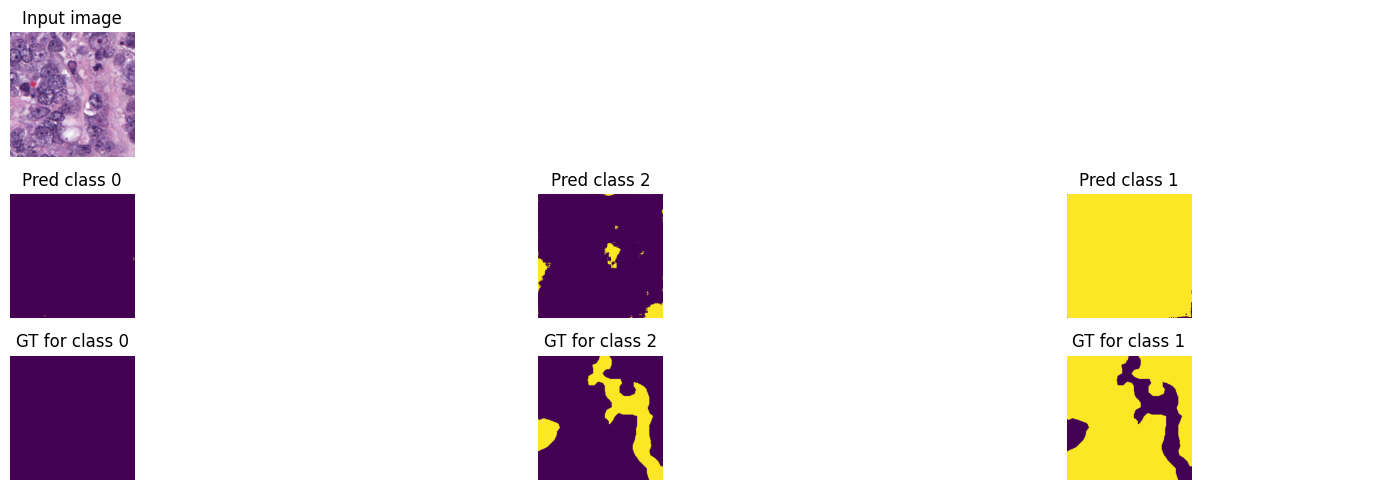

Train loss: 0.04193 | Time: 98m 36s | Val loss: 0.03664
Train_DICE_avg: 0.51121 | Train_Jaccard_avg: 0.45150 | Train_Sensitivity_avg: 0.72216 | Train_Specificity_avg: 0.76471 
Class 0 - Train_DICE: 0.51428 | Train_Jaccard: 0.46951 | Train_Sensitivity: 0.76068 | Train_Specificity: 0.81726 
Class 1 - Train_DICE: 0.59539 | Train_Jaccard: 0.53055 | Train_Sensitivity: 0.72647 | Train_Specificity: 0.72891 
Class 2 - Train_DICE: 0.42396 | Train_Jaccard: 0.35443 | Train_Sensitivity: 0.67932 | Train_Specificity: 0.74797 
Val_DICE_avg: 0.56073 | Val_Jaccard_avg: 0.50597 | Val_Sensitivity_avg: 0.77215 | Val_Specificity_avg: 0.74451 
Class 0 - Val_DICE: 0.58102 | Val_Jaccard: 0.53536 | Val_Sensitivity: 0.74340 | Val_Specificity: 0.82357 
Class 1 - Val_DICE: 0.64317 | Val_Jaccard: 0.58482 | Val_Sensitivity: 0.74510 | Val_Specificity: 0.68381 
Class 2 - Val_DICE: 0.45800 | Val_Jaccard: 0.39772 | Val_Sensitivity: 0.82794 | Val_Specificity: 0.72616 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:12<00:00,  2.38it/s]


Train loss: 0.04146 | Time: 101m 22s | Val loss: 0.03647
Train_DICE_avg: 0.51576 | Train_Jaccard_avg: 0.45612 | Train_Sensitivity_avg: 0.72599 | Train_Specificity_avg: 0.76642 
Class 0 - Train_DICE: 0.51844 | Train_Jaccard: 0.47365 | Train_Sensitivity: 0.76384 | Train_Specificity: 0.81862 
Class 1 - Train_DICE: 0.60038 | Train_Jaccard: 0.53558 | Train_Sensitivity: 0.73054 | Train_Specificity: 0.73021 
Class 2 - Train_DICE: 0.42846 | Train_Jaccard: 0.35912 | Train_Sensitivity: 0.68361 | Train_Specificity: 0.75043 
Val_DICE_avg: 0.56277 | Val_Jaccard_avg: 0.50777 | Val_Sensitivity_avg: 0.77343 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.57934 | Val_Jaccard: 0.53307 | Val_Sensitivity: 0.73336 | Val_Specificity: 0.82551 
Class 1 - Val_DICE: 0.64332 | Val_Jaccard: 0.58511 | Val_Sensitivity: 0.75459 | Val_Specificity: 0.68203 
Class 2 - Val_DICE: 0.46564 | Val_Jaccard: 0.40513 | Val_Sensitivity: 0.83234 | Val_Specificity: 0.72734 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.04102 | Time: 104m 8s | Val loss: 0.03714
Train_DICE_avg: 0.51973 | Train_Jaccard_avg: 0.46009 | Train_Sensitivity_avg: 0.72756 | Train_Specificity_avg: 0.76646 
Class 0 - Train_DICE: 0.51981 | Train_Jaccard: 0.47504 | Train_Sensitivity: 0.76184 | Train_Specificity: 0.81939 
Class 1 - Train_DICE: 0.60851 | Train_Jaccard: 0.54377 | Train_Sensitivity: 0.73487 | Train_Specificity: 0.73209 
Class 2 - Train_DICE: 0.43088 | Train_Jaccard: 0.36145 | Train_Sensitivity: 0.68595 | Train_Specificity: 0.74789 
Val_DICE_avg: 0.55674 | Val_Jaccard_avg: 0.50259 | Val_Sensitivity_avg: 0.76768 | Val_Specificity_avg: 0.74520 
Class 0 - Val_DICE: 0.57404 | Val_Jaccard: 0.52782 | Val_Sensitivity: 0.71885 | Val_Specificity: 0.82624 
Class 1 - Val_DICE: 0.64109 | Val_Jaccard: 0.58363 | Val_Sensitivity: 0.73926 | Val_Specificity: 0.68486 
Class 2 - Val_DICE: 0.45510 | Val_Jaccard: 0.39633 | Val_Sensitivity: 0.84494 | Val_Specificity: 0.72450 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.04059 | Time: 106m 54s | Val loss: 0.03693
Train_DICE_avg: 0.52091 | Train_Jaccard_avg: 0.46157 | Train_Sensitivity_avg: 0.72848 | Train_Specificity_avg: 0.76743 
Class 0 - Train_DICE: 0.51889 | Train_Jaccard: 0.47417 | Train_Sensitivity: 0.76351 | Train_Specificity: 0.81934 
Class 1 - Train_DICE: 0.60961 | Train_Jaccard: 0.54578 | Train_Sensitivity: 0.73442 | Train_Specificity: 0.73386 
Class 2 - Train_DICE: 0.43422 | Train_Jaccard: 0.36476 | Train_Sensitivity: 0.68750 | Train_Specificity: 0.74910 
Val_DICE_avg: 0.56094 | Val_Jaccard_avg: 0.50628 | Val_Sensitivity_avg: 0.77000 | Val_Specificity_avg: 0.74572 
Class 0 - Val_DICE: 0.57787 | Val_Jaccard: 0.53160 | Val_Sensitivity: 0.72366 | Val_Specificity: 0.82665 
Class 1 - Val_DICE: 0.64263 | Val_Jaccard: 0.58485 | Val_Sensitivity: 0.74782 | Val_Specificity: 0.68440 
Class 2 - Val_DICE: 0.46233 | Val_Jaccard: 0.40239 | Val_Sensitivity: 0.83851 | Val_Specificity: 0.72611 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


Train loss: 0.04012 | Time: 109m 40s | Val loss: 0.03673
Train_DICE_avg: 0.52519 | Train_Jaccard_avg: 0.46589 | Train_Sensitivity_avg: 0.73031 | Train_Specificity_avg: 0.76949 
Class 0 - Train_DICE: 0.52302 | Train_Jaccard: 0.47833 | Train_Sensitivity: 0.76409 | Train_Specificity: 0.82070 
Class 1 - Train_DICE: 0.61581 | Train_Jaccard: 0.55202 | Train_Sensitivity: 0.74055 | Train_Specificity: 0.73741 
Class 2 - Train_DICE: 0.43673 | Train_Jaccard: 0.36733 | Train_Sensitivity: 0.68629 | Train_Specificity: 0.75035 
Val_DICE_avg: 0.56255 | Val_Jaccard_avg: 0.50861 | Val_Sensitivity_avg: 0.77720 | Val_Specificity_avg: 0.74564 
Class 0 - Val_DICE: 0.58168 | Val_Jaccard: 0.53671 | Val_Sensitivity: 0.74212 | Val_Specificity: 0.82516 
Class 1 - Val_DICE: 0.64593 | Val_Jaccard: 0.58842 | Val_Sensitivity: 0.74621 | Val_Specificity: 0.68577 
Class 2 - Val_DICE: 0.46006 | Val_Jaccard: 0.40071 | Val_Sensitivity: 0.84326 | Val_Specificity: 0.72598 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:12<00:00,  2.37it/s]


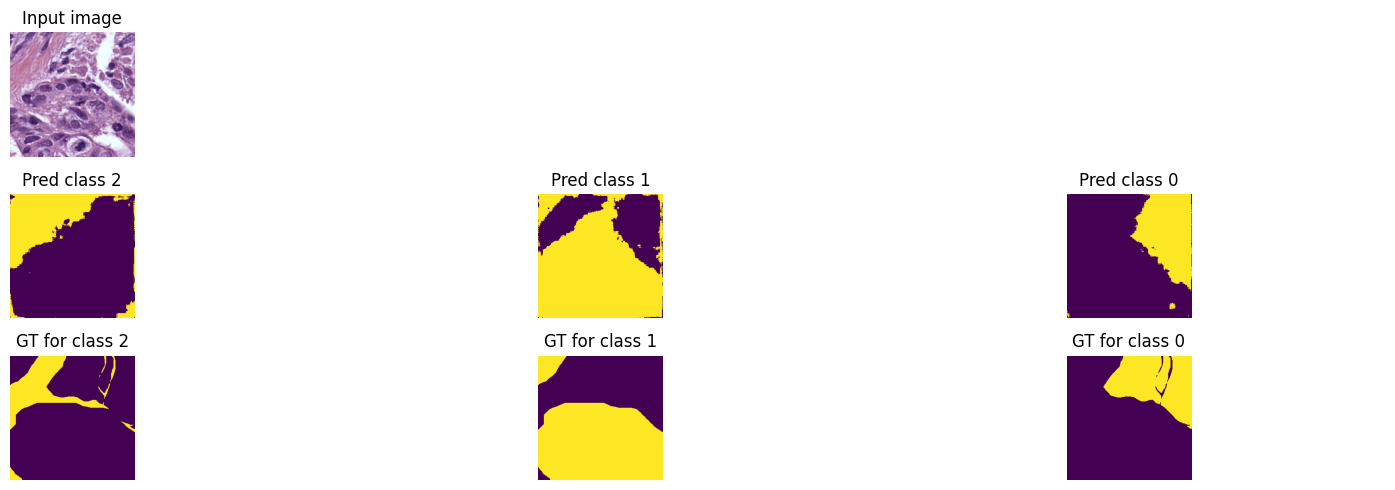

Train loss: 0.03974 | Time: 112m 26s | Val loss: 0.03671
Train_DICE_avg: 0.53067 | Train_Jaccard_avg: 0.47140 | Train_Sensitivity_avg: 0.73492 | Train_Specificity_avg: 0.77068 
Class 0 - Train_DICE: 0.53001 | Train_Jaccard: 0.48501 | Train_Sensitivity: 0.77264 | Train_Specificity: 0.82232 
Class 1 - Train_DICE: 0.62157 | Train_Jaccard: 0.55850 | Train_Sensitivity: 0.74447 | Train_Specificity: 0.73627 
Class 2 - Train_DICE: 0.44043 | Train_Jaccard: 0.37069 | Train_Sensitivity: 0.68764 | Train_Specificity: 0.75346 
Val_DICE_avg: 0.56171 | Val_Jaccard_avg: 0.50726 | Val_Sensitivity_avg: 0.76774 | Val_Specificity_avg: 0.74712 
Class 0 - Val_DICE: 0.57230 | Val_Jaccard: 0.52713 | Val_Sensitivity: 0.72637 | Val_Specificity: 0.82620 
Class 1 - Val_DICE: 0.64288 | Val_Jaccard: 0.58547 | Val_Sensitivity: 0.74437 | Val_Specificity: 0.68615 
Class 2 - Val_DICE: 0.46994 | Val_Jaccard: 0.40918 | Val_Sensitivity: 0.83247 | Val_Specificity: 0.72899 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03956 | Time: 115m 10s | Val loss: 0.03692
Train_DICE_avg: 0.53195 | Train_Jaccard_avg: 0.47238 | Train_Sensitivity_avg: 0.73470 | Train_Specificity_avg: 0.77123 
Class 0 - Train_DICE: 0.52992 | Train_Jaccard: 0.48495 | Train_Sensitivity: 0.77070 | Train_Specificity: 0.82107 
Class 1 - Train_DICE: 0.62456 | Train_Jaccard: 0.56126 | Train_Sensitivity: 0.74683 | Train_Specificity: 0.74026 
Class 2 - Train_DICE: 0.44137 | Train_Jaccard: 0.37093 | Train_Sensitivity: 0.68657 | Train_Specificity: 0.75236 
Val_DICE_avg: 0.56323 | Val_Jaccard_avg: 0.50874 | Val_Sensitivity_avg: 0.76548 | Val_Specificity_avg: 0.74779 
Class 0 - Val_DICE: 0.57686 | Val_Jaccard: 0.53146 | Val_Sensitivity: 0.72705 | Val_Specificity: 0.82616 
Class 1 - Val_DICE: 0.64586 | Val_Jaccard: 0.58884 | Val_Sensitivity: 0.74533 | Val_Specificity: 0.68775 
Class 2 - Val_DICE: 0.46696 | Val_Jaccard: 0.40593 | Val_Sensitivity: 0.82405 | Val_Specificity: 0.72946 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03898 | Time: 117m 54s | Val loss: 0.03694
Train_DICE_avg: 0.53750 | Train_Jaccard_avg: 0.47838 | Train_Sensitivity_avg: 0.73924 | Train_Specificity_avg: 0.77208 
Class 0 - Train_DICE: 0.53674 | Train_Jaccard: 0.49167 | Train_Sensitivity: 0.77473 | Train_Specificity: 0.82253 
Class 1 - Train_DICE: 0.63182 | Train_Jaccard: 0.56904 | Train_Sensitivity: 0.75414 | Train_Specificity: 0.73886 
Class 2 - Train_DICE: 0.44394 | Train_Jaccard: 0.37445 | Train_Sensitivity: 0.68884 | Train_Specificity: 0.75485 
Val_DICE_avg: 0.55994 | Val_Jaccard_avg: 0.50533 | Val_Sensitivity_avg: 0.76827 | Val_Specificity_avg: 0.74709 
Class 0 - Val_DICE: 0.57157 | Val_Jaccard: 0.52557 | Val_Sensitivity: 0.71819 | Val_Specificity: 0.82737 
Class 1 - Val_DICE: 0.64678 | Val_Jaccard: 0.58968 | Val_Sensitivity: 0.75447 | Val_Specificity: 0.68642 
Class 2 - Val_DICE: 0.46149 | Val_Jaccard: 0.40075 | Val_Sensitivity: 0.83213 | Val_Specificity: 0.72749 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03859 | Time: 120m 38s | Val loss: 0.03707
Train_DICE_avg: 0.53958 | Train_Jaccard_avg: 0.48040 | Train_Sensitivity_avg: 0.74005 | Train_Specificity_avg: 0.77190 
Class 0 - Train_DICE: 0.53607 | Train_Jaccard: 0.49070 | Train_Sensitivity: 0.77504 | Train_Specificity: 0.82199 
Class 1 - Train_DICE: 0.63589 | Train_Jaccard: 0.57347 | Train_Sensitivity: 0.75510 | Train_Specificity: 0.73854 
Class 2 - Train_DICE: 0.44679 | Train_Jaccard: 0.37704 | Train_Sensitivity: 0.69000 | Train_Specificity: 0.75516 
Val_DICE_avg: 0.56059 | Val_Jaccard_avg: 0.50579 | Val_Sensitivity_avg: 0.76473 | Val_Specificity_avg: 0.74783 
Class 0 - Val_DICE: 0.57360 | Val_Jaccard: 0.52757 | Val_Sensitivity: 0.71800 | Val_Specificity: 0.82758 
Class 1 - Val_DICE: 0.64328 | Val_Jaccard: 0.58620 | Val_Sensitivity: 0.74774 | Val_Specificity: 0.68690 
Class 2 - Val_DICE: 0.46489 | Val_Jaccard: 0.40358 | Val_Sensitivity: 0.82843 | Val_Specificity: 0.72901 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03833 | Time: 123m 22s | Val loss: 0.03713
Train_DICE_avg: 0.54040 | Train_Jaccard_avg: 0.48127 | Train_Sensitivity_avg: 0.73784 | Train_Specificity_avg: 0.77403 
Class 0 - Train_DICE: 0.53888 | Train_Jaccard: 0.49375 | Train_Sensitivity: 0.77267 | Train_Specificity: 0.82442 
Class 1 - Train_DICE: 0.63358 | Train_Jaccard: 0.57177 | Train_Sensitivity: 0.75318 | Train_Specificity: 0.74183 
Class 2 - Train_DICE: 0.44873 | Train_Jaccard: 0.37829 | Train_Sensitivity: 0.68768 | Train_Specificity: 0.75584 
Val_DICE_avg: 0.56092 | Val_Jaccard_avg: 0.50636 | Val_Sensitivity_avg: 0.76424 | Val_Specificity_avg: 0.74759 
Class 0 - Val_DICE: 0.57805 | Val_Jaccard: 0.53251 | Val_Sensitivity: 0.73286 | Val_Specificity: 0.82699 
Class 1 - Val_DICE: 0.64214 | Val_Jaccard: 0.58492 | Val_Sensitivity: 0.73715 | Val_Specificity: 0.68731 
Class 2 - Val_DICE: 0.46258 | Val_Jaccard: 0.40165 | Val_Sensitivity: 0.82269 | Val_Specificity: 0.72848 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


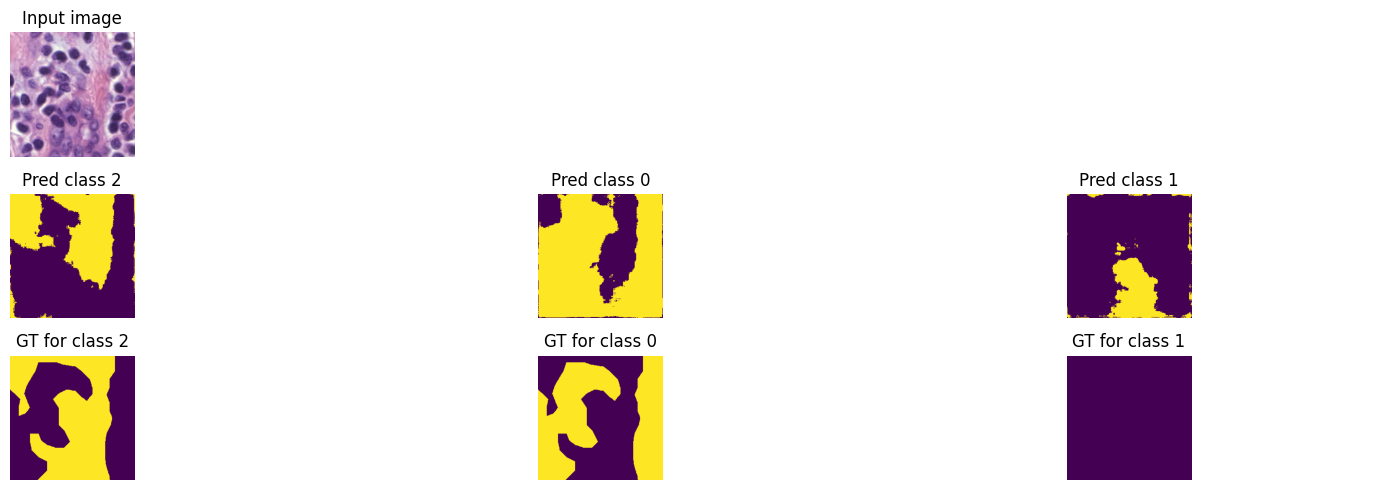

Train loss: 0.03784 | Time: 126m 7s | Val loss: 0.03747
Train_DICE_avg: 0.54317 | Train_Jaccard_avg: 0.48421 | Train_Sensitivity_avg: 0.74086 | Train_Specificity_avg: 0.77426 
Class 0 - Train_DICE: 0.53956 | Train_Jaccard: 0.49431 | Train_Sensitivity: 0.77625 | Train_Specificity: 0.82288 
Class 1 - Train_DICE: 0.63951 | Train_Jaccard: 0.57801 | Train_Sensitivity: 0.75900 | Train_Specificity: 0.74331 
Class 2 - Train_DICE: 0.45044 | Train_Jaccard: 0.38031 | Train_Sensitivity: 0.68733 | Train_Specificity: 0.75658 
Val_DICE_avg: 0.55641 | Val_Jaccard_avg: 0.50140 | Val_Sensitivity_avg: 0.76031 | Val_Specificity_avg: 0.74705 
Class 0 - Val_DICE: 0.56827 | Val_Jaccard: 0.52200 | Val_Sensitivity: 0.71227 | Val_Specificity: 0.82788 
Class 1 - Val_DICE: 0.63827 | Val_Jaccard: 0.58048 | Val_Sensitivity: 0.74251 | Val_Specificity: 0.68532 
Class 2 - Val_DICE: 0.46268 | Val_Jaccard: 0.40170 | Val_Sensitivity: 0.82615 | Val_Specificity: 0.72796 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03774 | Time: 128m 51s | Val loss: 0.03724
Train_DICE_avg: 0.54372 | Train_Jaccard_avg: 0.48434 | Train_Sensitivity_avg: 0.73987 | Train_Specificity_avg: 0.77531 
Class 0 - Train_DICE: 0.53895 | Train_Jaccard: 0.49317 | Train_Sensitivity: 0.77545 | Train_Specificity: 0.82332 
Class 1 - Train_DICE: 0.63803 | Train_Jaccard: 0.57646 | Train_Sensitivity: 0.75482 | Train_Specificity: 0.74427 
Class 2 - Train_DICE: 0.45419 | Train_Jaccard: 0.38339 | Train_Sensitivity: 0.68935 | Train_Specificity: 0.75835 
Val_DICE_avg: 0.56021 | Val_Jaccard_avg: 0.50565 | Val_Sensitivity_avg: 0.76185 | Val_Specificity_avg: 0.74841 
Class 0 - Val_DICE: 0.57784 | Val_Jaccard: 0.53265 | Val_Sensitivity: 0.73130 | Val_Specificity: 0.82702 
Class 1 - Val_DICE: 0.63556 | Val_Jaccard: 0.57841 | Val_Sensitivity: 0.73068 | Val_Specificity: 0.68834 
Class 2 - Val_DICE: 0.46724 | Val_Jaccard: 0.40589 | Val_Sensitivity: 0.82357 | Val_Specificity: 0.72988 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03750 | Time: 131m 34s | Val loss: 0.03749
Train_DICE_avg: 0.54597 | Train_Jaccard_avg: 0.48699 | Train_Sensitivity_avg: 0.74276 | Train_Specificity_avg: 0.77571 
Class 0 - Train_DICE: 0.54482 | Train_Jaccard: 0.49925 | Train_Sensitivity: 0.77912 | Train_Specificity: 0.82587 
Class 1 - Train_DICE: 0.63812 | Train_Jaccard: 0.57703 | Train_Sensitivity: 0.75721 | Train_Specificity: 0.74261 
Class 2 - Train_DICE: 0.45495 | Train_Jaccard: 0.38469 | Train_Sensitivity: 0.69194 | Train_Specificity: 0.75865 
Val_DICE_avg: 0.56034 | Val_Jaccard_avg: 0.50558 | Val_Sensitivity_avg: 0.75773 | Val_Specificity_avg: 0.74885 
Class 0 - Val_DICE: 0.57774 | Val_Jaccard: 0.53201 | Val_Sensitivity: 0.72265 | Val_Specificity: 0.82798 
Class 1 - Val_DICE: 0.63783 | Val_Jaccard: 0.58094 | Val_Sensitivity: 0.73172 | Val_Specificity: 0.68911 
Class 2 - Val_DICE: 0.46544 | Val_Jaccard: 0.40378 | Val_Sensitivity: 0.81882 | Val_Specificity: 0.72947 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03715 | Time: 134m 19s | Val loss: 0.03757
Train_DICE_avg: 0.54750 | Train_Jaccard_avg: 0.48852 | Train_Sensitivity_avg: 0.74317 | Train_Specificity_avg: 0.77639 
Class 0 - Train_DICE: 0.54657 | Train_Jaccard: 0.50131 | Train_Sensitivity: 0.78106 | Train_Specificity: 0.82494 
Class 1 - Train_DICE: 0.64308 | Train_Jaccard: 0.58185 | Train_Sensitivity: 0.76076 | Train_Specificity: 0.74568 
Class 2 - Train_DICE: 0.45285 | Train_Jaccard: 0.38240 | Train_Sensitivity: 0.68771 | Train_Specificity: 0.75854 
Val_DICE_avg: 0.56104 | Val_Jaccard_avg: 0.50610 | Val_Sensitivity_avg: 0.75521 | Val_Specificity_avg: 0.74948 
Class 0 - Val_DICE: 0.57753 | Val_Jaccard: 0.53180 | Val_Sensitivity: 0.71850 | Val_Specificity: 0.82838 
Class 1 - Val_DICE: 0.63781 | Val_Jaccard: 0.58096 | Val_Sensitivity: 0.73496 | Val_Specificity: 0.68871 
Class 2 - Val_DICE: 0.46779 | Val_Jaccard: 0.40555 | Val_Sensitivity: 0.81217 | Val_Specificity: 0.73135 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03669 | Time: 137m 3s | Val loss: 0.03773
Train_DICE_avg: 0.55223 | Train_Jaccard_avg: 0.49329 | Train_Sensitivity_avg: 0.74666 | Train_Specificity_avg: 0.77764 
Class 0 - Train_DICE: 0.55252 | Train_Jaccard: 0.50687 | Train_Sensitivity: 0.78425 | Train_Specificity: 0.82584 
Class 1 - Train_DICE: 0.64459 | Train_Jaccard: 0.58400 | Train_Sensitivity: 0.76359 | Train_Specificity: 0.74669 
Class 2 - Train_DICE: 0.45957 | Train_Jaccard: 0.38901 | Train_Sensitivity: 0.69213 | Train_Specificity: 0.76038 
Val_DICE_avg: 0.56238 | Val_Jaccard_avg: 0.50772 | Val_Sensitivity_avg: 0.76104 | Val_Specificity_avg: 0.74947 
Class 0 - Val_DICE: 0.57821 | Val_Jaccard: 0.53254 | Val_Sensitivity: 0.72627 | Val_Specificity: 0.82844 
Class 1 - Val_DICE: 0.64181 | Val_Jaccard: 0.58498 | Val_Sensitivity: 0.73591 | Val_Specificity: 0.68984 
Class 2 - Val_DICE: 0.46712 | Val_Jaccard: 0.40564 | Val_Sensitivity: 0.82094 | Val_Specificity: 0.73013 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


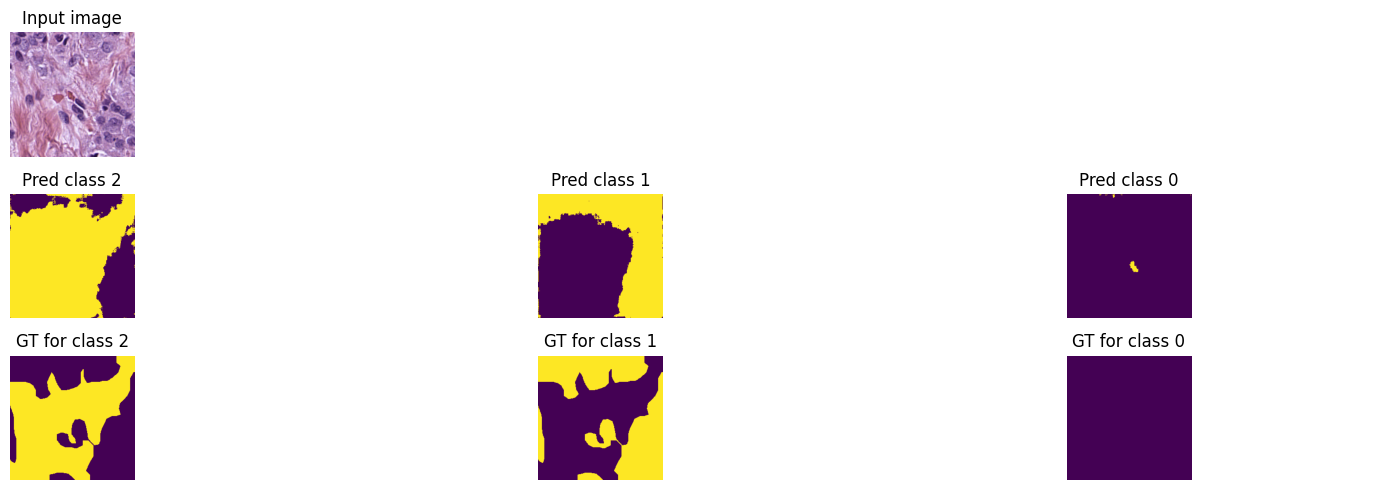

Train loss: 0.03662 | Time: 139m 47s | Val loss: 0.03758
Train_DICE_avg: 0.55258 | Train_Jaccard_avg: 0.49358 | Train_Sensitivity_avg: 0.74643 | Train_Specificity_avg: 0.77822 
Class 0 - Train_DICE: 0.55019 | Train_Jaccard: 0.50389 | Train_Sensitivity: 0.78007 | Train_Specificity: 0.82642 
Class 1 - Train_DICE: 0.64738 | Train_Jaccard: 0.58738 | Train_Sensitivity: 0.76429 | Train_Specificity: 0.74742 
Class 2 - Train_DICE: 0.46016 | Train_Jaccard: 0.38946 | Train_Sensitivity: 0.69494 | Train_Specificity: 0.76084 
Val_DICE_avg: 0.56142 | Val_Jaccard_avg: 0.50661 | Val_Sensitivity_avg: 0.76004 | Val_Specificity_avg: 0.74893 
Class 0 - Val_DICE: 0.57765 | Val_Jaccard: 0.53185 | Val_Sensitivity: 0.72567 | Val_Specificity: 0.82780 
Class 1 - Val_DICE: 0.64005 | Val_Jaccard: 0.58311 | Val_Sensitivity: 0.73721 | Val_Specificity: 0.68826 
Class 2 - Val_DICE: 0.46655 | Val_Jaccard: 0.40488 | Val_Sensitivity: 0.81725 | Val_Specificity: 0.73073 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03650 | Time: 142m 31s | Val loss: 0.03761
Train_DICE_avg: 0.55651 | Train_Jaccard_avg: 0.49762 | Train_Sensitivity_avg: 0.75008 | Train_Specificity_avg: 0.77959 
Class 0 - Train_DICE: 0.55410 | Train_Jaccard: 0.50779 | Train_Sensitivity: 0.78692 | Train_Specificity: 0.82630 
Class 1 - Train_DICE: 0.65206 | Train_Jaccard: 0.59192 | Train_Sensitivity: 0.76638 | Train_Specificity: 0.75045 
Class 2 - Train_DICE: 0.46338 | Train_Jaccard: 0.39315 | Train_Sensitivity: 0.69694 | Train_Specificity: 0.76203 
Val_DICE_avg: 0.56026 | Val_Jaccard_avg: 0.50561 | Val_Sensitivity_avg: 0.75888 | Val_Specificity_avg: 0.74885 
Class 0 - Val_DICE: 0.57612 | Val_Jaccard: 0.53057 | Val_Sensitivity: 0.72361 | Val_Specificity: 0.82773 
Class 1 - Val_DICE: 0.63842 | Val_Jaccard: 0.58162 | Val_Sensitivity: 0.73738 | Val_Specificity: 0.68857 
Class 2 - Val_DICE: 0.46625 | Val_Jaccard: 0.40464 | Val_Sensitivity: 0.81566 | Val_Specificity: 0.73024 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03616 | Time: 145m 15s | Val loss: 0.03777
Train_DICE_avg: 0.55597 | Train_Jaccard_avg: 0.49717 | Train_Sensitivity_avg: 0.75031 | Train_Specificity_avg: 0.77949 
Class 0 - Train_DICE: 0.55407 | Train_Jaccard: 0.50784 | Train_Sensitivity: 0.78391 | Train_Specificity: 0.82741 
Class 1 - Train_DICE: 0.65272 | Train_Jaccard: 0.59297 | Train_Sensitivity: 0.77289 | Train_Specificity: 0.74950 
Class 2 - Train_DICE: 0.46113 | Train_Jaccard: 0.39070 | Train_Sensitivity: 0.69412 | Train_Specificity: 0.76156 
Val_DICE_avg: 0.55883 | Val_Jaccard_avg: 0.50402 | Val_Sensitivity_avg: 0.75235 | Val_Specificity_avg: 0.74959 
Class 0 - Val_DICE: 0.57088 | Val_Jaccard: 0.52503 | Val_Sensitivity: 0.71349 | Val_Specificity: 0.82891 
Class 1 - Val_DICE: 0.63817 | Val_Jaccard: 0.58146 | Val_Sensitivity: 0.73515 | Val_Specificity: 0.68870 
Class 2 - Val_DICE: 0.46745 | Val_Jaccard: 0.40557 | Val_Sensitivity: 0.80840 | Val_Specificity: 0.73116 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03604 | Time: 147m 59s | Val loss: 0.03758
Train_DICE_avg: 0.55651 | Train_Jaccard_avg: 0.49762 | Train_Sensitivity_avg: 0.74824 | Train_Specificity_avg: 0.77918 
Class 0 - Train_DICE: 0.54911 | Train_Jaccard: 0.50355 | Train_Sensitivity: 0.78214 | Train_Specificity: 0.82619 
Class 1 - Train_DICE: 0.65288 | Train_Jaccard: 0.59285 | Train_Sensitivity: 0.76914 | Train_Specificity: 0.74931 
Class 2 - Train_DICE: 0.46753 | Train_Jaccard: 0.39646 | Train_Sensitivity: 0.69345 | Train_Specificity: 0.76203 
Val_DICE_avg: 0.56131 | Val_Jaccard_avg: 0.50611 | Val_Sensitivity_avg: 0.75655 | Val_Specificity_avg: 0.74935 
Class 0 - Val_DICE: 0.57006 | Val_Jaccard: 0.52387 | Val_Sensitivity: 0.71109 | Val_Specificity: 0.82900 
Class 1 - Val_DICE: 0.64350 | Val_Jaccard: 0.58657 | Val_Sensitivity: 0.74987 | Val_Specificity: 0.68712 
Class 2 - Val_DICE: 0.47037 | Val_Jaccard: 0.40788 | Val_Sensitivity: 0.80870 | Val_Specificity: 0.73192 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03587 | Time: 150m 43s | Val loss: 0.03731
Train_DICE_avg: 0.55787 | Train_Jaccard_avg: 0.49909 | Train_Sensitivity_avg: 0.74732 | Train_Specificity_avg: 0.77925 
Class 0 - Train_DICE: 0.55464 | Train_Jaccard: 0.50819 | Train_Sensitivity: 0.78195 | Train_Specificity: 0.82748 
Class 1 - Train_DICE: 0.65385 | Train_Jaccard: 0.59443 | Train_Sensitivity: 0.76871 | Train_Specificity: 0.74648 
Class 2 - Train_DICE: 0.46513 | Train_Jaccard: 0.39463 | Train_Sensitivity: 0.69131 | Train_Specificity: 0.76379 
Val_DICE_avg: 0.56442 | Val_Jaccard_avg: 0.50899 | Val_Sensitivity_avg: 0.76437 | Val_Specificity_avg: 0.74852 
Class 0 - Val_DICE: 0.57346 | Val_Jaccard: 0.52736 | Val_Sensitivity: 0.72142 | Val_Specificity: 0.82806 
Class 1 - Val_DICE: 0.64783 | Val_Jaccard: 0.59080 | Val_Sensitivity: 0.76707 | Val_Specificity: 0.68438 
Class 2 - Val_DICE: 0.47198 | Val_Jaccard: 0.40880 | Val_Sensitivity: 0.80462 | Val_Specificity: 0.73311 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


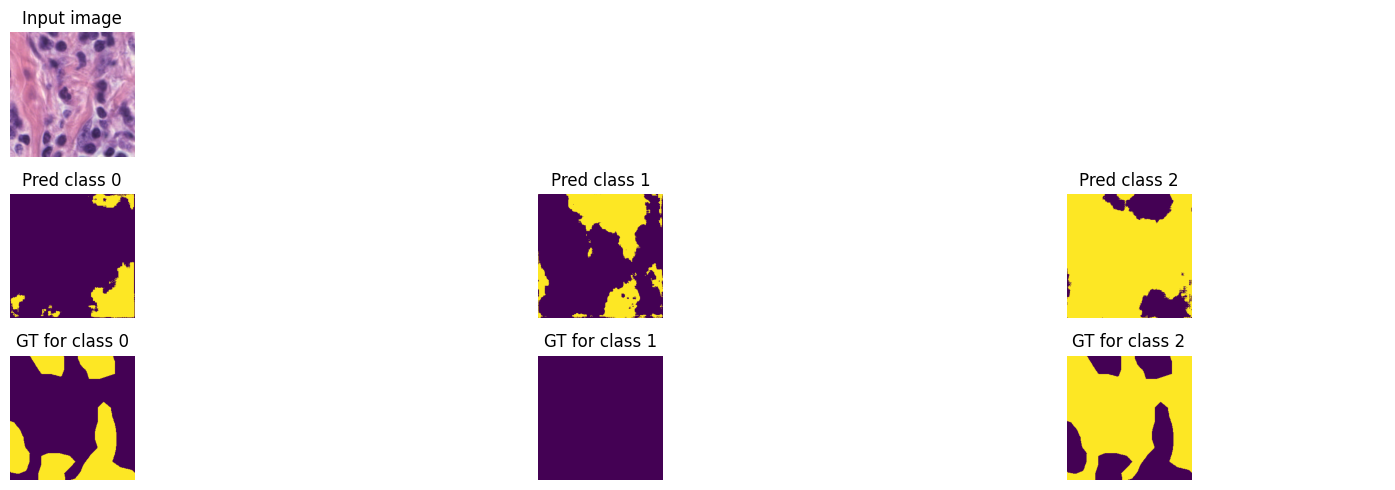

Train loss: 0.03549 | Time: 153m 27s | Val loss: 0.03767
Train_DICE_avg: 0.56082 | Train_Jaccard_avg: 0.50225 | Train_Sensitivity_avg: 0.75206 | Train_Specificity_avg: 0.77999 
Class 0 - Train_DICE: 0.55955 | Train_Jaccard: 0.51332 | Train_Sensitivity: 0.78898 | Train_Specificity: 0.82741 
Class 1 - Train_DICE: 0.65474 | Train_Jaccard: 0.59543 | Train_Sensitivity: 0.77091 | Train_Specificity: 0.74904 
Class 2 - Train_DICE: 0.46818 | Train_Jaccard: 0.39800 | Train_Sensitivity: 0.69627 | Train_Specificity: 0.76352 
Val_DICE_avg: 0.56116 | Val_Jaccard_avg: 0.50634 | Val_Sensitivity_avg: 0.75834 | Val_Specificity_avg: 0.74948 
Class 0 - Val_DICE: 0.57244 | Val_Jaccard: 0.52653 | Val_Sensitivity: 0.71722 | Val_Specificity: 0.82850 
Class 1 - Val_DICE: 0.64143 | Val_Jaccard: 0.58456 | Val_Sensitivity: 0.74348 | Val_Specificity: 0.68812 
Class 2 - Val_DICE: 0.46961 | Val_Jaccard: 0.40792 | Val_Sensitivity: 0.81432 | Val_Specificity: 0.73182 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03556 | Time: 156m 11s | Val loss: 0.03779
Train_DICE_avg: 0.56287 | Train_Jaccard_avg: 0.50435 | Train_Sensitivity_avg: 0.75267 | Train_Specificity_avg: 0.78164 
Class 0 - Train_DICE: 0.55780 | Train_Jaccard: 0.51148 | Train_Sensitivity: 0.78314 | Train_Specificity: 0.82845 
Class 1 - Train_DICE: 0.66082 | Train_Jaccard: 0.60187 | Train_Sensitivity: 0.77706 | Train_Specificity: 0.75215 
Class 2 - Train_DICE: 0.46999 | Train_Jaccard: 0.39970 | Train_Sensitivity: 0.69783 | Train_Specificity: 0.76433 
Val_DICE_avg: 0.56246 | Val_Jaccard_avg: 0.50710 | Val_Sensitivity_avg: 0.75675 | Val_Specificity_avg: 0.74996 
Class 0 - Val_DICE: 0.57051 | Val_Jaccard: 0.52390 | Val_Sensitivity: 0.70966 | Val_Specificity: 0.83000 
Class 1 - Val_DICE: 0.64515 | Val_Jaccard: 0.58838 | Val_Sensitivity: 0.75460 | Val_Specificity: 0.68725 
Class 2 - Val_DICE: 0.47171 | Val_Jaccard: 0.40901 | Val_Sensitivity: 0.80599 | Val_Specificity: 0.73265 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03520 | Time: 158m 55s | Val loss: 0.03779
Train_DICE_avg: 0.56386 | Train_Jaccard_avg: 0.50542 | Train_Sensitivity_avg: 0.75384 | Train_Specificity_avg: 0.78100 
Class 0 - Train_DICE: 0.56106 | Train_Jaccard: 0.51496 | Train_Sensitivity: 0.78995 | Train_Specificity: 0.82752 
Class 1 - Train_DICE: 0.66073 | Train_Jaccard: 0.60185 | Train_Sensitivity: 0.77338 | Train_Specificity: 0.75126 
Class 2 - Train_DICE: 0.46977 | Train_Jaccard: 0.39945 | Train_Sensitivity: 0.69818 | Train_Specificity: 0.76422 
Val_DICE_avg: 0.56186 | Val_Jaccard_avg: 0.50652 | Val_Sensitivity_avg: 0.75510 | Val_Specificity_avg: 0.75002 
Class 0 - Val_DICE: 0.57737 | Val_Jaccard: 0.53078 | Val_Sensitivity: 0.71518 | Val_Specificity: 0.82980 
Class 1 - Val_DICE: 0.63744 | Val_Jaccard: 0.58078 | Val_Sensitivity: 0.74282 | Val_Specificity: 0.68771 
Class 2 - Val_DICE: 0.47078 | Val_Jaccard: 0.40798 | Val_Sensitivity: 0.80731 | Val_Specificity: 0.73256 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.03531 | Time: 161m 39s | Val loss: 0.03769
Train_DICE_avg: 0.56280 | Train_Jaccard_avg: 0.50416 | Train_Sensitivity_avg: 0.75181 | Train_Specificity_avg: 0.78240 
Class 0 - Train_DICE: 0.56174 | Train_Jaccard: 0.51531 | Train_Sensitivity: 0.79112 | Train_Specificity: 0.82873 
Class 1 - Train_DICE: 0.65594 | Train_Jaccard: 0.59674 | Train_Sensitivity: 0.77092 | Train_Specificity: 0.75275 
Class 2 - Train_DICE: 0.47072 | Train_Jaccard: 0.40043 | Train_Sensitivity: 0.69339 | Train_Specificity: 0.76571 
Val_DICE_avg: 0.56120 | Val_Jaccard_avg: 0.50588 | Val_Sensitivity_avg: 0.75581 | Val_Specificity_avg: 0.74973 
Class 0 - Val_DICE: 0.57195 | Val_Jaccard: 0.52535 | Val_Sensitivity: 0.71059 | Val_Specificity: 0.82930 
Class 1 - Val_DICE: 0.64159 | Val_Jaccard: 0.58472 | Val_Sensitivity: 0.74892 | Val_Specificity: 0.68720 
Class 2 - Val_DICE: 0.47005 | Val_Jaccard: 0.40756 | Val_Sensitivity: 0.80793 | Val_Specificity: 0.73268 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.03510 | Time: 164m 23s | Val loss: 0.03772
Train_DICE_avg: 0.56204 | Train_Jaccard_avg: 0.50354 | Train_Sensitivity_avg: 0.75156 | Train_Specificity_avg: 0.78201 
Class 0 - Train_DICE: 0.55799 | Train_Jaccard: 0.51119 | Train_Sensitivity: 0.78427 | Train_Specificity: 0.82810 
Class 1 - Train_DICE: 0.66012 | Train_Jaccard: 0.60106 | Train_Sensitivity: 0.77359 | Train_Specificity: 0.75301 
Class 2 - Train_DICE: 0.46800 | Train_Jaccard: 0.39837 | Train_Sensitivity: 0.69682 | Train_Specificity: 0.76491 
Val_DICE_avg: 0.56321 | Val_Jaccard_avg: 0.50778 | Val_Sensitivity_avg: 0.75714 | Val_Specificity_avg: 0.74960 
Class 0 - Val_DICE: 0.56937 | Val_Jaccard: 0.52296 | Val_Sensitivity: 0.70770 | Val_Specificity: 0.82957 
Class 1 - Val_DICE: 0.65043 | Val_Jaccard: 0.59338 | Val_Sensitivity: 0.75896 | Val_Specificity: 0.68627 
Class 2 - Val_DICE: 0.46981 | Val_Jaccard: 0.40700 | Val_Sensitivity: 0.80476 | Val_Specificity: 0.73295 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


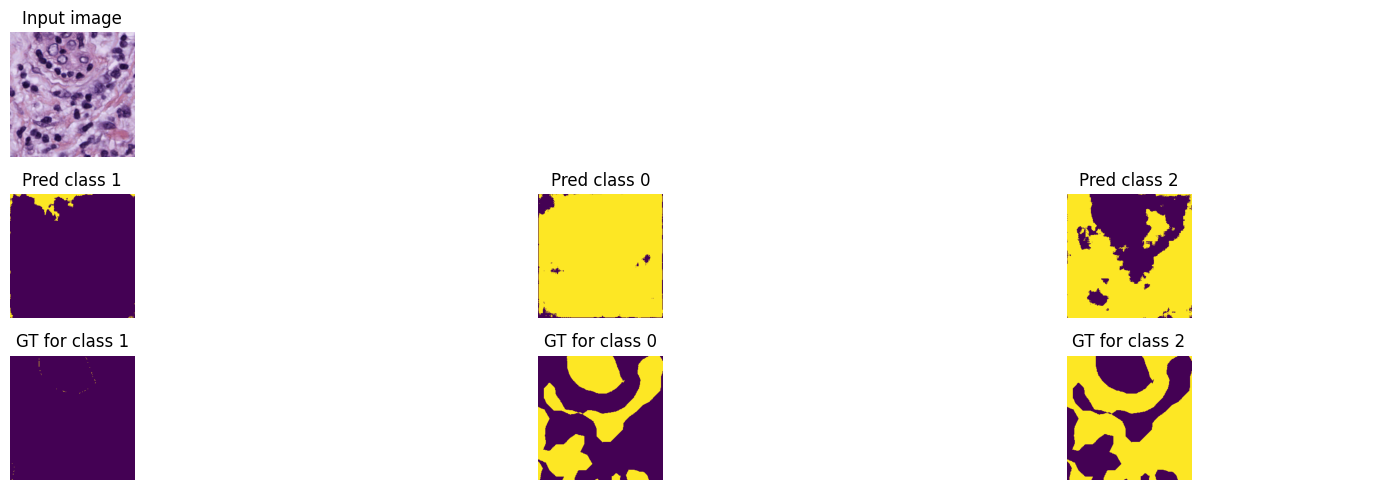

Train loss: 0.03497 | Time: 167m 8s | Val loss: 0.03773
Train_DICE_avg: 0.56610 | Train_Jaccard_avg: 0.50755 | Train_Sensitivity_avg: 0.75403 | Train_Specificity_avg: 0.78285 
Class 0 - Train_DICE: 0.56072 | Train_Jaccard: 0.51405 | Train_Sensitivity: 0.78601 | Train_Specificity: 0.83028 
Class 1 - Train_DICE: 0.66307 | Train_Jaccard: 0.60490 | Train_Sensitivity: 0.77728 | Train_Specificity: 0.75281 
Class 2 - Train_DICE: 0.47452 | Train_Jaccard: 0.40368 | Train_Sensitivity: 0.69879 | Train_Specificity: 0.76546 
Val_DICE_avg: 0.56310 | Val_Jaccard_avg: 0.50783 | Val_Sensitivity_avg: 0.76243 | Val_Specificity_avg: 0.74934 
Class 0 - Val_DICE: 0.57114 | Val_Jaccard: 0.52476 | Val_Sensitivity: 0.71019 | Val_Specificity: 0.82968 
Class 1 - Val_DICE: 0.64741 | Val_Jaccard: 0.59034 | Val_Sensitivity: 0.76443 | Val_Specificity: 0.68578 
Class 2 - Val_DICE: 0.47077 | Val_Jaccard: 0.40840 | Val_Sensitivity: 0.81267 | Val_Specificity: 0.73254 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]



Global Performance Metrics:
Loss mean: 0.03876, std: 0.00914
Dice Coefficient mean: 0.46824, std: 0.13855
Jaccard Index mean: 0.40602, std: 0.12610
Sensitivity mean: 0.81057, std: 0.17712
Specificity mean: 0.74362, std: 0.14842

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.41006, std: 0.39505
Jaccard mean: 0.35372, std: 0.37105
Sensitivity mean: 0.84195, std: 0.28794
Specificity mean: 0.73545, std: 0.32150

Class 1:
Dice mean: 0.54702, std: 0.41748
Jaccard mean: 0.49129, std: 0.40233
Sensitivity mean: 0.87713, std: 0.25572
Specificity mean: 0.73602, std: 0.34599

Class 2:
Dice mean: 0.44764, std: 0.37632
Jaccard mean: 0.37304, std: 0.34991
Sensitivity mean: 0.71264, std: 0.35290
Specificity mean: 0.75940, std: 0.29930


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-FCN-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 4.26 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


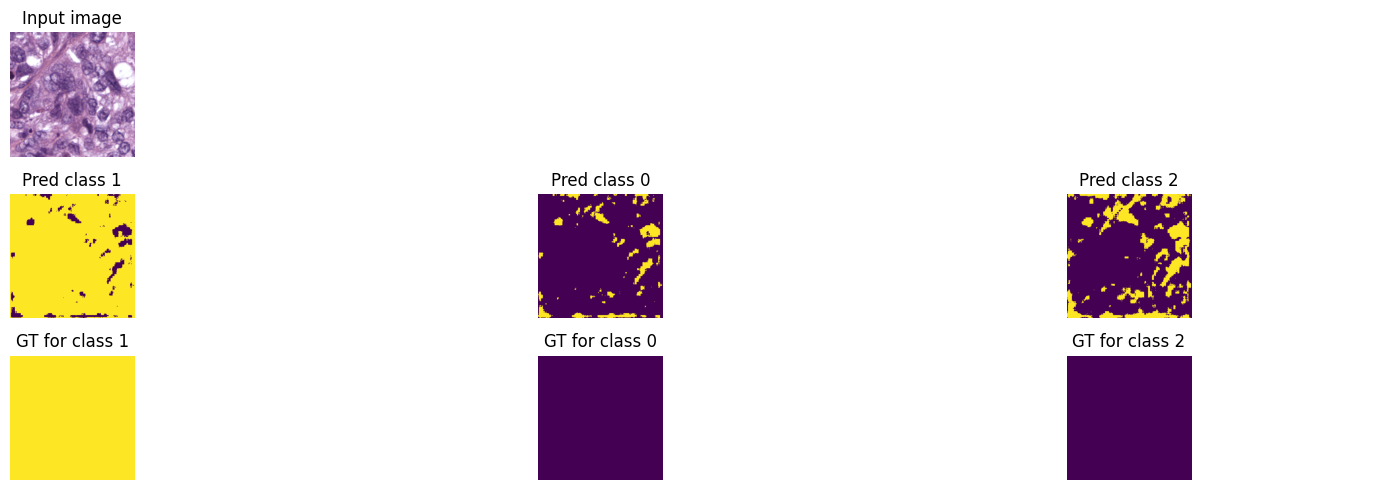

Train loss: 0.68809 | Time: 2m 40s | Val loss: 0.64362
Train_DICE_avg: 0.31002 | Train_Jaccard_avg: 0.24616 | Train_Sensitivity_avg: 0.34158 | Train_Specificity_avg: 0.72310 
Class 0 - Train_DICE: 0.11842 | Train_Jaccard: 0.08242 | Train_Sensitivity: 0.24635 | Train_Specificity: 0.77370 
Class 1 - Train_DICE: 0.46036 | Train_Jaccard: 0.39170 | Train_Sensitivity: 0.41998 | Train_Specificity: 0.68537 
Class 2 - Train_DICE: 0.35127 | Train_Jaccard: 0.26437 | Train_Sensitivity: 0.35842 | Train_Specificity: 0.71024 
Val_DICE_avg: 0.38454 | Val_Jaccard_avg: 0.31140 | Val_Sensitivity_avg: 0.37375 | Val_Specificity_avg: 0.72577 
Class 0 - Val_DICE: 0.24208 | Val_Jaccard: 0.17796 | Val_Sensitivity: 0.24678 | Val_Specificity: 0.76568 
Class 1 - Val_DICE: 0.48525 | Val_Jaccard: 0.41429 | Val_Sensitivity: 0.48984 | Val_Specificity: 0.65915 
Class 2 - Val_DICE: 0.42631 | Val_Jaccard: 0.34195 | Val_Sensitivity: 0.38465 | Val_Specificity: 0.75248 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.64345 | Time: 5m 21s | Val loss: 0.62102
Train_DICE_avg: 0.37962 | Train_Jaccard_avg: 0.30400 | Train_Sensitivity_avg: 0.37461 | Train_Specificity_avg: 0.74754 
Class 0 - Train_DICE: 0.25227 | Train_Jaccard: 0.18819 | Train_Sensitivity: 0.25954 | Train_Specificity: 0.79116 
Class 1 - Train_DICE: 0.46885 | Train_Jaccard: 0.39289 | Train_Sensitivity: 0.46300 | Train_Specificity: 0.68997 
Class 2 - Train_DICE: 0.41774 | Train_Jaccard: 0.33092 | Train_Sensitivity: 0.40128 | Train_Specificity: 0.76150 
Val_DICE_avg: 0.40267 | Val_Jaccard_avg: 0.33198 | Val_Sensitivity_avg: 0.39005 | Val_Specificity_avg: 0.73490 
Class 0 - Val_DICE: 0.27294 | Val_Jaccard: 0.21138 | Val_Sensitivity: 0.26000 | Val_Specificity: 0.78125 
Class 1 - Val_DICE: 0.50437 | Val_Jaccard: 0.43656 | Val_Sensitivity: 0.50915 | Val_Specificity: 0.67710 
Class 2 - Val_DICE: 0.43069 | Val_Jaccard: 0.34799 | Val_Sensitivity: 0.40098 | Val_Specificity: 0.74634 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.63078 | Time: 8m 1s | Val loss: 0.61185
Train_DICE_avg: 0.38829 | Train_Jaccard_avg: 0.31301 | Train_Sensitivity_avg: 0.38124 | Train_Specificity_avg: 0.75288 
Class 0 - Train_DICE: 0.27026 | Train_Jaccard: 0.20704 | Train_Sensitivity: 0.26397 | Train_Specificity: 0.80162 
Class 1 - Train_DICE: 0.47108 | Train_Jaccard: 0.39434 | Train_Sensitivity: 0.47230 | Train_Specificity: 0.69011 
Class 2 - Train_DICE: 0.42352 | Train_Jaccard: 0.33765 | Train_Sensitivity: 0.40745 | Train_Specificity: 0.76693 
Val_DICE_avg: 0.40885 | Val_Jaccard_avg: 0.33848 | Val_Sensitivity_avg: 0.39435 | Val_Specificity_avg: 0.73887 
Class 0 - Val_DICE: 0.28079 | Val_Jaccard: 0.21980 | Val_Sensitivity: 0.26114 | Val_Specificity: 0.78399 
Class 1 - Val_DICE: 0.51002 | Val_Jaccard: 0.44211 | Val_Sensitivity: 0.51742 | Val_Specificity: 0.68126 
Class 2 - Val_DICE: 0.43575 | Val_Jaccard: 0.35351 | Val_Sensitivity: 0.40451 | Val_Specificity: 0.75135 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.62390 | Time: 10m 41s | Val loss: 0.60625
Train_DICE_avg: 0.39332 | Train_Jaccard_avg: 0.31818 | Train_Sensitivity_avg: 0.38429 | Train_Specificity_avg: 0.75831 
Class 0 - Train_DICE: 0.27729 | Train_Jaccard: 0.21480 | Train_Sensitivity: 0.26481 | Train_Specificity: 0.80931 
Class 1 - Train_DICE: 0.47388 | Train_Jaccard: 0.39629 | Train_Sensitivity: 0.47863 | Train_Specificity: 0.69174 
Class 2 - Train_DICE: 0.42880 | Train_Jaccard: 0.34346 | Train_Sensitivity: 0.40944 | Train_Specificity: 0.77388 
Val_DICE_avg: 0.41243 | Val_Jaccard_avg: 0.34244 | Val_Sensitivity_avg: 0.39788 | Val_Specificity_avg: 0.74144 
Class 0 - Val_DICE: 0.28474 | Val_Jaccard: 0.22419 | Val_Sensitivity: 0.26277 | Val_Specificity: 0.78501 
Class 1 - Val_DICE: 0.51403 | Val_Jaccard: 0.44645 | Val_Sensitivity: 0.52309 | Val_Specificity: 0.68425 
Class 2 - Val_DICE: 0.43852 | Val_Jaccard: 0.35670 | Val_Sensitivity: 0.40779 | Val_Specificity: 0.75505 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.61968 | Time: 13m 21s | Val loss: 0.60219
Train_DICE_avg: 0.39623 | Train_Jaccard_avg: 0.32155 | Train_Sensitivity_avg: 0.38574 | Train_Specificity_avg: 0.76095 
Class 0 - Train_DICE: 0.28107 | Train_Jaccard: 0.21913 | Train_Sensitivity: 0.26411 | Train_Specificity: 0.81228 
Class 1 - Train_DICE: 0.47489 | Train_Jaccard: 0.39749 | Train_Sensitivity: 0.48272 | Train_Specificity: 0.69128 
Class 2 - Train_DICE: 0.43272 | Train_Jaccard: 0.34803 | Train_Sensitivity: 0.41040 | Train_Specificity: 0.77929 
Val_DICE_avg: 0.41523 | Val_Jaccard_avg: 0.34539 | Val_Sensitivity_avg: 0.40008 | Val_Specificity_avg: 0.74374 
Class 0 - Val_DICE: 0.28752 | Val_Jaccard: 0.22733 | Val_Sensitivity: 0.26199 | Val_Specificity: 0.78637 
Class 1 - Val_DICE: 0.51645 | Val_Jaccard: 0.44877 | Val_Sensitivity: 0.52879 | Val_Specificity: 0.68582 
Class 2 - Val_DICE: 0.44173 | Val_Jaccard: 0.36007 | Val_Sensitivity: 0.40944 | Val_Specificity: 0.75901 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


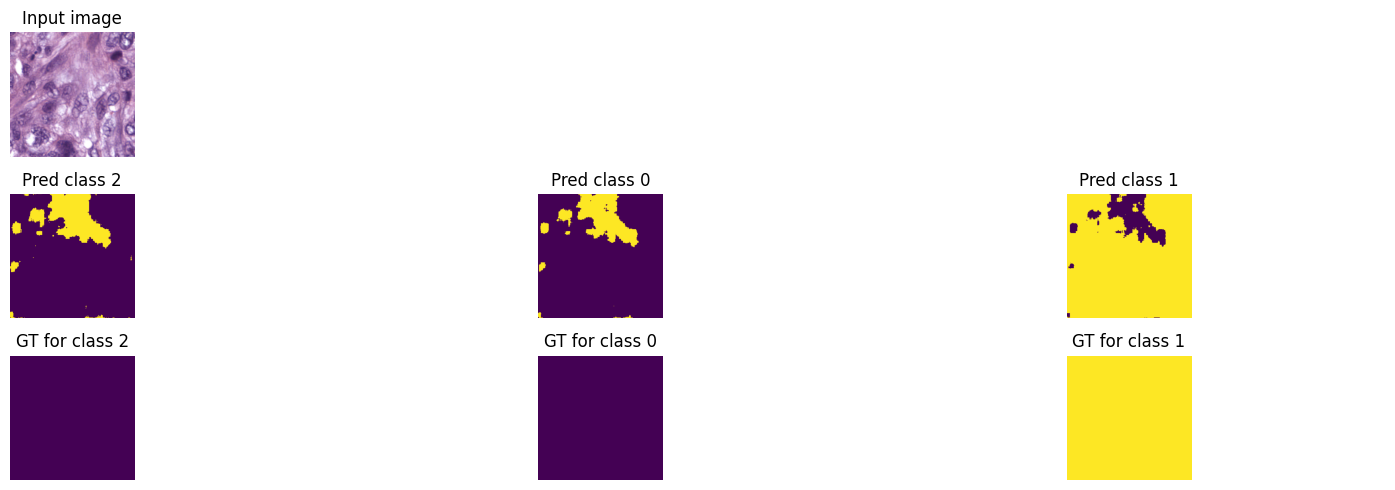

Train loss: 0.61687 | Time: 16m 2s | Val loss: 0.59965
Train_DICE_avg: 0.39819 | Train_Jaccard_avg: 0.32356 | Train_Sensitivity_avg: 0.38709 | Train_Specificity_avg: 0.76348 
Class 0 - Train_DICE: 0.28404 | Train_Jaccard: 0.22223 | Train_Sensitivity: 0.26445 | Train_Specificity: 0.81546 
Class 1 - Train_DICE: 0.47519 | Train_Jaccard: 0.39743 | Train_Sensitivity: 0.48622 | Train_Specificity: 0.69187 
Class 2 - Train_DICE: 0.43535 | Train_Jaccard: 0.35101 | Train_Sensitivity: 0.41059 | Train_Specificity: 0.78312 
Val_DICE_avg: 0.41683 | Val_Jaccard_avg: 0.34733 | Val_Sensitivity_avg: 0.40120 | Val_Specificity_avg: 0.74532 
Class 0 - Val_DICE: 0.28812 | Val_Jaccard: 0.22805 | Val_Sensitivity: 0.26290 | Val_Specificity: 0.78719 
Class 1 - Val_DICE: 0.52025 | Val_Jaccard: 0.45340 | Val_Sensitivity: 0.52831 | Val_Specificity: 0.69036 
Class 2 - Val_DICE: 0.44211 | Val_Jaccard: 0.36052 | Val_Sensitivity: 0.41239 | Val_Specificity: 0.75841 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.61478 | Time: 18m 41s | Val loss: 0.59708
Train_DICE_avg: 0.39952 | Train_Jaccard_avg: 0.32491 | Train_Sensitivity_avg: 0.38819 | Train_Specificity_avg: 0.76395 
Class 0 - Train_DICE: 0.28536 | Train_Jaccard: 0.22371 | Train_Sensitivity: 0.26460 | Train_Specificity: 0.81551 
Class 1 - Train_DICE: 0.47677 | Train_Jaccard: 0.39871 | Train_Sensitivity: 0.48953 | Train_Specificity: 0.69224 
Class 2 - Train_DICE: 0.43642 | Train_Jaccard: 0.35232 | Train_Sensitivity: 0.41043 | Train_Specificity: 0.78409 
Val_DICE_avg: 0.41893 | Val_Jaccard_avg: 0.34927 | Val_Sensitivity_avg: 0.40271 | Val_Specificity_avg: 0.74670 
Class 0 - Val_DICE: 0.29230 | Val_Jaccard: 0.23273 | Val_Sensitivity: 0.26164 | Val_Specificity: 0.78915 
Class 1 - Val_DICE: 0.51886 | Val_Jaccard: 0.45053 | Val_Sensitivity: 0.53695 | Val_Specificity: 0.68557 
Class 2 - Val_DICE: 0.44563 | Val_Jaccard: 0.36455 | Val_Sensitivity: 0.40953 | Val_Specificity: 0.76537 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.61301 | Time: 21m 22s | Val loss: 0.59549
Train_DICE_avg: 0.40108 | Train_Jaccard_avg: 0.32668 | Train_Sensitivity_avg: 0.38866 | Train_Specificity_avg: 0.76666 
Class 0 - Train_DICE: 0.28769 | Train_Jaccard: 0.22620 | Train_Sensitivity: 0.26485 | Train_Specificity: 0.81841 
Class 1 - Train_DICE: 0.47732 | Train_Jaccard: 0.39964 | Train_Sensitivity: 0.48963 | Train_Specificity: 0.69389 
Class 2 - Train_DICE: 0.43824 | Train_Jaccard: 0.35419 | Train_Sensitivity: 0.41150 | Train_Specificity: 0.78767 
Val_DICE_avg: 0.42017 | Val_Jaccard_avg: 0.35093 | Val_Sensitivity_avg: 0.40340 | Val_Specificity_avg: 0.74796 
Class 0 - Val_DICE: 0.29226 | Val_Jaccard: 0.23269 | Val_Sensitivity: 0.26245 | Val_Specificity: 0.78810 
Class 1 - Val_DICE: 0.52213 | Val_Jaccard: 0.45499 | Val_Sensitivity: 0.53576 | Val_Specificity: 0.68948 
Class 2 - Val_DICE: 0.44612 | Val_Jaccard: 0.36512 | Val_Sensitivity: 0.41199 | Val_Specificity: 0.76630 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.61175 | Time: 24m 1s | Val loss: 0.59396
Train_DICE_avg: 0.40203 | Train_Jaccard_avg: 0.32767 | Train_Sensitivity_avg: 0.38929 | Train_Specificity_avg: 0.76704 
Class 0 - Train_DICE: 0.28840 | Train_Jaccard: 0.22692 | Train_Sensitivity: 0.26487 | Train_Specificity: 0.81976 
Class 1 - Train_DICE: 0.47835 | Train_Jaccard: 0.40059 | Train_Sensitivity: 0.49121 | Train_Specificity: 0.69448 
Class 2 - Train_DICE: 0.43933 | Train_Jaccard: 0.35549 | Train_Sensitivity: 0.41180 | Train_Specificity: 0.78687 
Val_DICE_avg: 0.42149 | Val_Jaccard_avg: 0.35248 | Val_Sensitivity_avg: 0.40405 | Val_Specificity_avg: 0.74950 
Class 0 - Val_DICE: 0.29357 | Val_Jaccard: 0.23428 | Val_Sensitivity: 0.26216 | Val_Specificity: 0.78894 
Class 1 - Val_DICE: 0.52289 | Val_Jaccard: 0.45586 | Val_Sensitivity: 0.53815 | Val_Specificity: 0.68995 
Class 2 - Val_DICE: 0.44801 | Val_Jaccard: 0.36728 | Val_Sensitivity: 0.41184 | Val_Specificity: 0.76960 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.61060 | Time: 26m 41s | Val loss: 0.59308
Train_DICE_avg: 0.40305 | Train_Jaccard_avg: 0.32884 | Train_Sensitivity_avg: 0.38938 | Train_Specificity_avg: 0.76881 
Class 0 - Train_DICE: 0.28981 | Train_Jaccard: 0.22854 | Train_Sensitivity: 0.26478 | Train_Specificity: 0.82062 
Class 1 - Train_DICE: 0.47948 | Train_Jaccard: 0.40175 | Train_Sensitivity: 0.49173 | Train_Specificity: 0.69536 
Class 2 - Train_DICE: 0.43985 | Train_Jaccard: 0.35623 | Train_Sensitivity: 0.41162 | Train_Specificity: 0.79044 
Val_DICE_avg: 0.42213 | Val_Jaccard_avg: 0.35335 | Val_Sensitivity_avg: 0.40411 | Val_Specificity_avg: 0.75106 
Class 0 - Val_DICE: 0.29323 | Val_Jaccard: 0.23393 | Val_Sensitivity: 0.26243 | Val_Specificity: 0.78817 
Class 1 - Val_DICE: 0.52503 | Val_Jaccard: 0.45873 | Val_Sensitivity: 0.53663 | Val_Specificity: 0.69243 
Class 2 - Val_DICE: 0.44813 | Val_Jaccard: 0.36740 | Val_Sensitivity: 0.41326 | Val_Specificity: 0.77257 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


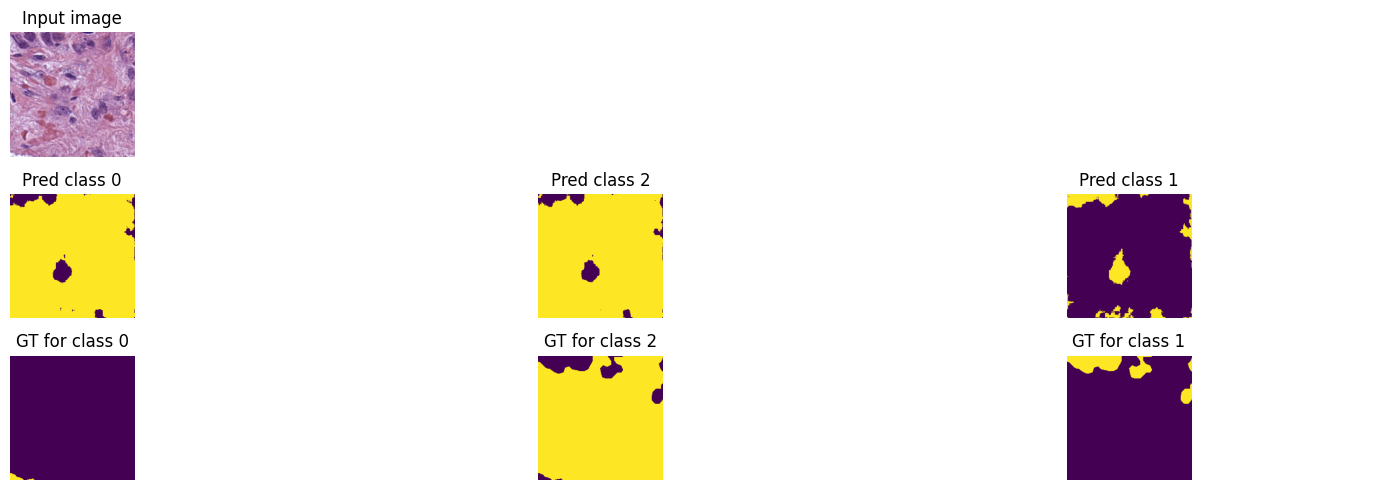

Train loss: 0.60978 | Time: 29m 25s | Val loss: 0.59120
Train_DICE_avg: 0.40391 | Train_Jaccard_avg: 0.32998 | Train_Sensitivity_avg: 0.38974 | Train_Specificity_avg: 0.77227 
Class 0 - Train_DICE: 0.28982 | Train_Jaccard: 0.22872 | Train_Sensitivity: 0.26432 | Train_Specificity: 0.82158 
Class 1 - Train_DICE: 0.47991 | Train_Jaccard: 0.40249 | Train_Sensitivity: 0.49236 | Train_Specificity: 0.69782 
Class 2 - Train_DICE: 0.44199 | Train_Jaccard: 0.35874 | Train_Sensitivity: 0.41253 | Train_Specificity: 0.79740 
Val_DICE_avg: 0.42369 | Val_Jaccard_avg: 0.35521 | Val_Sensitivity_avg: 0.40522 | Val_Specificity_avg: 0.75415 
Class 0 - Val_DICE: 0.29515 | Val_Jaccard: 0.23613 | Val_Sensitivity: 0.26261 | Val_Specificity: 0.79157 
Class 1 - Val_DICE: 0.52649 | Val_Jaccard: 0.46052 | Val_Sensitivity: 0.53929 | Val_Specificity: 0.69525 
Class 2 - Val_DICE: 0.44944 | Val_Jaccard: 0.36899 | Val_Sensitivity: 0.41376 | Val_Specificity: 0.77564 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60864 | Time: 32m 8s | Val loss: 0.59042
Train_DICE_avg: 0.40478 | Train_Jaccard_avg: 0.33088 | Train_Sensitivity_avg: 0.39011 | Train_Specificity_avg: 0.77303 
Class 0 - Train_DICE: 0.29159 | Train_Jaccard: 0.23042 | Train_Sensitivity: 0.26514 | Train_Specificity: 0.82434 
Class 1 - Train_DICE: 0.48103 | Train_Jaccard: 0.40400 | Train_Sensitivity: 0.49277 | Train_Specificity: 0.69846 
Class 2 - Train_DICE: 0.44172 | Train_Jaccard: 0.35821 | Train_Sensitivity: 0.41241 | Train_Specificity: 0.79631 
Val_DICE_avg: 0.42441 | Val_Jaccard_avg: 0.35632 | Val_Sensitivity_avg: 0.40506 | Val_Specificity_avg: 0.75500 
Class 0 - Val_DICE: 0.29498 | Val_Jaccard: 0.23595 | Val_Sensitivity: 0.26356 | Val_Specificity: 0.79112 
Class 1 - Val_DICE: 0.52916 | Val_Jaccard: 0.46442 | Val_Sensitivity: 0.53560 | Val_Specificity: 0.70196 
Class 2 - Val_DICE: 0.44907 | Val_Jaccard: 0.36860 | Val_Sensitivity: 0.41601 | Val_Specificity: 0.77193 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60786 | Time: 34m 51s | Val loss: 0.58926
Train_DICE_avg: 0.40571 | Train_Jaccard_avg: 0.33205 | Train_Sensitivity_avg: 0.39018 | Train_Specificity_avg: 0.77367 
Class 0 - Train_DICE: 0.29186 | Train_Jaccard: 0.23096 | Train_Sensitivity: 0.26432 | Train_Specificity: 0.82365 
Class 1 - Train_DICE: 0.48287 | Train_Jaccard: 0.40615 | Train_Sensitivity: 0.49397 | Train_Specificity: 0.69893 
Class 2 - Train_DICE: 0.44239 | Train_Jaccard: 0.35903 | Train_Sensitivity: 0.41224 | Train_Specificity: 0.79844 
Val_DICE_avg: 0.42551 | Val_Jaccard_avg: 0.35745 | Val_Sensitivity_avg: 0.40567 | Val_Specificity_avg: 0.75809 
Class 0 - Val_DICE: 0.29624 | Val_Jaccard: 0.23734 | Val_Sensitivity: 0.26251 | Val_Specificity: 0.79328 
Class 1 - Val_DICE: 0.52883 | Val_Jaccard: 0.46368 | Val_Sensitivity: 0.54040 | Val_Specificity: 0.69769 
Class 2 - Val_DICE: 0.45145 | Val_Jaccard: 0.37132 | Val_Sensitivity: 0.41410 | Val_Specificity: 0.78330 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.60651 | Time: 37m 35s | Val loss: 0.58853
Train_DICE_avg: 0.40708 | Train_Jaccard_avg: 0.33376 | Train_Sensitivity_avg: 0.39081 | Train_Specificity_avg: 0.77570 
Class 0 - Train_DICE: 0.29273 | Train_Jaccard: 0.23188 | Train_Sensitivity: 0.26475 | Train_Specificity: 0.82523 
Class 1 - Train_DICE: 0.48468 | Train_Jaccard: 0.40841 | Train_Sensitivity: 0.49457 | Train_Specificity: 0.70150 
Class 2 - Train_DICE: 0.44382 | Train_Jaccard: 0.36100 | Train_Sensitivity: 0.41311 | Train_Specificity: 0.80037 
Val_DICE_avg: 0.42636 | Val_Jaccard_avg: 0.35859 | Val_Sensitivity_avg: 0.40556 | Val_Specificity_avg: 0.75832 
Class 0 - Val_DICE: 0.29693 | Val_Jaccard: 0.23826 | Val_Sensitivity: 0.26259 | Val_Specificity: 0.79243 
Class 1 - Val_DICE: 0.53044 | Val_Jaccard: 0.46576 | Val_Sensitivity: 0.53929 | Val_Specificity: 0.70131 
Class 2 - Val_DICE: 0.45170 | Val_Jaccard: 0.37175 | Val_Sensitivity: 0.41481 | Val_Specificity: 0.78120 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.60549 | Time: 40m 17s | Val loss: 0.58776
Train_DICE_avg: 0.40815 | Train_Jaccard_avg: 0.33517 | Train_Sensitivity_avg: 0.39142 | Train_Specificity_avg: 0.77754 
Class 0 - Train_DICE: 0.29382 | Train_Jaccard: 0.23337 | Train_Sensitivity: 0.26503 | Train_Specificity: 0.82832 
Class 1 - Train_DICE: 0.48614 | Train_Jaccard: 0.41034 | Train_Sensitivity: 0.49607 | Train_Specificity: 0.70249 
Class 2 - Train_DICE: 0.44449 | Train_Jaccard: 0.36180 | Train_Sensitivity: 0.41317 | Train_Specificity: 0.80182 
Val_DICE_avg: 0.42712 | Val_Jaccard_avg: 0.35966 | Val_Sensitivity_avg: 0.40606 | Val_Specificity_avg: 0.76063 
Class 0 - Val_DICE: 0.29758 | Val_Jaccard: 0.23910 | Val_Sensitivity: 0.26311 | Val_Specificity: 0.79454 
Class 1 - Val_DICE: 0.53208 | Val_Jaccard: 0.46805 | Val_Sensitivity: 0.53917 | Val_Specificity: 0.70360 
Class 2 - Val_DICE: 0.45171 | Val_Jaccard: 0.37185 | Val_Sensitivity: 0.41589 | Val_Specificity: 0.78376 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


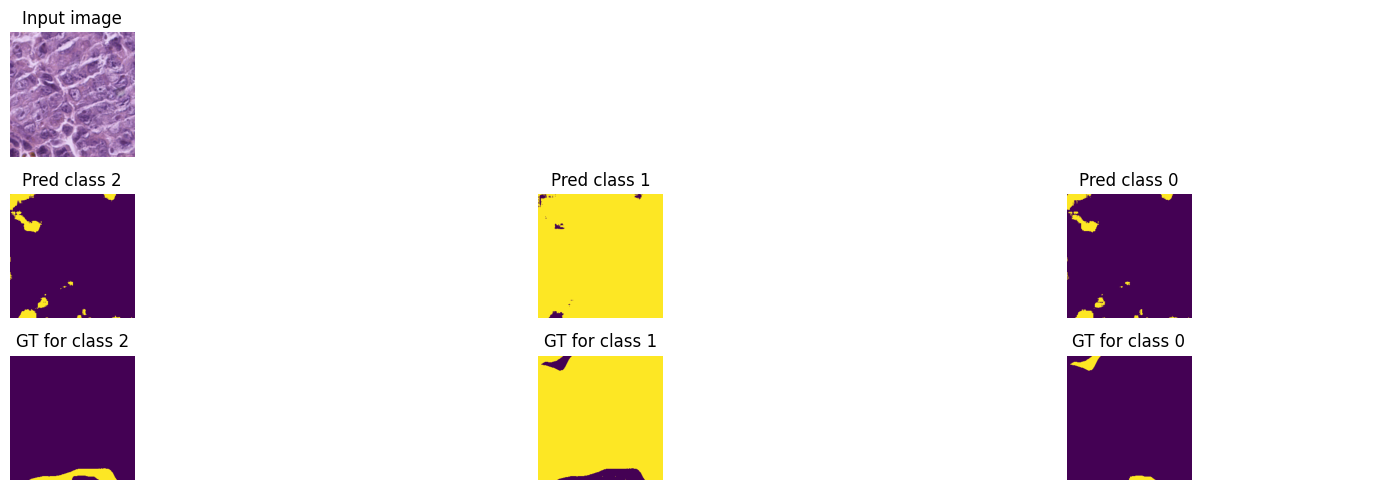

Train loss: 0.60505 | Time: 43m 1s | Val loss: 0.58716
Train_DICE_avg: 0.40864 | Train_Jaccard_avg: 0.33578 | Train_Sensitivity_avg: 0.39114 | Train_Specificity_avg: 0.77945 
Class 0 - Train_DICE: 0.29447 | Train_Jaccard: 0.23409 | Train_Sensitivity: 0.26507 | Train_Specificity: 0.83000 
Class 1 - Train_DICE: 0.48589 | Train_Jaccard: 0.41035 | Train_Sensitivity: 0.49434 | Train_Specificity: 0.70460 
Class 2 - Train_DICE: 0.44557 | Train_Jaccard: 0.36291 | Train_Sensitivity: 0.41402 | Train_Specificity: 0.80377 
Val_DICE_avg: 0.42771 | Val_Jaccard_avg: 0.36047 | Val_Sensitivity_avg: 0.40626 | Val_Specificity_avg: 0.76000 
Class 0 - Val_DICE: 0.29781 | Val_Jaccard: 0.23935 | Val_Sensitivity: 0.26372 | Val_Specificity: 0.79125 
Class 1 - Val_DICE: 0.53358 | Val_Jaccard: 0.47013 | Val_Sensitivity: 0.53748 | Val_Specificity: 0.70643 
Class 2 - Val_DICE: 0.45174 | Val_Jaccard: 0.37194 | Val_Sensitivity: 0.41759 | Val_Specificity: 0.78232 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.60482 | Time: 45m 44s | Val loss: 0.58724
Train_DICE_avg: 0.40903 | Train_Jaccard_avg: 0.33648 | Train_Sensitivity_avg: 0.39138 | Train_Specificity_avg: 0.77901 
Class 0 - Train_DICE: 0.29437 | Train_Jaccard: 0.23424 | Train_Sensitivity: 0.26449 | Train_Specificity: 0.82994 
Class 1 - Train_DICE: 0.48663 | Train_Jaccard: 0.41149 | Train_Sensitivity: 0.49475 | Train_Specificity: 0.70549 
Class 2 - Train_DICE: 0.44608 | Train_Jaccard: 0.36371 | Train_Sensitivity: 0.41492 | Train_Specificity: 0.80160 
Val_DICE_avg: 0.42821 | Val_Jaccard_avg: 0.36129 | Val_Sensitivity_avg: 0.40663 | Val_Specificity_avg: 0.75971 
Class 0 - Val_DICE: 0.29847 | Val_Jaccard: 0.23975 | Val_Sensitivity: 0.26671 | Val_Specificity: 0.79019 
Class 1 - Val_DICE: 0.53578 | Val_Jaccard: 0.47362 | Val_Sensitivity: 0.53212 | Val_Specificity: 0.71461 
Class 2 - Val_DICE: 0.45037 | Val_Jaccard: 0.37051 | Val_Sensitivity: 0.42107 | Val_Specificity: 0.77432 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60390 | Time: 48m 26s | Val loss: 0.58581
Train_DICE_avg: 0.41002 | Train_Jaccard_avg: 0.33759 | Train_Sensitivity_avg: 0.39173 | Train_Specificity_avg: 0.78026 
Class 0 - Train_DICE: 0.29435 | Train_Jaccard: 0.23434 | Train_Sensitivity: 0.26436 | Train_Specificity: 0.82929 
Class 1 - Train_DICE: 0.48902 | Train_Jaccard: 0.41397 | Train_Sensitivity: 0.49635 | Train_Specificity: 0.70518 
Class 2 - Train_DICE: 0.44670 | Train_Jaccard: 0.36446 | Train_Sensitivity: 0.41447 | Train_Specificity: 0.80629 
Val_DICE_avg: 0.42910 | Val_Jaccard_avg: 0.36216 | Val_Sensitivity_avg: 0.40715 | Val_Specificity_avg: 0.76429 
Class 0 - Val_DICE: 0.29903 | Val_Jaccard: 0.24078 | Val_Sensitivity: 0.26376 | Val_Specificity: 0.79619 
Class 1 - Val_DICE: 0.53526 | Val_Jaccard: 0.47240 | Val_Sensitivity: 0.53894 | Val_Specificity: 0.70834 
Class 2 - Val_DICE: 0.45301 | Val_Jaccard: 0.37331 | Val_Sensitivity: 0.41875 | Val_Specificity: 0.78834 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.60352 | Time: 51m 9s | Val loss: 0.58536
Train_DICE_avg: 0.41032 | Train_Jaccard_avg: 0.33775 | Train_Sensitivity_avg: 0.39207 | Train_Specificity_avg: 0.78119 
Class 0 - Train_DICE: 0.29557 | Train_Jaccard: 0.23541 | Train_Sensitivity: 0.26485 | Train_Specificity: 0.83135 
Class 1 - Train_DICE: 0.48935 | Train_Jaccard: 0.41408 | Train_Sensitivity: 0.49665 | Train_Specificity: 0.70804 
Class 2 - Train_DICE: 0.44605 | Train_Jaccard: 0.36377 | Train_Sensitivity: 0.41471 | Train_Specificity: 0.80418 
Val_DICE_avg: 0.42954 | Val_Jaccard_avg: 0.36272 | Val_Sensitivity_avg: 0.40718 | Val_Specificity_avg: 0.76328 
Class 0 - Val_DICE: 0.29926 | Val_Jaccard: 0.24114 | Val_Sensitivity: 0.26352 | Val_Specificity: 0.79632 
Class 1 - Val_DICE: 0.53581 | Val_Jaccard: 0.47306 | Val_Sensitivity: 0.53921 | Val_Specificity: 0.70758 
Class 2 - Val_DICE: 0.45355 | Val_Jaccard: 0.37397 | Val_Sensitivity: 0.41881 | Val_Specificity: 0.78594 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.60340 | Time: 53m 52s | Val loss: 0.58489
Train_DICE_avg: 0.41054 | Train_Jaccard_avg: 0.33831 | Train_Sensitivity_avg: 0.39150 | Train_Specificity_avg: 0.78120 
Class 0 - Train_DICE: 0.29569 | Train_Jaccard: 0.23593 | Train_Sensitivity: 0.26449 | Train_Specificity: 0.83085 
Class 1 - Train_DICE: 0.48916 | Train_Jaccard: 0.41445 | Train_Sensitivity: 0.49544 | Train_Specificity: 0.70592 
Class 2 - Train_DICE: 0.44677 | Train_Jaccard: 0.36454 | Train_Sensitivity: 0.41457 | Train_Specificity: 0.80683 
Val_DICE_avg: 0.43006 | Val_Jaccard_avg: 0.36343 | Val_Sensitivity_avg: 0.40734 | Val_Specificity_avg: 0.76430 
Class 0 - Val_DICE: 0.29965 | Val_Jaccard: 0.24154 | Val_Sensitivity: 0.26389 | Val_Specificity: 0.79437 
Class 1 - Val_DICE: 0.53694 | Val_Jaccard: 0.47468 | Val_Sensitivity: 0.53841 | Val_Specificity: 0.71117 
Class 2 - Val_DICE: 0.45358 | Val_Jaccard: 0.37409 | Val_Sensitivity: 0.41972 | Val_Specificity: 0.78738 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


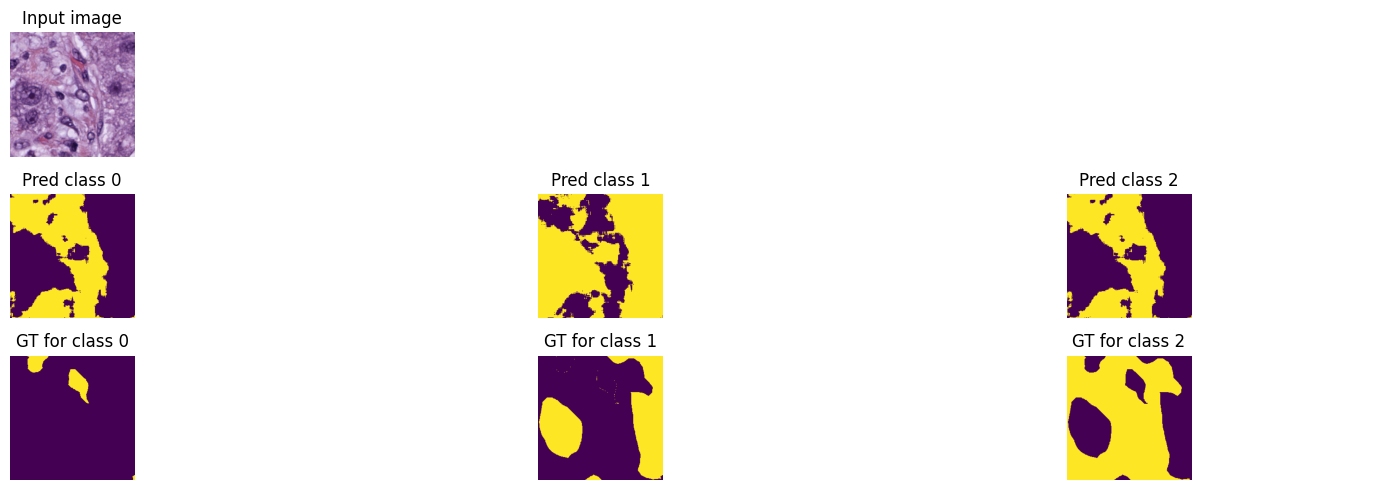

Train loss: 0.60240 | Time: 56m 36s | Val loss: 0.58200
Train_DICE_avg: 0.41157 | Train_Jaccard_avg: 0.33988 | Train_Sensitivity_avg: 0.39270 | Train_Specificity_avg: 0.78660 
Class 0 - Train_DICE: 0.29592 | Train_Jaccard: 0.23634 | Train_Sensitivity: 0.26473 | Train_Specificity: 0.83776 
Class 1 - Train_DICE: 0.49059 | Train_Jaccard: 0.41652 | Train_Sensitivity: 0.49732 | Train_Specificity: 0.71077 
Class 2 - Train_DICE: 0.44822 | Train_Jaccard: 0.36679 | Train_Sensitivity: 0.41605 | Train_Specificity: 0.81128 
Val_DICE_avg: 0.43308 | Val_Jaccard_avg: 0.36704 | Val_Sensitivity_avg: 0.41018 | Val_Specificity_avg: 0.76873 
Class 0 - Val_DICE: 0.30290 | Val_Jaccard: 0.24543 | Val_Sensitivity: 0.26488 | Val_Specificity: 0.79969 
Class 1 - Val_DICE: 0.54080 | Val_Jaccard: 0.47944 | Val_Sensitivity: 0.54390 | Val_Specificity: 0.71464 
Class 2 - Val_DICE: 0.45553 | Val_Jaccard: 0.37626 | Val_Sensitivity: 0.42174 | Val_Specificity: 0.79187 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.60083 | Time: 59m 20s | Val loss: 0.58040
Train_DICE_avg: 0.41340 | Train_Jaccard_avg: 0.34217 | Train_Sensitivity_avg: 0.39452 | Train_Specificity_avg: 0.78860 
Class 0 - Train_DICE: 0.29743 | Train_Jaccard: 0.23816 | Train_Sensitivity: 0.26596 | Train_Specificity: 0.84009 
Class 1 - Train_DICE: 0.49255 | Train_Jaccard: 0.41931 | Train_Sensitivity: 0.49935 | Train_Specificity: 0.71281 
Class 2 - Train_DICE: 0.45021 | Train_Jaccard: 0.36906 | Train_Sensitivity: 0.41826 | Train_Specificity: 0.81289 
Val_DICE_avg: 0.43479 | Val_Jaccard_avg: 0.36932 | Val_Sensitivity_avg: 0.41224 | Val_Specificity_avg: 0.77054 
Class 0 - Val_DICE: 0.30347 | Val_Jaccard: 0.24631 | Val_Sensitivity: 0.26668 | Val_Specificity: 0.80279 
Class 1 - Val_DICE: 0.54437 | Val_Jaccard: 0.48405 | Val_Sensitivity: 0.54312 | Val_Specificity: 0.72007 
Class 2 - Val_DICE: 0.45652 | Val_Jaccard: 0.37759 | Val_Sensitivity: 0.42692 | Val_Specificity: 0.78875 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.59864 | Time: 62m 3s | Val loss: 0.57886
Train_DICE_avg: 0.41572 | Train_Jaccard_avg: 0.34480 | Train_Sensitivity_avg: 0.39692 | Train_Specificity_avg: 0.79040 
Class 0 - Train_DICE: 0.29850 | Train_Jaccard: 0.23935 | Train_Sensitivity: 0.26652 | Train_Specificity: 0.84014 
Class 1 - Train_DICE: 0.49658 | Train_Jaccard: 0.42392 | Train_Sensitivity: 0.50285 | Train_Specificity: 0.71704 
Class 2 - Train_DICE: 0.45208 | Train_Jaccard: 0.37114 | Train_Sensitivity: 0.42140 | Train_Specificity: 0.81402 
Val_DICE_avg: 0.43732 | Val_Jaccard_avg: 0.37209 | Val_Sensitivity_avg: 0.41481 | Val_Specificity_avg: 0.77227 
Class 0 - Val_DICE: 0.30673 | Val_Jaccard: 0.24978 | Val_Sensitivity: 0.26915 | Val_Specificity: 0.80604 
Class 1 - Val_DICE: 0.54660 | Val_Jaccard: 0.48671 | Val_Sensitivity: 0.54506 | Val_Specificity: 0.72190 
Class 2 - Val_DICE: 0.45863 | Val_Jaccard: 0.37978 | Val_Sensitivity: 0.43022 | Val_Specificity: 0.78886 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59746 | Time: 64m 45s | Val loss: 0.57784
Train_DICE_avg: 0.41710 | Train_Jaccard_avg: 0.34652 | Train_Sensitivity_avg: 0.39821 | Train_Specificity_avg: 0.79320 
Class 0 - Train_DICE: 0.30070 | Train_Jaccard: 0.24163 | Train_Sensitivity: 0.26875 | Train_Specificity: 0.84482 
Class 1 - Train_DICE: 0.49771 | Train_Jaccard: 0.42561 | Train_Sensitivity: 0.50322 | Train_Specificity: 0.72071 
Class 2 - Train_DICE: 0.45288 | Train_Jaccard: 0.37233 | Train_Sensitivity: 0.42267 | Train_Specificity: 0.81407 
Val_DICE_avg: 0.43817 | Val_Jaccard_avg: 0.37327 | Val_Sensitivity_avg: 0.41692 | Val_Specificity_avg: 0.77137 
Class 0 - Val_DICE: 0.30774 | Val_Jaccard: 0.25120 | Val_Sensitivity: 0.27070 | Val_Specificity: 0.80091 
Class 1 - Val_DICE: 0.54803 | Val_Jaccard: 0.48801 | Val_Sensitivity: 0.54660 | Val_Specificity: 0.73525 
Class 2 - Val_DICE: 0.45874 | Val_Jaccard: 0.38059 | Val_Sensitivity: 0.43345 | Val_Specificity: 0.77794 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59619 | Time: 67m 31s | Val loss: 0.57643
Train_DICE_avg: 0.41807 | Train_Jaccard_avg: 0.34785 | Train_Sensitivity_avg: 0.39961 | Train_Specificity_avg: 0.79337 
Class 0 - Train_DICE: 0.30027 | Train_Jaccard: 0.24140 | Train_Sensitivity: 0.26838 | Train_Specificity: 0.84387 
Class 1 - Train_DICE: 0.50019 | Train_Jaccard: 0.42890 | Train_Sensitivity: 0.50661 | Train_Specificity: 0.71996 
Class 2 - Train_DICE: 0.45376 | Train_Jaccard: 0.37324 | Train_Sensitivity: 0.42385 | Train_Specificity: 0.81628 
Val_DICE_avg: 0.43885 | Val_Jaccard_avg: 0.37416 | Val_Sensitivity_avg: 0.41801 | Val_Specificity_avg: 0.77512 
Class 0 - Val_DICE: 0.30807 | Val_Jaccard: 0.25163 | Val_Sensitivity: 0.26989 | Val_Specificity: 0.80734 
Class 1 - Val_DICE: 0.54869 | Val_Jaccard: 0.48926 | Val_Sensitivity: 0.55137 | Val_Specificity: 0.72609 
Class 2 - Val_DICE: 0.45978 | Val_Jaccard: 0.38158 | Val_Sensitivity: 0.43278 | Val_Specificity: 0.79194 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


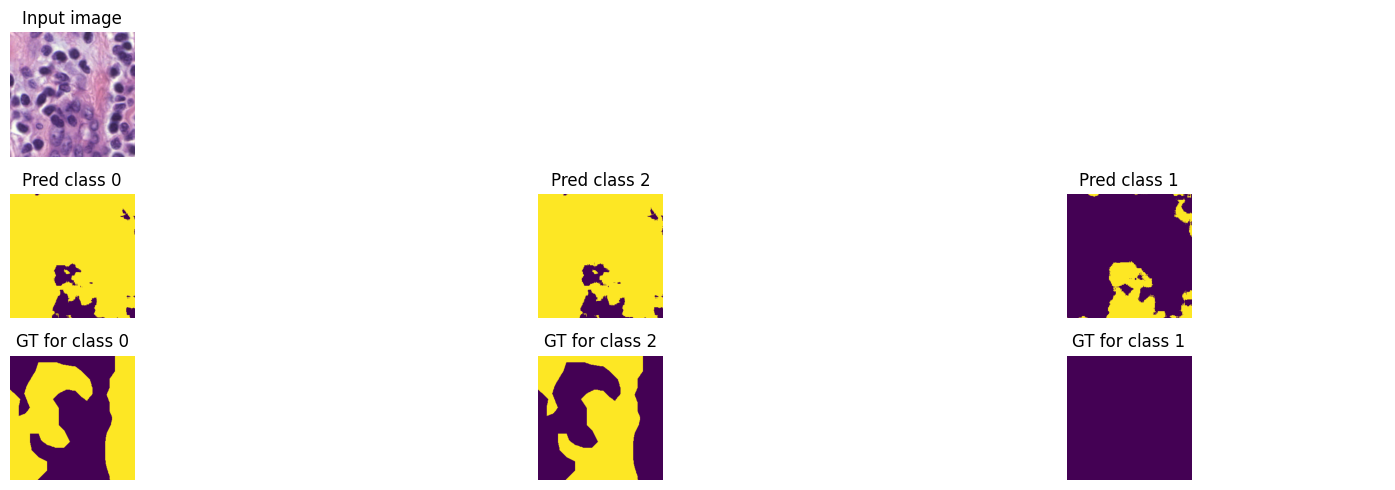

Train loss: 0.59426 | Time: 70m 14s | Val loss: 0.57572
Train_DICE_avg: 0.42015 | Train_Jaccard_avg: 0.35002 | Train_Sensitivity_avg: 0.40229 | Train_Specificity_avg: 0.79757 
Class 0 - Train_DICE: 0.30234 | Train_Jaccard: 0.24371 | Train_Sensitivity: 0.27038 | Train_Specificity: 0.84761 
Class 1 - Train_DICE: 0.50290 | Train_Jaccard: 0.43145 | Train_Sensitivity: 0.50983 | Train_Specificity: 0.72450 
Class 2 - Train_DICE: 0.45522 | Train_Jaccard: 0.37490 | Train_Sensitivity: 0.42666 | Train_Specificity: 0.82060 
Val_DICE_avg: 0.43871 | Val_Jaccard_avg: 0.37458 | Val_Sensitivity_avg: 0.41976 | Val_Specificity_avg: 0.77514 
Class 0 - Val_DICE: 0.30711 | Val_Jaccard: 0.25077 | Val_Sensitivity: 0.27256 | Val_Specificity: 0.80611 
Class 1 - Val_DICE: 0.55089 | Val_Jaccard: 0.49280 | Val_Sensitivity: 0.54997 | Val_Specificity: 0.73222 
Class 2 - Val_DICE: 0.45812 | Val_Jaccard: 0.38017 | Val_Sensitivity: 0.43674 | Val_Specificity: 0.78708 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.59381 | Time: 72m 57s | Val loss: 0.57497
Train_DICE_avg: 0.42051 | Train_Jaccard_avg: 0.35046 | Train_Sensitivity_avg: 0.40315 | Train_Specificity_avg: 0.79996 
Class 0 - Train_DICE: 0.30195 | Train_Jaccard: 0.24319 | Train_Sensitivity: 0.26951 | Train_Specificity: 0.85545 
Class 1 - Train_DICE: 0.50415 | Train_Jaccard: 0.43308 | Train_Sensitivity: 0.51375 | Train_Specificity: 0.72076 
Class 2 - Train_DICE: 0.45543 | Train_Jaccard: 0.37512 | Train_Sensitivity: 0.42618 | Train_Specificity: 0.82367 
Val_DICE_avg: 0.43957 | Val_Jaccard_avg: 0.37542 | Val_Sensitivity_avg: 0.42120 | Val_Specificity_avg: 0.77865 
Class 0 - Val_DICE: 0.30693 | Val_Jaccard: 0.25052 | Val_Sensitivity: 0.27263 | Val_Specificity: 0.81167 
Class 1 - Val_DICE: 0.55382 | Val_Jaccard: 0.49579 | Val_Sensitivity: 0.55384 | Val_Specificity: 0.73248 
Class 2 - Val_DICE: 0.45795 | Val_Jaccard: 0.37994 | Val_Sensitivity: 0.43713 | Val_Specificity: 0.79181 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.59187 | Time: 75m 41s | Val loss: 0.54884
Train_DICE_avg: 0.42435 | Train_Jaccard_avg: 0.35418 | Train_Sensitivity_avg: 0.40978 | Train_Specificity_avg: 0.80521 
Class 0 - Train_DICE: 0.30192 | Train_Jaccard: 0.24315 | Train_Sensitivity: 0.26834 | Train_Specificity: 0.86534 
Class 1 - Train_DICE: 0.51626 | Train_Jaccard: 0.44471 | Train_Sensitivity: 0.53692 | Train_Specificity: 0.71389 
Class 2 - Train_DICE: 0.45486 | Train_Jaccard: 0.37467 | Train_Sensitivity: 0.42408 | Train_Specificity: 0.83641 
Val_DICE_avg: 0.47459 | Val_Jaccard_avg: 0.40936 | Val_Sensitivity_avg: 0.46994 | Val_Specificity_avg: 0.82467 
Class 0 - Val_DICE: 0.30728 | Val_Jaccard: 0.25084 | Val_Sensitivity: 0.26484 | Val_Specificity: 0.90259 
Class 1 - Val_DICE: 0.65305 | Val_Jaccard: 0.59260 | Val_Sensitivity: 0.72114 | Val_Specificity: 0.70216 
Class 2 - Val_DICE: 0.46346 | Val_Jaccard: 0.38464 | Val_Sensitivity: 0.42384 | Val_Specificity: 0.86927 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.58257 | Time: 78m 25s | Val loss: 0.52418
Train_DICE_avg: 0.43345 | Train_Jaccard_avg: 0.36329 | Train_Sensitivity_avg: 0.42695 | Train_Specificity_avg: 0.81900 
Class 0 - Train_DICE: 0.30081 | Train_Jaccard: 0.24224 | Train_Sensitivity: 0.26529 | Train_Specificity: 0.88859 
Class 1 - Train_DICE: 0.54783 | Train_Jaccard: 0.47603 | Train_Sensitivity: 0.59832 | Train_Specificity: 0.71074 
Class 2 - Train_DICE: 0.45172 | Train_Jaccard: 0.37161 | Train_Sensitivity: 0.41724 | Train_Specificity: 0.85768 
Val_DICE_avg: 0.49266 | Val_Jaccard_avg: 0.42789 | Val_Sensitivity_avg: 0.50298 | Val_Specificity_avg: 0.84676 
Class 0 - Val_DICE: 0.30754 | Val_Jaccard: 0.25135 | Val_Sensitivity: 0.26306 | Val_Specificity: 0.94325 
Class 1 - Val_DICE: 0.70842 | Val_Jaccard: 0.64823 | Val_Sensitivity: 0.82693 | Val_Specificity: 0.69150 
Class 2 - Val_DICE: 0.46202 | Val_Jaccard: 0.38411 | Val_Sensitivity: 0.41894 | Val_Specificity: 0.90554 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.56478 | Time: 81m 8s | Val loss: 0.51887
Train_DICE_avg: 0.45138 | Train_Jaccard_avg: 0.38203 | Train_Sensitivity_avg: 0.46562 | Train_Specificity_avg: 0.84100 
Class 0 - Train_DICE: 0.29973 | Train_Jaccard: 0.24194 | Train_Sensitivity: 0.25789 | Train_Specificity: 0.92199 
Class 1 - Train_DICE: 0.60845 | Train_Jaccard: 0.53882 | Train_Sensitivity: 0.73756 | Train_Specificity: 0.71377 
Class 2 - Train_DICE: 0.44596 | Train_Jaccard: 0.36533 | Train_Sensitivity: 0.40140 | Train_Specificity: 0.88725 
Val_DICE_avg: 0.49502 | Val_Jaccard_avg: 0.43125 | Val_Sensitivity_avg: 0.51443 | Val_Specificity_avg: 0.85697 
Class 0 - Val_DICE: 0.30775 | Val_Jaccard: 0.25206 | Val_Sensitivity: 0.26308 | Val_Specificity: 0.96699 
Class 1 - Val_DICE: 0.71921 | Val_Jaccard: 0.66109 | Val_Sensitivity: 0.86316 | Val_Specificity: 0.68779 
Class 2 - Val_DICE: 0.45811 | Val_Jaccard: 0.38060 | Val_Sensitivity: 0.41705 | Val_Specificity: 0.91612 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


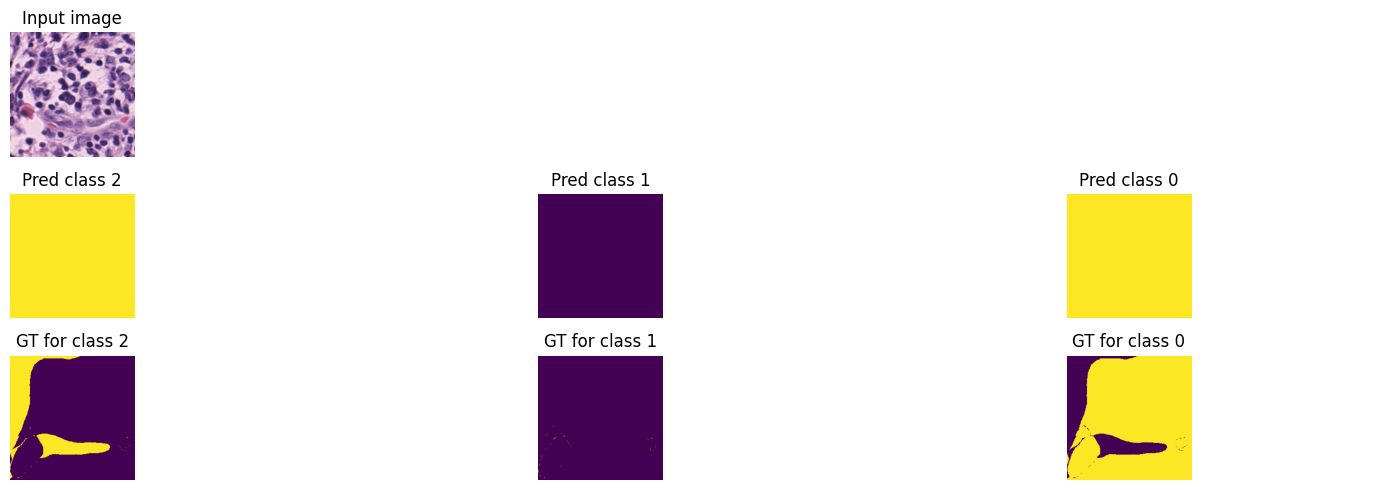

Train loss: 0.54937 | Time: 83m 52s | Val loss: 0.51476
Train_DICE_avg: 0.46497 | Train_Jaccard_avg: 0.39654 | Train_Sensitivity_avg: 0.48715 | Train_Specificity_avg: 0.84969 
Class 0 - Train_DICE: 0.30083 | Train_Jaccard: 0.24314 | Train_Sensitivity: 0.25641 | Train_Specificity: 0.93518 
Class 1 - Train_DICE: 0.64969 | Train_Jaccard: 0.58228 | Train_Sensitivity: 0.80762 | Train_Specificity: 0.71880 
Class 2 - Train_DICE: 0.44440 | Train_Jaccard: 0.36420 | Train_Sensitivity: 0.39742 | Train_Specificity: 0.89510 
Val_DICE_avg: 0.50067 | Val_Jaccard_avg: 0.43770 | Val_Sensitivity_avg: 0.52112 | Val_Specificity_avg: 0.86046 
Class 0 - Val_DICE: 0.30964 | Val_Jaccard: 0.25423 | Val_Sensitivity: 0.26544 | Val_Specificity: 0.96862 
Class 1 - Val_DICE: 0.73329 | Val_Jaccard: 0.67664 | Val_Sensitivity: 0.87390 | Val_Specificity: 0.69576 
Class 2 - Val_DICE: 0.45908 | Val_Jaccard: 0.38222 | Val_Sensitivity: 0.42403 | Val_Specificity: 0.91700 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.54430 | Time: 86m 36s | Val loss: 0.51122
Train_DICE_avg: 0.46902 | Train_Jaccard_avg: 0.40110 | Train_Sensitivity_avg: 0.49149 | Train_Specificity_avg: 0.85342 
Class 0 - Train_DICE: 0.30121 | Train_Jaccard: 0.24377 | Train_Sensitivity: 0.25785 | Train_Specificity: 0.93888 
Class 1 - Train_DICE: 0.66122 | Train_Jaccard: 0.59491 | Train_Sensitivity: 0.81524 | Train_Specificity: 0.72456 
Class 2 - Train_DICE: 0.44463 | Train_Jaccard: 0.36462 | Train_Sensitivity: 0.40137 | Train_Specificity: 0.89681 
Val_DICE_avg: 0.50289 | Val_Jaccard_avg: 0.44050 | Val_Sensitivity_avg: 0.52284 | Val_Specificity_avg: 0.86091 
Class 0 - Val_DICE: 0.30981 | Val_Jaccard: 0.25462 | Val_Sensitivity: 0.26688 | Val_Specificity: 0.96903 
Class 1 - Val_DICE: 0.73905 | Val_Jaccard: 0.68362 | Val_Sensitivity: 0.87242 | Val_Specificity: 0.70129 
Class 2 - Val_DICE: 0.45981 | Val_Jaccard: 0.38327 | Val_Sensitivity: 0.42923 | Val_Specificity: 0.91240 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.54148 | Time: 89m 20s | Val loss: 0.51097
Train_DICE_avg: 0.47137 | Train_Jaccard_avg: 0.40377 | Train_Sensitivity_avg: 0.49696 | Train_Specificity_avg: 0.85702 
Class 0 - Train_DICE: 0.30291 | Train_Jaccard: 0.24582 | Train_Sensitivity: 0.25901 | Train_Specificity: 0.94738 
Class 1 - Train_DICE: 0.66761 | Train_Jaccard: 0.60217 | Train_Sensitivity: 0.83097 | Train_Specificity: 0.72370 
Class 2 - Train_DICE: 0.44358 | Train_Jaccard: 0.36332 | Train_Sensitivity: 0.40089 | Train_Specificity: 0.89999 
Val_DICE_avg: 0.50281 | Val_Jaccard_avg: 0.44069 | Val_Sensitivity_avg: 0.52517 | Val_Specificity_avg: 0.86285 
Class 0 - Val_DICE: 0.30970 | Val_Jaccard: 0.25448 | Val_Sensitivity: 0.26647 | Val_Specificity: 0.97125 
Class 1 - Val_DICE: 0.73814 | Val_Jaccard: 0.68330 | Val_Sensitivity: 0.88107 | Val_Specificity: 0.69883 
Class 2 - Val_DICE: 0.46060 | Val_Jaccard: 0.38428 | Val_Sensitivity: 0.42798 | Val_Specificity: 0.91848 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.53630 | Time: 92m 3s | Val loss: 0.50997
Train_DICE_avg: 0.47650 | Train_Jaccard_avg: 0.40930 | Train_Sensitivity_avg: 0.49960 | Train_Specificity_avg: 0.86024 
Class 0 - Train_DICE: 0.30307 | Train_Jaccard: 0.24601 | Train_Sensitivity: 0.25983 | Train_Specificity: 0.94878 
Class 1 - Train_DICE: 0.68101 | Train_Jaccard: 0.61600 | Train_Sensitivity: 0.83511 | Train_Specificity: 0.72940 
Class 2 - Train_DICE: 0.44542 | Train_Jaccard: 0.36588 | Train_Sensitivity: 0.40385 | Train_Specificity: 0.90253 
Val_DICE_avg: 0.50276 | Val_Jaccard_avg: 0.44074 | Val_Sensitivity_avg: 0.52378 | Val_Specificity_avg: 0.86180 
Class 0 - Val_DICE: 0.31015 | Val_Jaccard: 0.25471 | Val_Sensitivity: 0.26936 | Val_Specificity: 0.96761 
Class 1 - Val_DICE: 0.73893 | Val_Jaccard: 0.68478 | Val_Sensitivity: 0.86897 | Val_Specificity: 0.70581 
Class 2 - Val_DICE: 0.45919 | Val_Jaccard: 0.38274 | Val_Sensitivity: 0.43301 | Val_Specificity: 0.91197 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.53448 | Time: 94m 48s | Val loss: 0.50836
Train_DICE_avg: 0.47760 | Train_Jaccard_avg: 0.41035 | Train_Sensitivity_avg: 0.49890 | Train_Specificity_avg: 0.85917 
Class 0 - Train_DICE: 0.30369 | Train_Jaccard: 0.24655 | Train_Sensitivity: 0.26087 | Train_Specificity: 0.94334 
Class 1 - Train_DICE: 0.68180 | Train_Jaccard: 0.61665 | Train_Sensitivity: 0.82813 | Train_Specificity: 0.73307 
Class 2 - Train_DICE: 0.44732 | Train_Jaccard: 0.36785 | Train_Sensitivity: 0.40770 | Train_Specificity: 0.90108 
Val_DICE_avg: 0.50377 | Val_Jaccard_avg: 0.44162 | Val_Sensitivity_avg: 0.52300 | Val_Specificity_avg: 0.85920 
Class 0 - Val_DICE: 0.31067 | Val_Jaccard: 0.25539 | Val_Sensitivity: 0.26914 | Val_Specificity: 0.96640 
Class 1 - Val_DICE: 0.74015 | Val_Jaccard: 0.68517 | Val_Sensitivity: 0.86851 | Val_Specificity: 0.70370 
Class 2 - Val_DICE: 0.46049 | Val_Jaccard: 0.38431 | Val_Sensitivity: 0.43134 | Val_Specificity: 0.90751 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


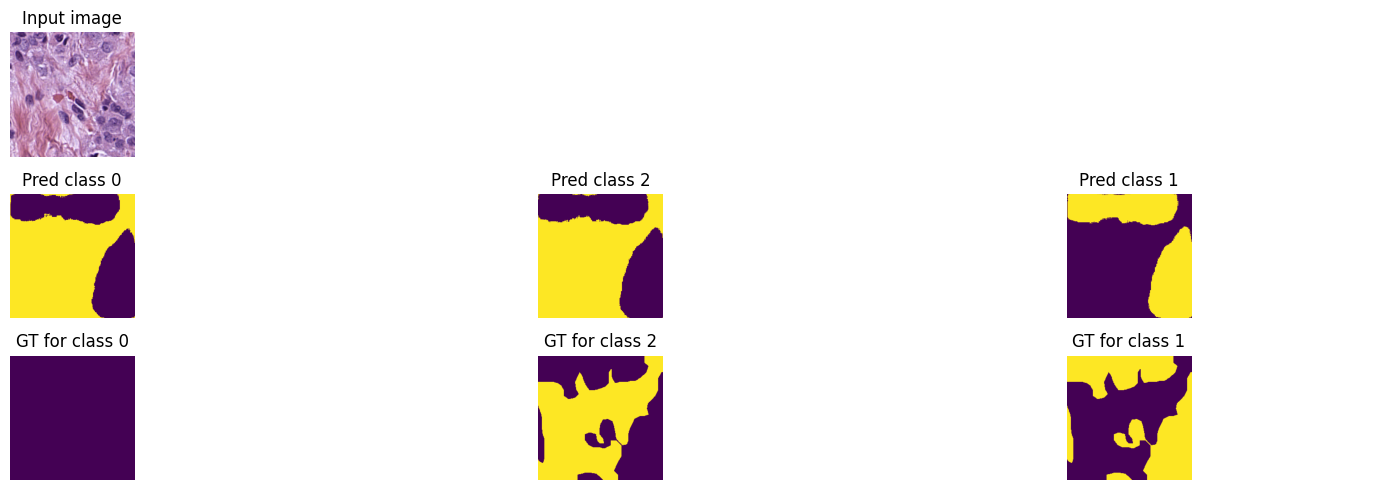

Train loss: 0.53385 | Time: 97m 32s | Val loss: 0.50811
Train_DICE_avg: 0.47874 | Train_Jaccard_avg: 0.41185 | Train_Sensitivity_avg: 0.49969 | Train_Specificity_avg: 0.86131 
Class 0 - Train_DICE: 0.30380 | Train_Jaccard: 0.24666 | Train_Sensitivity: 0.26089 | Train_Specificity: 0.94634 
Class 1 - Train_DICE: 0.68572 | Train_Jaccard: 0.62149 | Train_Sensitivity: 0.83072 | Train_Specificity: 0.73607 
Class 2 - Train_DICE: 0.44671 | Train_Jaccard: 0.36741 | Train_Sensitivity: 0.40744 | Train_Specificity: 0.90151 
Val_DICE_avg: 0.50335 | Val_Jaccard_avg: 0.44199 | Val_Sensitivity_avg: 0.52676 | Val_Specificity_avg: 0.86304 
Class 0 - Val_DICE: 0.31049 | Val_Jaccard: 0.25521 | Val_Sensitivity: 0.26919 | Val_Specificity: 0.96811 
Class 1 - Val_DICE: 0.74039 | Val_Jaccard: 0.68728 | Val_Sensitivity: 0.87712 | Val_Specificity: 0.70502 
Class 2 - Val_DICE: 0.45917 | Val_Jaccard: 0.38348 | Val_Sensitivity: 0.43396 | Val_Specificity: 0.91600 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.52964 | Time: 100m 16s | Val loss: 0.50774
Train_DICE_avg: 0.48296 | Train_Jaccard_avg: 0.41617 | Train_Sensitivity_avg: 0.50392 | Train_Specificity_avg: 0.86343 
Class 0 - Train_DICE: 0.30444 | Train_Jaccard: 0.24719 | Train_Sensitivity: 0.26143 | Train_Specificity: 0.94865 
Class 1 - Train_DICE: 0.69512 | Train_Jaccard: 0.63131 | Train_Sensitivity: 0.83970 | Train_Specificity: 0.73561 
Class 2 - Train_DICE: 0.44932 | Train_Jaccard: 0.37001 | Train_Sensitivity: 0.41063 | Train_Specificity: 0.90603 
Val_DICE_avg: 0.50510 | Val_Jaccard_avg: 0.44393 | Val_Sensitivity_avg: 0.52763 | Val_Specificity_avg: 0.86063 
Class 0 - Val_DICE: 0.31042 | Val_Jaccard: 0.25506 | Val_Sensitivity: 0.27098 | Val_Specificity: 0.96683 
Class 1 - Val_DICE: 0.74097 | Val_Jaccard: 0.68815 | Val_Sensitivity: 0.86888 | Val_Specificity: 0.70840 
Class 2 - Val_DICE: 0.46391 | Val_Jaccard: 0.38858 | Val_Sensitivity: 0.44304 | Val_Specificity: 0.90666 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.52762 | Time: 103m 0s | Val loss: 0.50693
Train_DICE_avg: 0.48429 | Train_Jaccard_avg: 0.41762 | Train_Sensitivity_avg: 0.50504 | Train_Specificity_avg: 0.86305 
Class 0 - Train_DICE: 0.30532 | Train_Jaccard: 0.24819 | Train_Sensitivity: 0.26274 | Train_Specificity: 0.94712 
Class 1 - Train_DICE: 0.69717 | Train_Jaccard: 0.63351 | Train_Sensitivity: 0.83979 | Train_Specificity: 0.73751 
Class 2 - Train_DICE: 0.45037 | Train_Jaccard: 0.37115 | Train_Sensitivity: 0.41258 | Train_Specificity: 0.90452 
Val_DICE_avg: 0.50869 | Val_Jaccard_avg: 0.44760 | Val_Sensitivity_avg: 0.53113 | Val_Specificity_avg: 0.85873 
Class 0 - Val_DICE: 0.31070 | Val_Jaccard: 0.25548 | Val_Sensitivity: 0.27220 | Val_Specificity: 0.96368 
Class 1 - Val_DICE: 0.74051 | Val_Jaccard: 0.68761 | Val_Sensitivity: 0.86277 | Val_Specificity: 0.71127 
Class 2 - Val_DICE: 0.47486 | Val_Jaccard: 0.39970 | Val_Sensitivity: 0.45842 | Val_Specificity: 0.90124 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Train loss: 0.52611 | Time: 105m 44s | Val loss: 0.50495
Train_DICE_avg: 0.48672 | Train_Jaccard_avg: 0.42025 | Train_Sensitivity_avg: 0.50672 | Train_Specificity_avg: 0.86163 
Class 0 - Train_DICE: 0.30583 | Train_Jaccard: 0.24895 | Train_Sensitivity: 0.26314 | Train_Specificity: 0.94789 
Class 1 - Train_DICE: 0.70135 | Train_Jaccard: 0.63750 | Train_Sensitivity: 0.83749 | Train_Specificity: 0.73853 
Class 2 - Train_DICE: 0.45299 | Train_Jaccard: 0.37429 | Train_Sensitivity: 0.41954 | Train_Specificity: 0.89846 
Val_DICE_avg: 0.51357 | Val_Jaccard_avg: 0.45222 | Val_Sensitivity_avg: 0.53757 | Val_Specificity_avg: 0.85803 
Class 0 - Val_DICE: 0.31076 | Val_Jaccard: 0.25557 | Val_Sensitivity: 0.27152 | Val_Specificity: 0.96619 
Class 1 - Val_DICE: 0.74062 | Val_Jaccard: 0.68663 | Val_Sensitivity: 0.86500 | Val_Specificity: 0.70907 
Class 2 - Val_DICE: 0.48933 | Val_Jaccard: 0.41447 | Val_Sensitivity: 0.47620 | Val_Specificity: 0.89884 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.52251 | Time: 108m 27s | Val loss: 0.49320
Train_DICE_avg: 0.49196 | Train_Jaccard_avg: 0.42574 | Train_Sensitivity_avg: 0.51342 | Train_Specificity_avg: 0.84963 
Class 0 - Train_DICE: 0.30877 | Train_Jaccard: 0.25183 | Train_Sensitivity: 0.26686 | Train_Specificity: 0.95148 
Class 1 - Train_DICE: 0.70723 | Train_Jaccard: 0.64394 | Train_Sensitivity: 0.84393 | Train_Specificity: 0.74119 
Class 2 - Train_DICE: 0.45989 | Train_Jaccard: 0.38144 | Train_Sensitivity: 0.42946 | Train_Specificity: 0.85622 
Val_DICE_avg: 0.52803 | Val_Jaccard_avg: 0.46719 | Val_Sensitivity_avg: 0.55272 | Val_Specificity_avg: 0.80792 
Class 0 - Val_DICE: 0.34713 | Val_Jaccard: 0.29209 | Val_Sensitivity: 0.31194 | Val_Specificity: 0.95414 
Class 1 - Val_DICE: 0.73734 | Val_Jaccard: 0.68415 | Val_Sensitivity: 0.84416 | Val_Specificity: 0.72345 
Class 2 - Val_DICE: 0.49961 | Val_Jaccard: 0.42533 | Val_Sensitivity: 0.50207 | Val_Specificity: 0.74616 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


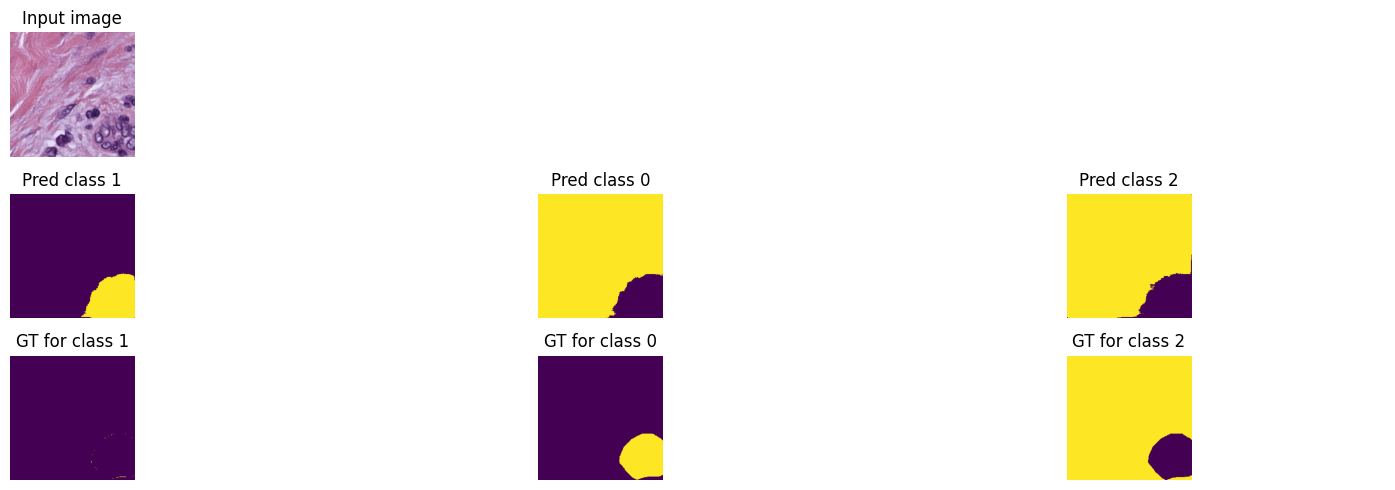

Train loss: 0.51742 | Time: 111m 12s | Val loss: 0.47940
Train_DICE_avg: 0.50091 | Train_Jaccard_avg: 0.43516 | Train_Sensitivity_avg: 0.52465 | Train_Specificity_avg: 0.83491 
Class 0 - Train_DICE: 0.32391 | Train_Jaccard: 0.26712 | Train_Sensitivity: 0.28561 | Train_Specificity: 0.94013 
Class 1 - Train_DICE: 0.70680 | Train_Jaccard: 0.64432 | Train_Sensitivity: 0.83445 | Train_Specificity: 0.74732 
Class 2 - Train_DICE: 0.47202 | Train_Jaccard: 0.39405 | Train_Sensitivity: 0.45389 | Train_Specificity: 0.81729 
Val_DICE_avg: 0.54447 | Val_Jaccard_avg: 0.48418 | Val_Sensitivity_avg: 0.57617 | Val_Specificity_avg: 0.80279 
Class 0 - Val_DICE: 0.38429 | Val_Jaccard: 0.32954 | Val_Sensitivity: 0.35343 | Val_Specificity: 0.91222 
Class 1 - Val_DICE: 0.73769 | Val_Jaccard: 0.68519 | Val_Sensitivity: 0.84313 | Val_Specificity: 0.75211 
Class 2 - Val_DICE: 0.51143 | Val_Jaccard: 0.43781 | Val_Sensitivity: 0.53197 | Val_Specificity: 0.74404 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.50520 | Time: 113m 57s | Val loss: 0.46294
Train_DICE_avg: 0.51640 | Train_Jaccard_avg: 0.45168 | Train_Sensitivity_avg: 0.54525 | Train_Specificity_avg: 0.83169 
Class 0 - Train_DICE: 0.35351 | Train_Jaccard: 0.29743 | Train_Sensitivity: 0.32202 | Train_Specificity: 0.91732 
Class 1 - Train_DICE: 0.71159 | Train_Jaccard: 0.65048 | Train_Sensitivity: 0.82694 | Train_Specificity: 0.76285 
Class 2 - Train_DICE: 0.48408 | Train_Jaccard: 0.40714 | Train_Sensitivity: 0.48678 | Train_Specificity: 0.81489 
Val_DICE_avg: 0.56270 | Val_Jaccard_avg: 0.50410 | Val_Sensitivity_avg: 0.60733 | Val_Specificity_avg: 0.79059 
Class 0 - Val_DICE: 0.42240 | Val_Jaccard: 0.36870 | Val_Sensitivity: 0.40034 | Val_Specificity: 0.85839 
Class 1 - Val_DICE: 0.74925 | Val_Jaccard: 0.69833 | Val_Sensitivity: 0.85045 | Val_Specificity: 0.77867 
Class 2 - Val_DICE: 0.51646 | Val_Jaccard: 0.44528 | Val_Sensitivity: 0.57120 | Val_Specificity: 0.73470 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.49396 | Time: 116m 41s | Val loss: 0.45254
Train_DICE_avg: 0.52669 | Train_Jaccard_avg: 0.46323 | Train_Sensitivity_avg: 0.56280 | Train_Specificity_avg: 0.82669 
Class 0 - Train_DICE: 0.37682 | Train_Jaccard: 0.32149 | Train_Sensitivity: 0.35574 | Train_Specificity: 0.89037 
Class 1 - Train_DICE: 0.71004 | Train_Jaccard: 0.65018 | Train_Sensitivity: 0.81332 | Train_Specificity: 0.78390 
Class 2 - Train_DICE: 0.49322 | Train_Jaccard: 0.41802 | Train_Sensitivity: 0.51935 | Train_Specificity: 0.80579 
Val_DICE_avg: 0.57089 | Val_Jaccard_avg: 0.51351 | Val_Sensitivity_avg: 0.62671 | Val_Specificity_avg: 0.79042 
Class 0 - Val_DICE: 0.44685 | Val_Jaccard: 0.39400 | Val_Sensitivity: 0.43238 | Val_Specificity: 0.84333 
Class 1 - Val_DICE: 0.74703 | Val_Jaccard: 0.69723 | Val_Sensitivity: 0.85401 | Val_Specificity: 0.79400 
Class 2 - Val_DICE: 0.51880 | Val_Jaccard: 0.44931 | Val_Sensitivity: 0.59374 | Val_Specificity: 0.73394 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.48597 | Time: 119m 25s | Val loss: 0.44652
Train_DICE_avg: 0.53480 | Train_Jaccard_avg: 0.47258 | Train_Sensitivity_avg: 0.58070 | Train_Specificity_avg: 0.82950 
Class 0 - Train_DICE: 0.40029 | Train_Jaccard: 0.34557 | Train_Sensitivity: 0.39028 | Train_Specificity: 0.88664 
Class 1 - Train_DICE: 0.70893 | Train_Jaccard: 0.65052 | Train_Sensitivity: 0.80679 | Train_Specificity: 0.80175 
Class 2 - Train_DICE: 0.49516 | Train_Jaccard: 0.42164 | Train_Sensitivity: 0.54503 | Train_Specificity: 0.80012 
Val_DICE_avg: 0.57300 | Val_Jaccard_avg: 0.51634 | Val_Sensitivity_avg: 0.63678 | Val_Specificity_avg: 0.78665 
Class 0 - Val_DICE: 0.46298 | Val_Jaccard: 0.41098 | Val_Sensitivity: 0.45967 | Val_Specificity: 0.84633 
Class 1 - Val_DICE: 0.74089 | Val_Jaccard: 0.69129 | Val_Sensitivity: 0.83769 | Val_Specificity: 0.78513 
Class 2 - Val_DICE: 0.51514 | Val_Jaccard: 0.44675 | Val_Sensitivity: 0.61299 | Val_Specificity: 0.72849 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.47743 | Time: 122m 9s | Val loss: 0.44112
Train_DICE_avg: 0.54241 | Train_Jaccard_avg: 0.48063 | Train_Sensitivity_avg: 0.59173 | Train_Specificity_avg: 0.82883 
Class 0 - Train_DICE: 0.41507 | Train_Jaccard: 0.36054 | Train_Sensitivity: 0.40979 | Train_Specificity: 0.88235 
Class 1 - Train_DICE: 0.71104 | Train_Jaccard: 0.65288 | Train_Sensitivity: 0.80163 | Train_Specificity: 0.80801 
Class 2 - Train_DICE: 0.50112 | Train_Jaccard: 0.42848 | Train_Sensitivity: 0.56377 | Train_Specificity: 0.79613 
Val_DICE_avg: 0.57831 | Val_Jaccard_avg: 0.52225 | Val_Sensitivity_avg: 0.64833 | Val_Specificity_avg: 0.78785 
Class 0 - Val_DICE: 0.47731 | Val_Jaccard: 0.42586 | Val_Sensitivity: 0.47988 | Val_Specificity: 0.83666 
Class 1 - Val_DICE: 0.74333 | Val_Jaccard: 0.69366 | Val_Sensitivity: 0.83441 | Val_Specificity: 0.79918 
Class 2 - Val_DICE: 0.51429 | Val_Jaccard: 0.44722 | Val_Sensitivity: 0.63071 | Val_Specificity: 0.72769 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


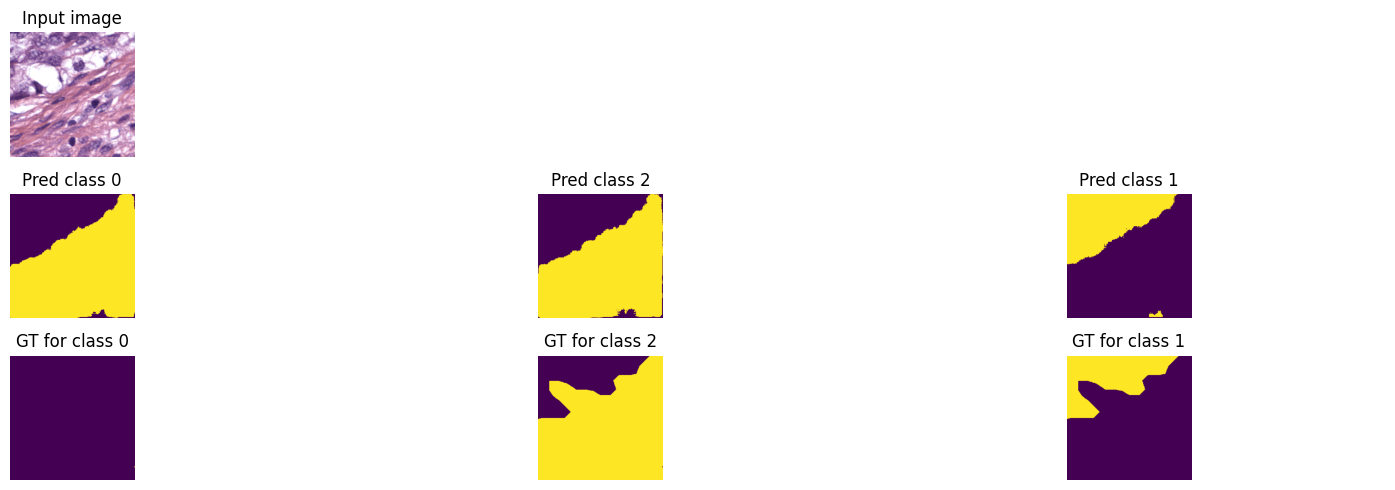

Train loss: 0.47209 | Time: 124m 54s | Val loss: 0.43550
Train_DICE_avg: 0.54669 | Train_Jaccard_avg: 0.48567 | Train_Sensitivity_avg: 0.59872 | Train_Specificity_avg: 0.83441 
Class 0 - Train_DICE: 0.42336 | Train_Jaccard: 0.36912 | Train_Sensitivity: 0.42038 | Train_Specificity: 0.88505 
Class 1 - Train_DICE: 0.71576 | Train_Jaccard: 0.65845 | Train_Sensitivity: 0.80515 | Train_Specificity: 0.81844 
Class 2 - Train_DICE: 0.50094 | Train_Jaccard: 0.42944 | Train_Sensitivity: 0.57064 | Train_Specificity: 0.79972 
Val_DICE_avg: 0.58417 | Val_Jaccard_avg: 0.52814 | Val_Sensitivity_avg: 0.65564 | Val_Specificity_avg: 0.79417 
Class 0 - Val_DICE: 0.48783 | Val_Jaccard: 0.43643 | Val_Sensitivity: 0.49200 | Val_Specificity: 0.83156 
Class 1 - Val_DICE: 0.74556 | Val_Jaccard: 0.69574 | Val_Sensitivity: 0.83455 | Val_Specificity: 0.82395 
Class 2 - Val_DICE: 0.51910 | Val_Jaccard: 0.45224 | Val_Sensitivity: 0.64038 | Val_Specificity: 0.72701 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.46848 | Time: 127m 38s | Val loss: 0.43424
Train_DICE_avg: 0.54975 | Train_Jaccard_avg: 0.48888 | Train_Sensitivity_avg: 0.60320 | Train_Specificity_avg: 0.83072 
Class 0 - Train_DICE: 0.42771 | Train_Jaccard: 0.37385 | Train_Sensitivity: 0.42536 | Train_Specificity: 0.88079 
Class 1 - Train_DICE: 0.71846 | Train_Jaccard: 0.66101 | Train_Sensitivity: 0.80915 | Train_Specificity: 0.81557 
Class 2 - Train_DICE: 0.50307 | Train_Jaccard: 0.43179 | Train_Sensitivity: 0.57510 | Train_Specificity: 0.79580 
Val_DICE_avg: 0.58377 | Val_Jaccard_avg: 0.52821 | Val_Sensitivity_avg: 0.65839 | Val_Specificity_avg: 0.79032 
Class 0 - Val_DICE: 0.49013 | Val_Jaccard: 0.43911 | Val_Sensitivity: 0.49711 | Val_Specificity: 0.82957 
Class 1 - Val_DICE: 0.74315 | Val_Jaccard: 0.69369 | Val_Sensitivity: 0.83106 | Val_Specificity: 0.81732 
Class 2 - Val_DICE: 0.51803 | Val_Jaccard: 0.45182 | Val_Sensitivity: 0.64700 | Val_Specificity: 0.72408 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.46205 | Time: 130m 22s | Val loss: 0.43444
Train_DICE_avg: 0.55458 | Train_Jaccard_avg: 0.49405 | Train_Sensitivity_avg: 0.61140 | Train_Specificity_avg: 0.83330 
Class 0 - Train_DICE: 0.43878 | Train_Jaccard: 0.38519 | Train_Sensitivity: 0.43885 | Train_Specificity: 0.88397 
Class 1 - Train_DICE: 0.71936 | Train_Jaccard: 0.66217 | Train_Sensitivity: 0.81187 | Train_Specificity: 0.81806 
Class 2 - Train_DICE: 0.50559 | Train_Jaccard: 0.43478 | Train_Sensitivity: 0.58347 | Train_Specificity: 0.79787 
Val_DICE_avg: 0.58625 | Val_Jaccard_avg: 0.53055 | Val_Sensitivity_avg: 0.65966 | Val_Specificity_avg: 0.78451 
Class 0 - Val_DICE: 0.49440 | Val_Jaccard: 0.44307 | Val_Sensitivity: 0.49886 | Val_Specificity: 0.82995 
Class 1 - Val_DICE: 0.74698 | Val_Jaccard: 0.69771 | Val_Sensitivity: 0.83739 | Val_Specificity: 0.80009 
Class 2 - Val_DICE: 0.51737 | Val_Jaccard: 0.45088 | Val_Sensitivity: 0.64274 | Val_Specificity: 0.72348 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.46078 | Time: 133m 6s | Val loss: 0.43186
Train_DICE_avg: 0.55750 | Train_Jaccard_avg: 0.49750 | Train_Sensitivity_avg: 0.61826 | Train_Specificity_avg: 0.83020 
Class 0 - Train_DICE: 0.44542 | Train_Jaccard: 0.39214 | Train_Sensitivity: 0.44972 | Train_Specificity: 0.87893 
Class 1 - Train_DICE: 0.72103 | Train_Jaccard: 0.66420 | Train_Sensitivity: 0.81107 | Train_Specificity: 0.82001 
Class 2 - Train_DICE: 0.50606 | Train_Jaccard: 0.43617 | Train_Sensitivity: 0.59398 | Train_Specificity: 0.79167 
Val_DICE_avg: 0.58635 | Val_Jaccard_avg: 0.53103 | Val_Sensitivity_avg: 0.66563 | Val_Specificity_avg: 0.78448 
Class 0 - Val_DICE: 0.50168 | Val_Jaccard: 0.45127 | Val_Sensitivity: 0.51369 | Val_Specificity: 0.82579 
Class 1 - Val_DICE: 0.74341 | Val_Jaccard: 0.69352 | Val_Sensitivity: 0.82378 | Val_Specificity: 0.80575 
Class 2 - Val_DICE: 0.51395 | Val_Jaccard: 0.44829 | Val_Sensitivity: 0.65940 | Val_Specificity: 0.72190 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.45643 | Time: 135m 50s | Val loss: 0.43448
Train_DICE_avg: 0.56025 | Train_Jaccard_avg: 0.50030 | Train_Sensitivity_avg: 0.62223 | Train_Specificity_avg: 0.83150 
Class 0 - Train_DICE: 0.44659 | Train_Jaccard: 0.39346 | Train_Sensitivity: 0.44963 | Train_Specificity: 0.88286 
Class 1 - Train_DICE: 0.72541 | Train_Jaccard: 0.66866 | Train_Sensitivity: 0.81944 | Train_Specificity: 0.81557 
Class 2 - Train_DICE: 0.50873 | Train_Jaccard: 0.43877 | Train_Sensitivity: 0.59763 | Train_Specificity: 0.79608 
Val_DICE_avg: 0.58480 | Val_Jaccard_avg: 0.52956 | Val_Sensitivity_avg: 0.66341 | Val_Specificity_avg: 0.77716 
Class 0 - Val_DICE: 0.49846 | Val_Jaccard: 0.44808 | Val_Sensitivity: 0.50941 | Val_Specificity: 0.82321 
Class 1 - Val_DICE: 0.74223 | Val_Jaccard: 0.69274 | Val_Sensitivity: 0.82697 | Val_Specificity: 0.78392 
Class 2 - Val_DICE: 0.51370 | Val_Jaccard: 0.44786 | Val_Sensitivity: 0.65384 | Val_Specificity: 0.72436 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:12<00:00,  2.39it/s]


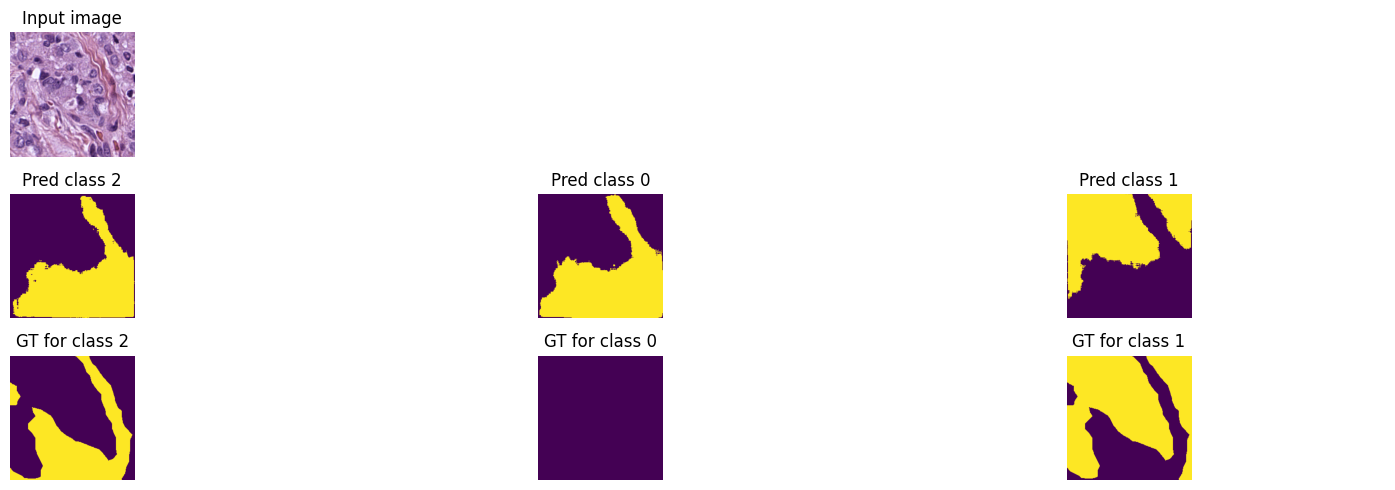

Train loss: 0.45356 | Time: 138m 34s | Val loss: 0.43125
Train_DICE_avg: 0.56371 | Train_Jaccard_avg: 0.50446 | Train_Sensitivity_avg: 0.62760 | Train_Specificity_avg: 0.82784 
Class 0 - Train_DICE: 0.45387 | Train_Jaccard: 0.40088 | Train_Sensitivity: 0.46049 | Train_Specificity: 0.87961 
Class 1 - Train_DICE: 0.72775 | Train_Jaccard: 0.67181 | Train_Sensitivity: 0.81946 | Train_Specificity: 0.81466 
Class 2 - Train_DICE: 0.50949 | Train_Jaccard: 0.44069 | Train_Sensitivity: 0.60286 | Train_Specificity: 0.78924 
Val_DICE_avg: 0.58802 | Val_Jaccard_avg: 0.53274 | Val_Sensitivity_avg: 0.66716 | Val_Specificity_avg: 0.77069 
Class 0 - Val_DICE: 0.49975 | Val_Jaccard: 0.44900 | Val_Sensitivity: 0.50993 | Val_Specificity: 0.82433 
Class 1 - Val_DICE: 0.74848 | Val_Jaccard: 0.69888 | Val_Sensitivity: 0.83824 | Val_Specificity: 0.76253 
Class 2 - Val_DICE: 0.51585 | Val_Jaccard: 0.45033 | Val_Sensitivity: 0.65330 | Val_Specificity: 0.72523 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.45097 | Time: 141m 18s | Val loss: 0.42988
Train_DICE_avg: 0.56525 | Train_Jaccard_avg: 0.50580 | Train_Sensitivity_avg: 0.62981 | Train_Specificity_avg: 0.82843 
Class 0 - Train_DICE: 0.45466 | Train_Jaccard: 0.40172 | Train_Sensitivity: 0.46032 | Train_Specificity: 0.87941 
Class 1 - Train_DICE: 0.73030 | Train_Jaccard: 0.67419 | Train_Sensitivity: 0.82354 | Train_Specificity: 0.81430 
Class 2 - Train_DICE: 0.51079 | Train_Jaccard: 0.44147 | Train_Sensitivity: 0.60558 | Train_Specificity: 0.79158 
Val_DICE_avg: 0.58619 | Val_Jaccard_avg: 0.53090 | Val_Sensitivity_avg: 0.66464 | Val_Specificity_avg: 0.76926 
Class 0 - Val_DICE: 0.49968 | Val_Jaccard: 0.44907 | Val_Sensitivity: 0.50975 | Val_Specificity: 0.82355 
Class 1 - Val_DICE: 0.74273 | Val_Jaccard: 0.69304 | Val_Sensitivity: 0.83293 | Val_Specificity: 0.75884 
Class 2 - Val_DICE: 0.51616 | Val_Jaccard: 0.45058 | Val_Sensitivity: 0.65123 | Val_Specificity: 0.72539 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.44945 | Time: 144m 2s | Val loss: 0.42969
Train_DICE_avg: 0.56690 | Train_Jaccard_avg: 0.50764 | Train_Sensitivity_avg: 0.63276 | Train_Specificity_avg: 0.82815 
Class 0 - Train_DICE: 0.45816 | Train_Jaccard: 0.40532 | Train_Sensitivity: 0.46524 | Train_Specificity: 0.87979 
Class 1 - Train_DICE: 0.72952 | Train_Jaccard: 0.67355 | Train_Sensitivity: 0.82174 | Train_Specificity: 0.81240 
Class 2 - Train_DICE: 0.51303 | Train_Jaccard: 0.44405 | Train_Sensitivity: 0.61131 | Train_Specificity: 0.79225 
Val_DICE_avg: 0.58942 | Val_Jaccard_avg: 0.53419 | Val_Sensitivity_avg: 0.66952 | Val_Specificity_avg: 0.76304 
Class 0 - Val_DICE: 0.50166 | Val_Jaccard: 0.45086 | Val_Sensitivity: 0.51066 | Val_Specificity: 0.82375 
Class 1 - Val_DICE: 0.74658 | Val_Jaccard: 0.69743 | Val_Sensitivity: 0.84536 | Val_Specificity: 0.73658 
Class 2 - Val_DICE: 0.52003 | Val_Jaccard: 0.45427 | Val_Sensitivity: 0.65254 | Val_Specificity: 0.72881 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.44918 | Time: 146m 46s | Val loss: 0.42677
Train_DICE_avg: 0.56623 | Train_Jaccard_avg: 0.50702 | Train_Sensitivity_avg: 0.63219 | Train_Specificity_avg: 0.82801 
Class 0 - Train_DICE: 0.45813 | Train_Jaccard: 0.40526 | Train_Sensitivity: 0.46490 | Train_Specificity: 0.88057 
Class 1 - Train_DICE: 0.73047 | Train_Jaccard: 0.67436 | Train_Sensitivity: 0.82471 | Train_Specificity: 0.81174 
Class 2 - Train_DICE: 0.51010 | Train_Jaccard: 0.44144 | Train_Sensitivity: 0.60696 | Train_Specificity: 0.79172 
Val_DICE_avg: 0.59092 | Val_Jaccard_avg: 0.53547 | Val_Sensitivity_avg: 0.66898 | Val_Specificity_avg: 0.76109 
Class 0 - Val_DICE: 0.49943 | Val_Jaccard: 0.44842 | Val_Sensitivity: 0.50598 | Val_Specificity: 0.82551 
Class 1 - Val_DICE: 0.75043 | Val_Jaccard: 0.70099 | Val_Sensitivity: 0.85142 | Val_Specificity: 0.72846 
Class 2 - Val_DICE: 0.52291 | Val_Jaccard: 0.45700 | Val_Sensitivity: 0.64955 | Val_Specificity: 0.72930 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.44749 | Time: 149m 31s | Val loss: 0.42677
Train_DICE_avg: 0.56817 | Train_Jaccard_avg: 0.50893 | Train_Sensitivity_avg: 0.63496 | Train_Specificity_avg: 0.82943 
Class 0 - Train_DICE: 0.45927 | Train_Jaccard: 0.40642 | Train_Sensitivity: 0.46542 | Train_Specificity: 0.88231 
Class 1 - Train_DICE: 0.73246 | Train_Jaccard: 0.67660 | Train_Sensitivity: 0.82978 | Train_Specificity: 0.80805 
Class 2 - Train_DICE: 0.51278 | Train_Jaccard: 0.44379 | Train_Sensitivity: 0.60967 | Train_Specificity: 0.79792 
Val_DICE_avg: 0.58893 | Val_Jaccard_avg: 0.53362 | Val_Sensitivity_avg: 0.66908 | Val_Specificity_avg: 0.75882 
Class 0 - Val_DICE: 0.50414 | Val_Jaccard: 0.45351 | Val_Sensitivity: 0.51454 | Val_Specificity: 0.82317 
Class 1 - Val_DICE: 0.74610 | Val_Jaccard: 0.69615 | Val_Sensitivity: 0.83709 | Val_Specificity: 0.72761 
Class 2 - Val_DICE: 0.51657 | Val_Jaccard: 0.45120 | Val_Sensitivity: 0.65560 | Val_Specificity: 0.72569 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


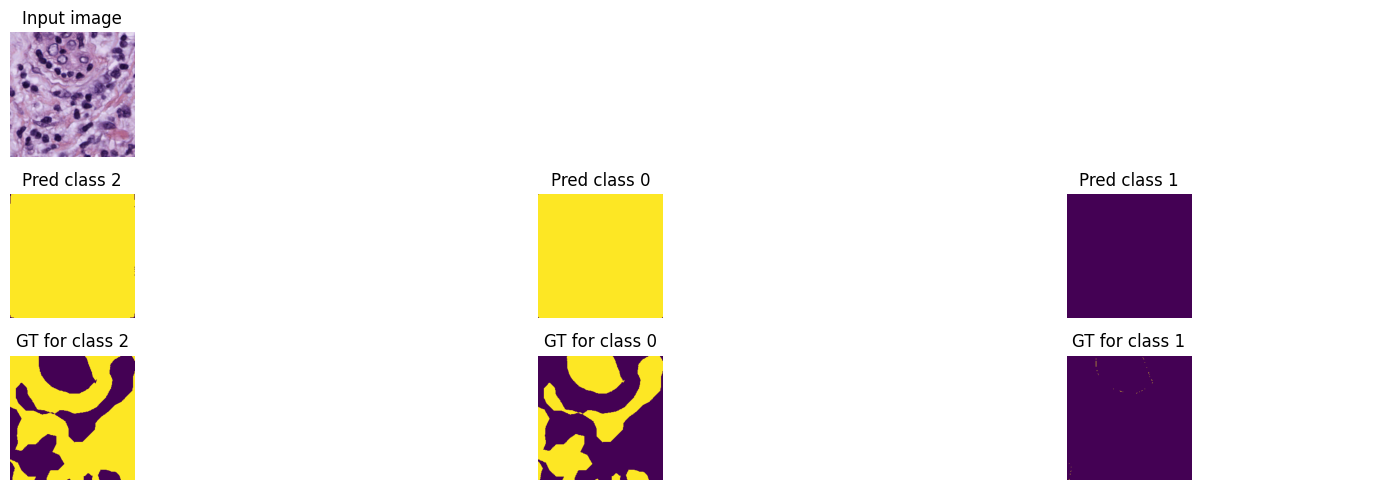

Train loss: 0.44284 | Time: 152m 15s | Val loss: 0.42607
Train_DICE_avg: 0.57135 | Train_Jaccard_avg: 0.51220 | Train_Sensitivity_avg: 0.63728 | Train_Specificity_avg: 0.82697 
Class 0 - Train_DICE: 0.46228 | Train_Jaccard: 0.40940 | Train_Sensitivity: 0.46727 | Train_Specificity: 0.88113 
Class 1 - Train_DICE: 0.73649 | Train_Jaccard: 0.68099 | Train_Sensitivity: 0.83137 | Train_Specificity: 0.80539 
Class 2 - Train_DICE: 0.51527 | Train_Jaccard: 0.44621 | Train_Sensitivity: 0.61319 | Train_Specificity: 0.79439 
Val_DICE_avg: 0.58908 | Val_Jaccard_avg: 0.53360 | Val_Sensitivity_avg: 0.66769 | Val_Specificity_avg: 0.75789 
Class 0 - Val_DICE: 0.49657 | Val_Jaccard: 0.44549 | Val_Sensitivity: 0.50446 | Val_Specificity: 0.82284 
Class 1 - Val_DICE: 0.74958 | Val_Jaccard: 0.70018 | Val_Sensitivity: 0.84929 | Val_Specificity: 0.72170 
Class 2 - Val_DICE: 0.52108 | Val_Jaccard: 0.45515 | Val_Sensitivity: 0.64931 | Val_Specificity: 0.72913 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.44307 | Time: 154m 58s | Val loss: 0.42534
Train_DICE_avg: 0.57178 | Train_Jaccard_avg: 0.51297 | Train_Sensitivity_avg: 0.63820 | Train_Specificity_avg: 0.82829 
Class 0 - Train_DICE: 0.46390 | Train_Jaccard: 0.41098 | Train_Sensitivity: 0.46973 | Train_Specificity: 0.88452 
Class 1 - Train_DICE: 0.73821 | Train_Jaccard: 0.68316 | Train_Sensitivity: 0.83371 | Train_Specificity: 0.80485 
Class 2 - Train_DICE: 0.51322 | Train_Jaccard: 0.44477 | Train_Sensitivity: 0.61116 | Train_Specificity: 0.79550 
Val_DICE_avg: 0.59066 | Val_Jaccard_avg: 0.53521 | Val_Sensitivity_avg: 0.66976 | Val_Specificity_avg: 0.75759 
Class 0 - Val_DICE: 0.50149 | Val_Jaccard: 0.45039 | Val_Sensitivity: 0.50885 | Val_Specificity: 0.82196 
Class 1 - Val_DICE: 0.74929 | Val_Jaccard: 0.69994 | Val_Sensitivity: 0.85049 | Val_Specificity: 0.72037 
Class 2 - Val_DICE: 0.52120 | Val_Jaccard: 0.45531 | Val_Sensitivity: 0.64993 | Val_Specificity: 0.73044 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]


Train loss: 0.44148 | Time: 157m 42s | Val loss: 0.42445
Train_DICE_avg: 0.57289 | Train_Jaccard_avg: 0.51425 | Train_Sensitivity_avg: 0.64133 | Train_Specificity_avg: 0.82679 
Class 0 - Train_DICE: 0.46411 | Train_Jaccard: 0.41147 | Train_Sensitivity: 0.47199 | Train_Specificity: 0.88076 
Class 1 - Train_DICE: 0.73860 | Train_Jaccard: 0.68395 | Train_Sensitivity: 0.83523 | Train_Specificity: 0.80420 
Class 2 - Train_DICE: 0.51597 | Train_Jaccard: 0.44733 | Train_Sensitivity: 0.61677 | Train_Specificity: 0.79542 
Val_DICE_avg: 0.59042 | Val_Jaccard_avg: 0.53513 | Val_Sensitivity_avg: 0.67041 | Val_Specificity_avg: 0.75693 
Class 0 - Val_DICE: 0.50350 | Val_Jaccard: 0.45264 | Val_Sensitivity: 0.51173 | Val_Specificity: 0.82306 
Class 1 - Val_DICE: 0.75022 | Val_Jaccard: 0.70062 | Val_Sensitivity: 0.84585 | Val_Specificity: 0.72005 
Class 2 - Val_DICE: 0.51756 | Val_Jaccard: 0.45214 | Val_Sensitivity: 0.65365 | Val_Specificity: 0.72767 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


Train loss: 0.44285 | Time: 160m 26s | Val loss: 0.42456
Train_DICE_avg: 0.57122 | Train_Jaccard_avg: 0.51241 | Train_Sensitivity_avg: 0.63890 | Train_Specificity_avg: 0.82858 
Class 0 - Train_DICE: 0.46329 | Train_Jaccard: 0.41043 | Train_Sensitivity: 0.46896 | Train_Specificity: 0.88245 
Class 1 - Train_DICE: 0.73595 | Train_Jaccard: 0.68106 | Train_Sensitivity: 0.83689 | Train_Specificity: 0.80731 
Class 2 - Train_DICE: 0.51442 | Train_Jaccard: 0.44576 | Train_Sensitivity: 0.61086 | Train_Specificity: 0.79596 
Val_DICE_avg: 0.59215 | Val_Jaccard_avg: 0.53662 | Val_Sensitivity_avg: 0.67100 | Val_Specificity_avg: 0.75711 
Class 0 - Val_DICE: 0.50348 | Val_Jaccard: 0.45246 | Val_Sensitivity: 0.51136 | Val_Specificity: 0.82247 
Class 1 - Val_DICE: 0.74969 | Val_Jaccard: 0.70005 | Val_Sensitivity: 0.84954 | Val_Specificity: 0.71811 
Class 2 - Val_DICE: 0.52328 | Val_Jaccard: 0.45735 | Val_Sensitivity: 0.65210 | Val_Specificity: 0.73073 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:12<00:00,  2.41it/s]


Train loss: 0.44127 | Time: 163m 10s | Val loss: 0.42473
Train_DICE_avg: 0.57294 | Train_Jaccard_avg: 0.51439 | Train_Sensitivity_avg: 0.64131 | Train_Specificity_avg: 0.82752 
Class 0 - Train_DICE: 0.46374 | Train_Jaccard: 0.41107 | Train_Sensitivity: 0.46979 | Train_Specificity: 0.88195 
Class 1 - Train_DICE: 0.73593 | Train_Jaccard: 0.68156 | Train_Sensitivity: 0.83937 | Train_Specificity: 0.80226 
Class 2 - Train_DICE: 0.51915 | Train_Jaccard: 0.45054 | Train_Sensitivity: 0.61478 | Train_Specificity: 0.79836 
Val_DICE_avg: 0.59201 | Val_Jaccard_avg: 0.53651 | Val_Sensitivity_avg: 0.67120 | Val_Specificity_avg: 0.75726 
Class 0 - Val_DICE: 0.50256 | Val_Jaccard: 0.45163 | Val_Sensitivity: 0.51132 | Val_Specificity: 0.82239 
Class 1 - Val_DICE: 0.74977 | Val_Jaccard: 0.69981 | Val_Sensitivity: 0.84860 | Val_Specificity: 0.71851 
Class 2 - Val_DICE: 0.52370 | Val_Jaccard: 0.45807 | Val_Sensitivity: 0.65369 | Val_Specificity: 0.73087 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:12<00:00,  2.40it/s]


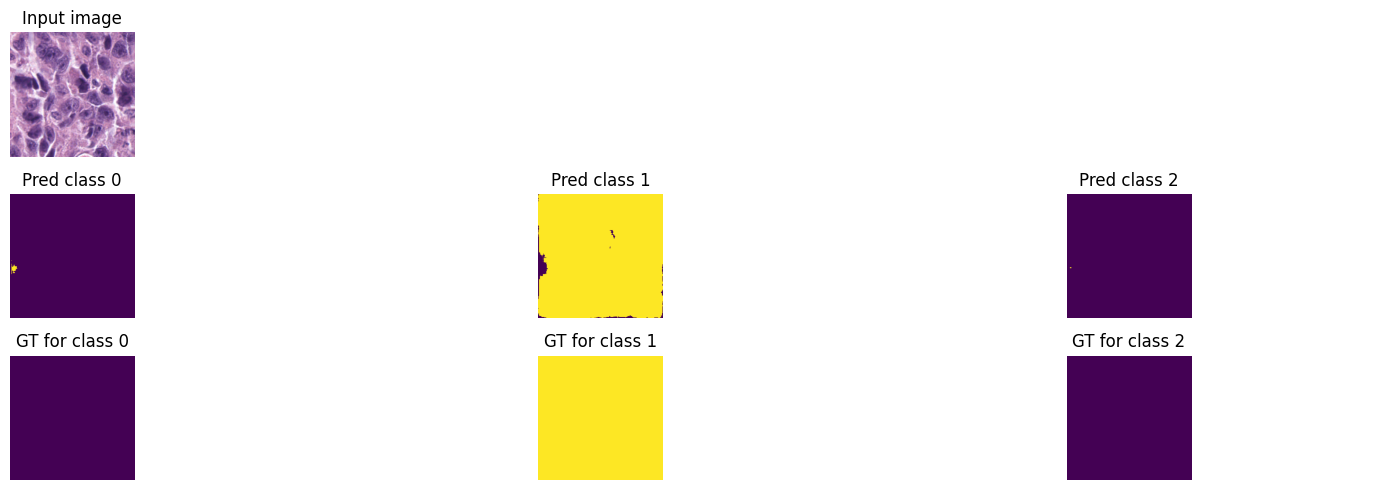

Train loss: 0.44072 | Time: 165m 54s | Val loss: 0.42246
Train_DICE_avg: 0.57362 | Train_Jaccard_avg: 0.51520 | Train_Sensitivity_avg: 0.64341 | Train_Specificity_avg: 0.82517 
Class 0 - Train_DICE: 0.46980 | Train_Jaccard: 0.41761 | Train_Sensitivity: 0.48138 | Train_Specificity: 0.87698 
Class 1 - Train_DICE: 0.73610 | Train_Jaccard: 0.68082 | Train_Sensitivity: 0.82669 | Train_Specificity: 0.80268 
Class 2 - Train_DICE: 0.51497 | Train_Jaccard: 0.44718 | Train_Sensitivity: 0.62215 | Train_Specificity: 0.79585 
Val_DICE_avg: 0.59118 | Val_Jaccard_avg: 0.53582 | Val_Sensitivity_avg: 0.67112 | Val_Specificity_avg: 0.75702 
Class 0 - Val_DICE: 0.49823 | Val_Jaccard: 0.44740 | Val_Sensitivity: 0.50616 | Val_Specificity: 0.82284 
Class 1 - Val_DICE: 0.75148 | Val_Jaccard: 0.70177 | Val_Sensitivity: 0.85518 | Val_Specificity: 0.71749 
Class 2 - Val_DICE: 0.52383 | Val_Jaccard: 0.45829 | Val_Sensitivity: 0.65201 | Val_Specificity: 0.73072 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:12<00:00,  2.43it/s]


Global Performance Metrics:
Loss mean: 0.42565, std: 0.05787
Dice Coefficient mean: 0.59484, std: 0.21899
Jaccard Index mean: 0.53982, std: 0.23782
Sensitivity mean: 0.81793, std: 0.18941
Specificity mean: 0.63499, std: 0.22304

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.50187, std: 0.42146
Jaccard mean: 0.45103, std: 0.41586
Sensitivity mean: 0.89809, std: 0.26753
Specificity mean: 0.52947, std: 0.42929

Class 1:
Dice mean: 0.75374, std: 0.34837
Jaccard mean: 0.70470, std: 0.35822
Sensitivity mean: 0.82154, std: 0.32319
Specificity mean: 0.79078, std: 0.34362

Class 2:
Dice mean: 0.52890, std: 0.39484
Jaccard mean: 0.46372, std: 0.39177
Sensitivity mean: 0.73417, std: 0.37678
Specificity mean: 0.58472, std: 0.43257
